# 0️⃣ InteractivePipelineLoadFromPickle (Independent Load-only Visualization Notebook) - Imports

In [ ]:
%config IPCompleter.use_jedi = False
# %xmode Verbose
# %xmode context
%pdb off
%load_ext autoreload
%autoreload 3

# ==================================================================================================================================================================================================================================================================================== #
# PyQtInspect:                                                                                                                                                                                                                                                                         #
# ==================================================================================================================================================================================================================================================================================== #
# 1. Launch `pqi-server` in a new terminal BEFORE running this notebook cell. Be sure to click 'Serve' button in the GUI that appears so this notebook can connect.

# # IMPORTANT: Call settrace BEFORE importing PyQt5
# import PyQtInspect.pqi as pqi

# # Connect to the server (default: localhost:19394)
# # Make sure the server is already running!
# pqi.settrace(
#     host='127.0.0.1',
#     port=19394,  # Default port, or use the port shown in the server GUI
#     qt_support='pyqt5',  # or 'auto' for auto-detection
#     patch_multiprocessing=False
# )

# # !pip install viztracer
%load_ext viztracer
from viztracer import VizTracer

%load_ext memory_profiler

import sys
from pathlib import Path

# required to enable non-blocking interaction:
%gui qt5

import importlib
from copy import deepcopy
from numba import jit
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
# pd.options.mode.dtype_backend = 'pyarrow' # use new pyarrow backend instead of numpy
from attrs import define, field, fields, Factory, make_class
import tables as tb
from datetime import datetime, timedelta

# Pho's Formatting Preferences
import builtins

import IPython
from IPython.core.formatters import PlainTextFormatter
from IPython import get_ipython
from pyphocorehelpers.gui.Jupyter.AsyncExecutionHelper import run_async

from pyphocorehelpers.preferences_helpers import set_pho_preferences, set_pho_preferences_concise, set_pho_preferences_verbose
set_pho_preferences_concise()
# Jupyter-lab enable printing for any line on its own (instead of just the last one in the cell)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# BEGIN PPRINT CUSTOMIZATION ___________________________________________________________________________________________ #

## IPython pprint
from pyphocorehelpers.pprint import wide_pprint, wide_pprint_ipython, wide_pprint_jupyter, MAX_LINE_LENGTH
# Override default pprint
builtins.pprint = wide_pprint

ip = get_ipython()

from pyphocorehelpers.ipython_helpers import CustomFormatterMagics

# Register the magic
ip.register_magics(CustomFormatterMagics) # %%ndarray_preview height=500, width=None, include_plaintext_repr=False, include_shape=False, horizontal_layout=True


text_formatter: PlainTextFormatter = ip.display_formatter.formatters['text/plain']
text_formatter.max_width = MAX_LINE_LENGTH
text_formatter.for_type(object, wide_pprint_jupyter)


from pyphocorehelpers.pho_jupyter_preview_widget.ipython_helpers import PreviewWidgetMagics

ip.register_magics(PreviewWidgetMagics)


# END PPRINT CUSTOMIZATION ___________________________________________________________________________________________ #

from pyphocorehelpers.print_helpers import get_now_time_str, get_now_day_str
from pyphocorehelpers.indexing_helpers import get_dict_subset

## Pho's Custom Libraries:
from pyphocorehelpers.Filesystem.path_helpers import find_first_extant_path, file_uri_from_path
from pyphocorehelpers.Filesystem.open_in_system_file_manager import reveal_in_system_file_manager
import pyphocorehelpers.programming_helpers as programming_helpers
from pyphocorehelpers.print_helpers import render_scrollable_colored_table_from_dataframe, render_scrollable_colored_table

# NeuroPy (Diba Lab Python Repo) Loading
# from neuropy import core
from typing import Dict, List, Tuple, Optional, Callable, Union, Any
from typing_extensions import TypeAlias
from nptyping import NDArray

from neuropy.analyses.placefields import PlacefieldComputationParameters
from neuropy.core.epoch import NamedTimerange, Epoch, EpochsAccessor, ensure_dataframe, ensure_Epoch
from neuropy.core.ratemap import Ratemap
from neuropy.core.session.Formats.BaseDataSessionFormats import DataSessionFormatRegistryHolder, DataSessionFormatBaseRegisteredClass
# from neuropy.core.session.Formats.Specific.KDibaOldDataSessionFormat import KDibaOldDataSessionFormatRegisteredClass
# from neuropy.core.session.Formats.Specific.BapunDataSessionFormat import BapunDataSessionFormatRegisteredClass
# from neuropy.core.session.Formats.Specific.RachelDataSessionFormat import RachelDataSessionFormat
from neuropy.core.session.Formats.Specific.BapunDataSessionFormat import BapunDataSessionFormatRegisteredClass

from neuropy.utils.matplotlib_helpers import matplotlib_file_only, matplotlib_configuration, matplotlib_configuration_update
from neuropy.core.neuron_identities import NeuronIdentityTable, neuronTypesList, neuronTypesEnum
from neuropy.utils.mixins.AttrsClassHelpers import AttrsBasedClassHelperMixin, serialized_field, serialized_attribute_field, non_serialized_field, custom_define
from neuropy.utils.mixins.HDF5_representable import HDF_DeserializationMixin, post_deserialize, HDF_SerializationMixin, HDFMixin, HDF_Converter

## For computation parameters:
from neuropy.analyses.placefields import PlacefieldComputationParameters
from neuropy.utils.dynamic_container import DynamicContainer
from neuropy.utils.result_context import IdentifyingContext
from neuropy.core.session.Formats.BaseDataSessionFormats import find_local_session_paths
from neuropy.core.user_annotations import UserAnnotationsManager

from pyphocorehelpers.print_helpers import print_object_memory_usage, print_dataframe_memory_usage, print_value_overview_only, DocumentationFilePrinter, print_keys_if_possible, generate_html_string, document_active_variables
from pyphocorehelpers.programming_helpers import metadata_attributes
from pyphocorehelpers.function_helpers import function_attributes
## Pho Programming Helpers:
from pyphocorehelpers.print_helpers import DocumentationFilePrinter, TypePrintMode, print_keys_if_possible, debug_dump_object_member_shapes, print_value_overview_only, document_active_variables
from pyphocorehelpers.programming_helpers import IPythonHelpers, PythonDictionaryDefinitionFormat, MemoryManagement, inspect_callable_arguments, get_arguments_as_optional_dict, GeneratedClassDefinitionType, CodeConversion
from pyphocorehelpers.gui.Qt.TopLevelWindowHelper import TopLevelWindowHelper, print_widget_hierarchy
from pyphocorehelpers.indexing_helpers import reorder_columns, reorder_columns_relative, dict_to_full_array
from pyphocorehelpers.DataStructure.RenderPlots.MatplotLibRenderPlots import MatplotlibRenderPlots

doc_output_parent_folder: Path = Path('EXTERNAL/DEVELOPER_NOTES/DataStructureDocumentation').resolve() # ../.
print(f"doc_output_parent_folder: {doc_output_parent_folder}")
assert doc_output_parent_folder.exists()

from pyphocorehelpers.notebook_helpers import NotebookCellExecutionLogger, NotebookProcessor

_notebook_path:Path = Path(IPythonHelpers.try_find_notebook_filepath(IPython.extract_module_locals())).resolve() # Finds the path of THIS notebook
_notebook_execution_logger: NotebookCellExecutionLogger = NotebookCellExecutionLogger(notebook_path=_notebook_path, enable_logging_to_file=False) # Builds a logger that records info about this notebook
_notebook_processor: NotebookProcessor = NotebookProcessor(path=_notebook_path)

# pyPhoPlaceCellAnalysis:
from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import NeuropyPipeline # get_neuron_identities
from pyphoplacecellanalysis.General.Mixins.ExportHelpers import export_pyqtgraph_plot
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_load_session, batch_extended_computations, batch_evaluate_required_computations
from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import PipelineSavingScheme # used in perform_pipeline_save
from pyphoplacecellanalysis.GUI.IPyWidgets.pipeline_ipywidgets import PipelineJupyterHelpers, CustomProcessingPhases
from pyphocorehelpers.assertion_helpers import Assert
import pyphoplacecellanalysis.General.type_aliases as types # import neuropy.utils.type_aliases as types


import pyphoplacecellanalysis.External.pyqtgraph as pg

from pyphocorehelpers.exception_helpers import ExceptionPrintingContext, CapturedException
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_perform_all_plots
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import JonathanFiringRateAnalysisResult
from pyphoplacecellanalysis.General.Mixins.CrossComputationComparisonHelpers import _find_any_context_neurons
from pyphoplacecellanalysis.General.Batch.runBatch import BatchSessionCompletionHandler # for `post_compute_validate(...)`
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BasePositionDecoder
from pyphoplacecellanalysis.SpecificResults.AcrossSessionResults import AcrossSessionsResults
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.SpikeAnalysis import SpikeRateTrends # for `_perform_long_short_instantaneous_spike_rate_groups_analysis`
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.LongShortTrackComputations import SingleBarResult, InstantaneousSpikeRateGroupsComputation, TruncationCheckingResults # for `BatchSessionCompletionHandler`, `AcrossSessionsAggregator`
from pyphoplacecellanalysis.General.Mixins.CrossComputationComparisonHelpers import SplitPartitionMembership
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalPlacefieldGlobalComputationFunctions, DirectionalLapsResult, TrackTemplates, DecoderDecodedEpochsResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.RankOrderComputations import RankOrderGlobalComputationFunctions,  RankOrderComputationsContainer, RankOrderResult, RankOrderAnalyses
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrackTemplates
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.ComputationFunctionRegistryHolder import ComputationFunctionRegistryHolder, computation_precidence_specifying_function, global_function
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.SequenceBasedComputations import WCorrShuffle, SequenceBasedComputationsContainer
from neuropy.utils.mixins.binning_helpers import transition_matrix
from pyphoplacecellanalysis.Analysis.Decoder.transition_matrix import TransitionMatrixComputations
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import TrackTemplates, get_proper_global_spikes_df
from pyphocorehelpers.Filesystem.path_helpers import set_posix_windows
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BasePositionDecoder, DecodedFilterEpochsResult, SingleEpochDecodedResult
from neuropy.core.session.Formats.BaseDataSessionFormats import HardcodedProcessingParameters

from pyphocorehelpers.assertion_helpers import Assert

# Plotting
# import pylustrator # customization of figures
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
_bak_rcParams = mpl.rcParams.copy()

matplotlib.use('Qt5Agg')
# %matplotlib inline
# %matplotlib auto

# _restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')
_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')

import seaborn as sns

# import pylustrator # call `pylustrator.start()` before creating your first figure in code.
from pyphoplacecellanalysis.Pho2D.matplotlib.visualize_heatmap import visualize_heatmap, visualize_heatmap_pyqtgraph # used in `plot_kourosh_activity_style_figure`
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.SpikeRasters import plot_multiple_raster_plot, plot_raster_plot
from pyphoplacecellanalysis.General.Mixins.DataSeriesColorHelpers import UnitColoringMode, DataSeriesColorHelpers
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.SpikeRasters import _build_default_tick, build_scatter_plot_kwargs
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.Render2DScrollWindowPlot import Render2DScrollWindowPlotMixin, ScatterItemData
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.SpikeAnalysis import SpikeRateTrends
from pyphoplacecellanalysis.General.Mixins.SpikesRenderingBaseMixin import SpikeEmphasisState
from pyphoplacecellanalysis.General.Model.SpecificComputationParameterTypes import ComputationKWargParameters
from pyphoplacecellanalysis.SpecificResults.PhoDiba2023Paper import PAPER_FIGURE_figure_1_add_replay_epoch_rasters, PAPER_FIGURE_figure_1_full, PAPER_FIGURE_figure_3, main_complete_figure_generations
# from pyphoplacecellanalysis.SpecificResults.fourthYearPresentation import *

# Jupyter Widget Interactive
import ipywidgets as widgets
from IPython.display import display, HTML
from pyphocorehelpers.Filesystem.open_in_system_file_manager import reveal_in_system_file_manager
from pyphoplacecellanalysis.GUI.IPyWidgets.pipeline_ipywidgets import interactive_pipeline_widget, interactive_pipeline_files
from pyphocorehelpers.gui.Jupyter.simple_widgets import fullwidth_path_widget, render_colors

from datetime import datetime, date, timedelta
from pyphocorehelpers.print_helpers import get_now_day_str, get_now_rounded_time_str

from neuropy.core.session.Formats.BaseDataSessionFormats import HardcodedProcessingParameters

known_data_session_type_properties_dict = DataSessionFormatRegistryHolder.get_registry_known_data_session_type_dict()
active_data_session_types_registered_classes_dict = DataSessionFormatRegistryHolder.get_registry_data_session_type_class_name_dict()

DAY_DATE_STR: str = date.today().strftime("%Y-%m-%d")
DAY_DATE_TO_USE = f'{DAY_DATE_STR}' # used for filenames throught the notebook
print(f'DAY_DATE_STR: {DAY_DATE_STR}, DAY_DATE_TO_USE: {DAY_DATE_TO_USE}')

NOW_DATETIME: str = get_now_rounded_time_str()
NOW_DATETIME_TO_USE = f'{NOW_DATETIME}' # used for filenames throught the notebook
print(f'NOW_DATETIME: {NOW_DATETIME}, NOW_DATETIME_TO_USE: {NOW_DATETIME_TO_USE}')

def get_global_variable(var_name):
    """ used by `PipelineJupyterHelpers._build_pipeline_custom_processing_mode_selector_widget(...)` to update the notebook's variables """
    return globals()[var_name]
    
def update_global_variable(var_name, value):
    """ used by `PipelineJupyterHelpers._build_pipeline_custom_processing_mode_selector_widget(...)` to update the notebook's variables """
    globals()[var_name] = value

from pyphocorehelpers.gui.Jupyter.simple_widgets import build_global_data_root_parent_path_selection_widget
all_paths = [Path(r'/home/halechr/FastData'), Path('/Volumes/SwapSSD/Data'), Path('/Users/pho/data'), Path(r'/media/halechr/MAX/Data'), Path(r'W:\Data'), Path(r'H:\Data'), Path(r'/home/halechr/cloud/turbo/Data'), Path(r'/Volumes/MoverNew/data'), Path(r'/home/halechr/turbo/Data'), Path(r'/Users/pho/cloud/turbo/Data')] # Path('/Volumes/FedoraSSD/FastData'), 
global_data_root_parent_path = None
def on_user_update_path_selection(new_path: Path):
    global global_data_root_parent_path
    new_global_data_root_parent_path = new_path.resolve()
    global_data_root_parent_path = new_global_data_root_parent_path
    print(f'global_data_root_parent_path changed to {global_data_root_parent_path}')
    assert global_data_root_parent_path.exists(), f"global_data_root_parent_path: {global_data_root_parent_path} does not exist! Is the right computer's config commented out above?"
            
global_data_root_parent_path_widget = build_global_data_root_parent_path_selection_widget(all_paths, on_user_update_path_selection)
global_data_root_parent_path_widget

# 0️⃣ Load Pipeline

In [ ]:
# ==================================================================================================================== #
# Load Data                                                                                                            #
# ==================================================================================================================== #

# ==================================================================================================================== #
# BAPUN data format                                                                                                    #
# ==================================================================================================================== #
active_data_mode_name = 'bapun'
local_session_root_parent_context = IdentifyingContext(format_name=active_data_mode_name) # , animal_name='', configuration_name='one', session_name=a_sess.session_name
local_session_root_parent_path = global_data_root_parent_path.joinpath('Bapun')

# [*] - indicates bad or session with a problem
# 0, 1, 2, 3, 4, 5, 6, 7, [8], [9], 10, 11, [12], 13, 14, [15], [16], 17, 
# curr_context = IdentifyingContext(format_name='bapun',animal='RatU', session_name='RatUDay5OpenfieldSD') # NEW 2025-12-15 -- working but the epochs are a little weird, I had to manually rename them and they still don't seem right
curr_context = IdentifyingContext(format_name='bapun',animal='RatN', session_name='Day4OpenField') # ,exper_name='one' -- This is the one with the 2 behaviors ('roam', 'sprinkle') in the same open field box
# curr_context = IdentifyingContext(format_name='bapun',animal='RatK', session_name='Day4Openfield') # DOESN"T WORK, NO NEU{RONS OR SOMETHING.


# Create a dictionary with the parameters to override
override_parameters = {
    'preprocessing.laps.use_direction_dependent_laps': False,
	# 'preprocessing.laps.use_direction_dependent_laps': False
}

local_session_parent_path: Path = local_session_root_parent_path.joinpath(curr_context.animal) # 'gor01', 'one' - probably not needed anymore
basedir: Path = local_session_parent_path.joinpath(curr_context.session_name) #.resolve()

# basedir: Path = Path('/media/halechr/MAX/Data/Rachel/cho/cho_241117_2_merged') # DO NOT `.resolve()``
# basedir: Path = Path(r'H:\Data\Bapun\RatS\Day5TwoNovel')
print(f'basedir: {str(basedir)}')
Assert.path_exists(basedir)

epoch_name_includelist = None
active_computation_functions_name_includelist = ['pf_computation', 'pfdt_computation', 'position_decoding']

# Read if possible:
saving_mode = PipelineSavingScheme.SKIP_SAVING
force_reload = False

# # # Force write:
# saving_mode = PipelineSavingScheme.TEMP_THEN_OVERWRITE
# # saving_mode = PipelineSavingScheme.OVERWRITE_IN_PLACE
# force_reload = True

selector, on_value_change = PipelineJupyterHelpers._build_pipeline_custom_processing_mode_selector_widget(update_global_variable_fn=update_global_variable, debug_print=False, enable_full_view=True)
# selector.value = 'clean_run'
selector.value = 'continued_run'
# selector.value = 'final_run'
on_value_change(dict(new=selector.value)) ## do update manually so the workspace variables reflect the set values
## TODO: if loading is not possible, we need to change the `saving_mode` so that the new results are properly saved.
print(f"saving_mode: {saving_mode}, force_reload: {force_reload}")

# Resume

In [ ]:
from pyphoplacecellanalysis.GUI.IPyWidgets.pipeline_ipywidgets import PipelineJupyterHelpers, CustomProcessingPhases, PipelinePickleFileSelectorWidget

# ## INPUTS: basedir
# active_session_pickle_file_widget = PipelinePickleFileSelectorWidget(directory=basedir)

extended_computations_include_includelist_phase_dict: Dict[str, CustomProcessingPhases] = CustomProcessingPhases.get_extended_computations_include_includelist_phase_dict()

current_phase: CustomProcessingPhases = CustomProcessingPhases[selector.value]  # Assuming selector.value is an instance of CustomProcessingPhases
extended_computations_include_includelist: List[str] = [key for key, value in extended_computations_include_includelist_phase_dict.items() if value <= current_phase]
display(extended_computations_include_includelist)
force_recompute_override_computations_includelist = None
# force_recompute_override_computations_includelist = ['split_to_directional_laps', 'merged_directional_placefields', 'rank_order_shuffle_analysis', 'directional_decoders_decode_continuous'] # 

# ## INPUTS: basedir
active_session_pickle_file_widget = PipelinePickleFileSelectorWidget(directory=basedir, on_update_global_variable_callback=update_global_variable, on_get_global_variable_callback=get_global_variable)

_subfn_load, _subfn_save, _subfn_compute, _subfn_compute_new = active_session_pickle_file_widget._build_load_save_callbacks(global_data_root_parent_path=global_data_root_parent_path, active_data_mode_name=active_data_mode_name, basedir=basedir, saving_mode=saving_mode, force_reload=force_reload,
                                                             extended_computations_include_includelist=extended_computations_include_includelist, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist)


# Display the widget
display(active_session_pickle_file_widget.servable())
# active_session_pickle_file_widget.local_file_browser_widget.servable()
# active_session_pickle_file_widget.global_file_browser_widget.servable()
# display(active_session_pickle_file_widget.local_file_browser_widget.servable())
# display(active_session_pickle_file_widget.global_file_browser_widget.servable())

# OUTPUTS: active_session_pickle_file_widget, widget.active_local_pkl, widget.active_global_pkl

if selector.value == 'clean_run':
    ## handle a clean run specially, this will create the pkls and not load them
    print(f'clean run!')
    default_selected_local_file_name: str = 'loadedSessPickle.pkl'
    default_selected_global_file_name: str = 'global_computation_results.pkl'
    # active_session_pickle_file_widget.is_compute_button_disabled = False # enable the compute button always during a clean run
    # active_session_pickle_file_widget.is_load_button_disabled = True
    
    new_default_local_pkl_file: Path = active_session_pickle_file_widget.directory.joinpath(default_selected_local_file_name).resolve()
    print(f'new_default_local_pkl_file: {new_default_local_pkl_file}')

    active_session_pickle_file_widget.selected_local_pkl_files = [new_default_local_pkl_file]
    active_session_pickle_file_widget.selected_global_pkl_files = []
    active_session_pickle_file_widget._update_load_save_button_disabled_state()
    print(f'active_session_pickle_file_widget.is_load_button_disabled: {active_session_pickle_file_widget.is_load_button_disabled}')
    print(f'active_session_pickle_file_widget.is_compute_button_disabled: {active_session_pickle_file_widget.is_compute_button_disabled}')
    print(f'active_local_pkl: "{active_session_pickle_file_widget.active_local_pkl}"')
    print(f'active_global_pkl: "{active_session_pickle_file_widget.active_global_pkl}"')
    active_session_pickle_file_widget.load_button.disabled = False
    active_session_pickle_file_widget.compute_button.disabled = False
else:
    # not `clean_run` mode, continuing processing which might include loading from pickles
    ## try selecting the first
    did_find_valid_selection: bool = active_session_pickle_file_widget.try_select_first_valid_files()

    ## Set default local comp pkl:
    default_selected_local_file_name: str = 'loadedSessPickle.pkl'
    if not active_session_pickle_file_widget.is_local_file_names_list_empty:
        default_local_section_indicies = [active_session_pickle_file_widget.local_file_browser_widget._data['File Name'].tolist().index(default_selected_local_file_name)]
        active_session_pickle_file_widget.local_file_browser_widget.selection = default_local_section_indicies

    ## Set default global computation pkl:
    default_selected_global_file_name: str = 'global_computation_results.pkl'
    if not active_session_pickle_file_widget.is_global_file_names_list_empty:
        default_global_section_indicies = [active_session_pickle_file_widget.global_file_browser_widget._data['File Name'].tolist().index(default_selected_global_file_name)]
        active_session_pickle_file_widget.global_file_browser_widget.selection = default_global_section_indicies



In [ ]:
did_find_valid_selection: bool = active_session_pickle_file_widget.try_select_first_valid_files()
did_find_valid_selection


In [ ]:
# if did_find_valid_selection:
#     _subfn_load()
    
did_find_valid_selection = True

In [ ]:
if did_find_valid_selection:
    curr_active_pipeline, custom_suffix, proposed_load_pkl_path = active_session_pickle_file_widget.on_load_local(global_data_root_parent_path=global_data_root_parent_path, active_data_mode_name=active_data_mode_name, basedir=basedir, saving_mode=saving_mode, force_reload=force_reload)
    print(f'on_load_local(...) complete. workspace variables updated: curr_active_pipeline, custom_suffix, proposed_load_pkl_path')
    

In [ ]:
if did_find_valid_selection:
    try:
        skip_global_load = False
        curr_active_pipeline = active_session_pickle_file_widget.on_load_global(curr_active_pipeline=curr_active_pipeline, basedir=basedir, extended_computations_include_includelist=extended_computations_include_includelist, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist,
                                    skip_global_load=skip_global_load, force_reload=False, override_global_computation_results_pickle_path=active_session_pickle_file_widget.active_global_pkl)
        # Update the global variable after loading global
        print(f'on_load_global(...) complete. workspace variables updated: curr_active_pipeline, custom_suffix, proposed_load_pkl_path')
    except Exception as e:
        print(f'encountered exception loading global e: {e}.')
        pass
        # raise e



## From `test_non_interactive_crash.py`

In [ ]:
### Bapun Open-Field Experiment (2022-08-09 Analysis)
from neuropy.core.session.SessionSelectionAndFiltering import build_custom_epochs_filters # used particularly to build Bapun-style filters

active_data_mode_name = 'bapun'
# active_data_mode_name = 'rachel'
print(f'active_data_session_types_registered_classes_dict: {active_data_session_types_registered_classes_dict}')
active_data_mode_registered_class = active_data_session_types_registered_classes_dict[active_data_mode_name]
active_data_mode_type_properties = known_data_session_type_properties_dict[active_data_mode_name]


# basedir = Path('/media/halechr/MAX/Data/Rachel/Cho_241117_Session2').resolve()
## INPUTS: basedir 
override_parameters = {'rank_order_shuffle_analysis.minimum_inclusion_fr_Hz': 1.0}
force_reload = force_reload #True
print(f'force_reload: {force_reload}')
curr_active_pipeline = NeuropyPipeline.try_init_from_saved_pickle_or_reload_if_needed(active_data_mode_name, active_data_mode_type_properties, override_basepath=Path(basedir), force_reload=force_reload) # , override_parameters_flat_keypaths_dict=override_parameters

# _test_session = RachelDataSessionFormat.build_session(Path(r'R:\data\Rachel\merged_M1_20211123_raw_phy'))
# _test_session, loaded_file_record_list = RachelDataSessionFormat.load_session(_test_session)
# _test_session

## ~20m

##### Old not needed anymore manual comps

In [ ]:
curr_epoch_names: List[str] = curr_active_pipeline.sess.epochs.to_dataframe()['label'].to_list()
print(f'curr_epoch_names: {curr_epoch_names}')

In [ ]:
from neuropy.core.session.SessionSelectionAndFiltering import build_custom_epochs_filters

# epoch_name_includelist = ['pre', 'maze1', 'post1', 'maze2', 'post2']
# epoch_name_includelist = ['pre', 'roam', 'sprinkle', 'post']
# epoch_name_includelist = ['roam', 'sprinkle']

# active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['pre', 'maze1', 'post1', 'maze2', 'post2']) ## ALL possible epochs

# active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['maze1', 'maze2', 'maze_GLOBAL']) ## ALL possible epochs
active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['maze1', 'maze2', 'maze_GLOBAL']) ## ALL possible epochs

# active_session_filter_configurations = active_data_mode_registered_class.build_default_filter_functions(sess=curr_active_pipeline.sess)
# active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['pre', 'roam', 'maze', 'sprinkle', 'post']) ## ALL possible epochs
# active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['pre', 'roam', 'sprinkle', 'post']) ## ALL possible epochs


# active_session_filter_configurations = active_data_mode_registered_class.build_default_filter_functions(sess=curr_active_pipeline.sess, epoch_name_includelist=epoch_name_includelist) # build_filters_pyramidal_epochs(sess=curr_kdiba_pipeline.sess)
# active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['maze','sprinkle'])
# active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['maze', 'sprinkle'])
# active_session_filter_configurations = build_custom_epochs_filters(curr_active_pipeline.sess, epoch_name_includelist=['roam', 'sprinkle']) # , 'maze'

# active_session_filter_configurations = active_data_mode_registered_class.build_filters_pyramidal_epochs(curr_active_pipeline.sess, epoch_name_includelist=['maze','sprinkle'])
# active_session_filter_configurations


In [ ]:
curr_active_pipeline.filter_sessions(active_session_filter_configurations)


In [ ]:
active_session_computation_configs = active_data_mode_registered_class.build_active_computation_configs(sess=curr_active_pipeline.sess, time_bin_size=0.5)
active_session_computation_configs

In [ ]:
active_session_computation_configs[0].pf_params.computation_epochs

In [ ]:
# grid_bin_bounds=(((-83.33747881216672, 110.15967332926644), (-94.89955475226206, 97.07387994733473)))


bapun_open_field_grid_bin_bounds = (((-120.0, 120.0), (-120.0, 120.0)))
curr_active_pipeline.get_all_parameters()
# curr_active_pipeline.update_parameters(grid_bin_bounds = (((-120.0, 120.0), (-120.0, 120.0))))
curr_active_pipeline.sess.config.grid_bin_bounds = (((-120.0, 120.0), (-120.0, 120.0)))


# override_parameters_flat_keypaths_dict = {'grid_bin_bounds': (((-120.0, 120.0), (-120.0, 120.0))), # 'rank_order_shuffle_analysis.minimum_inclusion_fr_Hz': minimum_inclusion_fr_Hz,
# 										#   'sess.config.preprocessing_parameters.laps.use_direction_dependent_laps': False, # lap_estimation_parameters
#                                         }

# curr_active_pipeline.update_parameters(override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict) # should already be updated, but try it again anyway.


In [ ]:
minimum_inclusion_fr_Hz = 1.0
override_parameters_flat_keypaths_dict = {
	                        # 'grid_bin_bounds': (((-120.0, 120.0), (-120.0, 120.0))), # 
                            'rank_order_shuffle_analysis.minimum_inclusion_fr_Hz': minimum_inclusion_fr_Hz,
                        #   'sess.config.preprocessing_parameters.laps.use_direction_dependent_laps': False, # lap_estimation_parameters
                        }

curr_active_pipeline.update_parameters(override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict) # should already be updated, but try it again anyway.

In [ ]:
from neuropy.core.epoch import Epoch, EpochsAccessor, ensure_dataframe, ensure_Epoch


# ==================================================================================================================================================================================================================================================================================== #
# Update computation_epochs to be only the maze ones                                                                                                                                                                                                                                   #
# ==================================================================================================================================================================================================================================================================================== #

## activity_only_epochs_df:
epochs_df = ensure_dataframe(deepcopy(curr_active_pipeline.sess.epochs))
# activity_only_epochs_df: pd.DataFrame = epochs_df[epochs_df['label'].isin(['maze1', 'maze2', 'maze_GLOBAL'])]

activity_only_epochs_df: pd.DataFrame = epochs_df[epochs_df['label'].isin(['maze1', 'maze2'])].epochs.get_non_overlapping_df()
activity_only_epochs: Epoch = ensure_Epoch(activity_only_epochs_df, metadata=curr_active_pipeline.sess.epochs.metadata)

## GLobal only ('maze_GLOBAL')
epochs_df = ensure_dataframe(deepcopy(curr_active_pipeline.sess.epochs))
global_activity_only_epochs_df: pd.DataFrame = epochs_df[epochs_df['label'].isin(['maze_GLOBAL'])].epochs.get_non_overlapping_df()
global_activity_only_epoch: Epoch = ensure_Epoch(global_activity_only_epochs_df, metadata=curr_active_pipeline.sess.epochs.metadata)

## OUTPUTS: activity_only_epochs, global_activity_only_epoch

## OUTPUTS: activity_only_epoch


# active_session_computation_configs[0].pf_params.computation_epochs = deepcopy(curr_active_pipeline.filtered_sessions['maze'].epochs)
# active_session_computation_configs[0].pf_params.computation_epochs = deepcopy(curr_active_pipeline.sess.epochs)
# active_session_computation_configs[0].pf_params.computation_epochs = deepcopy(curr_active_pipeline.sess.epochs) ## prev
active_session_computation_configs[0].pf_params.computation_epochs = deepcopy(activity_only_epochs)

global_only_sess_comp_config = deepcopy(active_session_computation_configs[0])
global_only_sess_comp_config.pf_params.computation_epochs = deepcopy(global_activity_only_epoch)
if len(active_session_computation_configs) < 2:
    active_session_computation_configs.append(global_only_sess_comp_config)
else:
    active_session_computation_configs[1] = global_only_sess_comp_config

# active_session_computation_configs[0].pf_params.computation_epochs = deepcopy(bapun_epochs)
# active_session_computation_configs[1].pf_params.computation_epochs = deepcopy(curr_active_pipeline.filtered_sessions['maze'].epochs.to_dataframe())
active_session_computation_configs
# active_session_computation_configs[0].pf_params.computation_epochs

#    start   stop     label  duration
# 0      0   7407       pre      7407
# 1   7423  11483      maze      4060
# 3  10186  11483  sprinkle      1297
# 2  11497  25987      post     14490

# [4 rows x 4 columns]

## UPDATES: active_session_computation_configs


In [ ]:
activity_only_epochs_df: pd.DataFrame = epochs_df[epochs_df['label'].isin(hardcoded_params.non_global_activity_session_names)]
activity_only_epochs_df

activity_only_epochs_df.loc[1, 'stop'] = activity_only_epochs_df.loc[2, 'start'] - 0.001
activity_only_epochs_df.loc[1, 'label'] = 'roam' 
activity_only_epochs_df['duration'] = activity_only_epochs_df['stop'] -  activity_only_epochs_df['start']
activity_only_epochs_df

hardcoded_params.non_global_activity_session_names = ['roam', 'sprinkle']


1   7125.0  11745.0         maze    4620.0
2   9591.0  11745.0     sprinkle    2154.0

In [ ]:
active_session_computation_configs[0].pf_params.linearization_method = "umap"

for an_epoch_name, a_sess in curr_active_pipeline.filtered_sessions.items():
    ## forcibly compute the linearized position so it doesn't fallback to "isomap" method which eats all the memory
    a_pos_df: pd.DataFrame = a_sess.position.compute_linearized_position(method='umap')
    


In [ ]:
# activity_only_epoch_names: List[str] = ['maze1', 'maze2', 'maze_GLOBAL']
# active_computation_functions_name_includelist
activity_only_epoch_names: List[str] = active_session_computation_configs[0].pf_params.computation_epochs.labels.tolist() ## should be same as config
activity_only_epoch_names

# # Create non-overlapping version
# non_overlapping_epochs = ensure_Epoch(active_session_computation_configs[0].pf_params.computation_epochs.epochs.get_non_overlapping_df())
# active_session_computation_configs[0].pf_params.computation_epochs = non_overlapping_epochs


In [ ]:
curr_active_pipeline.computation_results

In [ ]:
active_session_computation_configs = curr_active_pipeline.

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import NeuropyPipeline
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_extended_computations

curr_active_pipeline.reload_default_computation_functions()
    
active_computation_functions_name_includelist = ['pf_computation',
                                                'pfdt_computation',
                                                'position_decoding',
                                                #  'position_decoding_two_step',
                                                #  'extended_pf_peak_information',
                                                ] # 'ratemap_peaks_prominence2d'


## Loops through all configs
for i, a_config in enumerate(active_session_computation_configs):
    active_epoch_names: List[str] = a_config.pf_params.computation_epochs.labels.tolist() ## should be same as config
    print(f'i: {i}, active_epoch_names: {active_epoch_names}') # (activity_only_epoch_names)

    # curr_active_pipeline.perform_computations(active_session_computation_configs[0], computation_functions_name_excludelist=['_perform_spike_burst_detection_computation', '_perform_velocity_vs_pf_density_computation', '_perform_velocity_vs_pf_simplified_count_density_computation']) # SpikeAnalysisComputations._perform_spike_burst_detection_computation
    # curr_active_pipeline.perform_computations(active_session_computation_configs[0], computation_functions_name_includelist=active_computation_functions_name_includelist, enabled_filter_names=activity_only_epoch_names, overwrite_extant_results=True, fail_on_exception=False, debug_print=True) # SpikeAnalysisComputations._perform_spike_burst_detection_computation
    curr_active_pipeline.perform_computations(a_config, computation_functions_name_includelist=active_computation_functions_name_includelist, enabled_filter_names=active_epoch_names, overwrite_extant_results=False, fail_on_exception=False, debug_print=True) # SpikeAnalysisComputations._perform_spike_burst_detection_computation



In [ ]:
curr_active_pipeline.sess.epochs.to_dataframe()

In [ ]:
curr_active_pipeline.active_completed_computation_result_names

In [ ]:
# curr_active_pipeline.perform_computations(active_session_computation_configs[0], computation_functions_name_includelist=active_computation_functions_name_includelist, enabled_filter_names=['maze1', 'maze2'], overwrite_extant_results=False, fail_on_exception=False, debug_print=True)

In [ ]:
# curr_active_pipeline.computation_results['maze'].accumulated_errors
curr_active_pipeline.clear_all_failed_computations()

In [ ]:
curr_active_pipeline.prepare_for_display(root_output_dir=r'Output', should_smooth_maze=True) # TODO: pass a display config
# curr_active_pipeline.prepare_for_display(root_output_dir=r'W:\Data\Output', should_smooth_maze=True) # TODO: pass a display config

In [ ]:
curr_active_pipeline.pickle_path
curr_active_pipeline.global_computation_results_pickle_path
curr_active_pipeline.get_output_path()

In [ ]:
# _out = curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE)
_out = curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.OVERWRITE_IN_PLACE)
# _out = curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, active_pickle_filename='loadedSessPickle_2025-02-26.pkl')


In [ ]:
_out = curr_active_pipeline.save_global_computation_results()#save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, active_pickle_filename='loadedSessPickle_2025-02-27.pkl')

In [ ]:
# include_includelist = ['pre', 'maze1', 'post1', 'maze2', 'post2', 'maze',]
include_includelist = ['roam', 'sprinkle']
# include_includelist = curr_active_pipeline.filtered_session_names
include_includelist

In [ ]:
curr_active_pipeline.filtered_session_names

In [ ]:
include_includelist = curr_active_pipeline.filtered_session_names
print(f'include_includelist: {include_includelist}')

In [ ]:
## Setup Computation Functions to be executed:
# includelist Mode:
computation_functions_name_includelist=['_perform_baseline_placefield_computation', '_perform_time_dependent_placefield_computation', '_perform_extended_statistics_computation',
                                '_perform_position_decoding_computation', 
                                '_perform_firing_rate_trends_computation',
                                '_perform_pf_find_ratemap_peaks_computation',
                                # '_perform_time_dependent_pf_sequential_surprise_computation'
                                '_perform_two_step_position_decoding_computation',
                                # '_perform_recursive_latent_placefield_decoding'
                            ]  # '_perform_pf_find_ratemap_peaks_peak_prominence2d_computation'
computation_functions_name_excludelist=None

batch_extended_computations(curr_active_pipeline, included_computation_filter_names=computation_functions_name_includelist, include_includelist=include_includelist,
                            include_global_functions=True, fail_on_exception=False, progress_print=True, debug_print=False)


In [ ]:
## Firing rate filter seems too high (5.0Hz, maybe should be lower at like 1.0Hz)?
curr_active_pipeline.sess.config



## NEW BATCH COMPUTE ALL

In [ ]:
from neuropy.core.session.Formats.BaseDataSessionFormats import HardcodedProcessingParameters
from neuropy.core.session.Formats.BaseDataSessionFormats import DataSessionFormatRegistryHolder, DataSessionFormatBaseRegisteredClass
from neuropy.core.session.Formats.Specific.BapunDataSessionFormat import BapunDataSessionFormatRegisteredClass
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import final_process_bapun_all_comps

# try:
curr_active_pipeline = final_process_bapun_all_comps(curr_active_pipeline=curr_active_pipeline, posthoc_save=False)
# curr_active_pipeline = final_process_bapun_all_comps(curr_active_pipeline=curr_active_pipeline, posthoc_save=True)
# except Exception as e:
#     print(f'exception: {e}')
#     # raise e
#     pass    

## 9m


# 2025-09-08 - Concatenate Movement Sessions

## Decode across both movement sessions

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult

def load_data_DirectionalDecodersContinuouslyDecodedResult(pkl_path):
    from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult
    return DirectionalDecodersContinuouslyDecodedResult.from_file(pkl_path=pkl_path)

# directional_decoders_decode_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-16_directional_decoders_decode_result.pkl')
directional_decoders_decode_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-15_directional_decoders_decode_result.pkl')
if directional_decoders_decode_result_pkl_output_path.exists():
    ## non-async
    directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = load_data_DirectionalDecodersContinuouslyDecodedResult(pkl_path=directional_decoders_decode_result_pkl_output_path)
    curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result
else:
    print(f'directional_decoders_decode_result_pkl_output_path: {directional_decoders_decode_result_pkl_output_path} does not exist!')


In [ ]:
directional_decoders_decode_result = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
directional_decoders_decode_result

In [ ]:
list(curr_active_pipeline.filtered_sessions.keys())


In [ ]:
from neuropy.core.session.Formats.Specific.BapunDataSessionFormat import BapunDataSessionFormatRegisteredClass

hardcoded_params: HardcodedProcessingParameters = BapunDataSessionFormatRegisteredClass._get_session_specific_parameters(session_context=curr_active_pipeline.get_session_context())
hardcoded_params.lap_estimation_parameters


In [ ]:
from neuropy.core.session.Formats.Specific.BapunDataSessionFormat import BapunDataSessionFormatRegisteredClass
from neuropy.core.epoch import Epoch, ensure_dataframe, ensure_Epoch, EpochsAccessor
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import build_contextual_pf2D_decoder, decode_using_contextual_pf2D_decoder
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import decode_using_contextual_pf2D_decoder
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult, SingleEpochDecodedResult
from neuropy.core.session.Formats.BaseDataSessionFormats import HardcodedProcessingParameters
from neuropy.analyses.placefields import PfND

## Build the merged decoder `contextual_pf2D`
# ACTUALLY BUILD THE PSEUDO 2D: ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
hardcoded_params: HardcodedProcessingParameters = BapunDataSessionFormatRegisteredClass._get_session_specific_parameters(session_context=curr_active_pipeline.get_session_context())
epochs_to_create_global_from_names = hardcoded_params.non_global_activity_session_names # ['maze1', 'maze2'] or ['roam', 'sprinkle']
pf2D_Decoder_dict, contextual_pf2D, contextual_pf2D_Decoder = build_contextual_pf2D_decoder(curr_active_pipeline, epochs_to_create_global_from_names=epochs_to_create_global_from_names)


In [ ]:
active_laps_decoding_time_bin_size: float = 0.25
# # active_laps_decoding_time_bin_size: float = 1.0
# active_laps_decoding_time_bin_size: float = 0.100
# active_laps_decoding_time_bin_size: float = 0.060

all_context_filter_epochs_decoder_result, global_only_epoch = decode_using_contextual_pf2D_decoder(curr_active_pipeline, contextual_pf2D_Decoder=contextual_pf2D_Decoder, active_laps_decoding_time_bin_size=active_laps_decoding_time_bin_size)
# 10m 2s

## 32m at 0.25
# 50m on 0.100

In [ ]:
all_context_filter_epochs_decoder_result

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import saveData, loadData

# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-16_decode_using_contextual_pf2D_decoder_25ms.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-15_decode_using_contextual_pf2D_decoder_60ms.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-17_decode_using_contextual_pf2D_decoder_250ms.pkl')
saveData(pkl_output_path, (all_context_filter_epochs_decoder_result, global_only_epoch, active_laps_decoding_time_bin_size))
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import saveData, loadData

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-17_decode_using_contextual_pf2D_decoder_250ms.pkl')
print(f'loading pkl_output_path: "{pkl_output_path.as_posix()}"')
all_context_filter_epochs_decoder_result, global_only_epoch, active_laps_decoding_time_bin_size = loadData(pkl_output_path)

#### Build `DirectionalDecodersContinuouslyDecodedResult` object to hold all the decoded epochs/decoders/etc:

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult

global_spikes_df: pd.DataFrame = deepcopy(curr_active_pipeline.sess.spikes_df)
directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = DirectionalDecodersContinuouslyDecodedResult(pf1D_Decoder_dict=pf2D_Decoder_dict, pseudo2D_decoder=contextual_pf2D_Decoder, spikes_df=global_spikes_df, continuously_decoded_result_cache_dict={
    active_laps_decoding_time_bin_size: dict(pseudo2D = all_context_filter_epochs_decoder_result,
                                    #     **individual_decoder_decoding_results,
                                        ),
})
curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result

In [ ]:
## apply the new computed item to:
directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[active_laps_decoding_time_bin_size] = all_context_filter_epochs_decoder_result
curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result

In [ ]:
directional_decoders_decode_result = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
directional_decoders_decode_result

In [ ]:
if active_laps_decoding_time_bin_size not in directional_decoders_decode_result.continuously_decoded_result_cache_dict:
    directional_decoders_decode_result.continuously_decoded_result_cache_dict[active_laps_decoding_time_bin_size] = {'pseudo2D': all_context_filter_epochs_decoder_result, }
    print(f'added active_laps_decoding_time_bin_size: {active_laps_decoding_time_bin_size} result to directional_decoders_decode_result.continuously_decoded_result_cache_dict...')
    curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result ## update the pipeline

In [ ]:
curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result

In [ ]:
# from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import loadData

# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-15_decode_using_contextual_pf2D_decoder.pkl')
# print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')
# all_context_filter_epochs_decoder_result, global_only_epoch, active_laps_decoding_time_bin_size = loadData(pkl_output_path)

# 2025-12-15 - Async/background execution

### 🔃⚙️⏲️ Async/background execution ⏳🔄🔶

In [ ]:
import time
import concurrent.futures
import ipywidgets as widgets
from IPython.display import display

out = widgets.Output(layout={"border":"1px solid gray"})
display(out)

def background_work(out_widget, curr_active_pipeline, contextual_pf2D_Decoder, active_laps_decoding_time_bin_size):
    # Use out_widget.append_stdout() so output is appended to this widget
    try:
        out_widget.append_stdout(f"[bg] starting compute with active_laps_decoding_time_bin_size: {active_laps_decoding_time_bin_size}...\n")
        _out_tuple = decode_using_contextual_pf2D_decoder(curr_active_pipeline, contextual_pf2D_Decoder=contextual_pf2D_Decoder, active_laps_decoding_time_bin_size=active_laps_decoding_time_bin_size)
        # unpack: all_context_filter_epochs_decoder_result, global_only_epoch = _out_tuple
        out_widget.append_stdout(f"[bg] compute finished!\n")
        return _out_tuple
    except Exception as e:
        out_widget.append_stdout(f"[bg] ERROR: {e}\n")
        raise

# active_laps_decoding_time_bin_size: float = 0.025 # MemoryError: Unable to allocate 40.0 GiB for an array with shape (5166, 1039480) and data type float64
active_laps_decoding_time_bin_size: float = 0.100 # MemoryError: Unable to allocate 40.0 GiB for an array with shape (5166, 1039480) and data type float64
executor = concurrent.futures.ThreadPoolExecutor(max_workers=1)
future = executor.submit(background_work, out, curr_active_pipeline, contextual_pf2D_Decoder, active_laps_decoding_time_bin_size)

# main cell remains interactive immediately
print("This cell finished without waiting for the background job")

# later you can check:
# future.done(); _out_tuple = future.result(timeout=0)
# _out_tuple



In [ ]:
future.done(); _out_tuple = future.result(timeout=0)
_out_tuple

#### <//END ASYNC🔃🔶

### Save to Pickle file

In [ ]:
directional_decoders_decode_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-16_directional_decoders_decode_result.pkl')
directional_decoders_decode_result.save(pkl_output_path=directional_decoders_decode_result_pkl_output_path)
print(f'directional_decoders_decode_result_pkl_output_path: "{directional_decoders_decode_result_pkl_output_path.as_posix()}"')

### Load from pickle file!

### 🔃⚙️⏲️ Async/background execution - loading `directional_decoders_decode_result` ⏳🔄🔶

In [ ]:
### ### 🔃⚙️⏲️ Async/background execution - loading `directional_decoders_decode_result` ⏳🔄🔶
import time
import concurrent.futures
import ipywidgets as widgets
from IPython.display import display

out = widgets.Output(layout={"border":"1px solid gray"})
display(out)

def background_load_work(out_widget, curr_active_pipeline, directional_decoders_decode_result_pkl_output_path):
    # Use out_widget.append_stdout() so output is appended to this widget
    try:

        ## Load from pickle
        from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult

        out_widget.append_stdout(f"[bg] starting compute with directional_decoders_decode_result_pkl_output_path: {directional_decoders_decode_result_pkl_output_path}...\n")
        # directional_decoders_decode_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-17_directional_decoders_decode_result.pkl')
        directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = DirectionalDecodersContinuouslyDecodedResult.from_file(pkl_path=directional_decoders_decode_result_pkl_output_path)
        out_widget.append_stdout(f"[bg] compute finished!\n")
        return directional_decoders_decode_result
    except Exception as e:
        out_widget.append_stdout(f"[bg] ERROR: {e}\n")
        raise


directional_decoders_decode_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-18_directional_decoders_decode_result.pkl')
executor = concurrent.futures.ThreadPoolExecutor(max_workers=1)
future = executor.submit(background_load_work, out, curr_active_pipeline, directional_decoders_decode_result_pkl_output_path)

# main cell remains interactive immediately
print("This cell finished without waiting for the background job")

# later you can check:
# future.done(); directional_decoders_decode_result = future.result(timeout=0)
# curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result ## assign to curr_active_pipeline's global result




In [ ]:
future.done(); directional_decoders_decode_result = future.result(timeout=0)
directional_decoders_decode_result
curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result ## assign to curr_active_pipeline's global result

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult

def load_data_DirectionalDecodersContinuouslyDecodedResult(pkl_path):
    from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult
    return DirectionalDecodersContinuouslyDecodedResult.from_file(pkl_path=pkl_path)

directional_decoders_decode_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-18_directional_decoders_decode_result.pkl')
if directional_decoders_decode_result_pkl_output_path.exists():
    ## non-async
    directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = load_data_DirectionalDecodersContinuouslyDecodedResult(pkl_path=directional_decoders_decode_result_pkl_output_path)
    curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result



In [ ]:

## ASYNC
future = run_async(
    load_data_DirectionalDecodersContinuouslyDecodedResult,
    directional_decoders_decode_result_pkl_output_path,
    on_success=lambda result: setattr(curr_active_pipeline.global_computation_results.computed_data, 'DirectionalDecodersDecoded', result)
)

#### <//END ASYNC🔃🔶

### OLD

#### Don't need this in the end

In [ ]:

# from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder
# active_laps_decoding_time_bin_size = 1.0

## INPUTS: pf2D_Decoder_dict, 
desired_global_created_epoch_name: str = 'maze_GLOBAL'
epochs_to_decode_dict = {desired_global_created_epoch_name: deepcopy(global_only_epoch)}
individual_decoder_decoding_results: Dict[str, SingleEpochDecodedResult] = {}

for a_decoder_name, a_decoder in pf2D_Decoder_dict.items():    
    global_spikes_df: pd.DataFrame = deepcopy(curr_active_pipeline.sess.spikes_df)
    individual_decoder_decoding_results[a_decoder_name] = a_decoder.decode_specific_epochs(spikes_df=deepcopy(global_spikes_df), filter_epochs=ensure_dataframe(epochs_to_decode_dict[desired_global_created_epoch_name]), decoding_time_bin_size=active_laps_decoding_time_bin_size, debug_print=False)    
    individual_decoder_decoding_results[a_decoder_name].marginal_z_list = [None]
    
    # ## ASSIGN IT to .marginal_z
    # individual_decoder_decoding_results[a_decoder_name].marginal_z_list = [] ## empty
    # for p_x_given_n in individual_decoder_decoding_results[a_decoder_name].p_x_given_n_list:
    #     n_x_bins, n_y_bins, n_contexts, n_t_bins = np.shape(p_x_given_n) # (41, 63, 2, 51974)
    #     marginal_z = np.nansum(p_x_given_n, axis=(0, 1)) 
    #     marginal_z = marginal_z / np.sum(marginal_z, axis=0, keepdims=True) # sum over all directions for each time_bin (so there's a normalized distribution at each timestep)
    #     individual_decoder_decoding_results[a_decoder_name].marginal_z_list.append(DynamicContainer(p_x_given_n=marginal_z, most_likely_positions_2D=None))

    # try:
    #     individual_decoder_decoding_results[a_decoder_name] = individual_decoder_decoding_results[a_decoder_name].get_result_for_epoch(0)
    # except Exception as e:
    #     print(f'encountered exception: {e}')
    #     pass
    #     # raise e

#.get_result_for_epoch(0)
    
## 4m
    

In [ ]:
## Post-hoc (one time hopefully) fixup:
for a_decoder_name, a_decoder_result in individual_decoder_decoding_results.items():    

    ## ASSIGN IT to .marginal_z
    a_decoder_result.marginal_z_list = [] ## empty
    for p_x_given_n in a_decoder_result.p_x_given_n_list:
        n_x_bins, n_y_bins, n_contexts, n_t_bins = np.shape(p_x_given_n) # (41, 63, 2, 51974)
        marginal_z = np.nansum(p_x_given_n, axis=(0, 1)) 
        marginal_z = marginal_z / np.sum(marginal_z, axis=0, keepdims=True) # sum over all directions for each time_bin (so there's a normalized distribution at each timestep)
        a_decoder_result.marginal_z_list.append(DynamicContainer(p_x_given_n=marginal_z, most_likely_positions_2D=None))

    individual_decoder_decoding_results[a_decoder_name] = a_decoder_result.get_result_for_epoch(0)

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult, SingleEpochDecodedResult

In [ ]:
## ADD CORRECT CONTEXT DECODING MARGINALS:

## INPUTS: all_context_filter_epochs_decoder_result
# all_context_filter_epochs_decoder_result.marginal_z
p_x_given_n = all_context_filter_epochs_decoder_result.p_x_given_n
n_x_bins, n_y_bins, n_contexts, n_t_bins = np.shape(p_x_given_n) # (41, 63, 2, 51974)

marginal_z = np.nansum(p_x_given_n, axis=(0, 1)) 
marginal_z = marginal_z / np.sum(marginal_z, axis=0, keepdims=True) # sum over all directions for each time_bin (so there's a normalized distribution at each timestep)
# marginal_z
print(f'marginal_z.shape: {np.shape(marginal_z)}')

# most_likely_context_idx = np.argmax(marginal_z, axis=0)
# n_x_bins, n_y_bins, n_contexts, n_t_bins = np.shape(p_x_given_n) # (41, 63, 2, 51974)

# most_liekly_context_only_p_x_given_n = np.array([np.squeeze(p_x_given_n[:, :, a_most_likely_ctxt, t]) for t, a_most_likely_ctxt in enumerate(most_likely_context_idx)])
# np.shape(most_liekly_context_only_p_x_given_n)
# most_liekly_context_only_p_x_given_n = np.where(most_likely_context_idx, np.squeeze(p_x_given_n[:, :, 1, :]), np.squeeze(p_x_given_n[:, :, 0, :]))
# np.shape(most_liekly_context_only_p_x_given_n) # (41, 63, 51974)

## ASSIGN IT to .marginal_z
all_context_filter_epochs_decoder_result.marginal_z = DynamicContainer(p_x_given_n=marginal_z, most_likely_positions_2D=None)
# all_context_filter_epochs_decoder_result.marginal_x

In [ ]:
marginal_z: NDArray = all_context_filter_epochs_decoder_result.marginal_z.p_x_given_n


### Unpacking a result:

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BasePositionDecoder, DecodedFilterEpochsResult, SingleEpochDecodedResult

## Uses the `global_computation_results.computed_data['DirectionalDecodersDecoded']`
directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
# all_directional_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_decoders_decode_result.pf1D_Decoder_dict
pseudo3D_decoder: BasePositionDecoder = directional_decoders_decode_result.pseudo2D_decoder
# all_directional_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_decoders_decode_result.pf1D_Decoder_dict
continuously_decoded_result_cache_dict = directional_decoders_decode_result.continuously_decoded_result_cache_dict
continuously_decoded_pseudo2D_decoder_dict = directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict
# continuously_decoded_result_cache_dict

## Unpacking a result:
all_context_filter_epochs_decoder_result: SingleEpochDecodedResult = list(continuously_decoded_pseudo2D_decoder_dict.values())[-1]
marginal_z: NDArray = all_context_filter_epochs_decoder_result.marginal_z.p_x_given_n

In [ ]:
## NOT goinng to work at all for this
# epochs_decoding_time_bin_size: float = 0.50 # half second
# a_new_fully_generic_result: GenericDecoderDictDecodedEpochsDictResult = GenericDecoderDictDecodedEpochsDictResult.batch_user_compute_fn(curr_active_pipeline=curr_active_pipeline, force_recompute=True, time_bin_size=epochs_decoding_time_bin_size, debug_print=True)
# # valid_EpochComputations_result.a_generic_decoder_dict_decoded_epochs_dict_result = a_new_fully_generic_result

## OUTPUTS: contextual_pf2D_dict, contextual_pf2D, contextual_pf2D_Decoder, all_context_filter_epochs_decoder_result, global_only_epoch
all_context_filter_epochs_decoder_result.marginal_x


In [ ]:
_out = dict()
_out['_display_spike_rasters_window'] = curr_active_pipeline.display(display_function='_display_spike_rasters_window', active_session_configuration_context=curr_active_pipeline.get_session_context().adding_context_if_missing(filter_name='maze_GLOBAL')) # _display_spike_rasters_window


In [ ]:
## For Day4OpenField type sessions
epochs_df = ensure_dataframe(curr_active_pipeline.sess.epochs)
epochs_df = epochs_df.epochs.adding_concatenated_epoch(epochs_to_create_global_from_names=['pre', 'roam', 'sprinkle', 'post'], created_epoch_name='maze_any')
global_only_epoch: Epoch = ensure_Epoch(epochs_df[(epochs_df['label'] == 'maze_any')])
# global_only_epoch


active_laps_decoding_time_bin_size = 0.250
contextual_pf2D_dict, contextual_pf2D, contextual_pf2D_Decoder, all_context_filter_epochs_decoder_result = build_contextual_pf2D_decoder(curr_active_pipeline, epochs_to_create_global_from_names = ['roam', 'sprinkle'], active_laps_decoding_time_bin_size=0.75)
## OUTPUTS: contextual_pf2D_Decoder


In [ ]:
## INPUTS: contextual_pf2D_Decoder
global_decoded_cache = {}
# active_laps_decoding_time_bin_sizes = [0.050, 0.1, 0.25, 1.0]
# active_laps_decoding_time_bin_sizes = [0.1, 1.0]
active_laps_decoding_time_bin_sizes = [0.1,]
for active_time_bin_size in active_laps_decoding_time_bin_sizes:
    an_all_context_filter_epochs_decoder_result, global_only_epoch = decode_using_contextual_pf2D_decoder(curr_active_pipeline, contextual_pf2D_Decoder=contextual_pf2D_Decoder, active_laps_decoding_time_bin_size=active_time_bin_size)	
    global_decoded_cache[active_time_bin_size] = deepcopy(an_all_context_filter_epochs_decoder_result)

## OUTPUTS: global_only_epoch


In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult, SingleEpochDecodedResult
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import DecodeSpecificEpochsResultWithDecodingInfo

## INPUTS: contextual_pf2D_Decoder, curr_active_pipeline
## Decode PBEs please
pbes = deepcopy(curr_active_pipeline.sess.pbe)
# ripple_decoding_time_bin_size: float = 0.025 # 25ms
ripple_decoding_time_bin_size: float = 0.060 # 25ms
global_spikes_df: pd.DataFrame = deepcopy(curr_active_pipeline.sess.spikes_df)
pbes_full_result: DecodeSpecificEpochsResultWithDecodingInfo = DecodeSpecificEpochsResultWithDecodingInfo.init_by_decoding(decoding_context=IdentifyingContext(epoch_name='pbe'),
																														   decoder=contextual_pf2D_Decoder, spikes_df=deepcopy(global_spikes_df), filter_epochs=ensure_dataframe(pbes), decoding_time_bin_size=ripple_decoding_time_bin_size)


## 18m at 60ms

## OUTPUTS: pbes, ripple_decoding_time_bin_size,  global_spikes_df, pbe_decoder_result

In [ ]:
pbes_full_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-10-30_pbes_full_result.pkl')
pbes_full_result.save(pkl_output_path=pbes_full_result_pkl_output_path)
print(f'pbes_full_result_pkl_output_path: "{pbes_full_result_pkl_output_path.as_posix()}"')



In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import DecodeSpecificEpochsResultWithDecodingInfo

pbes_full_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-09-23_pbes_full_result.pkl')

pbes_full_result: DecodeSpecificEpochsResultWithDecodingInfo = DecodeSpecificEpochsResultWithDecodingInfo.load(pbes_full_result_pkl_output_path)
pbes_full_result

In [ ]:
# pbes_full_result_h5_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-09-23_pbes_full_result.h5')
# pbes_full_result.to_hdf(file_path=pbes_full_result_h5_output_path, key='pbes_full_result') # , enable_hdf_testing_mode=True, OVERRIDE_ALLOW_GLOBAL_NESTED_EXPANSION=True
# print(f'pbes_full_result_h5_output_path: "{pbes_full_result_h5_output_path.as_posix()}"')
# # _ALLOW_GLOBAL_NESTED_EXPANSION



# 💾 Save Export Pipeline


In [ ]:
curr_active_pipeline.get_complete_session_context()
custom_save_filepaths, custom_save_filenames, custom_suffix = curr_active_pipeline.get_custom_pipeline_filenames_from_parameters()
custom_save_filenames

In [ ]:
custom_save_filenames['pipeline_pkl']
custom_save_filenames['global_computation_pkl']

pickle_path = 'loadedSessPickle_withNormalComputedReplays-qclu_[1, 2, 4, 6, 7, 9]-frateThresh_5.0_2025-01-20.pkl'
global_computation_pkl = 'global_computation_results_withNormalComputedReplays-qclu_[1, 2, 4, 6, 7, 9]-frateThresh_5.0_2025-01-20.pkl'

In [ ]:
## indicate that it was loaded with a custom suffix
curr_active_pipeline.pickle_path ## correct
curr_active_pipeline.global_computation_results_pickle_path ## correct

# curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, override_pickle_path=curr_active_pipeline.pickle_path, active_pickle_filename=curr_active_pipeline.pickle_path.name) #active_pickle_filename=
# curr_active_pipeline.save_global_computation_results(override_global_pickle_path=curr_active_pipeline.global_computation_results_pickle_path)

In [ ]:
## indicate that it was loaded with a custom suffix
curr_active_pipeline.pickle_path ## correct
curr_active_pipeline.global_computation_results_pickle_path ## correct

if curr_active_pipeline.pickle_path is None:
    active_pickle_filename = 'loadedSessPickle.pkl'
else:
    active_pickle_filename = curr_active_pipeline.pickle_path.name
    
print(f'active_pickle_filename: {active_pickle_filename}')
curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, override_pickle_path=curr_active_pipeline.pickle_path, active_pickle_filename=active_pickle_filename) #active_pickle_filename=


In [ ]:
curr_active_pipeline.save_global_computation_results(override_global_pickle_path=curr_active_pipeline.global_computation_results_pickle_path)

In [ ]:
curr_active_pipeline.

#### Manual Pickling

In [ ]:
# curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, override_pickle_path=curr_active_pipeline.pickle_path, active_pickle_filename='loadedSessPickle_withNormalComputedReplays-qclu_[1, 2, 4, 6, 7, 9]-frateThresh_5.0_2025-01-20.pkl') #active_pickle_filename=
curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, active_pickle_filename='loadedSessPickle_withNormalComputedReplays-qclu_[1, 2, 4, 6, 7, 9]-frateThresh_5.0_2025-01-20.pkl') #active_pickle_filename=

In [ ]:
curr_active_pipeline.save_global_computation_results(override_global_pickle_filename='global_computation_results_withNormalComputedReplays-qclu_[1, 2, 4, 6, 7, 9]-frateThresh_5.0_2025-01-20.pkl')

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import PipelineWithInputStage, PipelineWithLoadableStage, loadData, saveData

## Custom Save
curr_sess_pkl_path = basedir.joinpath('loadedSessPickle_2025-09-08.pkl')
print(f'saving out to modern pickle: "{curr_sess_pkl_path}"')
saveData(curr_sess_pkl_path, db=curr_active_pipeline, safe_save=True) # (v_dict, str(curr_item_type.__module__), str(curr_item_type.__name__)))


### 2024-06-25 - Load from saved custom

In [ ]:
from pyphocorehelpers.Filesystem.path_helpers import set_posix_windows

# Loads custom pipeline pickles that were saved out via `custom_save_filepaths['pipeline_pkl'] = curr_active_pipeline.save_pipeline(saving_mode=PipelineSavingScheme.TEMP_THEN_OVERWRITE, active_pickle_filename=custom_save_filenames['pipeline_pkl'])`

## INPUTS: global_data_root_parent_path, active_data_mode_name, basedir, saving_mode, force_reload, custom_save_filenames
# custom_suffix: str = '_withNewKamranExportedReplays'

# custom_suffix: str = '_withNewComputedReplays'
# custom_suffix: str = '_withNewComputedReplays-qclu_[1, 2]-frateThresh_5.0'

# custom_save_filenames = {
#     'pipeline_pkl':f'loadedSessPickle{custom_suffix}.pkl',
#     'global_computation_pkl':f"global_computation_results{custom_suffix}.pkl",
#     'pipeline_h5':f'pipeline{custom_suffix}.h5',
# }
# print(f'custom_save_filenames: {custom_save_filenames}')
# custom_save_filepaths = {k:v for k, v in custom_save_filenames.items()}

# # ==================================================================================================================== #
# # PIPELINE LOADING                                                                                                     #
# # ==================================================================================================================== #
# # load the custom saved outputs
# active_pickle_filename = custom_save_filenames['pipeline_pkl'] # 'loadedSessPickle_withParameters.pkl'
# print(f'active_pickle_filename: "{active_pickle_filename}"')
# # assert active_pickle_filename.exists()
# active_session_h5_filename = custom_save_filenames['pipeline_h5'] # 'pipeline_withParameters.h5'
# print(f'active_session_h5_filename: "{active_session_h5_filename}"')

# ==================================================================================================================== #
# Load Pipeline                                                                                                        #
# ==================================================================================================================== #
## DO NOT allow recompute if the file doesn't exist!!
# Computing loaded session pickle file results : "W:/Data/KDIBA/gor01/two/2006-6-07_16-40-19/loadedSessPickle_withNewComputedReplays.pkl"... done.
# Failure loading W:\Data\KDIBA\gor01\two\2006-6-07_16-40-19\loadedSessPickle_withNewComputedReplays.pkl.
# proposed_load_pkl_path = basedir.joinpath(active_pickle_filename).resolve()

## INPUTS: widget.active_global_pkl, widget.active_global_pkl

if active_session_pickle_file_widget.active_global_pkl is None:
    skip_global_load: bool = True
    override_global_computation_results_pickle_path = None
    print(f'skip_global_load: {skip_global_load}')
else:
    skip_global_load: bool = False
    override_global_computation_results_pickle_path = active_session_pickle_file_widget.active_global_pkl.resolve()
    Assert.path_exists(override_global_computation_results_pickle_path)
    print(f'override_global_computation_results_pickle_path: "{override_global_computation_results_pickle_path}"')

proposed_load_pkl_path = active_session_pickle_file_widget.active_local_pkl.resolve()
Assert.path_exists(proposed_load_pkl_path)
proposed_load_pkl_path

custom_suffix: str = active_session_pickle_file_widget.try_extract_custom_suffix()
print(f'custom_suffix: "{custom_suffix}"')

## OUTPUTS: custom_suffix, proposed_load_pkl_path, (override_global_computation_results_pickle_path, skip_global_load)

In [ ]:
epoch_name_includelist

In [ ]:

## INPUTS: proposed_load_pkl_path
# assert proposed_load_pkl_path.exists(), f"for a saved custom the file must exist, but proposed_load_pkl_path: '{proposed_load_pkl_path}' does not!"

epoch_name_includelist=None
# active_computation_functions_name_includelist=['lap_direction_determination', 'pf_computation','firing_rate_trends', 'position_decoding']
active_computation_functions_name_includelist=[]

with set_posix_windows():
    curr_active_pipeline: NeuropyPipeline = batch_load_session(global_data_root_parent_path, active_data_mode_name, basedir, epoch_name_includelist=epoch_name_includelist,
                                            computation_functions_name_includelist=active_computation_functions_name_includelist,
                                            saving_mode=saving_mode, force_reload=force_reload,
                                            skip_extended_batch_computations=True, debug_print=False, fail_on_exception=False, active_pickle_filename=proposed_load_pkl_path, 
                                            override_parameters_flat_keypaths_dict=override_parameters) # , active_pickle_filename = 'loadedSessPickle_withParameters.pkl'

## Post Compute Validate 2023-05-16:
was_updated = BatchSessionCompletionHandler.post_compute_validate(curr_active_pipeline) ## TODO: need to potentially re-save if was_updated. This will fail because constained versions not ran yet.
print(f'Pipeline loaded from custom pickle!!')
## OUTPUT: curr_active_pipeline


In [ ]:
curr_active_pipeline.get_session_context()


In [ ]:
active_data_mode_name = 'bapun'

# curr_active_pipeline.get_session_additional_parameters_context()
# curr_active_pipeline.session_data_type

DataSessionFormatRegistryHolder.get_registry_known_data_session_type_dict()[active_data_mode_name]
DataSessionFormatRegistryHolder.get_registry_data_session_type_class_name_dict()[active_data_mode_name]




In [ ]:
from neuropy.core.session.Formats.BaseDataSessionFormats import HardcodedProcessingParameters
from neuropy.core.session.Formats.Specific.BapunDataSessionFormat import BapunDataSessionFormatRegisteredClass

hardcoded_params: HardcodedProcessingParameters = BapunDataSessionFormatRegisteredClass._get_session_specific_parameters(session_context=curr_active_pipeline.get_session_context())
hardcoded_params

hardcoded_params.decoder_building_session_names
hardcoded_params.non_global_activity_session_names

In [ ]:

@define(slots=False, eq=False, repr=False)
class position_decoding_Parameters(HDF_SerializationMixin, AttrsBasedClassHelperMixin, BaseGlobalComputationParameters):
    """ Docstring for position_decoding_Parameters. 
    """
    override_decoding_time_bin_size: Optional[float] = serialized_attribute_field(default=None)
    ## PARAMS - these are class properties
    override_decoding_time_bin_size_PARAM = param.Number(default=None, doc='override_decoding_time_bin_size param', label='override_decoding_time_bin_size')
    # HDFMixin Conformances ______________________________________________________________________________________________ #
    def to_hdf(self, file_path, key: str, **kwargs):
        """ Saves the object to key in the hdf5 file specified by file_path"""
        super().to_hdf(file_path, key=key, **kwargs)
        



session_specific_parameters: Dict[IdentifyingContext, HardcodedProcessingParameters] = {

    IdentifyingContext(format_name= 'bapun', animal= 'RatN', session_name= 'Day4OpenField'): HardcodedProcessingParameters(decoder_building_session_names=['roam', 'sprinkle', 'maze_GLOBAL'],
																														   ),
																														
    IdentifyingContext(format_name= 'bapun', animal= 'RatN', session_name= 'Day5TwoNovel'): HardcodedProcessingParameters(decoder_building_session_names=['maze1', 'maze2', 'maze_GLOBAL'],
																														   ),
																													
}


In [ ]:
from pyphoplacecellanalysis.General.PipelineParameterClassTemplating import GlobalComputationParametersAttrsClassTemplating

registered_merged_computation_function_default_kwargs_dict, code_str, nested_classes_dict, (imports_dict, imports_list, imports_string) = GlobalComputationParametersAttrsClassTemplating.main_generate_params_classes(curr_active_pipeline=curr_active_pipeline)

code_str

## from `batch_load_session`

In [ ]:
## From `pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing.batch_load_session` 2025-02-26 09:09 
kwargs = {}
epoch_name_includelist=None
# active_computation_functions_name_includelist=['lap_direction_determination', 'pf_computation','firing_rate_trends', 'position_decoding']
active_computation_functions_name_includelist=[]
override_parameters_flat_keypaths_dict = override_parameters
active_pickle_filename = proposed_load_pkl_path
active_session_computation_configs = None
fail_on_exception: bool = False

saving_mode = PipelineSavingScheme.init(saving_mode)
epoch_name_includelist = kwargs.get('epoch_name_includelist', ['maze1','maze2','maze'])
# epoch_name_includelist = ['maze', 'sprinkle']
# epoch_name_includelist = ['pre', 'maze', 'sprinkle', 'post']


debug_print = kwargs.get('debug_print', False)
assert 'skip_save' not in kwargs, f"use saving_mode=PipelineSavingScheme.SKIP_SAVING instead"
# skip_save = kwargs.get('skip_save', False)
# active_pickle_filename = kwargs.get('active_pickle_filename', 'loadedSessPickle.pkl')

# active_session_computation_configs = kwargs.get('active_session_computation_configs', None)
# computation_functions_name_includelist = kwargs.get('computation_functions_name_includelist', None)

known_data_session_type_properties_dict = DataSessionFormatRegistryHolder.get_registry_known_data_session_type_dict(override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict)
active_data_session_types_registered_classes_dict = DataSessionFormatRegistryHolder.get_registry_data_session_type_class_name_dict()

active_data_mode_registered_class = active_data_session_types_registered_classes_dict[active_data_mode_name]
active_data_mode_type_properties = known_data_session_type_properties_dict[active_data_mode_name]

## Begin main run of the pipeline (load or execute):
curr_active_pipeline = NeuropyPipeline.try_init_from_saved_pickle_or_reload_if_needed(active_data_mode_name, active_data_mode_type_properties,
    override_basepath=Path(basedir), force_reload=force_reload, active_pickle_filename=active_pickle_filename, skip_save_on_initial_load=True, override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict)

curr_active_pipeline.update_parameters(override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict) # should already be updated, but try it again anyway.

was_loaded_from_file: bool =  curr_active_pipeline.has_associated_pickle # True if pipeline was loaded from an existing file, False if it was created fresh

# Get the previous configs:
# curr_active_pipeline.filtered_sessions
# ['filtered_session_names', 'filtered_contexts', 'filtered_epochs', 'filtered_sessions']
# loaded_session_filter_configurations = {k:v.filter_config['filter_function'] for k,v in curr_active_pipeline.active_configs.items()}
# loaded_pipeline_computation_configs = {k:v.computation_config for k,v in curr_active_pipeline.active_configs.items()}


## Build updated ones from the current configs:
active_session_filter_configurations = active_data_mode_registered_class.build_default_filter_functions(sess=curr_active_pipeline.sess, epoch_name_includelist=epoch_name_includelist) # build_filters_pyramidal_epochs(sess=curr_kdiba_pipeline.sess)
if debug_print:
    print(f'active_session_filter_configurations: {active_session_filter_configurations}')

## Skip the filtering, it used to be performed bere but NOT NOW

## TODO 2023-05-16 - set `curr_active_pipeline.active_configs[a_name].computation_config.pf_params.computation_epochs = curr_laps_obj` equivalent
## TODO 2023-05-16 - determine appropriate binning from `compute_short_long_constrained_decoders` so it's automatically from the long


In [ ]:
curr_active_pipeline.filtered_session_names

In [ ]:
# epoch_name_includelist = kwargs.get('epoch_name_includelist', ['maze1','maze2','maze'])
# epoch_name_includelist = ['roam', 'sprinkle']
epoch_name_includelist = ['pre', 'roam', 'sprinkle', 'post']
active_session_filter_configurations = active_data_mode_registered_class.build_default_filter_functions(sess=curr_active_pipeline.sess, epoch_name_includelist=epoch_name_includelist) # build_filters_pyramidal_epochs(sess=curr_kdiba_pipeline.sess)


In [ ]:
fail_on_exception: bool = False

In [ ]:
try:
    curr_active_pipeline.save_pipeline(saving_mode=saving_mode, active_pickle_filename=active_pickle_filename, override_pickle_path=kwargs.get('override_pickle_path', None))
except Exception as e:
    exception_info = sys.exc_info()
    an_error = CapturedException(e, exception_info, curr_active_pipeline)
    print(f'WARNING: Failed to save pipeline via `curr_active_pipeline.save_pipeline(...)` with error: {an_error}')
    if fail_on_exception:
        raise

In [ ]:

if active_session_computation_configs is None:
    """
    If there are is provided computation config, get the default:
    """
    # ## Compute shared grid_bin_bounds for all epochs from the global positions:
    # global_unfiltered_session = curr_active_pipeline.sess
    # # ((22.736279243974774, 261.696733348342), (49.989466271998936, 151.2870218547401))
    # first_filtered_session = curr_active_pipeline.filtered_sessions[curr_active_pipeline.filtered_session_names[0]]
    # # ((22.736279243974774, 261.696733348342), (125.5644705153173, 151.21507349463707))
    # second_filtered_session = curr_active_pipeline.filtered_sessions[curr_active_pipeline.filtered_session_names[1]]
    # # ((71.67666779621361, 224.37820920766043), (110.51617463644946, 151.2870218547401))

    # grid_bin_bounding_session = first_filtered_session
    # grid_bin_bounds = PlacefieldComputationParameters.compute_grid_bin_bounds(grid_bin_bounding_session.position.x, grid_bin_bounding_session.position.y)

    ## OR use no grid_bin_bounds meaning they will be determined dynamically for each epoch:
    # grid_bin_bounds = None
    # time_bin_size = 0.03333 #1.0/30.0 # decode at 30fps to match the position sampling frequency
    # time_bin_size = 0.1 # 10 fps
    time_bin_size = kwargs.get('time_bin_size', 0.03333) # 0.03333 = 1.0/30.0 # decode at 30fps to match the position sampling frequency
    # time_bin_size = kwargs.get('time_bin_size', 0.1) # 10 fps

    # lap_estimation_parameters = curr_active_pipeline.sess.config.preprocessing_parameters.epoch_estimation_parameters.laps
    # assert lap_estimation_parameters is not None
    active_session_computation_configs: List[DynamicContainer] = active_data_mode_registered_class.build_active_computation_configs(sess=curr_active_pipeline.sess, time_bin_size=time_bin_size, override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict) # , grid_bin_bounds=grid_bin_bounds

else:
    # Use the provided `active_session_computation_configs`:
    assert 'time_bin_size' not in kwargs, f"time_bin_size kwarg provided but will not be used because a custom active_session_computation_configs was provided as well."

active_session_computation_configs


In [ ]:
# computation_functions_name_includelist = []
computation_functions_name_includelist = ['pf_computation','firing_rate_trends', 'position_decoding']

In [ ]:

## Setup Computation Functions to be executed:
if computation_functions_name_includelist is None:
    # includelist Mode:
    computation_functions_name_includelist=['_perform_baseline_placefield_computation', '_perform_time_dependent_placefield_computation', '_perform_extended_statistics_computation',
                                        '_perform_position_decoding_computation', 
                                        '_perform_firing_rate_trends_computation',
                                        '_perform_pf_find_ratemap_peaks_computation',
                                        # '_perform_time_dependent_pf_sequential_surprise_computation'
                                        # '_perform_two_step_position_decoding_computation',
                                        # '_perform_recursive_latent_placefield_decoding'
                                    ]  # '_perform_pf_find_ratemap_peaks_peak_prominence2d_computation'
    computation_functions_name_excludelist=None
else:
    print(f'using provided computation_functions_name_includelist: {computation_functions_name_includelist}')
    computation_functions_name_excludelist=None

## For every computation config we build a fake (duplicate) filter config).
# OVERRIDE WITH TRUE:
# curr_active_pipeline.sess.config.preprocessing_parameters.epoch_estimation_parameters.laps['use_direction_dependent_laps'] = True # override with True
lap_estimation_parameters = curr_active_pipeline.sess.config.preprocessing_parameters.epoch_estimation_parameters.laps
assert lap_estimation_parameters is not None
use_direction_dependent_laps: bool = lap_estimation_parameters.get('use_direction_dependent_laps', False) # whether to split the laps into left and right directions
# use_direction_dependent_laps: bool = lap_estimation_parameters.get('use_direction_dependent_laps', True) # whether to split the laps into left and right directions

if (use_direction_dependent_laps or (len(active_session_computation_configs) > 3)):
    lap_direction_suffix_list = ['_odd', '_even', '_any'] # ['maze1_odd', 'maze1_even', 'maze1_any', 'maze2_odd', 'maze2_even', 'maze2_any', 'maze_odd', 'maze_even', 'maze_any']
    # lap_direction_suffix_list = ['_odd', '_even', ''] # no '_any' prefix, instead reuses the existing names
    # assert len(lap_direction_suffix_list) == len(active_session_computation_configs), f"len(lap_direction_suffix_list): {len(lap_direction_suffix_list)}, len(active_session_computation_configs): {len(active_session_computation_configs)}, "
else:
    print(f'not using direction-dependent laps.')
    lap_direction_suffix_list = ['']

# active_session_computation_configs: this should contain three configs, one for each Epoch    
active_session_computation_configs = [deepcopy(a_config) for a_config in active_session_computation_configs]

#TODO 2024-10-30 13:22: - [ ] This is where we should override the params using `override_parameters_flat_keypaths_dict`
# if override_parameters_flat_keypaths_dict is not None:
# 	for a_config in active_session_computation_configs:
# 		for k, v in override_parameters_flat_keypaths_dict.items():
# 			try:
# 				a_config.set_by_keypath(k, deepcopy(v))
# 			except Exception as e:
# 				# raise e
# 				print(f'cannot set_by_keypath: {k} -- error: {e}. Skipping for now.')

assert len(lap_direction_suffix_list) == len(active_session_computation_configs)
updated_active_session_pseudo_filter_configs = {} # empty list, woot!


for a_computation_suffix_name, a_computation_config in zip(lap_direction_suffix_list, active_session_computation_configs): # these should NOT be the same length: lap_direction_suffix_list: ['_odd', '_even', '_any']
    # We need to filter and then compute with the appropriate config iteratively.
    for a_filter_config_name, a_filter_config_fn in active_session_filter_configurations.items():
        # TODO: Build a context:
        a_combined_name: str = f'{a_filter_config_name}{a_computation_suffix_name}'
        # if a_computation_suffix_name != '':
        updated_active_session_pseudo_filter_configs[a_combined_name] = deepcopy(a_filter_config_fn) # this copy is just so that the values are recomputed with the appropriate config. This is a HACK
    # end for filter_configs

    ## Actually do the filtering now. We have 
    curr_active_pipeline.filter_sessions(updated_active_session_pseudo_filter_configs, changed_filters_ignore_list=['maze1','maze2','maze'], debug_print=False)

    ## TODO 2023-01-15 - perform_computations for all configs!!
    #TODO 2024-10-30 13:22: - [ ] This is where we should override the params
    # if override_parameters_flat_keypaths_dict is not None:
    # 	for k, v in override_parameters_flat_keypaths_dict.items():
    # 		a_filter_config_fn.set_by_keypath(k, deepcopy(v))

    # if override_parameters_flat_keypaths_dict is not None:
    # 	curr_active_pipeline.update_parameters(override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict) 


    #TODO 2023-10-31 14:58: - [ ] This is where the computations are being done multiple times!
    #TODO 2023-11-13 14:23: - [ ] With this approach, we can't actually properly filter the computation_configs for the relevant sessions ahead of time because they are calculated for a single computation config but across all sessions at once.
    curr_active_pipeline.perform_computations(a_computation_config, computation_functions_name_includelist=computation_functions_name_includelist, computation_functions_name_excludelist=computation_functions_name_excludelist, fail_on_exception=fail_on_exception, debug_print=debug_print) #, overwrite_extant_results=False  ], fail_on_exception=True, debug_print=False)

    if override_parameters_flat_keypaths_dict is not None:
        curr_active_pipeline.update_parameters(override_parameters_flat_keypaths_dict=override_parameters_flat_keypaths_dict) 




In [ ]:
skip_extended_batch_computations = False
fail_on_exception = True
if not skip_extended_batch_computations:
    batch_extended_computations(curr_active_pipeline, include_global_functions=False, fail_on_exception=fail_on_exception, progress_print=True, debug_print=False)
# curr_active_pipeline.perform_computations(active_session_computation_configs[0], computation_functions_name_excludelist=['_perform_spike_burst_detection_computation'], debug_print=False, fail_on_exception=False) # includelist: ['_perform_baseline_placefield_computation']


try:
    curr_active_pipeline.prepare_for_display(root_output_dir=global_data_root_parent_path.joinpath('Output'), should_smooth_maze=True) # TODO: pass a display config
except Exception as e:
    exception_info = sys.exc_info()
    an_error = CapturedException(e, exception_info, curr_active_pipeline)
    print(f'WARNING: Failed to do `curr_active_pipeline.prepare_for_display(...)` with error: {an_error}')
    if fail_on_exception:
        raise

try:
    curr_active_pipeline.save_pipeline(saving_mode=saving_mode, active_pickle_filename=active_pickle_filename, override_pickle_path=kwargs.get('override_pickle_path', None))
except Exception as e:
    exception_info = sys.exc_info()
    an_error = CapturedException(e, exception_info, curr_active_pipeline)
    print(f'WARNING: Failed to save pipeline via `curr_active_pipeline.save_pipeline(...)` with error: {an_error}')
    if fail_on_exception:
        raise

if not saving_mode.shouldSave:
    print(f'saving_mode.shouldSave == False, so not saving at the end of batch_load_session')

## Load pickled global computations:
# If previously pickled global results were saved, they will typically no longer be relevent if the pipeline was recomputed. We need a system of invalidating/versioning the global results when the other computations they depend on change.
# Maybe move into `batch_extended_computations(...)` or integrate with that somehow
# curr_active_pipeline.load_pickled_global_computation_results()


In [ ]:
from pyphoplacecellanalysis.General.Batch.NonInteractiveProcessing import batch_evaluate_required_computations

skip_global_load = True

In [ ]:
# ==================================================================================================================== #
# Global computations loading:                                                                                            #
# ==================================================================================================================== #
# Loads saved global computations that were saved out via: `custom_save_filepaths['global_computation_pkl'] = curr_active_pipeline.save_global_computation_results(override_global_pickle_filename=custom_save_filenames['global_computation_pkl'])`
## INPUTS: custom_save_filenames
## INPUTS: curr_active_pipeline, (override_global_computation_results_pickle_path, skip_global_load), extended_computations_include_includelist

if skip_global_load:
    override_global_computation_results_pickle_path = None
    print(f'skipping global load because skip_global_load==True')
else:
    # override_global_computation_results_pickle_path = custom_save_filenames['global_computation_pkl']
    print(f'override_global_computation_results_pickle_path: "{override_global_computation_results_pickle_path}"')

# Pre-load ___________________________________________________________________________________________________________ #
force_recompute_global = force_reload
needs_computation_output_dict, valid_computed_results_output_list, remaining_include_function_names = batch_evaluate_required_computations(curr_active_pipeline, include_includelist=extended_computations_include_includelist, include_global_functions=True, fail_on_exception=False, progress_print=True,
                                                    force_recompute=force_recompute_global, force_recompute_override_computations_includelist=force_recompute_override_computations_includelist, debug_print=False)
print(f'Pre-load global computations: needs_computation_output_dict: {[k for k,v in needs_computation_output_dict.items() if (v is not None)]}')
# valid_computed_results_output_list

# Try Unpickling Global Computations to update pipeline ______________________________________________________________ #
if (not force_reload) and (not skip_global_load): # not just force_reload, needs to recompute whenever the computation fails.
    try:
        # INPUTS: override_global_computation_results_pickle_path
        with set_posix_windows():
            sucessfully_updated_keys, successfully_loaded_keys = curr_active_pipeline.load_pickled_global_computation_results(override_global_computation_results_pickle_path=override_global_computation_results_pickle_path,
                                                                                            allow_overwrite_existing=True, allow_overwrite_existing_allow_keys=extended_computations_include_includelist, ) # is new
            print(f'sucessfully_updated_keys: {sucessfully_updated_keys}\nsuccessfully_loaded_keys: {successfully_loaded_keys}')
            did_any_paths_change: bool = curr_active_pipeline.post_load_fixup_sess_basedirs(updated_session_basepath=deepcopy(basedir)) ## use INPUT: basedir
            
    except FileNotFoundError as e:
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'cannot load global results because pickle file does not exist! Maybe it has never been created? {e}')
    except Exception as e:
        exception_info = sys.exc_info()
        e = CapturedException(e, exception_info)
        print(f'Unhandled exception: cannot load global results: {e}')
        raise



In [ ]:
print(f'force_reload: {force_reload}, saving_mode: {saving_mode}')
force_reload
saving_mode

In [ ]:
## INPUTS: curr_active_pipeline.global_computation_results_pickle_path, skip_global_load
## indicate that it was loaded with a custom suffix
curr_active_pipeline.pickle_path ## correct
curr_active_pipeline.global_computation_results_pickle_path ## correct

print(f'override_pickle_path = "{curr_active_pipeline.pickle_path}",\nactive_pickle_filename = "{curr_active_pipeline.pickle_path.name}"')
print(f'override_global_pickle_path = "{curr_active_pipeline.global_computation_results_pickle_path}")')

## OUTPUTS: `curr_active_pipeline`  0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣ 0️⃣0️⃣ RESUME Normal Pipeline Load

## 0️⃣ Shared Post-Pipeline load stuff

In [ ]:
# BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_GL'
# BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_rMBP' # TODO: Change this as needed, templating isn't actually doing anything rn.
BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_Apogee'
# BATCH_DATE_TO_USE: str = f'{DAY_DATE_TO_USE}_Lab'
 
try:
    if custom_suffix is not None:
        BATCH_DATE_TO_USE = f'{BATCH_DATE_TO_USE}{custom_suffix}'
        print(f'Adding custom suffix: "{custom_suffix}" - BATCH_DATE_TO_USE: "{BATCH_DATE_TO_USE}"')
except NameError as err:
    custom_suffix = None
    print(f'NO CUSTOM SUFFIX.')

known_collected_output_paths = [Path(v).resolve() for v in ['/nfs/turbo/umms-kdiba/Data/Output/collected_outputs', '/home/halechr/FastData/collected_outputs/',
                                                           '/home/halechr/cloud/turbo/Data/Output/collected_outputs',
                                                           r'C:\Users\pho\repos\Spike3DWorkEnv\Spike3D\output\collected_outputs',
                                                           r"K:\scratch\collected_outputs",
                                                           '/Users/pho/data/collected_outputs',
                                                          'output/gen_scripts/']]
collected_outputs_path = find_first_extant_path(known_collected_output_paths)
assert collected_outputs_path.exists(), f"collected_outputs_path: {collected_outputs_path} does not exist! Is the right computer's config commented out above?"
# fullwidth_path_widget(scripts_output_path, file_name_label='Scripts Output Path:')
print(f'collected_outputs_path: {collected_outputs_path}')
# collected_outputs_path.mkdir(exist_ok=True)
# assert collected_outputs_path.exists()

## Build the output prefix from the session context:
active_context = curr_active_pipeline.get_session_context()
curr_session_name: str = curr_active_pipeline.session_name # '2006-6-08_14-26-15'
CURR_BATCH_OUTPUT_PREFIX: str = f"{BATCH_DATE_TO_USE}-{curr_session_name}"
print(f'CURR_BATCH_OUTPUT_PREFIX: "{CURR_BATCH_OUTPUT_PREFIX}"')

# 0️⃣ Pho Interactive Pipeline Jupyter Widget

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from pyphocorehelpers.Filesystem.open_in_system_file_manager import reveal_in_system_file_manager
from pyphoplacecellanalysis.GUI.IPyWidgets.pipeline_ipywidgets import interactive_pipeline_widget, interactive_pipeline_files

_pipeline_jupyter_widget = interactive_pipeline_widget(curr_active_pipeline=curr_active_pipeline)
# display(_pipeline_jupyter_widget)
_pipeline_jupyter_widget

# / 🛑 End Run Section 🛑
-------

# 🎨 2024-02-06 - Other Plotting

In [ ]:
from pyphoplacecellanalysis.Pho2D.PyQtPlots.TimeSynchronizedPlotters.TimeSynchronizedPlacefieldsPlotter import TimeSynchronizedPlacefieldsPlotter

_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')

#  Create a new `SpikeRaster2D` instance using `_display_spike_raster_pyqtplot_2D` and capture its outputs:
curr_active_pipeline.reload_default_display_functions()
curr_active_pipeline.prepare_for_display()

## `LauncherWidget`: GUI

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Display import DisplayFunctionItem
from pyphocorehelpers.gui.Qt.tree_helpers import find_tree_item_by_text
from pyphoplacecellanalysis.GUI.Qt.MainApplicationWindows.LauncherWidget.LauncherWidget import LauncherWidget

widget = LauncherWidget()
treeWidget = widget.mainTreeWidget # QTreeWidget
widget.build_for_pipeline(curr_active_pipeline=curr_active_pipeline)
widget.show()

In [ ]:
widget.show()

In [ ]:
session_id_str: str = curr_active_pipeline.get_complete_session_identifier_string()
widget.setWindowTitle(f'Spike3D Launcher: {session_id_str}')
treeWidget.root
# curr_active_pipeline.get_session_additional_parameters_context()
# curr_active_pipeline.get_complete_session_context()

In [ ]:
_out = dict()
_out['_display_3d_interactive_tuning_curves_plotter'] = curr_active_pipeline.display(display_function='_display_3d_interactive_tuning_curves_plotter', active_session_configuration_context=IdentifyingContext(format_name='bapun',animal='RatN',session_name='Day4OpenField',filter_name='roam')) # _display_3d_interactive_tuning_curves_plotter


In [ ]:
display_output = _out['_display_3d_interactive_tuning_curves_plotter']
# a_pf_pyvista_plotter = display_output['ipcDataExplorer']
display_output['plotter']

 

In [ ]:
# Check if auto_update is available and enable it
if hasattr(display_output['plotter'], 'auto_update'):
    display_output['plotter'].auto_update = True

In [ ]:
from pyphoplacecellanalysis.Pho3D.PyVista.peak_prominences import render_all_neuron_peak_prominence_2d_results_on_pyvista_plotter

display_output = {}
active_config_name = 'roam'
print(f'active_config_name: {active_config_name}')
active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
pActiveTuningCurvesPlotter = None
display_output = display_output | curr_active_pipeline.display('_display_3d_interactive_tuning_curves_plotter', active_config_name, extant_plotter=display_output.get('pActiveTuningCurvesPlotter', None), panel_controls_mode='Qt', should_nan_non_visited_elements=False, zScalingFactor=2000.0) # Works now!




In [ ]:
curr_active_pipeline.reload_default_computation_functions()

In [ ]:
## INPUTS: curr_active_pipeline, active_config_name
active_config_name = 'roam'
active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
if active_peak_prominence_2d_results is None:
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['ratemap_peaks_prominence2d'], enabled_filter_names=[active_config_name], fail_on_exception=True, debug_print=True)
    # curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['ratemap_peaks_prominence2d'], enabled_filter_names=[short_LR_name, short_RL_name, long_any_name, short_any_name], fail_on_exception=False, debug_print=False) # or at least
    active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
    assert active_peak_prominence_2d_results is not None, f"bad even after computation"

# active_peak_prominence_2d_results

In [ ]:
active_peak_prominence_2d_results

In [ ]:
from pyphoplacecellanalysis.Pho3D.PyVista.peak_prominences import render_all_neuron_peak_prominence_2d_results_on_pyvista_plotter

ipcDataExplorer = display_output['ipcDataExplorer']
if 'pActiveTuningCurvesPlotter' not in display_output:
    display_output['pActiveTuningCurvesPlotter'] = display_output.pop('plotter') # rename the key from the generic "plotter" to "pActiveSpikesBehaviorPlotter" to avoid collisions with others
pActiveTuningCurvesPlotter = display_output['pActiveTuningCurvesPlotter']
root_dockAreaWindow, placefieldControlsContainerWidget, pf_widgets = display_output['pane'] # for Qt mode

active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
render_all_neuron_peak_prominence_2d_results_on_pyvista_plotter(ipcDataExplorer, active_peak_prominence_2d_results, debug_print=True, 
    include_contour_bounding_box=True,
    include_text_labels=True,
    )

In [ ]:
# Now you can toggle them
neuron_id = 4
peaks = ipcDataExplorer.plots['tuningCurvePlotActors'][neuron_id].peaks
peaks.contours.SetVisibility(1)  # Show contours
peaks.boxes.SetVisibility(1)
peaks.text.SetVisibility(1)
peaks.peak_points.SetVisibility(1)
ipcDataExplorer.p.render()

In [ ]:
# Access peaks for a specific neuron
neuron_id = 9
peaks = ipcDataExplorer.plots['tuningCurvePlotActors'][neuron_id].peaks

# # Toggle individual categories
# peaks.contours.SetVisibility(1)  # Show contours
# peaks.boxes.SetVisibility(1)     # Hide bounding boxes
# peaks.text.SetVisibility(1)       # Hide text labels
# peaks.peak_points.SetVisibility(1) # Show peak points

# Or toggle all at once
peaks.SetVisibility(1)  # Show everything
# peaks.SetVisibility(0)   # Hide everything

# Update the display
ipcDataExplorer.p.render()

In [ ]:
# type(ipcDataExplorer.plots['tuningCurvePlotActors'])
dict(ipcDataExplorer.plots['tuningCurvePlotActors'])


In [ ]:
for neuron_id, a_neuron_impl in dict(ipcDataExplorer.plots['tuningCurvePlotActors']).items():
    if a_neuron_impl is not None:
        print(neuron_id)
        print(a_neuron_impl)

        peaks = a_neuron_impl.peaks
        # peaks.SetVisibility(0)   # Hide everything
        peaks.contours.SetVisibility(1)  # Show contours
        # peaks.boxes.SetVisibility(1)     # Hide bounding boxes
        # peaks.text.SetVisibility(1)       # Hide text labels
        # peaks.peak_points.SetVisibility(1) # Show peak points


In [ ]:
active_peak_prominence_2d_results.filtered_flat_peaks_df

In [ ]:
active_peak_prominence_2d_results.flat_peaks_df

In [ ]:
from pyphoplacecellanalysis.Pho3D.PyVista.peak_prominences import render_all_neuron_peak_prominence_2d_results_on_pyvista_plotter

display_output = _out['_display_3d_interactive_tuning_curves_plotter']
ipcDataExplorer = display_output['ipcDataExplorer']
if 'pActiveTuningCurvesPlotter' not in display_output:
    display_output['pActiveTuningCurvesPlotter'] = display_output.pop('plotter') # rename the key from the generic "plotter" to "pActiveSpikesBehaviorPlotter" to avoid collisions with others
pActiveTuningCurvesPlotter = display_output['pActiveTuningCurvesPlotter']
root_dockAreaWindow, placefieldControlsContainerWidget, pf_widgets = display_output['pane'] # for Qt mode

# slab_results_dict: Dict[Tuple, SlabResult] = {k:SlabResult(**a_slab_result_dict) for k, a_slab_result_dict in simplified_obj.results.items()}

# active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)

active_peak_prominence_2d_results = simplified_obj # slab_results_dict: Dict[Tuple, SlabResult] = {k:SlabResult(**a_slab_result_dict) for k, a_slab_result_dict in simplified_obj.results.items()}
render_all_neuron_peak_prominence_2d_results_on_pyvista_plotter(ipcDataExplorer, active_peak_prominence_2d_results)

## ✅ 2025-09-19 - Clean programmmatic figure outputs 

In [ ]:
from pyphocorehelpers.plotting.figure_management import PhoActiveFigureManager2D, capture_new_figures_decorator
fig_man = PhoActiveFigureManager2D(name=f'fig_man') # Initialize a new figure manager
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.DockAreaWrapper import DockAreaWrapper
from pyphoplacecellanalysis.General.Mixins.ExportHelpers import programmatic_render_to_file, programmatic_display_to_PDF, extract_figures_from_display_function_output

fig_man.close_all()

# subset_includelist = ['maze1', 'maze2', 'maze_GLOBAL'] # Day5TwoNovel
# subset_includelist = ['roam', 'sprinkle'] # Day4

subset_includelist = hardcoded_params.decoder_building_session_names
print(f'subset_includelist: {subset_includelist}')

In [ ]:
# display_fn_kwargs = dict(subplots=(None, 9))
display_fn_kwargs = dict(subplots=(None, 5))

# _out = dict()
# _out['_display_2d_placefield_result_plot_ratemaps_2D'] = curr_active_pipeline.display(display_function='_display_2d_placefield_result_plot_ratemaps_2D', active_session_configuration_context=IdentifyingContext(format_name='bapun',animal='RatS',session_name='Day5TwoNovel',filter_name='maze1'), **display_fn_kwargs) # _display_2d_placefield_result_plot_ratemaps_2D
# _out['_display_2d_placefield_result_plot_ratemaps_2D'] = curr_active_pipeline.display(display_function='_display_2d_placefield_result_plot_ratemaps_2D', active_session_configuration_context=IdentifyingContext(format_name='bapun',animal='RatS',session_name='Day5TwoNovel',filter_name='maze2'), **display_fn_kwargs) # _display_2d_placefield_result_plot_ratemaps_2D


In [ ]:
_out_list = programmatic_render_to_file(curr_active_pipeline=curr_active_pipeline, curr_display_function_name='_display_2d_placefield_result_plot_ratemaps_2D', subset_includelist=subset_includelist, 
                                        write_vector_format=True, write_png=True, debug_print=True, **display_fn_kwargs)


In [ ]:
_out_list = programmatic_render_to_file(curr_active_pipeline=curr_active_pipeline, curr_display_function_name='_display_2d_placefield_occupancy', subset_includelist=subset_includelist, 
                                        write_vector_format=True, write_png=True, debug_print=True)


## `Spike3DRasterWindowWidget` Cell

In [ ]:
from neuropy.utils.mixins.time_slicing import TimeColumnAliasesProtocol
from neuropy.core.flattened_spiketrains import SpikesAccessor
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import Spike2DRaster
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.helpers import ScrollableRasterViewOwnerMixin
from pyphoplacecellanalysis.GUI.Qt.SpikeRasterWindows.Spike3DRasterWindowWidget import Spike3DRasterWindowWidget
# from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _setup_spike_raster_window_for_debugging
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.Render2DScrollWindowPlot import ScatterItemData # used in `NewSimpleRaster`

active_spikes_df = deepcopy(curr_active_pipeline.sess.spikes_df)

# INLINEING `build_spikes_data_values_from_df`: ______________________________________________________________________ #
# curr_spike_x, curr_spike_y, curr_spike_pens, all_scatterplot_tooltips_kwargs, all_spots, curr_n = cls.build_spikes_data_values_from_df(spikes_df, config_fragile_linear_neuron_IDX_map, is_spike_included=is_spike_included, should_return_data_tooltips_kwargs=should_return_data_tooltips_kwargs, **kwargs)
# All units at once approach:
active_time_variable_name = active_spikes_df.spikes.time_variable_name
print(f'active_time_variable_name: {active_time_variable_name}')
if active_time_variable_name != 't': 
    active_spikes_df = TimeColumnAliasesProtocol.renaming_synonym_columns_if_needed(active_spikes_df, required_columns_synonym_dict={"t":{active_time_variable_name,'t_rel_seconds', 't_seconds'}})
    active_spikes_df = active_spikes_df.drop(columns=[active_time_variable_name], inplace=False) ## drop the old column    
    active_time_variable_name = 't' ## get the new one
    active_spikes_df.spikes.set_time_variable_name('t')
    # default_datapoint_column_names = [active_spikes_df.spikes.time_variable_name, 'aclu', 'fragile_linear_neuron_IDX']
    # active_datapoint_column_names = default_datapoint_column_names
    active_spikes_df
    
# active_spikes_df.spikes.time_variable_name
# active_spikes_df

# Gets the existing SpikeRasterWindow or creates a new one if one doesn't already exist:
# spike_raster_window, (active_2d_plot, active_3d_plot, main_graphics_layout_widget, main_plot_widget, background_static_scroll_plot_widget) = Spike3DRasterWindowWidget.find_or_create_if_needed(curr_active_pipeline, force_create_new=True, allow_replace_hardcoded_main_plots_with_tracks=True)
# spike_raster_window, (active_2d_plot, active_3d_plot, main_graphics_layout_widget, main_plot_widget, background_static_scroll_plot_widget) = Spike3DRasterWindowWidget.find_or_create_if_needed(curr_active_pipeline, force_create_new=False, allow_replace_hardcoded_main_plots_with_tracks=True)
# spike_raster_window, (active_2d_plot, active_3d_plot, *_all_outputs_dict) = Spike3DRasterWindowWidget.find_or_create_if_needed(curr_active_pipeline, force_create_new=False, allow_replace_hardcoded_main_plots_with_tracks=True)
# spike_raster_window, (active_2d_plot, active_3d_plot, *_all_outputs_dict) = Spike3DRasterWindowWidget.find_or_create_if_needed(curr_active_pipeline, force_create_new=True, allow_replace_hardcoded_main_plots_with_tracks=True, active_session_configuration_context='maze_GLOBAL')
spike_raster_window, (active_2d_plot, active_3d_plot, *_all_outputs_dict) = Spike3DRasterWindowWidget.find_or_create_if_needed(curr_active_pipeline, force_create_new=True, allow_replace_hardcoded_main_plots_with_tracks=True, active_session_configuration_context='maze_GLOBAL')

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import build_bapun_proper_epoch_intervals, build_bapun_all_epochs_df

a_rect_item, an_interval_ds = build_bapun_proper_epoch_intervals(curr_active_pipeline=curr_active_pipeline, active_2d_plot=active_2d_plot)


In [ ]:
# Epoch Display Configs Update Dictionary
epoch_display_configs_update_dict = {
    'SessionEpochs': dict(y_location=-1.0, height=0.9, pen_color='#490000', pen_opacity=1.0, brush_color='#f51616', brush_opacity=1.0),
    'custom_paradigm': [
        dict(y_location=0.0, height=1.0, pen_color='#ffffff', pen_opacity=1.0, brush_color='#1f77b4', brush_opacity=1.0),
        dict(y_location=0.0, height=1.0, pen_color='#ffffff', pen_opacity=1.0, brush_color='#d62728', brush_opacity=1.0),
        dict(y_location=0.0, height=1.0, pen_color='#ffffff', pen_opacity=1.0, brush_color='#f7b6d2', brush_opacity=1.0),
        dict(y_location=0.0, height=1.0, pen_color='#ffffff', pen_opacity=1.0, brush_color='#9edae5', brush_opacity=1.0),
    ],
    'Laps': dict(y_location=-2.0, height=0.9, pen_color='#ff0000', pen_opacity=1.0, brush_color='#ff0000', brush_opacity=1.0),
    'PBEs': dict(y_location=-3.0, height=0.9, pen_color='#ffffff', pen_opacity=1.0, brush_color='#808080', brush_opacity=1.0),
}

In [ ]:
# Epoch Display Configs Update Dictionary
epoch_display_configs_update_dict = {
    'epoch_1': dict(y_location=-12.0, height=7.5, pen_color='#00ffff', pen_opacity=0.8, brush_color='#00ffff', brush_opacity=0.5),
    'epoch_2': dict(y_location=-12.0, height=7.5, pen_color='#00ffff', pen_opacity=0.8, brush_color='#00ffff', brush_opacity=0.5),
    'epoch_3': [
        dict(y_location=-12.0, height=7.5, pen_color='#00ffff', pen_opacity=0.8, brush_color='#00ffff', brush_opacity=0.5),
        dict(y_location=-12.0, height=7.5, pen_color='#00ffff', pen_opacity=0.8, brush_color='#00ffff', brush_opacity=0.5),
        dict(y_location=-12.0, height=7.5, pen_color='#00ffff', pen_opacity=0.8, brush_color='#00ffff', brush_opacity=0.5),
        dict(y_location=-12.0, height=7.5, pen_color='#00ffff', pen_opacity=0.8, brush_color='#00ffff', brush_opacity=0.5),
    ],
    'epoch_4': dict(y_location=-12.0, height=7.5, pen_color='#00ffff', pen_opacity=0.8, brush_color='#00ffff', brush_opacity=0.5),
}

In [ ]:
# preview_overview_scatter_plot: pg.ScatterPlotItem  = active_2d_plot.plots.preview_overview_scatter_plot # ScatterPlotItem 
# preview_overview_scatter_plot.setDownsampling(auto=True, method='subsample', dsRate=10)
# main_graphics_layout_widget: pg.GraphicsLayoutWidget = active_2d_plot.ui.main_graphics_layout_widget
wrapper_layout: pg.QtWidgets.QVBoxLayout = active_2d_plot.ui.wrapper_layout
# main_content_splitter = active_2d_plot.ui.main_content_splitter # QSplitter
layout = active_2d_plot.ui.layout
background_static_scroll_window_plot = active_2d_plot.plots.background_static_scroll_window_plot # PlotItem
main_plot_widget = active_2d_plot.plots.main_plot_widget # PlotItem
# active_window_container_layout = active_2d_plot.ui.active_window_container_layout # GraphicsLayout, first item of `main_graphics_layout_widget` -- just the active raster window I think, there is a strange black space above it

In [ ]:
a_menu = active_2d_plot._menuContextAddRenderable
a_menu

In [ ]:
print_keys_if_possible('active_2d_plot', active_2d_plot, max_depth=1)

In [ ]:
active_2d_plot.get_leaf_only_flat_dock_identifiers_list()


In [ ]:

identifer_str: str = 'intervals'
# identifer_str: str = 'new_curves_separate_plot'
# identifer_str: str = 'newDockedWidget'
a_dock, widget = active_2d_plot.find_dock_item_tuple(identifer_str)

In [ ]:
widget

In [ ]:
root_graphics_layout_widget = widget.getRootGraphicsLayoutWidget()
root_graphics_layout_widget
plot_item = widget.getRootPlotItem()
plot_item

In [ ]:
active_parent_menu = widget.menu
active_parent_menu

In [ ]:
active_2d_plot._menuContextAddRenderable

In [ ]:
from PyQt5.QtWidgets import QMenu, QAction
from pyphoplacecellanalysis.GUI.Qt.Menus.LocalMenus_AddRenderable.LocalMenus_AddRenderable import LocalMenus_AddRenderable


# Create your custom menu
custom_menu = QMenu("My Custom Menu")
action1 = QAction("Action 1", custom_menu)
action1.triggered.connect(lambda: print("Action 1 clicked"))
custom_menu.addAction(action1)

action2 = QAction("Action 2", custom_menu)
action2.triggered.connect(lambda: print("Action 2 clicked"))
custom_menu.addAction(action2)

action3 = QAction("Action 3", custom_menu)
action3.triggered.connect(lambda: print("Action 3 clicked"))
custom_menu.addAction(action3)

action4 = QAction("Action 4", custom_menu)
action4.triggered.connect(lambda: print("Action 4 clicked"))
custom_menu.addAction(action4)


# LocalMenus_AddRenderable._helper_append_custom_menu_to_widget_context_menu_universal(parent_widget=new_curves_separate_plot, additional_menu=self._menuContextAddRenderable)
parent_widget = widget # works for MatplotlibTimeSynchronizedWidget 

LocalMenus_AddRenderable._helper_append_custom_menu_to_widget_context_menu_universal(parent_widget=widget, additional_menu=custom_menu, debug_print=True)



In [ ]:

# For a PlotItem
# plot_item = pg.PlotItem()
## INPUTS: plot_item
# Option A: Ensure menu is enabled (if it was disabled)
if hasattr(plot_item, 'vb'):
    plot_item.vb.setMenuEnabled(True)  # This will create the menu if it doesn't exist
    
    # Now check if menu exists
    if plot_item.vb.menu is not None:
        plot_item.vb.menu.addSeparator()
        plot_item.vb.menu.addMenu(custom_menu)
    else:
        print("Warning: Menu is still None after enabling")


In [ ]:

# For a ViewBox directly
# viewbox = pg.ViewBox()
viewbox = plot_item.vb
if hasattr(viewbox, 'menu'):
    viewbox.menu.addSeparator()
    viewbox.menu.addAction(action1)
    

In [ ]:

# For a ViewBox directly
viewbox = pg.ViewBox()
if hasattr(viewbox, 'menu'):
    viewbox.menu.addSeparator()
    viewbox.menu.addAction(action1)

In [ ]:
import PyQtInspect as pyqtinsp

pyqtinsp.pqi.set_widget_highlight(widget=active_2d_plot, highlight=True)


In [ ]:
type(active_2d_plot)

In [ ]:
active_2d_plot.ui


In [ ]:
print_keys_if_possible('active_2d_plot.ui', active_2d_plot.ui, max_depth=2)

In [ ]:
type(spike_raster_window)

In [ ]:
spike_raster_window.ui.wrapper

In [ ]:
active_2d_plot.add_docked_marginal_track(curr_active_pipeline.sess.epochs)
    

In [ ]:
# active_2d_plot.list_all_rendered_intervals()
active_2d_plot.add_laps_intervals(curr_active_pipeline.sess)

active_2d_plot.add_rendered_intervals()



In [ ]:
# curr_active_pipeline.sess.epochs




In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Specific2DRenderTimeEpochs import SessionEpochs2DRenderTimeEpochs
from neuropy.core.epoch import ensure_dataframe, ensure_Epoch, Epoch, EpochsAccessor
# SessionEpochs2DRenderTimeEpochs.add_render_time_epochs(curr_sess=curr_active_pipeline.sess.epochs, destination_plot=active_2d_plot)

active_ds = ensure_dataframe(curr_active_pipeline.sess.epochs)
active_ds

_out = active_2d_plot.add_rendered_intervals(active_ds, 'SessionEpochs')

# num_epochs = len(curr_active_pipeline.sess.epochs)

# pen_colors = {'pre': pg.mkColor('purple'), 'roam': pg.mkColor('red'), 'sprinkle': pg.mkColor('red'), 'post': pg.mkColor('purple')}
# brush_colors = {'pre': pg.mkColor('purple'), 'roam': pg.mkColor('red'), 'sprinkle': pg.mkColor('red'), 'post': pg.mkColor('purple')}

# pen_color = list(pen_colors.values())
# brush_color = list(brush_colors.values())
# for a_pen_color in pen_color:
#     a_pen_color.setAlphaF(0.8)

# for a_brush_color in brush_color:
#     a_brush_color.setAlphaF(0.5)


# active_df = cls._update_df_visualization_columns(active_df, y_location, height, pen_color, brush_color, **kwargs)


In [ ]:
active_2d_plot.rendered_epochs


In [ ]:
active_ds = ensure_dataframe(curr_active_pipeline.sess.epochs)
global_epoch_only = ensure_Epoch(active_ds[active_ds['label'] == 'maze_GLOBAL'])
global_epoch_only

curr_active_pipeline.sess
sess.position

## 2025-09-19 - Add Session Paradigm Epochs with a different color for each session

In [ ]:
## 2025-09-19 - Add Session Paradigm Epochs with a different color for each session
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import build_bapun_proper_epoch_intervals, build_bapun_all_epochs_df

a_rect_item, an_interval_ds = build_bapun_proper_epoch_intervals(curr_active_pipeline=curr_active_pipeline, active_2d_plot=active_2d_plot)


In [ ]:
active_2d_plot: Spike2DRaster = active_2d_plot

In [ ]:
# active_2d_plot.perform_remove_epoch_intervals('SessionEpochs') ## not correct


In [ ]:
active_2d_plot.remove_rendered_intervals('SessionEpochs')


In [ ]:
# curr_x_min, curr_x_max, curr_y_min, curr_y_max = active_2d_plot.get_render_intervals_plot_range()
# (curr_x_min, curr_x_max, curr_y_min, curr_y_max) # (0.14663333333333334, 25986.969433333332, -5.0, 41.0)

In [ ]:
all_series_positioning_dfs, all_series_compressed_positioning_dfs, all_series_compressed_positioning_update_dicts = active_2d_plot.recover_interval_datasources_update_dict_properties()
# all_series_positioning_dfs
all_series_compressed_positioning_dfs # ERROR: series_compressed_positioning_update_dict is None for custom_paradigm. it will not be represented in the output dict.

In [ ]:
out_configs_df = active_2d_plot.extract_interval_display_config_df()
out_configs_df

In [ ]:
all_series_positioning_dfs, all_series_compressed_positioning_dfs, all_series_compressed_positioning_update_dicts = active_2d_plot.recover_interval_datasources_update_dict_properties()
# all_series_positioning_dfs
all_series_compressed_positioning_dfs # ERROR: series_compressed_positioning_update_dict is None for custom_paradigm. it will not be represented in the output dict.

In [ ]:
out_configs_df = active_2d_plot.extract_interval_display_config_df()
out_configs_df

In [ ]:
bottom_y_min, top_y_max = active_2d_plot.get_interval_y_extrema_locations()
curr_x_min, curr_x_max, curr_y_min, curr_y_max = active_2d_plot.get_render_intervals_plot_range()
new_y_min = min(curr_y_min, bottom_y_min)
new_y_max = max(curr_y_max, top_y_max)
for a_plot in active_2d_plot.interval_rendering_plots:
    a_plot.setYRange(new_y_min, new_y_max, padding=0)



In [ ]:
# active_2d_plot.get_render_intervals_plot_range(debug_print=True)
curr_x_min, curr_x_max, curr_y_min, curr_y_max = active_2d_plot.get_render_intervals_plot_range(debug_print=True)

# active_2d_plot.update_rendered_interval_heights(41.0)

In [ ]:
for a_plot_item in active_2d_plot.interval_rendering_plots:
    # a_plot_item: pg.PlotItem = active_2d_plot.interval_rendering_plots[0]
    a_plot_item.setYRange(curr_y_min, curr_y_max)
    # a_plot_item.update()

In [ ]:
# active_2d_plot.build_epoch_intervals_visual_configs_widget()
spike_raster_window.build_epoch_intervals_visual_configs_widget()


In [ ]:
active_2d_plot.build_or_update_epoch_render_configs_widget()

In [ ]:
# Create a label formatting function that accesses the dataframe
def create_label_format_fn(datasource):
    """Creates a closure that captures the datasource's label column"""
    label_column = datasource.df['label'].tolist()  # or whatever column has the names
    
    def _format_label_for_rect_data(rect_index: int, rect_data_tuple: Tuple) -> str:
        """Returns the label text for this interval. Captures: label_column
        """
        start_t, series_vertical_offset, duration_t, series_height, pen, brush = rect_data_tuple
        end_t = start_t + duration_t
        item_label: str = f"{datasource.custom_datasource_name}[{rect_index}]"
        if rect_index < len(label_column):
            item_label = str(label_column[rect_index])

        label_text = f"{item_label}\nStart: {start_t:.3f}\nEnd: {end_t:.3f}\nDuration: {duration_t:.3f}" # The tooltip is set generically here to 'PBEs', 'Replays' or whatever the dataseries name is
        return label_text        

    return _format_label_for_rect_data


def create_tooltip_format_fn(datasource):
    """Creates a closure that captures the datasource's label column"""
    label_column = datasource.df['label'].tolist()  # or whatever column has the names
    
    def _custom_format_tooltip_for_rect_data(rect_index: int, rect_data_tuple: Tuple) -> str:
        """ Captures: label_column"""
        start_t, series_vertical_offset, duration_t, series_height, pen, brush = rect_data_tuple
        end_t = start_t + duration_t
        item_label: str = f"{datasource.custom_datasource_name}[{rect_index}]"
        if rect_index < len(label_column):
            item_label = str(label_column[rect_index])
            print(f'\tgot specific label: "{item_label}"')
            
        tooltip_text = f"{item_label}\nStart: {start_t:.3f}\nEnd: {end_t:.3f}\nDuration: {duration_t:.3f}" # The tooltip is set generically here to 'PBEs', 'Replays' or whatever the dataseries name is
        return tooltip_text


    return _custom_format_tooltip_for_rect_data



## INPUTS: an_interval_ds, an_interval_rects_item

# Create the label formatter
label_format_fn = create_label_format_fn(an_interval_ds)
tooltip_format_fn = create_tooltip_format_fn(an_interval_ds)

# Update the rendered intervals with labels
# an_interval_rects_item.item_label_format_fn = deepcopy(label_format_fn)
# an_interval_rects_item._current_hovered_item_tooltip_format_fn = deepcopy(tooltip_format_fn)

for plot_name, rect_item_dict in active_2d_plot.get_all_rendered_intervals_dict().items():
    if plot_name == 'custom_paradigm':
        print(f'updating "custom_paradigm" intervals for plot_name: "{plot_name}"...')
        rect_item: IntervalRectsItem = rect_item_dict['RootPlot']
        rect_item.format_item_tooltip_fn = deepcopy(tooltip_format_fn)
        rect_item.item_label_format_fn = deepcopy(label_format_fn)
        # rect_item._current_hovered_item_tooltip_format_fn = deepcopy(tooltip_format_fn)
        # Need to regenerate the labels - this requires recreating the item OR you can manually add labels
        print(f'\tdone.')
        
    else:
        print('WARN: "custom_paradigm" intervals not found!')

In [ ]:
# active_2d_plot.get_all_rendered_intervals_dict()
# active_2d_plot.update() ## crashes the kernel

In [ ]:
# a_final_interval_df
active_2d_plot.build_or_update_epoch_render_configs_widget()

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.GraphicsObjects.IntervalRectsItem import IntervalRectsItem

def _custom_format_tooltip_for_rect_data(rect_index: int, rect_data_tuple: Tuple) -> str:
    start_t, series_vertical_offset, duration_t, series_height, pen, brush = rect_data_tuple
    end_t = start_t + duration_t
    tooltip_text = f"{name}[{rect_index}]\nStart: {start_t:.3f}\nEnd: {end_t:.3f}\nDuration: {duration_t:.3f}" # The tooltip is set generically here to 'PBEs', 'Replays' or whatever the dataseries name is
    return tooltip_text


# active_2d_plot.interval_datasources

_out_rendered_intervals = active_2d_plot.get_all_rendered_intervals_dict()
an_interval_rects_item: IntervalRectsItem = _out_rendered_intervals['custom_paradigm']['RootPlot']
an_interval_rects_item._current_hovered_item_tooltip_format_fn = deepcopy(_custom_format_tooltip_for_rect_data)
an_interval_rects_item

In [ ]:
an_interval_ds.custom_datasource_name

In [ ]:
rect_item

In [ ]:
active_2d_plot.add_rendered_intervals(an_interval_ds, name=f'custom_paradigm', debug_print=False)

In [ ]:
an_interval_rects_item.data

In [ ]:
active_2d_plot.remove_rendered_intervals(

In [ ]:


train_test_split_laps_epochs_formatting_dict = {
    'LapsAll':dict(y_location=-10.0, height=7.5, pen_color=inline_mkColor('white', 0.8), brush_color=inline_mkColor('white', 0.5)),
    'LapsTrain':dict(y_location=-2.0, height=1.5, pen_color=inline_mkColor('purple', 0.8), brush_color=inline_mkColor('purple', 0.5)),
    'LapsTest':dict(y_location=-12.0, height=1.5, pen_color=inline_mkColor('green', 0.8), brush_color=inline_mkColor('green', 0.5)),
}

In [ ]:
curr_active_pipeline.get_output_path()

In [ ]:
# curr_paradigm_df: pd.DataFrame = ensure_dataframe(sess.paradigm)
# curr_paradigm_df: pd.DataFrame = ensure_dataframe(sess.epochs_bak)


curr_paradigm_df: pd.DataFrame = np.load(f"W:/Data/Bapun/RatU/RatUDay5OpenfieldSD/RatU_Day5OpenfieldSD_2021-08-04_08-44-31.paradigm.npy", allow_pickle=True).tolist()['epochs']
curr_paradigm_df['duration'] = curr_paradigm_df['stop'] - curr_paradigm_df['start']
curr_paradigm_df

# curr_paradigm_df

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.GraphicsWidgets.EpochsEditorItem import EpochsEditor # perform_plot_laps_diagnoser
import matplotlib.pyplot as plt
from pyphocorehelpers.gui.Qt.color_helpers import ColormapHelpers, ColorFormatConverter
from neuropy.core.epoch import Epoch, EpochsAccessor, ensure_dataframe, ensure_Epoch, EpochHelpers

def generate_colors(n_epoch):
    cmap = plt.get_cmap('tab20', n_epoch)
    return [plt.matplotlib.colors.rgb2hex(cmap(i)) for i in range(n_epoch)]


sess = curr_active_pipeline.sess # global_session

# pos_df = sess.compute_position_laps() # ensures the laps are computed if they need to be:
position_obj = deepcopy(sess.position)
position_obj.compute_higher_order_derivatives()
pos_df = position_obj.compute_smoothed_position_info(N=20) ## Smooth the velocity curve to apply meaningful logic to it
pos_df = position_obj.to_dataframe()
# Drop rows with missing data in columns: 't', 'velocity_x_smooth' and 2 other columns. This occurs from smoothing
pos_df = pos_df.dropna(subset=['t', 'x_smooth', 'velocity_x_smooth', 'acceleration_x_smooth']).reset_index(drop=True)
# curr_laps_df = sess.laps.to_dataframe()

# curr_paradigm_df = ensure_dataframe(sess.paradigm)

curr_paradigm_df = ensure_dataframe(curr_paradigm_df)
curr_paradigm_df = curr_paradigm_df[np.logical_not(np.isin(curr_paradigm_df['label'], ['maze_GLOBAL', 'maze']))] ## exclude the global epoch
curr_paradigm_df = EpochHelpers.assign_overlap_y_offset(curr_paradigm_df, start_col='start', stop_col='stop', out_col='overlap_y_offset') 
n_epochs: int = len(curr_paradigm_df)
# epoch_color_strs: List[str] = generate_colors(n_epochs)
epoch_color_strs: List[str] = [ColorFormatConverter.qColor_to_hexstring(v, include_alpha=False) for v in ColormapHelpers.mpl_to_pg_colormap(mpl_cmap_name='tab20', resolution=n_epochs).getColors(mode='qcolor')]
curr_paradigm_df['lap_color'] = "#10FF44"
curr_paradigm_df['lap_color'] = epoch_color_strs
curr_paradigm_df['lap_accent_color'] = '#FFFFFF'
curr_paradigm_df
## Create a new window:
custom_epoch_label_kwargs = dict(epoch_label_position=0.05, epoch_label_rotateAxis=(0,0), epoch_label_anchor=(0.0, 1.0))
epochs_editor = EpochsEditor.init_laps_diagnoser(pos_df, curr_paradigm_df, include_velocity=False, include_accel=False, span=(0.05, 0.95), movable=False, **custom_epoch_label_kwargs)

In [ ]:
epochs_editor.plots
# epochs_editor.rebuild_epoch_regions()



In [ ]:
active_2d_plot.plots.main_plot_widget

main_plot_widget = active_2d_plot.plots.main_plot_widget # PlotItem
main_plot_widget.setMinimumHeight(20.0)


In [ ]:
# active_window_container_layout
# main_graphics_layout_widget.ci # GraphicsLayout
main_graphics_layout_widget.ci.childItems()
# main_graphics_layout_widget.setHidden(True) ## hides too much
main_graphics_layout_widget.setHidden(False)

# main_graphics_layout_widget

active_window_container_layout.setBorder(pg.mkPen('yellow', width=4.5))

In [ ]:
# active_window_container_layout.allChildItems()
active_window_container_layout.setPreferredHeight(200.0)
active_window_container_layout.setMaximumHeight(800.0)
active_window_container_layout.setSpacing(0)

In [ ]:
# Set stretch factors to control priority
main_graphics_layout_widget.ci.layout.setRowStretchFactor(0, 400)  # Plot1: lowest priority
main_graphics_layout_widget.ci.layout.setRowStretchFactor(1, 2)  # Plot2: mid priority
main_graphics_layout_widget.ci.layout.setRowStretchFactor(2, 2)  # Plot3: highest priority


In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ParameterTreeWidget import create_parameter_tree_widget
# win, param_tree = create_pipeline_filter_parameter_tree()
win, param_tree = create_parameter_tree_widget(curr_active_pipeline.get_all_parameters())
win.show()

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_1D_most_likely_position_comparsions
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import DecoderIdentityColors
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _perform_plot_multi_decoder_meas_pred_position_track
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult

## Build the new dock track:
dock_identifier: str = 'Continuous Decoding Performance'
ts_widget, fig, ax_list, dDisplayItem = active_2d_plot.add_new_matplotlib_render_plot_widget(name=dock_identifier)
## Get the needed data:
directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
all_directional_pf1D_Decoder_dict: Dict[str, BasePositionDecoder] = directional_decoders_decode_result.pf1D_Decoder_dict
continuously_decoded_result_cache_dict = directional_decoders_decode_result.continuously_decoded_result_cache_dict
previously_decoded_keys: List[float] = list(continuously_decoded_result_cache_dict.keys()) # [0.03333]
print(F'previously_decoded time_bin_sizes: {previously_decoded_keys}')

time_bin_size: float = directional_decoders_decode_result.most_recent_decoding_time_bin_size
print(f'time_bin_size: {time_bin_size}')
continuously_decoded_dict: Dict[str, DecodedFilterEpochsResult] = directional_decoders_decode_result.most_recent_continuously_decoded_dict
all_directional_continuously_decoded_dict: Dict[types.DecoderName, DecodedFilterEpochsResult] = {k:v for k, v in (continuously_decoded_dict or {}).items() if k in TrackTemplates.get_decoder_names()} ## what is plotted in the `f'{a_decoder_name}_ContinuousDecode'` rows by `AddNewDirectionalDecodedEpochs_MatplotlibPlotCommand`
## OUT: all_directional_continuously_decoded_dict
## Draw the position meas/decoded on the plot widget
## INPUT: fig, ax_list, all_directional_continuously_decoded_dict, track_templates

_out_artists =  _perform_plot_multi_decoder_meas_pred_position_track(curr_active_pipeline, fig, ax_list, desired_time_bin_size=0.058, enable_flat_line_drawing=True)

## sync up the widgets
active_2d_plot.sync_matplotlib_render_plot_widget(dock_identifier, sync_mode=SynchronizedPlotMode.TO_WINDOW)

In [ ]:
pos_df['truth_decoder_name'] = pos_df['truth_decoder_name'].fillna('')
pos_df

In [ ]:
decoder_color_dict: Dict[types.DecoderName, str] = DecoderIdentityColors.build_decoder_color_dict()

decoded_pos_line_kwargs = dict(lw=1.0, color='gray', alpha=0.8, marker='+', markersize=6, animated=False)
inactive_decoded_pos_line_kwargs = dict(lw=0.3, alpha=0.2, marker='.', markersize=2, animated=False)
active_decoded_pos_line_kwargs = dict(lw=1.0, alpha=0.8, marker='+', markersize=6, animated=False)


_out_data = {}
_out_data_plot_kwargs = {}
# curr_active_pipeline.global_computation_results.t
for a_decoder_name, a_decoder in track_templates.get_decoders_dict().items():
    a_continuously_decoded_result = all_directional_continuously_decoded_dict[a_decoder_name]
    a_decoder_color = decoder_color_dict[a_decoder_name]
    
    assert len(a_continuously_decoded_result.p_x_given_n_list) == 1
    p_x_given_n = a_continuously_decoded_result.p_x_given_n_list[0]
    # p_x_given_n = a_continuously_decoded_result.p_x_given_n_list[0]['p_x_given_n']
    time_bin_containers = a_continuously_decoded_result.time_bin_containers[0]
    time_window_centers = time_bin_containers.centers
    # p_x_given_n.shape # (62, 4, 209389)
    a_marginal_x = a_continuously_decoded_result.marginal_x_list[0]
    # active_time_window_variable = a_decoder.active_time_window_centers
    active_time_window_variable = time_window_centers
    active_most_likely_positions_x = a_marginal_x['most_likely_positions_1D'] # a_decoder.most_likely_positions[:,0].T
    _out_data[a_decoder_name] = pd.DataFrame({'t': time_window_centers, 'x': active_most_likely_positions_x, 'binned_time': np.arange(len(time_window_centers))})
    _out_data[a_decoder_name] = _out_data[a_decoder_name].position.adding_lap_info(laps_df=laps_df, inplace=False)
    _out_data[a_decoder_name] = _out_data[a_decoder_name].time_point_event.adding_true_decoder_identifier(t_start=t_start, t_delta=t_delta, t_end=t_end) ## ensures ['maze_id', 'is_LR_dir']
    _out_data[a_decoder_name]['is_active_decoder_time'] = (_out_data[a_decoder_name]['truth_decoder_name'].fillna('', inplace=False) == a_decoder_name)

    # is_active_decoder_time = (_out_data[a_decoder_name]['truth_decoder_name'] == a_decoder_name)
    active_decoder_time_points = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] == a_decoder_name]['t'].to_numpy()
    active_decoder_most_likely_positions_x = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] == a_decoder_name]['x'].to_numpy()
    active_decoder_inactive_time_points = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] != a_decoder_name]['t'].to_numpy()
    active_decoder_inactive_most_likely_positions_x = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] != a_decoder_name]['x'].to_numpy()
    ## could fill y with np.nan instead of getting shorter?
    _out_data_plot_kwargs[a_decoder_name] = (dict(x=active_decoder_time_points, y=active_decoder_most_likely_positions_x, color=a_decoder_color, **active_decoded_pos_line_kwargs), dict(x=active_decoder_inactive_time_points, y=active_decoder_inactive_most_likely_positions_x, color=a_decoder_color, **inactive_decoded_pos_line_kwargs))

_out_data_plot_kwargs

In [ ]:
# _out_data[a_decoder_name] = _out_data[a_decoder_name].position.adding_lap_info(laps_df=laps_df, inplace=False)
# _out_data[a_decoder_name] = _out_data[a_decoder_name].time_point_event.adding_true_decoder_identifier(t_start=t_start, t_delta=t_delta, t_end=t_end) ## ensures ['maze_id', 'is_LR_dir']

# is_active_decoder_time = (_out_data[a_decoder_name]['truth_decoder_name'] == a_decoder_name)
active_decoder_time_points = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] == a_decoder_name]['t'].to_numpy()
active_decoder_most_likely_positions_x = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] == a_decoder_name]['x'].to_numpy()
active_decoder_inactive_time_points = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] != a_decoder_name]['t'].to_numpy()
active_decoder_inactive_most_likely_positions_x = _out_data[a_decoder_name][_out_data[a_decoder_name]['truth_decoder_name'] != a_decoder_name]['x'].to_numpy()

_out_data[a_decoder_name] = ((active_decoder_time_points, active_decoder_most_likely_positions_x), (active_decoder_inactive_time_points, active_decoder_inactive_most_likely_positions_x))


In [ ]:
partitioned_dfs = partition_df_dict(pos_df, partitionColumn='truth_decoder_name')

a_decoder_name: str = 'short_LR'
a_binned_time_grouped_df = partitioned_dfs[a_decoder_name].groupby('binned_time', axis='index', dropna=True)
a_binned_time_grouped_df = a_binned_time_grouped_df.median().dropna(axis='index', subset=['x']) ## without the `.dropna(axis='index', subset=['x'])` part it gets an exhaustive df for all possible values of 'binned_time', even those not listed

a_matching_binned_times = a_binned_time_grouped_df.reset_index(drop=False)['binned_time']
a_matching_binned_times

In [ ]:
## split into two dfs for each decoder -- the supported and the unsupported
partition

PandasHelpers.safe_pandas_get_group

In [ ]:
pos_df.dropna(axis='index', subset=['lap', 'truth_decoder_name'], inplace=False)

In [ ]:
laps_df: pd.DataFrame = global_laps_obj.to_dataframe()

In [ ]:
from neuropy.core.epoch import EpochHelpers

## INPUTS: global_laps
_out_split_pseudo2D_posteriors_dict = {}
_out_split_pseudo2D_out_dict = {}
pre_filtered_col_names = ['pre_filtered_most_likely_position_indicies', 'pre_filtered_most_likely_position'] # 'pre_filtered_time_bin_containers', 'pre_filtered_p_x_given_n', 
post_filtered_col_names = [a_col_name.removeprefix('pre_filtered_') for a_col_name in pre_filtered_col_names] # ['time_bin_containers', 'most_likely_position_indicies', 'most_likely_position']
print(post_filtered_col_names)
for a_time_bin_size, pseudo2D_decoder_continuously_decoded_result in continuously_decoded_pseudo2D_decoder_dict.items():
    print(f'a_time_bin_size: {a_time_bin_size}')
    _out_split_pseudo2D_out_dict[a_time_bin_size] = {'pre_filtered_p_x_given_n': None, 'pre_filtered_time_bin_containers': None, 'pre_filtered_most_likely_position_indicies': None, 'pre_filtered_most_likely_position': None, 
                                                     'is_timebin_included': None, 'p_x_given_n': None} # , 'time_window_centers': None
    # pseudo2D_decoder_continuously_decoded_result: DecodedFilterEpochsResult = continuously_decoded_dict.get('pseudo2D', None)
    assert len(pseudo2D_decoder_continuously_decoded_result.p_x_given_n_list) == 1
    p_x_given_n = pseudo2D_decoder_continuously_decoded_result.p_x_given_n_list[0]
    # p_x_given_n = pseudo2D_decoder_continuously_decoded_result.p_x_given_n_list[0]['p_x_given_n']
    time_bin_containers = pseudo2D_decoder_continuously_decoded_result.time_bin_containers[0]
    # time_window_centers = time_bin_containers.centers
    _out_split_pseudo2D_out_dict[a_time_bin_size]['pre_filtered_most_likely_position_indicies'] = deepcopy(pseudo2D_decoder_continuously_decoded_result.most_likely_position_indicies_list[0])
    _out_split_pseudo2D_out_dict[a_time_bin_size]['pre_filtered_most_likely_position'] = deepcopy(pseudo2D_decoder_continuously_decoded_result.most_likely_positions_list[0])
    ## INPUTS: time_bin_containers, global_laps
    left_edges = deepcopy(time_bin_containers.left_edges)
    right_edges = deepcopy(time_bin_containers.right_edges)
    continuous_time_binned_computation_epochs_df: pd.DataFrame = pd.DataFrame({'start': left_edges, 'stop': right_edges, 'label': np.arange(len(left_edges))})
    is_timebin_included: NDArray = EpochHelpers.find_epochs_overlapping_other_epochs(epochs_df=continuous_time_binned_computation_epochs_df, epochs_df_required_to_overlap=deepcopy(global_laps))
    _out_split_pseudo2D_out_dict[a_time_bin_size]['pre_filtered_p_x_given_n'] = p_x_given_n
    _out_split_pseudo2D_out_dict[a_time_bin_size]['pre_filtered_time_bin_containers'] = time_bin_containers
    _out_split_pseudo2D_out_dict[a_time_bin_size]['is_timebin_included'] = is_timebin_included
    # continuous_time_binned_computation_epochs_df['is_in_laps'] = is_timebin_included
    ## filter by whether it's included or not:
    p_x_given_n = p_x_given_n[:, :, is_timebin_included]
    # time_window_centers = 
    _out_split_pseudo2D_out_dict[a_time_bin_size]['p_x_given_n'] = p_x_given_n
    # _out_split_pseudo2D_out_dict[a_time_bin_size]['time_window_centers'] = time_window_centers[is_timebin_included]
    # p_x_given_n.shape # (62, 4, 209389)

    ## Split across the 2nd axis to make 1D posteriors that can be displayed in separate dock rows:
    assert p_x_given_n.shape[1] == 4, f"expected the 4 pseudo-y bins for the decoder in p_x_given_n.shape[1]. but found p_x_given_n.shape: {p_x_given_n.shape}"
    # split_pseudo2D_posteriors_dict = {k:np.squeeze(p_x_given_n[:, i, :]) for i, k in enumerate(('long_LR', 'long_RL', 'short_LR', 'short_RL'))}
    _out_split_pseudo2D_posteriors_dict[a_time_bin_size] = deepcopy(p_x_given_n)
    
    # for a_col_name in pre_filtered_col_names:
    #     filtered_col_name = a_col_name.removeprefix('pre_filtered_')
    #     print(f'a_col_name: {a_col_name}, filtered_col_name: {filtered_col_name}, shape: {np.shape(_out_split_pseudo2D_out_dict[a_time_bin_size][a_col_name])}')
    #     _out_split_pseudo2D_out_dict[a_time_bin_size][filtered_col_name] = _out_split_pseudo2D_out_dict[a_time_bin_size][a_col_name][is_timebin_included, :]
        
    _out_split_pseudo2D_out_dict[a_time_bin_size]['most_likely_position_indicies'] = _out_split_pseudo2D_out_dict[a_time_bin_size]['pre_filtered_most_likely_position_indicies'][:, is_timebin_included]
    _out_split_pseudo2D_out_dict[a_time_bin_size]['most_likely_position'] = _out_split_pseudo2D_out_dict[a_time_bin_size]['pre_filtered_most_likely_position'][is_timebin_included, :]
    

p_x_given_n.shape # (n_position_bins, n_decoding_models, n_time_bins) - (57, 4, 29951)

## OUTPUTS: _out_split_pseudo2D_posteriors_dict, _out_split_pseudo2D_out_dict

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_most_likely_position_comparsions

# fig, axs = plot_most_likely_position_comparsions(pho_custom_decoder, axs=ax, sess.position.to_dataframe())
fig, axs = plot_most_likely_position_comparsions(computation_result.computed_data['pf2D_Decoder'], computation_result.sess.position.to_dataframe(), **overriding_dict_with(lhs_dict={'show_posterior':True, 'show_one_step_most_likely_positions_plots':True}, **kwargs))


# 🖼️⚓❎ Time Synchronized Plotting with position

In [ ]:
from pyphoplacecellanalysis.Pho2D.PyQtPlots.TimeSynchronizedPlotters.Mixins.AnimalTrajectoryPlottingMixin import AnimalTrajectoryPlottingMixin
from pyphoplacecellanalysis.Pho2D.PyQtPlots.TimeSynchronizedPlotters.TimeSynchronizedPositionDecoderPlotter import TimeSynchronizedPositionDecoderPlotter
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.PhoContainerTool import GenericPyQtGraphContainer
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import build_combined_time_synchronized_Bapun_decoders_window
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import Spike2DRaster, SynchronizedPlotMode
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.DockAreaWrapper import PhoDockAreaContainingWindow
from pyphoplacecellanalysis.GUI.PyQtPlot.DockingWidgets.SpecificDockWidgetManipulatingMixin import SpecificDockWidgetManipulatingMixin

hardcoded_params: HardcodedProcessingParameters = BapunDataSessionFormatRegisteredClass._get_session_specific_parameters(session_context=curr_active_pipeline.get_session_context())
# hardcoded_params.decoder_building_session_names
# hardcoded_params.non_global_activity_session_names

# pg.setConfigOptions(useOpenGL=True)  # do this BEFORE creating plots/widgets

## Uses the `global_computation_results.computed_data['DirectionalDecodersDecoded']`
# directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']

# _out_container: GenericPyQtGraphContainer = build_combined_time_synchronized_Bapun_decoders_window(curr_active_pipeline, included_filter_names=hardcoded_params.non_global_activity_session_names, fixed_window_duration = 3.0)
_out_container_new: GenericPyQtGraphContainer = build_combined_time_synchronized_Bapun_decoders_window(curr_active_pipeline, included_filter_names=hardcoded_params.non_global_activity_session_names, fixed_window_duration = 1.0,
    directional_decoders_decode_result=directional_decoders_decode_result,
	controlling_widget=active_2d_plot, create_new_controlling_widget=False,
)

active_2d_plot: Spike2DRaster = _out_container_new.ui.controlling_widget
sync_plotters: Dict[str, TimeSynchronizedPositionDecoderPlotter] = _out_container_new.ui.sync_plotters
win: PhoDockAreaContainingWindow = _out_container_new.ui.root_dockAreaWindow
# a_sync_plotter: TimeSynchronizedPositionDecoderPlotter = sync_plotters['roam']
# a_sync_plotter.curr_position

# ## Disable debug print to speed up animation
# for a_plotter_name, a_plotter in sync_plotters.items():
#     a_plotter.params.debug_print = False


## INPUTS: _out_container, active_2d_plot, _out_container, sync_plotters, 


In [ ]:
win.close()

In [ ]:
for k, a_plotter in sync_plotters.items():
    # display(a_plotter.params.debug_print)
    # a_plotter.params.debug_print = True
    # display(a_plotter.params.debug_print)
    # a_plotter
    a_plotter.ui.root_plot.setTitle(f'PositionDecoder -  t = {a_plotter.last_window_time}')    


# a_plotter.ui.root_plot.setTitle(f'PositionDecoder -  t = {a_plotter.last_window_time}')

# a_plotter.params
	

In [ ]:
## Output videos:
## INPUTS: sync_plotters
export_video_paths = {}

export_video_parent_folder = curr_active_pipeline.get_output_path().joinpath('videos').resolve()
export_video_parent_folder.mkdir(exist_ok=True)

# k = 'maze1'
# a_plotter = sync_plotters[k]

for k, a_plotter in sync_plotters.items():
    an_export_video_path = export_video_parent_folder.joinpath(f'decoder_{k}.avi')
    print(f'exporting to "{an_export_video_path}"')
    # With custom settings
    video_path = a_plotter.export_video(
        output_path=an_export_video_path,
        start_t=7423.0,
        # start_t=11183.07048563492, # 20750.0,
        # end_t=20750.0 + 244,
        end_t=11483.0,
        fps=24.0,
        width=720,
        height=720,
        progress_print=True,
        debug_print=False
    )
    print(f'\texport to video_path: "{video_path.resolve().as_posix()}" complete.')
    export_video_paths[k] = video_path

print(f'done exporting all videos.')
export_video_paths

In [ ]:
curr_active_pipeline.sess.epochs

curr_active_pipeline.sess.active_

In [ ]:
# v.window()
v.ui.root_plot


In [ ]:
@define(slots=False)
class VideoExportHelper:
    
    @function_attributes(short_name=None, tags=['video', 'export', 'mp4', 'avi', 'output'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2025-11-24 23:09', related_items=[])
    @classmethod
    def perform_export_video(cls, win, time_window_centers, output_path: str, start_t: Optional[float] = None, end_t: Optional[float] = None, fps: float = 30.0, width: Optional[int] = None, height: Optional[int] = None, progress_print: bool = True, debug_print: bool = False):
        """Efficiently export a video from the TimeSynchronizedPositionDecoderPlotter instance (faster than real-time playback)
        
        This method iterates through time points, updates the plotter, captures frames using
        pyqtgraph's ImageExporter, and saves them as a video using OpenCV.
        
        Args:
            output_path: Path to save the output video file (e.g., 'output/videos/decoder_video.avi')
            start_t: Start time for video export. If None, uses the first available time window center.
            end_t: End time for video export. If None, uses the last available time window center.
            fps: Frames per second for the output video (default: 30.0)
            width: Width of exported frames in pixels. If None, uses current widget width.
            height: Height of exported frames in pixels. If None, uses current widget height.
            progress_print: Whether to print progress messages (default: True)
            debug_print: Whether to print debug information (default: False)
            
        Returns:
            Path: Path to the saved video file
            
        Usage:
            plotter = TimeSynchronizedPositionDecoderPlotter(...)
            video_path = plotter.export_video('output/videos/decoder.avi', start_t=100.0, end_t=200.0, fps=30.0)
        """
        from pyphoplacecellanalysis.External.pyqtgraph.exporters.ImageExporter import ImageExporter
        from pyphoplacecellanalysis.External.pyqtgraph import functions as fn
        from pathlib import Path
        import cv2
        import sys
        
        # Get time window centers
        if len(time_window_centers) == 0:
            raise ValueError("No time window centers available for video export")
        
        # Determine time range
        if start_t is None:
            start_t = float(time_window_centers[0])
        if end_t is None:
            end_t = float(time_window_centers[-1])
        
        # Find valid time indices
        start_idx = np.searchsorted(time_window_centers, start_t, side='left')
        end_idx = np.searchsorted(time_window_centers, end_t, side='right')
        
        if start_idx >= end_idx:
            raise ValueError(f"Invalid time range: start_t={start_t}, end_t={end_t}. No valid frames found.")
        
        # Get frame indices
        frame_indices: NDArray = np.arange(start_idx, end_idx)
        n_frames: int = len(frame_indices)
        
        if progress_print:
            print(f'Exporting video: {n_frames} frames from t={time_window_centers[start_idx]:.2f} to t={time_window_centers[end_idx-1]:.2f}')
        
        # Get widget dimensions
        if width is None or height is None:
            widget_size = self.ui.root_graphics_layout_widget.size()
            if width is None:
                width = widget_size.width()
            if height is None:
                height = widget_size.height()
        
        # Disable debug printing during export for performance
        original_debug_print = self.params.debug_print
        self.params.debug_print = debug_print
        
        # Create ImageExporter for the root plot
        exporter = ImageExporter(self.ui.root_plot)
        exporter.parameters()['width'] = width
        exporter.parameters()['height'] = height
        exporter.parameters()['antialias'] = True
        
        # Process events to ensure widget is rendered
        QtWidgets.QApplication.processEvents()
        
        # Capture frames
        frames = []
        for i, frame_idx in enumerate(frame_indices):
            if progress_print and (i % max(1, n_frames // 20) == 0 or i == n_frames - 1):
                print(f'Capturing frame {i+1}/{n_frames} (t={time_window_centers[frame_idx]:.2f})')
            
            # Update plotter to current time
            t = time_window_centers[frame_idx]
            self.update(t, defer_render=False)
            
            # Process events to ensure rendering
            QtWidgets.QApplication.processEvents()
            
            # Capture frame
            qimage = exporter.export(toBytes=True)
            
            # Convert QImage to numpy array
            # ImageExporter returns ARGB32 format, which has endianness-dependent byte order
            # On little-endian: bytes are [B, G, R, A] in memory
            # On big-endian: bytes are [A, R, G, B] in memory
            img_array = fn.ndarray_from_qimage(qimage)
            
            # Handle ARGB32 format conversion based on byte order
            if img_array.shape[2] == 4:
                # ARGB32 format - extract RGB channels based on byte order
                if sys.byteorder == 'little':
                    # Little-endian: channels are [B, G, R, A] in memory
                    # Extract [B, G, R] which is already BGR for OpenCV
                    bgr_array = img_array[:, :, [0, 1, 2]]  # B, G, R
                else:
                    # Big-endian: channels are [A, R, G, B] in memory
                    # Extract [R, G, B] and convert to BGR
                    rgb_array = img_array[:, :, [1, 2, 3]]  # R, G, B
                    bgr_array = rgb_array[:, :, [2, 1, 0]]  # Convert to BGR
            elif img_array.shape[2] == 3:
                # Already RGB format, convert to BGR for OpenCV
                bgr_array = img_array[:, :, [2, 1, 0]]  # Convert RGB to BGR
            else:
                raise ValueError(f"Unexpected image format with {img_array.shape[2]} channels")
            
            frames.append(bgr_array)
        
        # Restore original debug print setting
        self.params.debug_print = original_debug_print
        
        if progress_print:
            print(f'Converting {len(frames)} frames to video...')
        
        # Convert frames list to numpy array: (n_frames, height, width, channels)
        frames_array = np.stack(frames, axis=0)
        
        # Save video using OpenCV directly (since save_array_as_video expects grayscale)
        import cv2
        video_filepath = Path(output_path).resolve()
        video_parent_path = video_filepath.parent
        if not video_parent_path.exists():
            if progress_print:
                print(f'Creating output directory: {video_parent_path}')
            video_parent_path.mkdir(parents=True, exist_ok=True)
        
        # Get dimensions
        n_frames, height, width, n_channels = frames_array.shape
        
        # Initialize video writer (OpenCV uses BGR, so we need to convert from RGB)
        fourcc = cv2.VideoWriter_fourcc('M','J','P','G')  # MJPEG codec (fast, good quality)
        out = cv2.VideoWriter(str(video_filepath), fourcc, fps, (width, height), isColor=True)
        
        if not out.isOpened():
            raise RuntimeError(f"Failed to open video writer for {video_filepath}")
        
        # Write frames
        progress_print_every_n_frames = max(1, n_frames // 20)
        for i in range(n_frames):
            if progress_print and (i % progress_print_every_n_frames == 0 or i == n_frames - 1):
                print(f'Writing frame {i+1}/{n_frames} to video')
            
            # Frames are already in BGR format, write directly
            out.write(frames_array[i])
        
        # Close video writer
        out.release()
        
        if progress_print:
            print(f'Video exported successfully to: {video_filepath}')
        
        return video_filepath
    

time_window_centers = deepcopy(v.time_window_centers)
video_filepath = VideoExportHelper.perform_export_video(win=win, time_window_centers=time_window_centers)

In [ ]:
_out_pbe_tracks, _out_pbe_overview_tracks = _out_container_new.add_pbes_full_result_marginals(pbes_full_result=pbes_full_result)

# grouped_dock_items_dict = _out_container_new.build_overview_and_windowed_dockgroups() ## Not quite ready

## Reorder the dock items

In [ ]:
list(active_2d_plot.dock_manager_widget.dynamic_display_dict.keys())
# original_identifier_order = ['interval_overview', 'intervals', 'rasters[raster_overview]', 'rasters[raster_window]', 'global context', 'global context (overview)', 'pbe[0.06]', 'pbe[0.06] (Overview)']
desired_identifier_order = ['interval_overview', 'rasters[raster_overview]', 'global context (overview)', 'pbe[0.06] (Overview)', 'rasters[raster_window]', 'intervals', 'global context', 'pbe[0.06]'] ## #TODO 2025-09-21 15:41: - [ ] Enforce this order programmatically?!


In [ ]:
active_2d_plot.dock_manager_widget

In [ ]:

## INPUTS: active_2d_plot
grouped_dock_items_dict = active_2d_plot.ui.dynamic_docked_widget_container.get_dockGroup_dock_dict()
nested_dock_items = {}
nested_dynamic_docked_widget_container_widgets = {}
for dock_group_name, flat_group_dockitems_list in grouped_dock_items_dict.items():
    dDisplayItem, nested_dynamic_docked_widget_container = active_2d_plot.ui.dynamic_docked_widget_container.build_wrapping_nested_dock_area(flat_group_dockitems_list, dock_group_name=dock_group_name)
    nested_dock_items[dock_group_name] = dDisplayItem
    nested_dynamic_docked_widget_container_widgets[dock_group_name] = nested_dynamic_docked_widget_container

## OUTPUTS: nested_dock_items, nested_dynamic_docked_widget_container_widgets

In [ ]:
grouped_dock_items_dict = active_2d_plot.ui.dynamic_docked_widget_container.get_dockGroup_dock_dict()
grouped_dock_items_dict

In [ ]:



grouped_dock_items_dict = build_overview_and_windowed_dockgroups(active_2d_plot)
grouped_dock_items_dict


In [ ]:
_out = active_2d_plot.dock_manager_widget.layout_dockGroups()


### 📈🔃❎ Exporting as video

In [ ]:
from PyQt5 import QtWidgets, QtGui, QtCore
import pyphoplacecellanalysis.External.pyqtgraph as pg
from pyqtgraph.exporters import ImageExporter
from PIL import Image
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.GraphicsWidgets.CustomGraphicsLayoutWidget import CustomGraphicsLayoutWidget

## "playback" refers to output video:
desired_playback_duration: float = 8 * 60.0 # 8m

# "session" refers to the actual recording session:
desired_session_time_range_duration: float = (16.0 * 60.0) # 1m
# session_start_t: float = 23170.37047485091 #20740.63578640229 # 11631.186907154472 # 11451.186907154472 # 11391.186907154472 # 7665.232126354053 # active_2d_plot.total_data_start_time + 4.0 * 60.0 # 4 minutes into start of recording ## Day 5
# session_start_t: float = 11023.018433333335 # 10843.018433333334 # active_2d_plot.total_data_start_time + 4.0 * 60.0 # 4 minutes into start of recording
# session_start_t: float = 23170.37047485091 #20740.63578640229 # 11631.186907154472 # 11451.186907154472 # 11391.186907154472 # active_2d_plot.total_data_start_time + 4.0 * 60.0 # 4 minutes into start of recording ## day 4

session_start_t: float = active_2d_plot.total_data_start_time + 20.0 * 60.0 # 4 minutes into start of recording ## day 4

desired_session_time_range: Tuple[float, float] = (session_start_t, (session_start_t + desired_session_time_range_duration))

playback_speed_factor: float = (desired_playback_duration / desired_session_time_range_duration)

print(f'playback_speed_factor: {playback_speed_factor}')
time_window_duration: float = active_2d_plot.active_window_duration
print(f'time_window_duration: {time_window_duration}')

## INPUTS: _out_container, active_2d_plot, _out_container, sync_plotters, 
desired_framerate: float = 2.0
desired_frame_duration_sec: float = 1.0/desired_framerate
print(f'desired_frame_duration_sec: {desired_frame_duration_sec}')

# ## All Frames from entire recording (too long)
# total_duration: float = active_2d_plot.total_data_duration
# desired_num_total_frames: int = int(np.ceil((total_duration * desired_framerate)))
# frame_start_indicies = np.linspace(active_2d_plot.total_data_start_time,  active_2d_plot.total_data_end_time, num=desired_num_total_frames)

## Plot only for the range of interest:
desired_num_total_frames: int = int(np.ceil((desired_session_time_range_duration * desired_framerate)))
frame_start_indicies = np.linspace(desired_session_time_range[0], desired_session_time_range[1], num=desired_num_total_frames)
frame_end_indices = frame_start_indicies + desired_frame_duration_sec

print(f'desired_num_total_frames: {desired_num_total_frames}')


In [ ]:
# ## Disable debug print to speed up animation
for a_plotter_name, a_plotter in sync_plotters.items():
    a_plotter.params.debug_print = False
    a_plotter.enable_debug_print = False
    

In [ ]:
active_2d_plot.active_window_start_time

In [ ]:
# next_end_timestamp = next_start_timestamp + self.animation_active_time_window.window_duration

def _frame_update(frame_start_t, frame_end_t):
    active_2d_plot.update_scroll_window_region(frame_start_t, frame_end_t, block_signals=True)
    active_2d_plot.window_scrolled.emit(frame_start_t, frame_end_t)
    QtWidgets.QApplication.processEvents()
    win.repaint()


_frame_update(desired_session_time_range[0], (desired_session_time_range[0]+time_window_duration))


timestep_delta_sec: float = 0.5 # half second step


In [ ]:
## Step one frame:
frame_start_t: float = active_2d_plot.active_window_start_time + timestep_delta_sec ## current time plus delta
_frame_update(frame_start_t, (frame_start_t + time_window_duration))

In [ ]:
for i, (frame_start_t, frame_end_t) in enumerate(zip(frame_start_indicies, frame_end_indices)):
    print(f'frame[{i}]: ({frame_start_t}, {frame_end_t}):')
    # active_2d_plot.on_window_changed(frame_start_t, frame_end_t)
    # active_2d_plot.update_scroll_window_region(frame_start_t, frame_end_t, block_signals=True)
    # active_2d_plot.window_scrolled.emit(frame_start_t, frame_end_t)
    # pg.SignalProxy(driver.window_scrolled, delay=0.2, rateLimit=60, slot=drivable.on_window_changed_rate_limited)
    # QtWidgets.QApplication.processEvents()
    # win.repaint()
    # _frame_update(frame_start_t, frame_end_t)
    _frame_update(frame_start_t, (frame_start_t + time_window_duration))


### OLD EXPLORE ONLY

In [ ]:
a_plotter.params.trajectory_path_marker_max_fill_opacity

In [ ]:
a_plotter.params.recent_position_trajectory_max_seconds_ago

In [ ]:
a_plotter.curr_recent_trajectory

In [ ]:
# a_plotter.ui.im
import pyphoplacecellanalysis.External.pyqtgraph as pg

# from PyQt5 import QtGui
# import pyphoplacecellanalysis.External.pyqtgraph.Qt as pg

from PyQt5.QtGui import QPainter


traj_curve_item: pg.PlotDataItem = a_plotter.ui.trajectory_curve
# traj_curve_item.show()



traj_curve_item.setAlpha(1.0, auto=False)
traj_curve_item.setSymbolBrush((50, 50, 50, 25))


# from QtGui.QPainter import 
# pg.QtGui.QPainter

# from pg import QtGui
# from PyQt5.QtGui.QPainter import CompositionMode

# from pg.QtGui.QPainter import CompositionMode
# QPainter.CompositionMode.CompositionMode_Overlay


In [ ]:


# a_plotter.ui.imv.setCompositionMode(QPainter.CompositionMode_Multiply)
# a_plotter.ui.imv.setCompositionMode(QPainter.CompositionMode_Overlay)
a_plotter.ui.imv.setCompositionMode(QPainter.CompositionMode_Plus)



In [ ]:
a_plotter.active_one_step_decoder.time_window_centers


In [ ]:
# a_plotter.ui.trajectory_curve.
a_plotter.params.recent_position_trajectory_path_shadow_pen
a_plotter.params.recent_position_trajectory_path_pen



In [ ]:
a_plotter.params.recent_position_trajectory_symbol_pen

pg.mkPen(a_plotter.params.recent_position_trajectory_symbol_pen.color(), 

In [ ]:
a_plotter.params.recent_position_trajectory_symbol_pen.color().setAlphaF(0.1)

pg.mkBrush(

In [ ]:
a_plotter.params

In [ ]:
a_plotter.ui.trajectory_curve.setPen(a_plotter.params.recent_position_trajectory_symbol_pen)

In [ ]:
sync_plotters

### Build Marginals over track context and plot them on the timeline

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult, SingleEpochDecodedResult
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _add_context_marginal_to_timeline, _add_context_decoded_epoch_marginals_to_timeline


In [ ]:

# decoded_epochs_track_name: str = f'{epochs_name}[{decoding_time_bin_size}]'


_out = _add_context_marginal_to_timeline(active_2d_plot, a_filter_epochs_decoded_result=all_context_filter_epochs_decoder_result, name='global context')
_out_pbe_tracks = _add_context_decoded_epoch_marginals_to_timeline(active_2d_plot=active_2d_plot, decoded_epochs_result=pbe_decoder_result, name=f"pbe[{decoding_time_bin_size}]")


In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode

_out_new = _add_context_marginal_to_timeline(active_2d_plot, a_filter_epochs_decoded_result=all_context_filter_epochs_decoder_result, name='global context (overview)')
_out_new

identifier_name, widget, matplotlib_fig, matplotlib_fig_axes, dock_item = _out_new

## 2025-10-21 - Plot Laps in 3D

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.PhoContainerTool import GenericMatplotlibContainer
from pyphoplacecellanalysis.PhoPositionalData.plotting.laps import plot_lap_trajectories_2d, plot_lap_trajectories_3d, plot_lap_trajectories_3d_napari
from pyphoplacecellanalysis.PhoPositionalData.plotting.laps import _plot_helper_add_arrow
# _out = plot_lap_trajectories_2d(a_sess)



In [ ]:
curr_active_pipeline.filtered_sessions

In [ ]:
# pseudo3D_decoder

k = 'roam'
# k = 'sprinkle'
# k = 'maze_GLOBAL'

a_sess = curr_active_pipeline.filtered_sessions[k]
pos_df = a_sess.position.to_dataframe()
pos_df['speed_xy'] = np.sqrt(np.power(pos_df['velocity_x_smooth'], 2) +  np.power(pos_df['velocity_y_smooth'], 2))

laps_df: pd.DataFrame = ensure_dataframe(a_sess.laps)
# for k, a_sess in curr_active_pipeline.filtered_sessions.items():
#     pos_df = a_sess.position.to_dataframe()
spikes_df = a_sess.spikes_df.spikes.adding_lap_identity_column(laps_epoch_df=a_sess.laps.to_dataframe(), epoch_id_key_name='lap')
# spikes_df

lap_only_pos_df: pd.DataFrame = pos_df.dropna(subset=['lap'], inplace=False)
lap_only_pos_df['lap'] = lap_only_pos_df['lap'].astype(int)
lap_pos_df_dict = lap_only_pos_df.pho.partition_df_dict('lap')
# lap_pos_df_dict
lap_only_pos_df

In [ ]:
laps_df

In [ ]:
lap_dir_2D_dict

In [ ]:
laps_df.pho.partition_df_dict('maze_id')


In [ ]:
# pos_df[['velocity_x_smooth', 'velocity_y_smooth']]

# pos_df['speed_xy'] = np.sqrt(np.power(pos_df['velocity_x_smooth'], 2) +  np.power(pos_df['velocity_y_smooth'], 2))
# pos_df

pos_df.plot(x='t', y='speed_xy')

In [ ]:
# arrow_concentration_kwargs = dict(
#     arrow_skip = 50, time_cmap='viridis',
#     mutation_scale_multiplier = 20, mutation_scale_constant = 1,
# 	arrow_length_multiplier = 0.2, arrow_length_constant = 0.05,
# 	arrow_lw = 0.5,
# )

arrow_concentration_kwargs = dict(
    arrow_skip = 50, time_cmap='viridis',
    mutation_scale_multiplier = 20, mutation_scale_constant = 1,
	arrow_length_multiplier = 0.05, arrow_length_constant = 0.01,
	arrow_lw = 0.5,
)

plot_lap_trajectories_2d_kwargs = dict(
    curr_num_subplots=(6*5), active_page_index=0, fixed_columns = 6,
)

out3: GenericMatplotlibContainer = plot_lap_trajectories_2d(a_sess, **plot_lap_trajectories_2d_kwargs, use_time_gradient_line=True, arrow_concentration_kwargs=arrow_concentration_kwargs)
p3, axs, laps_pages3 = out3.fig, out3.axes, out3.plots_data.laps_pages
p3

In [ ]:
a_sess.laps.to_dataframe()


In [ ]:
# Performed 3 aggregations grouped on column: 'lap'
each_lap_agg_stats_df = lap_only_pos_df.groupby(['lap']).agg(t_count=('t', 'count'), speed_min=('speed', 'min'), speed_max=('speed', 'max')).reset_index()
each_lap_agg_stats_df

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.laps import plot_lap_trajectories_3d_napari


viewer, layer, lap_ids = plot_lap_trajectories_3d_napari(a_sess, lap_id_dependent_z_offset=1.0)

In [ ]:
# a_sess.compute_laps_position_df()
# a_sess.compute_spikes_PBEs()

# if 'lap' not in a_sess.spikes_df.columns:
    # spikes_df = a_sess.spikes_df.spikes.adding_lap_identity_column(laps_epoch_df=a_sess.laps.to_dataframe(), epoch_id_key_name='lap')
spikes_df = a_sess.spikes_df.spikes.adding_lap_identity_column(laps_epoch_df=a_sess.laps.to_dataframe(), epoch_id_key_name='lap')
spikes_df


In [ ]:
from pyphoplacecellanalysis.GUI.PyVista.InteractivePlotter.Mixins.LapsVisualizationMixin import LapsVisualizationMixin
from pyphoplacecellanalysis.PhoPositionalData.plotting.laps import plot_lap_trajectories_3d

## single_combined_plot == True mode (mode 1.):
p, laps_pages = plot_lap_trajectories_3d(a_sess, single_combined_plot=True, color_by_speed=True)
p.show()


In [ ]:
from pyvistaqt import BackgroundPlotter, MultiPlotter
# p[0,0]

scenes_output_path = Path('data/3d_scenes').resolve()
assert scenes_output_path.exists()


bg_p: BackgroundPlotter = p[0,0]
# bg_p.export_gltf(scenes_output_path.joinpath('2025-10-21_3d_laps.gltf').as_posix())
bg_p.export_obj(scenes_output_path.joinpath('2025-10-21_3d_laps.obj').as_posix())
bg_p.export_vtkjs(scenes_output_path.joinpath('2025-10-21_3d_laps').as_posix())
# bg_p.export_html(scenes_output_path.joinpath('2025-10-21_3d_laps.html'))


In [ ]:
## single_combined_plot == False mode (mode 2.):        
p2, laps_pages2 = plot_lap_trajectories_3d(a_sess, single_combined_plot=False, curr_num_subplots=len(curr_active_pipeline.sess.laps.lap_id), active_page_index=1)
p2.show()

In [ ]:
plt.close('all')

In [ ]:
# out3.plots.artists['line_artists']

a_linear_index: int = 0


line

In [ ]:
num_subplots: int = len(out3.plots.artists['line_artists'])
for a_linear_index in np.arange(num_subplots):
    _out_markers =  out3.plots.artists['line_markers'][a_linear_index]
    line = out3.plots.artists['line_artists'][a_linear_index]    
    _out_markers.set_sizes(np.atleast_1d(np.full_like(_out_markers.get_sizes(), 0.1)))
    
p3.canvas.draw_idle()

In [ ]:
line

In [ ]:
line = out3.plots.artists['line_artists'][0]
# --- Extract x/y data back ---
segments = line.get_segments()  # list of (N, 2) arrays
xdata = np.concatenate([seg[:, 0] for seg in segments])
ydata = np.concatenate([seg[:, 1] for seg in segments])

xdata, ydata


In [ ]:
line.get_color().shape # (342, 4)
# line.get_colors()

In [ ]:
line_markers = {}
line_markers['start'] = _plot_helper_add_arrow(line, position=0, position_mode='index', direction='right', size=20, color='green') # start
line_markers['end'] = _plot_helper_add_arrow(line, position=None, position_mode='index', direction='right', size=20, color='yellow') # middle
# _plot_helper_add_arrow(line[0], position=curr_lap_num_points, position_mode='index', direction='right', size=20, color='red') # end
line_markers

In [ ]:
p3.canvas.draw_idle()

In [ ]:
from pyphocorehelpers.plotting.media_output_helpers import save_array_as_video

video_out_path = save_array_as_video(array=active_relative_entropy_results['snapshot_occupancy_weighted_tuning_maps'], video_filename='output/videos/snapshot_occupancy_weighted_tuning_maps.avi', isColor=False)
print(f'video_out_path: {video_out_path}')
reveal_in_system_file_manager(video_out_path)


In [ ]:
active_2d_plot.active_embedded_track_pyqtgraph_time_sync_widgets


In [ ]:
print_keys_if_possible('out', _out_container_new.plots, max_depth=2)


In [ ]:
_out_container_new.plots.parent_root_widget
print_keys_if_possible('', _out_container_new, max_depth=3)


In [ ]:
for name, plotter in _out_container_new.ui.sync_plotters.items():
    plotter.plots_data
    # export_pyqtgraph_plot(plotter.ui.root_graphics_layout_widget)

    plotter.export_

In [ ]:
curr_position_decoder_plotter.on_window_changed(5.0, 15.0)

# ⚓💯 2025-12-16 - AI-implemented efficient plotter to replace `SingleArtistMultiEpochBatchHelpers`

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import OptimizedViewportRenderer, ThumbnailCacheEntry, Viewport


## INPUTS: results2D, active_2d_plot, track_ax
# debug_print = False
debug_print = True

# Initialize once
renderer: OptimizedViewportRenderer = OptimizedViewportRenderer(
    results2D=results2D,
    active_ax=ax,
    # active_ax=track_ax,
    base_frame_divide_bin_size=0.25,
    active_epoch_name='roam'
)




In [ ]:
## Update the track a single time:
# Clear cache to force re-rendering
renderer.clear_cache()

# Then try rendering again
renderer.on_window_changed(start_t=active_2d_plot.active_window_start_time, end_t=active_2d_plot.active_window_end_time)


In [ ]:
ax.figure.canvas.draw_idle()

In [ ]:
_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')


In [ ]:

fig.show()

In [ ]:
## Connect to the window_scrolled events to get constant updates:
## #TODO 2025-12-16 18:42: - [ ] If already have a connection to this event, close it first
# active_2d_plot.window_scrolled.disconnect(_out_viewport_renderer_conn)
# _out_conn = active_2d_plot.window_scrolled.connect(lambda start_t, end_t: visualizer.on_window_changed(start_t=start_t, end_t=end_t)) # #TODO 2025-12-16 17:41: - [ ] should just give the `renderer` a `renderer.on_window_changed(start_t=start_t, end_t=end_t)` like all the other subscribers to window updates have
_out_viewport_renderer_conn = active_2d_plot.window_scrolled.connect(lambda start_t, end_t: update_viewport_renderer_track(start_t=start_t, end_t=end_t))

In [ ]:
active_2d_plot.window_scrolled.disconnect(_out_viewport_renderer_conn)

In [ ]:


# Update on every window change (in your on_window_changed callback)
def update_viewport_renderer_track(start_t, end_t):
    """Called from SpikeRasterBottomFrameControlsMixin_on_window_update
    captures: track_ax, renderer, debug_print
    """
    if debug_print:
        print(f'update_viewport_renderer_track(start_t: {start_t}, end_t: {end_t})')
        
    ## clear extant artists:
    # Clear previous decoder track artists if they exist
    # (You might want to store a reference to previous artists)
    if hasattr(update_viewport_renderer_track, '_prev_artists'):
        for artist in update_viewport_renderer_track._prev_artists.values():
            if hasattr(artist, 'remove'):
                artist.remove()    


    # Get current axis size
    # ax = track_ax
    bbox = ax.get_window_extent()
    width = int(bbox.width)
    height = int(bbox.height)
    if debug_print:
        print('\tupdating viewport bbox: {bbox}...')    
    # Create viewport for CURRENT visible window
    viewport = Viewport(
        start_time = start_t,  # Current window start (changes on scroll)
        end_time = end_t,       # Current window end (changes on scroll)
        width_pixels = width,
        height_pixels = height
    )
    if debug_print:
        print(f'\trendering...')
    # Render
    artists, extent = renderer.render_viewport(viewport, posterior_masking_value=1e-27, debug_print=debug_print)
    
    # Store artists for cleanup
    update_viewport_renderer_track._prev_artists = artists ## attach to the function handle... that's a little weird
    
    # Ensure axis limits match viewport
    ax.set_xlim(start_t, end_t)
    ax.set_ylim(0.0, 1.0)
    
    # Force redraw
    ax.figure.canvas.draw_idle()
    
    if debug_print:
        print(f'render extent: {extent}')
        print(f'axis xlim: {ax.get_xlim()}')
        print(f'axis ylim: {ax.get_ylim()}')
        if 'composite_image' in artists:
            im = artists['composite_image']
            print(f'image extent: {im.get_extent()}')
            print(f'image array shape: {im.get_array().shape}')
            print(f'image array min/max: {im.get_array().min()}/{im.get_array().max()}')
        print(f'done.')
        


## Update the track a single time:
update_viewport_renderer_track(start_t=active_2d_plot.active_window_start_time, end_t=active_2d_plot.active_window_end_time)
## Connect to the window_scrolled events to get constant updates:
## #TODO 2025-12-16 18:42: - [ ] If already have a connection to this event, close it first
# active_2d_plot.window_scrolled.disconnect(_out_viewport_renderer_conn)
# _out_conn = active_2d_plot.window_scrolled.connect(lambda start_t, end_t: visualizer.on_window_changed(start_t=start_t, end_t=end_t)) # #TODO 2025-12-16 17:41: - [ ] should just give the `renderer` a `renderer.on_window_changed(start_t=start_t, end_t=end_t)` like all the other subscribers to window updates have
_out_viewport_renderer_conn = active_2d_plot.window_scrolled.connect(lambda start_t, end_t: update_viewport_renderer_track(start_t=start_t, end_t=end_t))


## OUTPUTS: renderer, viewport, (artists, extent), update_viewport_renderer_track, _out_viewport_renderer_conn

In [ ]:
active_2d_plot.window_scrolled.disconnect(_out_viewport_renderer_conn)
_out_viewport_renderer_conn = None

In [ ]:
# Clear cache to force re-rendering
renderer.clear_cache()

# Then try rendering again
update_viewport_renderer_track(start_t=active_2d_plot.active_window_start_time, 
                               end_t=active_2d_plot.active_window_end_time)

In [ ]:
## Register the children items as drivables/drivers:
# root_dockAreaWindow.connection_man.register_drivable(curr_sync_occupancy_plotter)
# root_dockAreaWindow.connection_man.register_drivable(curr_placefields_plotter)
# Note needed now that DockAreaWrapper sets up drivables/drivers automatically from widgets
root_dockAreaWindow.try_register_any_control_widgets()

if a_controlling_widget is not None:
    root_dockAreaWindow.connection_man.register_driver(a_controlling_widget)
    # Wire up signals such that time-synchronized plotters are controlled by the RasterPlot2D:
    for a_name, a_sync_plotter in _out_sync_plotters.items():
        _display_sync_connections[a_name] = root_dockAreaWindow.connection_man.connect_drivable_to_driver(drivable=a_sync_plotter, driver=a_controlling_widget,
                                                        custom_connect_function=(lambda driver, drivable: pg.SignalProxy(driver.window_scrolled, delay=0.2, rateLimit=60, slot=drivable.on_window_changed_rate_limited)))
    # END for a_name, a_sync_plotter in _out_sync_plotter...




In [ ]:
artists, extent = renderer.render_viewport(viewport, posterior_masking_value=0.0025, debug_print=True)
# artists, extent = renderer.render_viewport(viewport, posterior_masking_value=0.0025)

In [ ]:
extent

#### 2025-02-14 - FINAL END OF DAY - `SingleArtistMultiEpochBatchHelpers`-based full ax plotting:

In [ ]:
frame_divide_bin_size: float = 1.0

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import SingleArtistMultiEpochBatchHelpers
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode

spike_raster_plt_2d: Spike2DRaster = spike_raster_window.spike_raster_plt_2d

# active_track_identifier: str = 'NEW!! 2D repeat Tracks'
# print(f'track_dock_identifier: "{track_dock_identifier}"')
# track_ax
subdivide_bin_size: float = results2D.pos_df.attrs.get('subdivide_bin_size', frame_divide_bin_size)
desired_epoch_start_idx: int = 0
# desired_epoch_end_idx: int = int(round(1/subdivide_bin_size)) * 60 * 8 # 8 minutes
desired_epoch_end_idx: Optional[int] = None

## INPUTS: subdivide_bin_size, results2D

active_ax = track_ax # timeline track
# active_ax = ax # standalone
batch_plot_helper: SingleArtistMultiEpochBatchHelpers = SingleArtistMultiEpochBatchHelpers(results2D=results2D, active_ax=active_ax, frame_divide_bin_size=subdivide_bin_size, desired_epoch_start_idx=desired_epoch_start_idx,desired_epoch_end_idx=desired_epoch_end_idx,
																						   active_epoch_name='roam')



In [ ]:
active_ax.set_facecolor('#333333')
# track_ax

In [ ]:
global_session = curr_active_pipeline.sess
plots_data = batch_plot_helper.add_all_track_plots(global_session=global_session)

In [ ]:
plots_data

# df["y_scaled"] = (df["y_scaled"] - df["y_scaled"].min()) / (df["y_scaled"].max() - df["y_scaled"].min())


In [ ]:
plots_data.measured_pos_line_artist.set_alpha(0.85)
plots_data.measured_pos_line_artist.get_sizes()
plots_data.measured_pos_line_artist.set_sizes([14])


In [ ]:
plots_data

In [ ]:
batch_plot_helper.clear_all_artists()

In [ ]:
batch_plot_helper.shared_build_flat_stacked_data(force_recompute=True, debug_print=True, desired_epoch_start_idx=1, desired_epoch_end_idx=5)

In [ ]:


print_keys_if_possible('batch_plot_helper', batch_plot_helper, max_depth=1)
# batch_plot_helper: pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins.SingleArtistMultiEpochBatchHelpers  = SingleArtistMultiEpochBatchHelpers(results2D=DecodingResultND(ndim=2, pos_df=                 t           x           y     lin_pos      speed  lap  lap_dir        dt  velocity_x  acceleration_x  velocity_y  acceleration_y    x_smooth    y_smooth  velocity_x_smo...
# │   ├── results2D: pyphoplacecellanalysis.SpecificResults.PendingNotebookCode.DecodingResultND  = DecodingResultND(ndim=2, pos_df=                 t           x           y     lin_pos      speed  lap  lap_dir        dt  velocity_x  acceleration_x  velocity_y  acceleration_y    x_smooth    y_smooth  velocity_x_smooth  acceleration_x_smooth  velocity_y_smooth...
# │   ├── active_ax: matplotlib.axes._axes.Axes  = Axes(0,0;1x1)
# │   ├── subdivide_bin_size: float  = 0.5
# │   ├── rotate_to_vertical: bool  = True
# │   ├── desired_epoch_start_idx: int  = 0
# │   ├── desired_epoch_end_idx: int  = 960
# │   ├── stacked_flat_global_pos_df: pandas.core.frame.DataFrame (children omitted) - (14381, 22)
# │   ├── n_xbins: int  = 59
# │   ├── n_ybins: int  = 8
# │   ├── n_tbins: int  = 960
# │   ├── flattened_n_xbins: int  = 59
# │   ├── flattened_n_ybins: int  = 7680
# │   ├── flattened_n_tbins: int  = 7680
# │   ├── stacked_p_x_given_n: numpy.ndarray  = [[[0 0 0 ... 0.00272521 0.0027264 0.00272731]<br>  [0 0 0 ... 0.00271789 0.00272121 0.00272371]<br>  [0 0 0 ... 0.00269868 0.00270771 0.00271443]<br>  ...<br>  [1.7565e-18 2.1432e-17 2.30041e-16 ... 0.00272702 0.00272792 0.00272849]<br>  [2.60737e-21 3.18769e-20 3.42699e-19 ..... - (1, 59, 7680)
# │   ├── stacked_flat_time_bin_centers: numpy.ndarray  = [[0.0125 0.0125 0.0125 ... 25.2375 25.2375 25.2375]] - (1, 7680)
# │   ├── stacked_flat_xbin_centers: numpy.ndarray  = [2.43873 7.31618 12.1936 17.0711 21.9485 26.826 31.7035 36.5809 41.4584 46.3358 51.2133 56.0907 60.9682 65.8456 70.7231 75.6005 80.478 85.3554 90.2329 95.1104 99.9878 104.865 109.743 114.62 119.498 124.375 129.253 134.13 139.007 143.885 148.762 153.64 158.517 163.395 168.272 1... - (59,)
# │   ├── stacked_flat_ybin_centers: numpy.ndarray  = [93.5252 93.5252 93.5252 ... 194.245 194.245 194.245] - (7680,)
# │   ├── xbin_edges: numpy.ndarray  = [0 4.87745 9.75491 14.6324 19.5098 24.3873 29.2647 34.1422 39.0196 43.8971 48.7745 53.652 58.5294 63.4069 68.2844 73.1618 78.0393 82.9167 87.7942 92.6716 97.5491 102.427 107.304 112.181 117.059 121.936 126.814 131.691 136.569 141.446 146.324 151.201 156.079 160.956 165.833 170... - (60,)
# │   ├── ybin_edges: numpy.ndarray  = [86.3309 100.719 115.108 129.496 143.885 158.273 172.662 187.05 201.439] - (9,)
# │   ├── inverse_xbin_width: numpy.float64  = 287.7697841726619
# │   ├── inverse_xbin_height: numpy.float64  = 115.10791366906471
# │   ├── x0_offset: numpy.float64  = 0.0
# │   ├── y0_offset: numpy.float64  = 86.33093525179856
# │   ├── x1_offset: numpy.float64  = 287.7697841726619
# │   ├── y1_offset: numpy.float64  = 201.43884892086328

# [86.33093525179856, 201.43884892086328], how can I map each value of this column to a range [0.0, 1.0]?

# y_range = [self.y0_offset, self.y1_offset]


In [ ]:
track_shape_patch_collection_artists = batch_plot_helper.add_track_shapes(global_session=global_session, override_ax=None) ## does not seem to successfully synchronize to window
# track_shape_patch_collection_artists = batch_plot_helper.add_track_shapes(global_session=global_session, override_ax=track_shapes_dock_track_ax) ## does not seem to successfully synchronize to window

In [ ]:
measured_pos_line_artist, subdivision_epoch_separator_vlines = batch_plot_helper.add_track_positions(override_ax=None)
# measured_pos_line_artist, subdivision_epoch_separator_vlines = batch_plot_helper.add_track_positions(override_ax=measured_pos_dock_track_ax)

In [ ]:
ax.clear()

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import SingleArtistMultiEpochBatchHelpers

# curr_artist_dict, image_extent, plots_data = batch_plot_helper.add_position_posteriors(posterior_masking_value=0.0025, override_ax=None, debug_print=True, defer_draw=False)

# curr_artist_dict, image_extent, plots_data = batch_plot_helper.add_position_posteriors(posterior_masking_value=1e-90, override_ax=None, debug_print=True, defer_draw=False)

curr_artist_dict, image_extent, plots_data = batch_plot_helper.add_position_posteriors(posterior_masking_value=-1, override_ax=None, debug_print=True, defer_draw=False)


In [ ]:
batch_plot_helper.redraw()


In [ ]:
# Mapping between `dict(ymin=self.xbin_edges[0], ymax=self.xbin_edges[-1])` and (0.0, 1.0)
self.results2D.frame_divided_epochs_df['start'].to_numpy()

self.stacked_flat_global_pos_df['global_subdivision_x_data_offset']

In [ ]:
(batch_plot_helper.x0_offset, batch_plot_helper.x1_offset)


In [ ]:
stacked_flat_global_pos_df = deepcopy(batch_plot_helper.stacked_flat_global_pos_df)

stacked_flat_global_pos_df['x_scaled'] = (stacked_flat_global_pos_df['x'] - batch_plot_helper.y0_offset) / (batch_plot_helper.y1_offset - batch_plot_helper.y0_offset)
# stacked_flat_global_pos_df['x_smooth_scaled'] = (stacked_flat_global_pos_df['x_smooth'] - batch_plot_helper.y0_offset) / (batch_plot_helper.y1_offset - batch_plot_helper.y0_offset)
stacked_flat_global_pos_df['y_scaled'] = (stacked_flat_global_pos_df['y'] - batch_plot_helper.x0_offset) / (batch_plot_helper.x1_offset - batch_plot_helper.x0_offset)


# stacked_flat_global_pos_df['y_scaled'] = (stacked_flat_global_pos_df['y'] - batch_plot_helper.y0_offset) / (batch_plot_helper.y1_offset - batch_plot_helper.y0_offset)
# stacked_flat_global_pos_df['x_smooth_scaled'] = (stacked_flat_global_pos_df['x_smooth'] - batch_plot_helper.y0_offset) / (batch_plot_helper.y1_offset - batch_plot_helper.y0_offset)
# stacked_flat_global_pos_df['x_scaled'] = (stacked_flat_global_pos_df['x'] - batch_plot_helper.x0_offset) / (batch_plot_helper.x1_offset - batch_plot_helper.x0_offset)


## swap axes:
stacked_flat_global_pos_df['y_temp'] = deepcopy(stacked_flat_global_pos_df['y'])
stacked_flat_global_pos_df['y'] = deepcopy(stacked_flat_global_pos_df['x'])
stacked_flat_global_pos_df['x'] = deepcopy(stacked_flat_global_pos_df['y_temp'])
stacked_flat_global_pos_df.drop(columns=['y_temp'], inplace=True)

stacked_flat_global_pos_df['y_scaled_temp'] = deepcopy(stacked_flat_global_pos_df['y_scaled'])
stacked_flat_global_pos_df['y_scaled'] = deepcopy(stacked_flat_global_pos_df['x_scaled'])
stacked_flat_global_pos_df['x_scaled'] = deepcopy(stacked_flat_global_pos_df['y_scaled_temp'])
stacked_flat_global_pos_df.drop(columns=['y_scaled_temp'], inplace=True)


stacked_flat_global_pos_df

In [ ]:
stacked_flat_global_pos_df.plot(x='x', y='y')

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.EpochComputationFunctions import DecodingResultND

In [ ]:
# type(results2D.decoders['global'])
a_result2D = results2D.frame_divided_epochs_results['global']
a_new_global2D_decoder = results2D.decoders['global']

In [ ]:
results2D.decoders['global']

In [ ]:
results2D.a_result2D

In [ ]:
.a_result2D

In [ ]:
n_timebins, flat_time_bin_containers, flat_timebins_p_x_given_n = deepcopy(a_result2D).flatten()


In [ ]:
desired_total_n_timebins, updated_is_masked_bin, updated_time_bin_containers, updated_timebins_p_x_given_n = deepcopy(a_result2D).flatten_to_masked_values()
desired_total_n_timebins
updated_time_bin_containers

In [ ]:
# time_cmap='viridis'

from pyphocorehelpers.gui.Qt.color_helpers import LinearSegmentedColormap


time_cmap_start_end_colors = [(0, 0.6, 0), (0, 0, 0)]  # first is green, second is black
time_cmap = LinearSegmentedColormap.from_list("GreenToBlack", time_cmap_start_end_colors, N=25) # Create a colormap (green to black).

stacked_flat_global_pos_df = SingleArtistMultiEpochBatchHelpers.add_color_over_global_subdivision_idx_positions_to_stacked_flat_global_pos_df(stacked_flat_global_pos_df=stacked_flat_global_pos_df, time_cmap=time_cmap)
# stacked_flat_global_pos_df
new_stacked_flat_global_pos_df = SingleArtistMultiEpochBatchHelpers.add_nan_masked_rows_to_stacked_flat_global_pos_df(stacked_flat_global_pos_df=stacked_flat_global_pos_df)
# new_stacked_flat_global_pos_df, color_formatting_dict = add_nan_masked_rows_to_stacked_flat_global_pos_df(stacked_flat_global_pos_df=stacked_flat_global_pos_df)
new_stacked_flat_global_pos_df

In [ ]:
# active_stacked_flat_global_pos_df = deepcopy(stacked_flat_global_pos_df)
active_stacked_flat_global_pos_df = deepcopy(new_stacked_flat_global_pos_df)
# extracted_colors_arr_flat: NDArray = active_stacked_flat_global_pos_df['color'].to_numpy()
extracted_colors_arr: NDArray = np.array(active_stacked_flat_global_pos_df['color'].to_list()).astype(float) # .shape # (16299, 4)


# extracted_colors_arr.T.shape # (16299,)
# a_time_bin_centers = deepcopy(active_stacked_flat_global_pos_df['t'].to_numpy().astype(float))
# a_time_bin_centers

In [ ]:
a_meas_pos_line, _meas_pos_out_markers = DecodedTrajectoryMatplotlibPlotter._perform_plot_measured_position_line_helper(an_ax, a_measured_pos_df, a_time_bin_centers, fake_y_lower_bound=None, fake_y_upper_bound=None, rotate_to_vertical=True, debug_print=True)

In [ ]:
# Get measured time bins from the dataframe
a_measured_time_bin_centers: NDArray = np.atleast_1d([np.squeeze(a_measured_pos_df['t'].to_numpy())])
# Determine X and Y positions based on dimensionality.
if rotate_to_vertical is False:
    # 1D: construct fake y values.
    measured_fake_y_num_samples: int = len(a_measured_pos_df)
    measured_fake_y_arr = np.linspace(fake_y_lower_bound, fake_y_upper_bound, measured_fake_y_num_samples)
    x = np.atleast_1d([a_measured_pos_df['x'].to_numpy()])
    y = np.atleast_1d([measured_fake_y_arr])
else:
    # 2D: take columns as is.
    x = np.squeeze(a_measured_pos_df['x'].to_numpy())
    y = np.squeeze(a_measured_pos_df['y'].to_numpy())

# If in single-time-bin mode, restrict positions to those with t <= current time bin center.
# n_time_bins: int = len(a_time_bin_centers)
# Here, the caller is expected to ensure that time_bin_index is valid.
# (This helper would be called after the check for single-time-bin mode.)
# In a full implementation, one may pass time_bin_index as an argument.
# For now, we only handle the non-restricted case.

# Squeeze arrays down to rank 1.
a_measured_time_bin_centers = np.squeeze(a_measured_time_bin_centers)
x = np.squeeze(x)
y = np.squeeze(y)
if debug_print:
    print(f'\tFinal Shapes:')
    print(f'\tnp.shape(x): {np.shape(x)}, np.shape(y): {np.shape(y)}, np.shape(a_measured_time_bin_centers): {np.shape(a_measured_time_bin_centers)}')

# Set pos_kwargs according to orientation.
if not rotate_to_vertical:
    pos_kwargs = dict(x=x, y=y)
else:
    pos_kwargs = dict(x=y, y=x)  # swap if vertical

add_markers = True
colors = [(0, 0.6, 0), (0, 0, 0)]  # first is green, second is black
# Create a colormap (green to black).
time_cmap = LinearSegmentedColormap.from_list("GreenToBlack", colors, N=25)

# Use the helper to add a gradient line.
a_meas_pos_line, _meas_pos_out_markers = cls._helper_add_gradient_line(an_ax, t=a_measured_time_bin_centers, **pos_kwargs, add_markers=add_markers, time_cmap=time_cmap, zorder=0)


In [ ]:
DecodedTrajectoryMatplotlibPlotter._helper_add_gradient_line(ax=ax_dict["scaled_ax"],
    t=np.linspace(curr_lap_time_range[0], curr_lap_time_range[-1], len(laps_position_traces[curr_lap_id][0,:]))
    x=laps_position_traces[curr_lap_id][0,:],
    y=laps_position_traces[curr_lap_id][1,:]
)

In [ ]:
fig = plt.figure(num='xy-pos-test', layout="constrained", clear=True)
ax_dict = fig.subplot_mosaic(
    [
        ["ax",], # "ax_LONG_activity_v_time", "ax_SHORT_activity_v_time", "ax_SHORT_pf_tuning_curve"],
		['scaled_ax'],
    ],
    height_ratios=[1,1], # set the height ratios between the rows
    # sharey=True,
    gridspec_kw=dict(wspace=0, hspace=0.15) # `wspace=0`` is responsible for sticking the pf and the activity axes together with no spacing
)
ax_dict["ax"].scatter(active_stacked_flat_global_pos_df["x"], active_stacked_flat_global_pos_df["y"], color=active_stacked_flat_global_pos_df["color"].tolist())
# ax_dict["scaled_ax"].scatter(active_stacked_flat_global_pos_df["x_scaled"], active_stacked_flat_global_pos_df["y_scaled"])
# active_stacked_flat_global_pos_df.plot(x='x', y='y', c=extracted_colors_arr, ax=ax_dict["ax"])
# active_stacked_flat_global_pos_df.plot(x='x_scaled', y='y_scaled', ax=ax_dict["scaled_ax"])



a_meas_pos_line, _meas_pos_out_markers = DecodedTrajectoryMatplotlibPlotter._perform_plot_measured_position_line_helper(ax_dict["scaled_ax"],
																														 a_measured_pos_df=active_stacked_flat_global_pos_df, a_time_bin_centers=None, fake_y_lower_bound=None, fake_y_upper_bound=None, rotate_to_vertical=True, debug_print=True)

In [ ]:
fig = plt.figure(num='xy-pos-xfirst-test', layout="constrained", clear=True)
ax_dict = fig.subplot_mosaic(
    [
        ["ax",], # "ax_LONG_activity_v_time", "ax_SHORT_activity_v_time", "ax_SHORT_pf_tuning_curve"],
		['scaled_ax'],
    ],
    height_ratios=[1,1], # set the height ratios between the rows
    # sharey=True,
    gridspec_kw=dict(wspace=0, hspace=0.15) # `wspace=0`` is responsible for sticking the pf and the activity axes together with no spacing
)
# active_stacked_flat_global_pos_df.plot(x='x', y='y', ax=ax_dict["ax"])
# active_stacked_flat_global_pos_df.plot(x='x_scaled', y='y_scaled', ax=ax_dict["scaled_ax"])
ax_dict["ax"].scatter(active_stacked_flat_global_pos_df["x"], active_stacked_flat_global_pos_df["y"], color=active_stacked_flat_global_pos_df["color"].tolist())
ax_dict["scaled_ax"].scatter(active_stacked_flat_global_pos_df["x_scaled"], active_stacked_flat_global_pos_df["y_scaled"], color=active_stacked_flat_global_pos_df["color"].tolist())


In [ ]:
fig = plt.figure(num='xy-pos-real-fig-like-test', layout="constrained", clear=True)
ax_dict = fig.subplot_mosaic(
    [
        ["ax",], # "ax_LONG_activity_v_time", "ax_SHORT_activity_v_time", "ax_SHORT_pf_tuning_curve"],
		['scaled_ax'],
    ],
    height_ratios=[1,1], # set the height ratios between the rows
    # sharey=True,
    gridspec_kw=dict(wspace=0, hspace=0.15) # `wspace=0`` is responsible for sticking the pf and the activity axes together with no spacing
)
# active_stacked_flat_global_pos_df.plot(x='global_subdivision_x_data_offset', y='y_scaled', c='color', ax=ax_dict["ax"])
# active_stacked_flat_global_pos_df.plot(x='global_subdivision_x_data_offset', y='y_scaled', ax=ax_dict["scaled_ax"])
ax_dict["ax"].scatter(active_stacked_flat_global_pos_df["global_subdivision_x_data_offset"], active_stacked_flat_global_pos_df["y_scaled"], color=active_stacked_flat_global_pos_df["color"].tolist())
ax_dict["scaled_ax"].scatter(active_stacked_flat_global_pos_df["global_subdivision_x_data_offset"], active_stacked_flat_global_pos_df["y_scaled"], color=active_stacked_flat_global_pos_df["color"].tolist())
plt.show()

In [ ]:
measured_pos_dock_track_ax.set_facecolor('white')

In [ ]:
_out_artist = measured_pos_dock_track_ax.scatter(active_stacked_flat_global_pos_df["global_subdivision_x_data_offset"], active_stacked_flat_global_pos_df["y_scaled"], color=active_stacked_flat_global_pos_df["color"].tolist())
_out_artist

In [ ]:
measured_pos_dock_track_ax.get_figure().canvas.draw_idle()

In [ ]:
ax_dict["ax"].sharex(measured_pos_dock_track_ax)  # Explicitly synchronize x-axis
ax_dict["scaled_ax"].sharex(measured_pos_dock_track_ax)

In [ ]:
(measured_pos_dock_track_ax.get_xlim(), measured_pos_dock_track_ax.get_ylim())

ax_dict["ax"].set_xlim(*measured_pos_dock_track_ax.get_xlim())
ax_dict["scaled_ax"].set_xlim(*measured_pos_dock_track_ax.get_xlim())

In [ ]:
stacked_flat_global_pos_df['y_scaled'].hist() #.plot()
stacked_flat_global_pos_df['x_scaled'].hist()

In [ ]:
batch_plot_helper.custom_image_extent = [batch_plot_helper.desired_start_time_seconds, batch_plot_helper.desired_end_time_seconds, 0.0, 1.0] ## n
batch_plot_helper.custom_image_extent

In [ ]:
track_all_rect_arr_dict = {k:v[(desired_epoch_start_idx*3):(desired_epoch_end_idx*3), :] for k, v in batch_plot_helper.track_all_normalized_rect_arr_dict.items()}
track_all_rect_arr_dict

In [ ]:
batch_plot_helper.track_all_normalized_rect_arr_dict
batch_plot_helper.inverse_normalized_track_all_rect_arr_dict

In [ ]:
track_single_rects_tuples_list_dict = deepcopy(batch_plot_helper.track_single_rects_dict)
track_single_rects_tuples_list_dict

# np.array(track_single_rects_dict['long'])

track_single_rects_dict = {a_name:np.array([a_tuples_list[:4] for a_tuples_list in a_track_single_rects_tuples]) for a_name, a_track_single_rects_tuples in track_single_rects_tuples_list_dict.items()}
track_single_rects_dict

In [ ]:
observed_t_axis_range = [0.0, 18.0] ## along t-axis 
expected_t_axis_range = [0.0, 480.0]
## INPUTS: batch_plot_helper.custom_image_extent

In [ ]:
batch_plot_helper.desired_start_time_seconds
batch_plot_helper.desired_end_time_seconds

In [ ]:
active_ax = track_shapes_dock_track_ax
track_all_normalized_rect_arr_dict = SingleArtistMultiEpochBatchHelpers.track_dict_all_stacked_rect_arr_normalization(batch_plot_helper.track_single_rects_dict, num_horizontal_repeats=batch_plot_helper.num_horizontal_repeats)
# inverse_normalized_track_all_rect_arr_dict = SingleArtistMultiEpochBatchHelpers.track_dict_all_stacked_rect_arr_inverse_normalization_from_custom_extent(batch_plot_helper.track_all_normalized_rect_arr_dict, custom_image_extent=batch_plot_helper.custom_image_extent, num_active_horizontal_repeats=batch_plot_helper.num_horizontal_repeats)

track_all_rect_arr_dict = {k:v[(batch_plot_helper.desired_epoch_start_idx*3):(batch_plot_helper.desired_epoch_end_idx*3), :] for k, v in track_all_normalized_rect_arr_dict.items()} ## just filter `track_all_normalized_rect_arr_dict` for the relevant active items

filtered_epoch_range: NDArray = np.arange(start=batch_plot_helper.desired_epoch_start_idx, stop=batch_plot_helper.desired_epoch_end_idx)
filtered_num_horizontal_repeats: int = len(filtered_epoch_range)
filtered_num_output_rect_total_elements: int = filtered_num_horizontal_repeats * 3 # 3 parts to each track plot
print(f'batch_plot_helper.num_horizontal_repeats: {batch_plot_helper.num_horizontal_repeats}')
print(f'filtered_num_horizontal_repeats: {filtered_num_horizontal_repeats}')

inverse_normalized_track_all_rect_arr_dict = SingleArtistMultiEpochBatchHelpers.track_dict_all_stacked_rect_arr_inverse_normalization_from_custom_extent(track_all_rect_arr_dict, custom_image_extent=batch_plot_helper.custom_image_extent, num_active_horizontal_repeats=filtered_num_horizontal_repeats)

track_all_rect_arr_dict
inverse_normalized_track_all_rect_arr_dict




In [ ]:

track_all_normalized_rect_arr_dict
inverse_normalized_track_all_rect_arr_dict

In [ ]:
track_all_normalized_rect_df_dict =  {a_track_name:pd.DataFrame(arr, columns=['x0', 'y0', 'width', 'height']) for a_track_name, arr in batch_plot_helper.track_all_normalized_rect_arr_dict.items()}
inverse_normalized_track_all_rect_df_dict =  {a_track_name:pd.DataFrame(arr, columns=['x0', 'y0', 'width', 'height']) for a_track_name, arr in batch_plot_helper.inverse_normalized_track_all_rect_arr_dict.items()}

track_all_normalized_rect_df_dict
inverse_normalized_track_all_rect_df_dict

In [ ]:
track_all_normalized_rect_df_dict['long']
inverse_normalized_track_all_rect_df_dict['long']

In [ ]:
# batch_plot_helper.track_all_normalized_rect_arr_dict['long'].shape

# batch_plot_helper.track_all_normalized_rect_arr_dict['long']
np.shape(batch_plot_helper.track_all_normalized_rect_arr_dict['short'])


In [ ]:

for k, an_artist in track_shape_patch_collection_artists.items():
	an_artist.remove()
batch_plot_helper.redraw()

In [ ]:
spikes_window: SpikesDataframeWindow = spike_raster_window.spike_raster_plt_2d.spikes_window #.update_window_start_end(min_t, max_t)
spikes_window.active_time_window # (75.38501800005326, 224.23115536324383)

In [ ]:
# right_sidebar_widget: Spike3DRasterRightSidebarWidget = spike_raster_window.right_sidebar_widget
bottom_playback_bar_widget: Spike3DRasterBottomPlaybackControlBar = spike_raster_window.bottom_playback_control_bar_widget
bottom_playback_bar_widget.on_window_changed(start_t=

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode

sync_connection = spike_raster_plt_2d.sync_matplotlib_render_plot_widget(identifier='NEW!! 2D repeat Tracks', sync_mode=SynchronizedPlotMode.TO_WINDOW)

In [ ]:
track_shape_patch_collection_artists['long'].set_visible(False)
track_shape_patch_collection_artists['short'].set_visible(False)

In [ ]:
batch_plot_helper.inverse_xbin_width

In [ ]:
measured_pos_line_artist.get_bbox() # measured_pos_line_artist.get_bbox()

In [ ]:
line_xy: NDArray = measured_pos_line_artist.get_xydata()

np.min(line_xy, axis=0)

np.max(line_xy, axis=0)



In [ ]:
subdivision_epoch_separator_vlines.get_y() # measured_pos_line_artist.get_bbox() # LineCollection

In [ ]:
# batch_plot_helper.active_ax.remove(subdivision_epoch_separator_vlines)
subdivision_epoch_separator_vlines.remove()

measured_pos_line_artist.remove()

In [ ]:
batch_plot_helper.active_ax.set_autoscaley_on(True)

In [ ]:
batch_plot_helper.active_ax.autoscale(axis='y', enable=True, tight=True)

In [ ]:
batch_plot_helper.active_ax.set_ylim(0.0, 1.0)

In [ ]:
batch_plot_helper.redraw()

In [ ]:

total_start_t, total_end_t, y_axis_min, y_axis_max = spike_raster_plt_2d.get_render_intervals_plot_range()

t_window_duration: float = 18.0548 - 3.054774
print(f't_window_duration: {t_window_duration}')
## Compute the appopriate timeline width in seconds given the `t_window_duration` and `subdivide_bin_size`

# t_window_duration: float = 0.5 # half-second
num_subdivisions_per_window: int = int(round(t_window_duration/subdivide_bin_size))
print(f'num_subdivisions_per_window: {num_subdivisions_per_window}')
percent_window_subdivision_width: float = subdivide_bin_size / t_window_duration
print(f'percent_window_subdivision_width: {percent_window_subdivision_width}') # percent_window_subdivision_width: what percentage of the window should each subdivisions axes take up? 
subdivide_bin_size
percent_window_subdivision_width
## INPUTS: track_ax
# track_ax = ax
## Build axes locators for each subdivision
axes_inset_locators_list = deepcopy([(a_result2D.time_bin_containers[epoch_idx].edge_info.variable_extents[0], track_ax.get_ylim()[0], (a_result2D.time_bin_containers[epoch_idx].edge_info.variable_extents[-1] - a_result2D.time_bin_containers[epoch_idx].edge_info.variable_extents[0]), np.diff(track_ax.get_ylim())[0]) for epoch_idx in np.arange(a_result2D.num_filter_epochs-1)]) # [x0, y0, width, height], where [x0, y0] is the lower-left corner -- can do data_coords by adding `, transform=existing_ax.transData`
axes_inset_locators_list



In [ ]:
from neuropy.utils.mixins.dict_representable import overriding_dict_with # required for safely_accepts_kwargs
from pyphocorehelpers.geometry_helpers import point_tuple_mid_point, BoundsRect, is_point_in_rect
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import SingleArtistMultiEpochBatchHelpers
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import LongShortDisplayConfigManager, long_short_display_config_manager
from pyphoplacecellanalysis.Pho2D.track_shape_drawing import LinearTrackInstance, _perform_plot_matplotlib_2D_tracks

rotate_to_vertical: bool = True
perform_autoscale: bool = False
## INPUTS: track_ax, rotate_to_vertical, perform_autoscale

long_track_inst, short_track_inst = LinearTrackInstance.init_tracks_from_session_config(deepcopy(global_session.config))

long_short_display_config_manager = LongShortDisplayConfigManager()
long_epoch_matplotlib_config = long_short_display_config_manager.long_epoch_config.as_matplotlib_kwargs()
long_kwargs = deepcopy(long_epoch_matplotlib_config)
long_kwargs = overriding_dict_with(lhs_dict=long_kwargs, **dict(linewidth=2, zorder=-99, alpha=0.5, facecolor='#0099ff07', edgecolor=long_kwargs['facecolor'], linestyle='dashed'))
short_epoch_matplotlib_config = long_short_display_config_manager.short_epoch_config.as_matplotlib_kwargs()
short_kwargs = deepcopy(short_epoch_matplotlib_config)
short_kwargs = overriding_dict_with(lhs_dict=short_kwargs, **dict(linewidth=2, zorder=-98, alpha=0.5, facecolor='#f5161607', edgecolor=short_kwargs['facecolor'], linestyle='dashed'))
track_kwargs_dict = {'long': long_kwargs, 'short': short_kwargs}

# BEGIN PLOTTING _____________________________________________________________________________________________________ #
# long_out_tuple = long_track_inst.plot_rects(plot_item=track_ax, matplotlib_rect_kwargs_override=long_kwargs, rotate_to_vertical=rotate_to_vertical, offset=None)
# short_out_tuple = short_track_inst.plot_rects(plot_item=track_ax, matplotlib_rect_kwargs_override=short_kwargs, rotate_to_vertical=rotate_to_vertical, offset=None)
# long_combined_item, long_rect_items, long_rects = long_out_tuple
# short_combined_item, short_rect_items, short_rects = short_out_tuple

long_rects = long_track_inst.build_rects(include_rendering_properties=False, rotate_to_vertical=rotate_to_vertical)
short_rects = short_track_inst.build_rects(include_rendering_properties=False, rotate_to_vertical=rotate_to_vertical)
track_single_rects_dict = {'long': long_rects, 'short': short_rects}

# long_path = _build_track_1D_verticies(platform_length=22.0, track_length=170.0, track_1D_height=1.0, platform_1D_height=1.1, track_center_midpoint_x=long_track.grid_bin_bounds.center_point[0], track_center_midpoint_y=-1.0, debug_print=True)
# short_path = _build_track_1D_verticies(platform_length=22.0, track_length=100.0, track_1D_height=1.0, platform_1D_height=1.1, track_center_midpoint_x=short_track.grid_bin_bounds.center_point[0], track_center_midpoint_y=1.0, debug_print=True)

# ## Plot the tracks:
# long_patch = patches.PathPatch(long_path, **long_track_color, alpha=0.5, lw=2)
# ax.add_patch(long_patch)

# short_patch = patches.PathPatch(short_path, **short_track_color, alpha=0.5, lw=2)
# ax.add_patch(short_patch)
# if perform_autoscale:
#     track_ax.autoscale()
 
# x_offset: float = -131.142
# long_rect_arr = SingleArtistMultiEpochBatchHelpers.rect_tuples_to_NDArray(long_rects, x_offset=x_offset)
# short_rect_arr = SingleArtistMultiEpochBatchHelpers.rect_tuples_to_NDArray(short_rects, x_offset=x_offset)

num_horizontal_repeats: int = (a_result2D.num_filter_epochs-1)
# num_horizontal_repeats: int = 20 ## hardcoded
track_all_normalized_rect_arr_dict = SingleArtistMultiEpochBatchHelpers.track_dict_all_stacked_rect_arr_normalization(track_single_rects_dict, num_horizontal_repeats=num_horizontal_repeats)
## INPUTS: filtered_num_horizontal_repeats
inverse_normalized_track_all_rect_arr_dict = SingleArtistMultiEpochBatchHelpers.track_dict_all_stacked_rect_arr_inverse_normalization(track_all_normalized_rect_arr_dict, ax=track_ax, num_active_horizontal_repeats=num_horizontal_repeats)

## OUTPUTS: track_all_normalized_rect_arr_dict, inverse_normalized_track_all_rect_arr_dict
# track_all_normalized_rect_arr_dict

## Slice a subset of the data epochs:
desired_epoch_start_idx: int = 0
# desired_epoch_end_idx: int = 20
desired_epoch_end_idx: int = int(round(1/subdivide_bin_size)) * 60 * 8 # 8 minutes
print(f'desired_epoch_start_idx: {desired_epoch_start_idx}, desired_epoch_end_idx: {desired_epoch_end_idx}')

filtered_epoch_range = np.arange(start=desired_epoch_start_idx, stop=desired_epoch_end_idx)
filtered_num_horizontal_repeats: int = len(filtered_epoch_range)
filtered_num_output_rect_total_elements: int = filtered_num_horizontal_repeats * 3 # 3 parts to each track plot
## OUTPUTS: filtered_epoch_range, filtered_num_horizontal_repeats, filtered_num_output_rect_total_elements
filtered_num_output_rect_total_elements

track_all_rect_arr_dict = {k:v[(desired_epoch_start_idx*3):(desired_epoch_end_idx*3), :] for k, v in track_all_normalized_rect_arr_dict.items()}
# track_all_rect_arr_dict = {k:v[desired_epoch_start_idx:desired_epoch_end_idx, :] for k, v in track_all_rect_arr_dict.items()}
# track_all_rect_arr_dict

## INPUTS: filtered_num_horizontal_repeats
inverse_normalized_track_all_rect_arr_dict = SingleArtistMultiEpochBatchHelpers.track_dict_all_stacked_rect_arr_inverse_normalization(track_all_rect_arr_dict, ax=track_ax, num_active_horizontal_repeats=filtered_num_horizontal_repeats)
## OUTPUTS: inverse_normalized_track_all_rect_arr_dict
## INPUTS: track_kwargs_dict, inverse_normalized_track_all_rect_arr_dict
track_shape_patch_collection_artists = SingleArtistMultiEpochBatchHelpers.add_batch_track_shapes(ax=track_ax, inverse_normalized_track_all_rect_arr_dict=inverse_normalized_track_all_rect_arr_dict, track_kwargs_dict=track_kwargs_dict) # start (x0: 0.0, 20 of them span to exactly x=1.0)
# track_shape_patch_collection_artists = SingleArtistMultiEpochBatchHelpers.add_batch_track_shapes(ax=ax, inverse_normalized_track_all_rect_arr_dict=inverse_normalized_track_all_rect_arr_dict, track_kwargs_dict=track_kwargs_dict, transform=ax.transData) # start (x0: 31.0, 20 of them span to about x=1000.0)
# track_shape_patch_collection_artists = SingleArtistMultiEpochBatchHelpers.add_batch_track_shapes(ax=ax, inverse_normalized_track_all_rect_arr_dict=inverse_normalized_track_all_rect_arr_dict, track_kwargs_dict=track_kwargs_dict, transform=ax.transAxes) # start (x0: 31.0, 20 of them span to about x=1000.0)
track_ax.get_figure().canvas.draw_idle()

In [ ]:
track_ax.get_figure().canvas.draw_idle()

In [ ]:
inverse_normalized_track_all_rect_arr_dict

In [ ]:
ax.autoscale()

In [ ]:
# ax.clear()
ax.autoscale(True)
fig.canvas.draw_idle()

In [ ]:
ax.clear()
fig.canvas.draw_idle()

In [ ]:
# axes_inset_locators_list = np.vstack(deepcopy([(a_result.time_bin_containers[epoch_idx].edge_info.variable_extents[0], track_ax.get_ylim()[0], (a_result.time_bin_containers[epoch_idx].edge_info.variable_extents[-1] - a_result.time_bin_containers[epoch_idx].edge_info.variable_extents[0]), np.diff(track_ax.get_ylim())[0]) for epoch_idx in np.arange(a_result.num_filter_epochs-1)])) # [x0, y0, width, height], where [x0, y0] is the lower-left corner -- can do data_coords by adding `, transform=existing_ax.transData`
# axes_inset_locators_list

# repeated_axes_inset_locators_list = np.repeat(axes_inset_locators_list, 3, axis=0)
# repeated_axes_inset_locators_list


In [ ]:
track_fig.canvas.draw_idle()

In [ ]:
from matplotlib.collections import PolyCollection

# verts = np.stack((np.column_stack((all_long_rect_arr[:,0],all_long_rect_arr[:,1])),
#                    np.column_stack((all_long_rect_arr[:,0]+all_long_rect_arr[:,2],all_long_rect_arr[:,1])),
#                    np.column_stack((all_long_rect_arr[:,0]+all_long_rect_arr[:,2],all_long_rect_arr[:,1]+all_long_rect_arr[:,3])),
#                    np.column_stack((all_long_rect_arr[:,0],all_long_rect_arr[:,1]+all_long_rect_arr[:,3]))), axis=1)

# pc = PolyCollection(verts, edgecolors='k', facecolors='none', transform=ax.transData)
# ax.add_collection(pc)


long_pc: PolyCollection = SingleArtistMultiEpochBatchHelpers.add_rectangles(ax=track_ax, rect_arr=all_long_rect_arr, facecolors='red')
# short_pc: PolyCollection = SingleArtistMultiEpochBatchHelpers.add_rectangles(ax=track_ax, rect_arr=all_short_rect_arr, facecolors='blue')


# plt.show()
track_fig.canvas.draw_idle()

In [ ]:

long_pc.remove()
track_fig.canvas.draw_idle()

In [ ]:
long_rect_arr = SingleArtistMultiEpochBatchHelpers.rect_tuples_to_NDArray(long_rects)
x0s = long_rect_arr[:, 0] # x0
widths = long_rect_arr[:, 2] # w
heights = long_rect_arr[:, 3] # w

x1s = x0s + widths
x0s
widths
x1s

single_subdiv_width: float = np.max(widths)
single_subdiv_height: float = np.max(heights)
padding_x: float = 0.0
single_subdiv_offset_x: float = single_subdiv_width + padding_x


## OUTPUTS: single_subdiv_width, single_subdiv_height, single_subdiv_offset_x
all_long_rect_arr = np.vstack(deepcopy([((epoch_idx * single_subdiv_offset_x), 0, single_subdiv_width, single_subdiv_height) for epoch_idx in np.arange(a_result.num_filter_epochs-1)])) # [x0, y0, width, height], where [x0, y0] is the lower-left corner -- can do data_coords by adding `, transform=existing_ax.transData`
all_long_rect_arr



In [ ]:

long_rect_arr = SingleArtistMultiEpochBatchHelpers.rect_tuples_to_NDArray(long_rects, offset=)
np.shape(long_rect_arr)
long_rect_arr


In [ ]:
xlim = track_ax.get_xlim(); ylim = track_ax.get_ylim(); track_ax.clear(); track_ax.set_xlim(xlim); track_ax.set_ylim(ylim)

In [ ]:


n_axes: int = 1
## INPUTS: directional_laps_results, decoder_ripple_filter_epochs_decoder_result_dict, a_new_global_decoder2D
xbin = deepcopy(a_new_global_decoder2D.xbin)
xbin_centers = deepcopy(a_new_global_decoder2D.xbin_centers)
ybin_centers = deepcopy(a_new_global_decoder2D.ybin_centers)
ybin = deepcopy(a_new_global_decoder2D.ybin)
num_filter_epochs: int = a_result2D.num_filter_epochs


assert len(xbin_centers) == np.shape(a_result2D.p_x_given_n_list[an_epoch_idx])[0], f"np.shape(a_result.p_x_given_n_list[an_epoch_idx]): {np.shape(self.a_result.p_x_given_n_list[an_epoch_idx])}, len(xbin_centers): {len(self.xbin_centers)}"

a_p_x_given_n = a_result2D.p_x_given_n_list[an_epoch_idx] # (76, 40, n_epoch_t_bins)
a_most_likely_positions = a_result2D.most_likely_positions_list[an_epoch_idx] # (n_epoch_t_bins, n_pos_dims) 
a_time_bin_edges = a_result2D.time_bin_edges[an_epoch_idx] # (n_epoch_t_bins+1, )
a_time_bin_centers = a_result2D.time_bin_containers[an_epoch_idx].centers # (n_epoch_t_bins, )
has_measured_positions: bool = hasattr(a_result2D, 'measured_positions_list')
if has_measured_positions:
    a_measured_pos_df: pd.DataFrame = a_result2D.measured_positions_list[an_epoch_idx]
    # assert len(a_measured_pos_df) == len(a_time_bin_centers)
else:
    a_measured_pos_df = None


a_p_x_given_n = deepcopy(stacked_p_x_given_n)
a_measured_pos_df = None
a_most_likely_positions = None
a_measured_pos_df = None


curr_artist_dict = {}
## Perform the plot:
curr_artist_dict['prev_heatmaps'], (a_meas_pos_line, a_line), (_meas_pos_out_markers, _out_markers) = DecodedTrajectoryMatplotlibPlotter._perform_add_decoded_posterior_and_trajectory(ax, xbin_centers=xbin_centers, a_p_x_given_n=a_p_x_given_n,
                                                                    a_time_bin_centers=a_time_bin_centers, a_most_likely_positions=a_most_likely_positions, a_measured_pos_df=a_measured_pos_df, ybin_centers=ybin_centers,
                                                                    include_most_likely_pos_line=None, time_bin_index=None, rotate_to_vertical=True) # , allow_time_slider=True



In [ ]:
fig.canvas.draw_idle()

In [ ]:
a_decoded_traj_plotter = DecodedTrajectoryMatplotlibPlotter(a_result=a_result2D, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers, rotate_to_vertical=True)
fig, axes, decoded_epochs_pages = a_decoded_traj_plotter.plot_decoded_trajectories_2d(global_session, curr_num_subplots=n_axes, active_page_index=0, plot_actual_lap_lines=False, use_theoretical_tracks_instead=True, fixed_columns=n_axes)
# a_decoded_traj_plotter.fig = fig
# a_decoded_traj_plotter.axs = axes

for i in np.arange(n_axes):
    print(f'plotting epoch[{i}]')
    ax = a_decoded_traj_plotter.axs[0][i]
    # a_decoded_traj_plotter.plot_epoch(an_epoch_idx=i, include_most_likely_pos_line=None, time_bin_index=None)
    a_decoded_traj_plotter.plot_epoch(an_epoch_idx=i, include_most_likely_pos_line=None, time_bin_index=None, override_ax=ax)
    
a_decoded_traj_plotter.fig.canvas.draw_idle()

In [ ]:
ax_list

## 2025-01-30 - Multi-Axes, Multi-Artist Approach

### Test Visualizing Result

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_1D_most_likely_position_comparsions
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import DecoderIdentityColors
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _perform_plot_multi_decoder_meas_pred_position_track
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_1D_most_likely_position_comparsions, plot_slices_1D_most_likely_position_comparsions
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import AddNewDecodedPosteriors_MatplotlibPlotCommand
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import DisplayColorsEnum


In [ ]:
results2D.frame_divided_epochs_results

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryMatplotlibPlotter


## INPUTS: test_epoch_specific_decoded_results2D_dict, continuous_specific_decoded_results2D_dict, new_decoder2D_dict, new_pf2Ds_dict # NOTE: 2D results

## INPUTS: frame_divided_epochs_specific_decoded_results_dict, new_decoder2D_dict, global_pos_df
# a_result = test_epoch_specific_decoded_results_dict['global']
# a_result2D = frame_divided_epochs_specific_decoded_results2D_dict['global']
a_result2D = results2D.a_result2D
a_new_global_decoder2D = results2D.a_new_global2D_decoder
# delattr(a_result, 'measured_positions_list')
a_result2D.measured_positions_list = deepcopy([global_pos_df[global_pos_df['global_subdivision_idx'] == epoch_idx] for epoch_idx in np.arange(a_result2D.num_filter_epochs)]) ## add a List[pd.DataFrame] to plot as the measured positions

#### Test Multi `DecodedTrajectoryMatplotlibPlotter` side-by-side

In [ ]:
results2D.a_result2D.

In [ ]:
from pyphoplacecellanalysis.Pho2D.track_shape_drawing import LinearTrackInstance, _perform_plot_matplotlib_2D_tracks
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryMatplotlibPlotter
from neuropy.utils.matplotlib_helpers import perform_update_title_subtitle
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import multi_DecodedTrajectoryMatplotlibPlotter_side_by_side

n_axes: int = 10
posterior_masking_value: float = 0.02 # for 2D
a_decoded_traj_plotter, (fig, axs, decoded_epochs_pages) = multi_DecodedTrajectoryMatplotlibPlotter_side_by_side(a_result2D=results2D.a_result2D, a_new_global_decoder2D=results2D.a_new_global2D_decoder,
																												  global_session=global_session, n_axes=n_axes, posterior_masking_value=posterior_masking_value)



In [ ]:
results2D.frame_divided_epochs_results

## 🖼️✅ Test Single Epoch/Axes `DecodedTrajectoryMatplotlibPlotter` with slider to choose epoch

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryMatplotlibPlotter

## INPUTS: results2D

# epoch_name_key: str = 'global'
# epoch_name_key: str = 'roam'
epoch_name_key: str = 'sprinkle'

global_session = deepcopy(curr_active_pipeline.sess)
a_result2D: DecodedFilterEpochsResult = results2D.frame_divided_epochs_results[epoch_name_key]
a_new_global_decoder2D = results2D.decoders[epoch_name_key]
# a_result2D = results2D.a_result2D
# a_new_global_decoder2D = results2D.a_new_global_decoder2D
## INPUTS: directional_laps_results, decoder_ripple_filter_epochs_decoder_result_dict
xbin = deepcopy(a_new_global_decoder2D.xbin)
xbin_centers = deepcopy(a_new_global_decoder2D.xbin_centers)
ybin_centers = deepcopy(a_new_global_decoder2D.ybin_centers)
ybin = deepcopy(a_new_global_decoder2D.ybin)
num_filter_epochs: int = a_result2D.num_filter_epochs
a_decoded_traj_plotter = DecodedTrajectoryMatplotlibPlotter(a_result=a_result2D, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers, rotate_to_vertical=True)
fig, axs, decoded_epochs_pages = a_decoded_traj_plotter.plot_decoded_trajectories_2d(global_session, curr_num_subplots=1, active_page_index=0, plot_actual_lap_lines=False, use_theoretical_tracks_instead=False, fixed_columns=1)

ax = axs[0][0]
ax.set_aspect('auto')  # Adjust automatically based on data limits
ax.set_adjustable('datalim')  # Ensure the aspect ratio respects the data limits
ax.autoscale()  # Autoscale the view to fit data

# axs[0][0].set_aspect(1)
# axs[0][0].set_aspect('equal')  # Preserve aspect ratio
integer_slider = a_decoded_traj_plotter.plot_epoch_with_slider_widget(an_epoch_idx=0, include_most_likely_pos_line=False)
integer_slider

In [ ]:
a_decoded_traj_plotter.num_filter_epochs


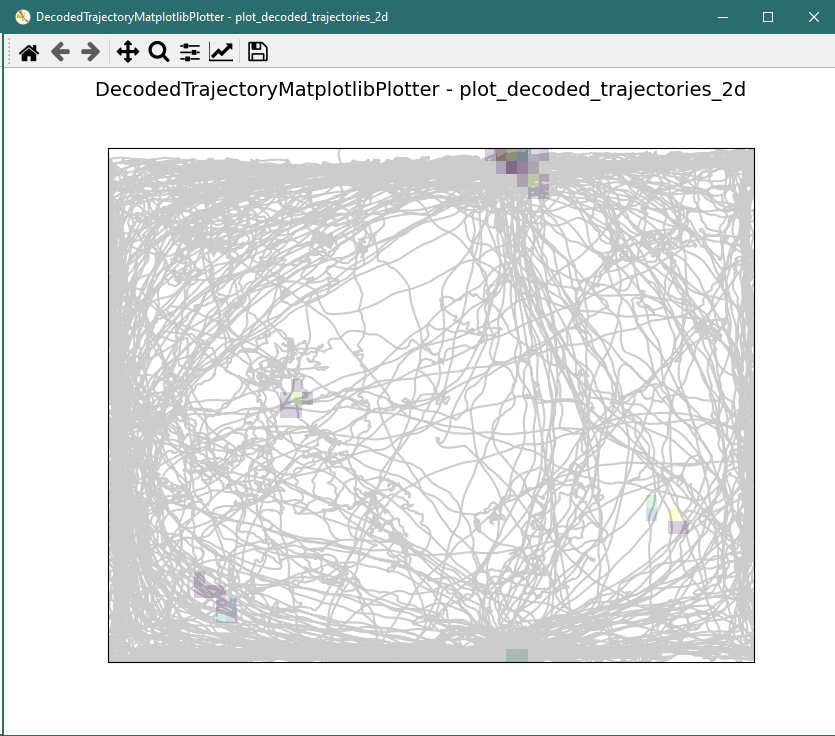

In [ ]:
an_epoch_idx = 125
# a_decoded_traj_plotter.plot_epoch(an_epoch_idx=an_epoch_idx, include_most_likely_pos_line=None, time_bin_index=None)
a_decoded_traj_plotter.plot_epoch(an_epoch_idx=an_epoch_idx, override_plot_linear_idx=0, include_most_likely_pos_line=None, time_bin_index=None)

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.laps import plot_lap_trajectories_2d
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.PhoContainerTool import GenericMatplotlibContainer
# Complete Version:
out_lap_traj_container: GenericMatplotlibContainer = plot_lap_trajectories_2d(curr_active_pipeline.sess, curr_num_subplots=len(curr_active_pipeline.sess.laps.lap_id), active_page_index=0)
# fig, axs, laps_pages

In [ ]:
out_lap_traj_container.close()

In [ ]:
plt.close('all')

In [ ]:
print('test')

# ⚓✅💾 Export ALL tracks (both plotting backends)

In [ ]:
active_2d_plot.dock_manager_widget.get_leaf_only_flat_dock_identifiers_list() # ['interval_overview', 'intervals', 'rasters[raster_overview]', 'rasters[raster_window]', 'new_curves_separate_plot']

In [ ]:
# from pyphoplacecellanalysis.External.pyqtgraph_extensions.exporters.CustomImageExporter import CustomImageExporter
from pyphoplacecellanalysis.External.pyqtgraph.exporters.ImageExporter import ImageExporter as CustomImageExporter

# exporter = ImageExporter(graphics_item)

# Export an active_2d_plot timeline to a multi-page PDF
exporter = CustomImageExporter(active_2d_plot)
saved_pdf_path = exporter.export('output.pdf')


In [ ]:
from pyphoplacecellanalysis.External.pyqtgraph.exporters.ImageExporter import ImageExporter
from pyphoplacecellanalysis.External.pyqtgraph.Qt import QtWidgets

def export_all_scenes_in_widget(parent_widget: QtWidgets.QWidget, base_filename: str):
    """
    Export all QGraphicsScene objects found in QGraphicsView widgets 
    within the parent widget.

    #TODO 2025-12-18 05:59: - [ ] This works correctly for each track within the current viewport window, but does not export for all time.
    
    Args:
        parent_widget: The parent QWidget containing QGraphicsView widgets
        base_filename: Base filename (will append _1, _2, etc. for multiple scenes)
    """
    # Find all QGraphicsView widgets recursively
    views = parent_widget.findChildren(QtWidgets.QGraphicsView)
    
    if not views:
        print("No QGraphicsView widgets found in parent widget")
        return
    
    exported_files = []
    for i, view in enumerate(views):
        scene = view.scene()
        if scene is None:
            continue
            
        # Create exporter for this scene
        exporter = ImageExporter(scene)
        
        # Generate filename
        if len(views) == 1:
            filename = f"{base_filename}.png"
        else:
            name, ext = base_filename.rsplit('.', 1) if '.' in base_filename else (base_filename, 'png')
            filename = f"{name}_{i+1}.{ext}"
        
        # Export
        try:
            exporter.export(fileName=filename)
            exported_files.append(filename)
            print(f"Exported scene {i+1} to {filename}")
        except Exception as e:
            print(f"Error exporting scene {i+1}: {e}")
    
    return exported_files


export_all_scenes_in_widget(parent_widget=active_2d_plot, base_filename='test_export_all_scenes_in_widget')

In [ ]:
from pyphoplacecellanalysis.Pho2D.PyQtPlots.TimeSynchronizedPlotters.PyqtgraphTimeSynchronizedWidget import PyqtgraphTimeSynchronizedWidget
from pyphoplacecellanalysis.Pho2D.matplotlib.MatplotlibTimeSynchronizedWidget import MatplotlibTimeSynchronizedWidget
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.image as mimage
from pyphoplacecellanalysis.General.Mixins.ExportHelpers import FigureToImageHelpers
from pyphoplacecellanalysis.General.Model.Configs.LongShortDisplayConfig import DisplayColorsEnum

# relative_data_output_parent_folder = Path('data').resolve()

relative_data_output_parent_folder = curr_active_pipeline.get_output_path().resolve()
Assert.path_exists(relative_data_output_parent_folder)

## INPUTS: im_posterior_x_stack, track_labels, 
output_pdf_path: Path = relative_data_output_parent_folder.joinpath('2025-12-18_all_timeline_tracks_exported_stack.pdf')

# included_track_dock_identifiers = None
# included_track_dock_identifiers = [
# 	# 'interval_overview',
#     'intervals',
#     # 'rasters[raster_overview]',
#     'rasters[raster_window]',
#      'new_curves_separate_plot',
#     # 'ContinuousDecode_long_LR - t_bin_size: 0.025',
#     # 'ContinuousDecode_long_RL - t_bin_size: 0.025',
#     # 'ContinuousDecode_short_LR - t_bin_size: 0.025',
#     # 'ContinuousDecode_short_RL - t_bin_size: 0.025',
#     # 'marginal_over_track_ID_ContinuousDecode - t_bin_size: 0.025',

#  'ContinuousDecode_long_LR - t_bin_size: 0.05',
#  'ContinuousDecode_long_RL - t_bin_size: 0.05',
#  'ContinuousDecode_short_LR - t_bin_size: 0.05',
#  'ContinuousDecode_short_RL - t_bin_size: 0.05',
#  'marginal_over_track_ID_ContinuousDecode - t_bin_size: 0.05'
# ]
included_track_dock_identifiers = [
	# 'interval_overview',
	'intervals',
	# 'rasters[raster_overview]',
	'rasters[raster_window]',
	'new_curves_separate_plot',
	# 'mpl_position_curves',
	#  'MenuCommand_display_plot_marginal_1D_most_likely_position_comparisons',
	#  'global context',
	#  'global context (overview),
]


# track_labels: List[str] = list(included_track_dock_identifiers_to_track_labels_dict.values())
track_labels = None
saved_output_pdf_path = FigureToImageHelpers.export_wrapped_tracks_to_paged_df(active_2d_plot, output_pdf_path=output_pdf_path, included_track_dock_identifiers=included_track_dock_identifiers, track_labels=track_labels,
																			    debug_max_num_pages=5, dpi=600, debug_print=True)

## OUTPUTS: output_pdf_path, included_track_dock_identifiers

## 2025-12-02 - Matplotlib-based plotter

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode

widget, fig, ax, dDisplayItem = active_2d_plot.add_new_matplotlib_render_plot_widget(name='mpl_position_curves')
pos_obj = curr_active_pipeline.sess.position
pos_df: pd.DataFrame = pos_obj.to_dataframe()
pos_df
ax = ax[0]

## INPUTS: pos_df, ax
print(list(pos_df.columns)) # ['t', 'x', 'y', 'z', 'lin_pos', 'dt', 'velocity_x', 'acceleration_x', 'velocity_y', 'acceleration_y', 'velocity_z', 'acceleration_z', 'x_smooth', 'y_smooth', 'z_smooth', 'velocity_x_smooth', 'acceleration_x_smooth', 'velocity_y_smooth', 'acceleration_y_smooth', 'velocity_z_smooth', 'acceleration_z_smooth', 'approx_head_dir_degrees', 'head_dir_angle_binned', 'lap', 'lap_dir', 'lap_dir_2D', 'lap_dir_1D', 'speed', 'speed_xy'

time_col_name: str = 't'
# pos_col_series_list = ['x_smooth', 'y_smooth', 'z_smooth', 'approx_head_dir_degrees', 'speed', 'speed_xy']
pos_col_series_list = ['x_smooth', 'y_smooth', 'z_smooth', 'lin_pos']

_out_series_dict = {}
for a_pos_col_name in pos_col_series_list:
	# _out_series_dict[a_pos_col_name] = ax.scatter(pos_df[time_col_name], pos_df[a_pos_col_name], label=a_pos_col_name)
	_out_series_dict[a_pos_col_name] = ax.plot(pos_df[time_col_name], pos_df[a_pos_col_name], label=a_pos_col_name)
a_legend = ax.legend()
active_2d_plot.sync_matplotlib_render_plot_widget(identifier='mpl_position_curves', sync_mode=SynchronizedPlotMode.TO_WINDOW)

In [ ]:
ax.clear()

# 💯🎯 2025-12-04 - Predictive Coding Test?

Integrate using a sliding window with the last 30 seconds as inputtttt

For each actual position, see if it was predicted from the preceeding decoded position
 
Kamran suspects that replay will occur of places that the animal is NOT CURRENTLY GOING OR AT. TO "keep em fresh" maybe, or "normalize them in the brain", or "consolidate representation"


# 2025-12-11 - Predictive Coding Follow-up: Locality

- Want a measaure of how close a given decoded posterior (for a specific time bin or range of time bins) is to the animal's actual measured position. -- "locality"
- What if instead a given decoded posterior predicts (e.g. preceeds position) or replays (e.g. follows a previous position with a delay) instead of being synced to the current time.
    - Find all non-running epochs and only decode those


### Add `non_local_locality_measures_epochs_df` to timeline as interval epochs

In [ ]:
## add to the timeline
# a_rect_item, non_local_locality_measures_epochs_df = decoding_locality_measures.add_non_local_epochs_to_intervals_timeline(active_2d_plot=active_2d_plot) ## NO NOT THIS ONE

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding

identifier='non-local-stationary-pbes'
visualization_update_dict = None
# visualization_update_dict = {
#     'non-local': dict(y_location=-2.3, height=0.3, pen_color="#d8db06", pen_opacity=0.4843137254901961, brush_color="#bbae00", brush_opacity=0.3078431372549019),
#     'non-local-pbe': dict(y_location=-2.0, height=0.6, pen_color="#d7db06c1", pen_opacity=0.7843137254901961, brush_color="#bb8900", brush_opacity=0.6078431372549019),
# }

# a_rect_item, _ = decoding_locality_measures.add_non_local_epochs_to_intervals_timeline(active_2d_plot=active_2d_plot, identifier='non-local', non_local_epochs_df=non_local_locality_measures_epochs_df, visualization_update_dict=visualization_update_dict)
a_rect_item_pbe, _ = decoding_locality_measures.add_non_local_epochs_to_intervals_timeline(active_2d_plot=active_2d_plot, identifier=identifier, non_local_epochs_df=overlap_included_only_df_dict['non_moving_PBE'], visualization_update_dict=visualization_update_dict)

In [ ]:
active_2d_plot.remove_rendered_intervals(name='non-local-pbes', debug_print=True)

In [ ]:
active_2d_plot.remove_rendered_intervals(name='non-local', debug_print=True)

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding

visualization_update_dict = None
# visualization_update_dict = {
#     'non-local': dict(y_location=-2.3, height=0.3, pen_color="#d8db06", pen_opacity=0.4843137254901961, brush_color="#bbae00", brush_opacity=0.3078431372549019),
#     'non-local-pbe': dict(y_location=-2.0, height=0.6, pen_color="#d7db06c1", pen_opacity=0.7843137254901961, brush_color="#bb8900", brush_opacity=0.6078431372549019),
# }

# a_rect_item, _ = decoding_locality_measures.add_non_local_epochs_to_intervals_timeline(active_2d_plot=active_2d_plot, identifier='non-local', non_local_epochs_df=non_local_locality_measures_epochs_df, visualization_update_dict=visualization_update_dict)
a_rect_item_pbe, _ = decoding_locality_measures.add_non_local_epochs_to_intervals_timeline(active_2d_plot=active_2d_plot, identifier='non-local-pbes', non_local_epochs_df=overlap_included_only_df_dict['is_in_pbes'], visualization_update_dict=visualization_update_dict)

In [ ]:
if visualization_update_dict is None:
    visualization_update_dict = {
        # 'non-local': dict(y_location=-2.0, height=0.3, pen_color="#d8db06", pen_opacity=0.4843137254901961, brush_color="#bbae00", brush_opacity=0.3078431372549019),
        # 'non-local-pbe': dict(y_location=-2.3, height=0.6, pen_color="#d7db06c1", pen_opacity=0.7843137254901961, brush_color="#bb8900", brush_opacity=0.6078431372549019),
        'non-local-pbes': dict(y_location=-2.0, height=0.9, pen_color="#d8db06", pen_opacity=0.7843137254901961, brush_color="#bbae00", brush_opacity=0.6078431372549019),
    }
active_2d_plot.update_rendered_intervals_visualization_properties(visualization_update_dict)

In [ ]:
non_local_locality_measures_epochs_df

### Pickle the `DecodingLocalityMeasures` obj

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding, PredictiveDecodingComputationsContainer

## INPUTS: decoding_locality_measures
# decoding_locality_measures: DecodingLocalityMeasures = DecodingLocalityMeasures._reload_class(decoding_locality_measures)

## INPUTS: _obj
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-16_DecodingLocalityMeasures_result.pkl')
decoding_locality_measures.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')


### Load the `DecodingLocalityMeasures` obj from pkl

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-16_DecodingLocalityMeasures_result.pkl')

decoding_locality_measures: DecodingLocalityMeasures = DecodingLocalityMeasures.from_file(pkl_output_path)
decoding_locality_measures

In [ ]:
from pyphocorehelpers.gui.Jupyter.AsyncExecutionHelper import run_async

def load_data_DecodingLocalityMeasures(curr_active_pipeline, pkl_path):
    from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures
    return DecodingLocalityMeasures.from_file(pkl_path=pkl_path)

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-16_DecodingLocalityMeasures_result.pkl')
future_load_DecodingLocalityMeasures = run_async(
    load_data_DecodingLocalityMeasures,
    curr_active_pipeline,
    pkl_output_path,
    on_success=lambda result: globals().update({'decoding_locality_measures': result}),
    # on_success=lambda result: setattr(curr_active_pipeline.global_computation_results.computed_data, 'DirectionalDecodersDecoded', result),
)

In [ ]:
decoding_locality_measures

### Manually compute adjacent epochs (obsoliting)

In [ ]:
## Compute adjacent epochs
_temp_non_local_locality_measures_df = deepcopy(non_local_locality_measures_df)
## find the size of diff between sequential remaining timestamps, and compare them to the input base timestamp diff: 0.25
initial_timestamp_diff: float = 0.25 # 250ms

_temp_non_local_locality_measures_df['dt'] = _temp_non_local_locality_measures_df['t'].diff()
_temp_non_local_locality_measures_df

## find entries equal to initial_timestamp_diff so we can merge them:
is_adjacent_epoch_bin = (_temp_non_local_locality_measures_df['dt'] == initial_timestamp_diff)
_temp_non_local_locality_measures_df['is_adjacent_epoch_bin'] = is_adjacent_epoch_bin
_temp_non_local_locality_measures_df

In [ ]:
_temp_non_local_locality_measures_epochs_df = deepcopy(_temp_non_local_locality_measures_df)
_temp_non_local_locality_measures_epochs_df['start'] = _temp_non_local_locality_measures_epochs_df['t']
_temp_non_local_locality_measures_epochs_df['stop'] = _temp_non_local_locality_measures_epochs_df['start'] + _temp_non_local_locality_measures_epochs_df['dt']
_temp_non_local_locality_measures_epochs_df

# quiescent_periods['start'] = spikes_df['t_rel_seconds'].shift(1)


In [ ]:
from neuropy.utils.mathutil import contiguous_regions

idnan = contiguous_regions(_temp_non_local_locality_measures_df['is_adjacent_epoch_bin'].to_numpy())  # identify missing data points
idnan

In [ ]:
Epoch.from_boolean_array(_temp_non_local_locality_measures_df['is_adjacent_epoch_bin'].to_numpy(), t=_temp_non_local_locality_measures_df['t'].to_numpy())

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import _split_into_consequitive_sequences


column_name: str = 'is_adjacent_epoch_bin'

accumulated_run_tuples = _split_into_consequitive_sequences(df=_temp_non_local_locality_measures_df, column_name=column_name)
accumulated_run_tuples

In [ ]:
split_indicies = accumulated_run_tuples['Index'].to_numpy()
split_indicies

In [ ]:
dfs = np.split(deepcopy(_temp_non_local_locality_measures_df), split_indicies)
dfs

In [ ]:


render_scrollable_colored_table_from_dataframe(_temp_non_local_locality_measures_df)

In [ ]:
render_scrollable_colored_table_from_dataframe(accumulated_run_tuples)

In [ ]:
render_scrollable_colored_table_from_dataframe(accumulated_run_tuples)

In [ ]:
accumulated_run_tuples = accumulated_run_tuples[accumulated_run_tuples[column_name]] ## get only the seqeuences of repeated run epochs, not the non-run epochs
accumulated_run_tuples

In [ ]:
## INPUTS: _temp_non_local_locality_measures_df
long_accumulated_run_tuples = accumulated_run_tuples[accumulated_run_tuples['num_timesteps'] > 3]

flat_point_times = _temp_non_local_locality_measures_df['t'].to_numpy()

final_accumulated_contiguous_epochs = []

for row in long_accumulated_run_tuples.itertuples(index=False):
    row = row._asdict()
    # is_adjacent_value: bool = row[column_name]
    is_adjacent_value: bool = row['value']
    if is_adjacent_value:
        a_start_idx = row['start_idx']
        an_end_idx = row['end_idx']
        a_value = row['value']

        # _temp_non_local_locality_measures_df.iloc[a_start_idx]
        final_accumulated_contiguous_epochs.append((flat_point_times[a_start_idx], flat_point_times[an_end_idx]))




final_accumulated_contiguous_epochs: pd.DataFrame = pd.DataFrame.from_records(final_accumulated_contiguous_epochs, columns=['start', 'stop'])
final_accumulated_contiguous_epochs['duration'] = final_accumulated_contiguous_epochs['stop'] - final_accumulated_contiguous_epochs['start']
final_accumulated_contiguous_epochs


In [ ]:
_temp_non_local_locality_measures_df

In [ ]:
df[“event”] = ((df.frame - df.frame.shift() - 1) != 0).cumsum()

In [ ]:
# _out_data[a_decoder_name] = _out_data[a_decoder_name].position.adding_lap_info(laps_df=laps_df, inplace=False)
# _out_data[a_decoder_name] = _out_locality_measures_df.time_point_event.adding_true_decoder_identifier(t_start=t_start, t_delta=t_delta, t_end=t_end) ## ensures ['maze_id', 'is_LR_dir']

In [ ]:
active_epochs_df = curr_active_pipeline.sess.epochs.to_dataframe()
active_epochs_df = active_epochs_df[np.isin(epochs_df['label'], ['roam', 'sprinkle'])]
active_epochs_df

In [ ]:

from pyphoplacecellanalysis.External.peak_prominence2d import compute_prominence_contours
import numpy as np
from matplotlib.path import Path

a_p_x_given_n = deepcopy(_obj.p_x_given_n_dict['roam'])
num_timestamps: int = np.shape(a_p_x_given_n)[-1]

np.shape(a_p_x_given_n) # (41, 63, 103948)


In [ ]:
# downsample_factor: int = 2

# np.shape(a_p_x_given_n) # (41, 63, 103948)
# H, W, T = np.shape(a_p_x_given_n)
# a_p_x_given_n_small = a_p_x_given_n.reshape(H//downsample_factor, downsample_factor, W//downsample_factor, downsample_factor, T).mean(axis=(1, 3))
# np.shape(a_p_x_given_n_small)


def approx_downsample_pdf(a_p_x_given_n, downsample_factor = 4):
    H, W, T = a_p_x_given_n.shape
    k = downsample_factor

    # compute padding needed (0..k-1)
    pad_h = (k - (H % k)) % k
    pad_w = (k - (W % k)) % k

    # pad only spatial dims; replicate edge values to avoid introducing new mass
    a_padded = np.pad(a_p_x_given_n,
                    pad_width=((0, pad_h), (0, pad_w), (0, 0)),
                    mode='edge').astype(float)

    Hc, Wc = a_padded.shape[0], a_padded.shape[1]

    # block-sum over k x k blocks, preserving total mass
    a_blocksum = a_padded.reshape(Hc//k, k, Wc//k, k, T).sum(axis=(1, 3))

    # renormalize each time bin to ensure it's a PDF (sums to 1)
    mass = a_blocksum.sum(axis=(0, 1), keepdims=True)  # shape (1,1,T)
    # avoid division by zero: if mass==0 leave as-is
    mass_nonzero = mass.copy()
    mass_nonzero[mass_nonzero == 0] = 1.0
    a_p_x_given_n_small = a_blocksum / mass_nonzero

    # shapes:
    # original: (H, W, T)
    # small: (ceil(H/k), ceil(W/k), T)
    return a_p_x_given_n_small


a_p_x_given_n_small = approx_downsample_pdf(a_p_x_given_n=a_p_x_given_n, downsample_factor=4)
np.shape(a_p_x_given_n_small)


In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import approx_downsample_pdf

a_p_x_given_n_small, xbin_centers_small, ybin_centers_small = approx_downsample_pdf(a_p_x_given_n=a_p_x_given_n, xbin_centers = _obj.xbin_centers, ybin_centers = _obj.ybin_centers, downsample_factor=4)
np.shape(a_p_x_given_n_small)
xbin_centers_small

In [ ]:
xbin_centers = _obj.xbin_centers
ybin_centers = _obj.ybin_centers

# positions = 
# distances = np.min(np.sqrt(((np.argwhere(a_p_x_given_n == a_p_x_given_n.max())[:, None, :] - positions[None, :, :])**2).sum(axis=2)), axis=0)
# distances = np.linalg.norm(_obj.gaussian_volume.reshape(-1, _obj.gaussian_volume.shape[-1]) - a_p_x_given_n.reshape(-1, a_p_x_given_n.shape[-1]), axis=0)
# assume:
# _obj.gaussian_volume: (H, W, T)
# a_p_x_given_n: (H, W, T)
# xbin_centers: shape (H,)
# ybin_centers: shape (W,)

X, Y = np.meshgrid(xbin_centers, ybin_centers, indexing='ij')  # shape (H, W)

# Flatten spatial dims for weighted sum
X_flat = X[:, :, None]  # (H, W, 1)
Y_flat = Y[:, :, None]

# Expected positions of _obj.gaussian_volume
mean_X_obj = (X_flat * _obj.gaussian_volume).sum(axis=(0,1))  # shape (T,)
mean_Y_obj = (Y_flat * _obj.gaussian_volume).sum(axis=(0,1))  # shape (T,)

# Expected positions of a_p_x_given_n
mean_X_a = (X_flat * a_p_x_given_n).sum(axis=(0,1))  # shape (T,)
mean_Y_a = (Y_flat * a_p_x_given_n).sum(axis=(0,1))  # shape (T,)

distances_spatial = np.sqrt((mean_X_obj - mean_X_a)**2 + (mean_Y_obj - mean_Y_a)**2)  # shape (T,)

distances_spatial



In [ ]:
a_p_x_given_n = deepcopy(a_p_x_given_n_small)
xbin_centers = xbin_centers_small
ybin_centers = ybin_centers_small


# Extract your 2D posterior slice at a specific timestamp
for a_timestamp_idx in np.arange(num_timestamps):
    if a_timestamp_idx < 10:
        posterior_slice = a_p_x_given_n[:, :, a_timestamp_idx]  # Shape: (n_x_bins, n_y_bins) or similar

        # Compute prominence - note the transpose!
        xx, yy, slab, peaks_dict, id_map, prominence_map, parent_map = compute_prominence_contours(
            xbin_centers=xbin_centers,
            ybin_centers=ybin_centers,
            slab=posterior_slice.T,  # IMPORTANT: transpose the slice
            step=0.05,                # smaller = finer but slower (0.01-0.1 typical)
            min_depth=0.1,            # minimum prominence threshold
            min_area=None,
            include_edge=True,
            verbose=False
        )

        # Sort peaks by prominence to get top 3
        peaks_by_prominence = sorted(peaks_dict.items(), 
                                    key=lambda x: x[1]['prominence'], 
                                    reverse=True)
        top_3_peaks = peaks_by_prominence[:3]

        # Get the top peak
        top_peak_id, top_peak_info = top_3_peaks[0]

        # Create a mask for the region around the top peak
        # The outermost contour defines the peak's region
        top_peak_contour = top_peak_info['contour']  # or top_peak_info['contours'][-1]

        # Create a boolean mask from the contour
        mask = np.zeros(posterior_slice.T.shape, dtype=bool)  # Note: transposed shape
        yy_grid, xx_grid = np.meshgrid(ybin_centers, xbin_centers, indexing='ij')
        points = np.vstack([xx_grid.ravel(), yy_grid.ravel()]).T

        # Check which points are inside the contour
        inside = top_peak_contour.contains_points(points)
        mask = inside.reshape(posterior_slice.T.shape)

        # If you want the mask in the original orientation:
        mask = mask.T

        # Summary of results
        print(f"Found {len(peaks_dict)} peaks")
        print(f"\nTop 3 peaks by prominence:")
        for i, (peak_id, peak_info) in enumerate(top_3_peaks):
            print(f"  {i+1}. Peak {peak_id}: prominence={peak_info['prominence']:.3f}, "
                f"height={peak_info['height']:.3f}, center={peak_info['center']}")

        # Access peak properties:
        # top_peak_info['center']      - (x, y) center coordinates
        # top_peak_info['prominence']  - prominence value
        # top_peak_info['height']      - peak height
        # top_peak_info['area']        - contour area
        # top_peak_info['contours']    - list of contours from peak to col


In [ ]:
out_layers, config_widgets_dict_dict, dock_window = _obj.add_all_layers(sync_plotters=sync_plotters)

### Pickle the `PredictiveDecoding` obj

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding, PredictiveDecodingComputationsContainer

_obj: PredictiveDecoding = PredictiveDecoding._reload_class(_obj)

## INPUTS: _obj
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-15_PredictiveDecoding_result.pkl')
_obj.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')




In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding

_obj: PredictiveDecoding = PredictiveDecoding._reload_class(_obj)

## INPUTS: _obj
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-15_PredictiveDecoding_result.pkl')
_obj.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')




### Load the `PredictiveDecoding` obj from pkl

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-18_PredictiveDecoding_result.pkl')

_obj: PredictiveDecoding = PredictiveDecoding.from_file(pkl_output_path)
_obj

In [ ]:
total_num_possible_bins: int = len(_obj.xbin_centers) * len(_obj.ybin_centers)
total_num_possible_bins


### Plot locality measure over time

In [ ]:
import plotly.express as px
## INPUTS: _out_locality_measures_df
px.line(_out_locality_measures_df, x="t", y=["roam", "sprinkle"]).show()



In [ ]:
px.line(_out_locality_measures_df, x="t", y=["dist_to_highest_peak_roam", "mask_overlap_roam"]).show()



In [ ]:
px.line(_out_locality_measures_df, x="t", y=["dist_to_highest_peak_sprinkle", "mask_overlap_sprinkle"]).show()

### Add `_out_locality_measures_df` as timeline track so we can see them synced

In [ ]:
track_ax.clear()

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode

## INPUTS: _obj.locality_measures_df
_out_locality_measures_df = _obj.locality_measures_df
_out_locality_measures_df

spike_raster_plt_2d: Spike2DRaster = spike_raster_window.spike_raster_plt_2d

spike_raster_plt_2d: Spike2DRaster = spike_raster_window.spike_raster_plt_2d

sync_mode = SynchronizedPlotMode.TO_WINDOW
# sync_mode = SynchronizedPlotMode.TO_GLOBAL_DATA

# track_dock_identifier: str = f'LocalityComputations'
# ts_widget, fig, ax_list, dDisplayItem = spike_raster_plt_2d.add_new_matplotlib_render_plot_widget(name=track_dock_identifier, sync_mode=sync_mode)
# track_ax = ax_list[0]

added_track_widgets = {}
track_ax_dict = {}

all_computation_names = ['dist_to_highest_peak', 'mask_overlap', 'earthmovers']
for a_computation_measure_name in all_computation_names:
    track_dock_identifier: str = f'Locality[{a_computation_measure_name}]'
    ts_widget, fig, ax_list, dDisplayItem = spike_raster_plt_2d.add_new_matplotlib_render_plot_widget(name=track_dock_identifier, sync_mode=sync_mode)
    track_ax = ax_list[0]

    track_ax_dict[a_computation_measure_name] = track_ax
    added_track_widgets[track_dock_identifier] = ts_widget


all_epoch_names = ["roam", "sprinkle"]
# Predefine distinct colors (extend as needed)
epoch_colors = {
    "roam": "tab:blue",
    "sprinkle": "tab:orange",
}


for an_epoch_name in _obj.epoch_names:
    color = epoch_colors.get(an_epoch_name, None)
    
    # track_dock_identifier: str = f'LocalityEarthMov[{an_epoch_name}]'
    # ts_widget, fig, ax_list, dDisplayItem = spike_raster_plt_2d.add_new_matplotlib_render_plot_widget(name=track_dock_identifier, sync_mode=SynchronizedPlotMode.TO_WINDOW)
    # track_ax = ax_list[0]
    # an_artist = track_ax.scatter(_out_locality_measures_df['t'], _out_locality_measures_df[an_epoch_name], label=track_dock_identifier)
    
    for a_computation_measure_name in all_computation_names:
        track_ax = track_ax_dict[a_computation_measure_name]
        a_key = f"{a_computation_measure_name}_{an_epoch_name}"
        markerline, stemlines, baseline = track_ax.scatter(_out_locality_measures_df['t'], _out_locality_measures_df[a_key], color, label=a_key, 
                                                # color=color,
                                                # use_line_collection=True,
                                            )
        # markerline, stemlines, baseline = track_ax.stem(_out_locality_measures_df['t'], _out_locality_measures_df[a_key], color, label=a_key, 
        #                                         # color=color,
        #                                         # use_line_collection=True,
        #                                     )
        # plt.setp(stemlines, 'color', 'white')
        # plt.setp(stemlines, 'linestyle', 'dotted')
        # # Optional aesthetics
        # markerline.set_markersize(4)
        # markerline.set_color(color) 
        # baseline.set_visible(False)
        track_ax.legend()



    # --- STEM PLOT instead of scatter ---

    # a_computation_measure_name: str = 'dist_to_highest_peak'
    # a_key = f"{a_computation_measure_name}_{an_epoch_name}"
    # markerline, stemlines, baseline = track_ax.stem(_out_locality_measures_df['t'], _out_locality_measures_df[a_key], color, label=a_key, 
    #                                         # color=color,
    #                                         # use_line_collection=True,
    #                                     )
    # # stemlines.set_Color(color)
    # # plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    # plt.setp(stemlines, 'color', 'white')
    # plt.setp(stemlines, 'linestyle', 'dotted')


    # # Optional aesthetics
    # markerline.set_markersize(4)
    # markerline.set_color(color) 
    # baseline.set_visible(False)



    # a_computation_measure_name: str = 'mask_overlap'
    # a_key = f"{a_computation_measure_name}_{an_epoch_name}"
    # markerline, stemlines, baseline = track_ax.stem(_out_locality_measures_df['t'], _out_locality_measures_df[a_key], label=a_key, 
    #                                         # use_line_collection=True,
    #                                     )
    # # Optional aesthetics
    # markerline.set_markersize(4)
    # markerline.set_color(color)
    # baseline.set_visible(False)




    
    
# added_track_widgets[track_dock_identifier] = ts_widget

# track_ax.legend()



In [ ]:
_out_locality_measures_df

### Add to curr_active_pipeline.global_computation_results to save it

In [ ]:
curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'] = _obj



In [ ]:
fig, ax = plt.subplots(1, 1)
_out_locality_measures_df.plot.scatter(x='t', y='roam', ax=ax)
_out_locality_measures_df.plot.scatter(x='t', y='sprinkle', ax=ax)


In [ ]:

for k, v in _out_earthmovers_dist.items():
    plt.


## ⚓📈✅ `napari` 3D plots

In [ ]:
from pyphoplacecellanalysis.GUI.Napari.napari_helpers import napari_from_layers_dict
import napari

# inputs: moving_avg_meas_pos_overlap_dict, C_trial_by_trial_correlation_matrix
viewer_kwargs = {}
image_layer_dict = {}
layers_dict = None
if layers_dict is None:
    # build the default from the values:
    layers_dict = {} ## initialize to empty dict

    if gaussian_volume is not None:
        layers_dict['gaussian_volume'] = dict(blending='translucent', colormap='viridis', name='gauss_vol', img_data=gaussian_volume) # .transpose(1, 0, 2)
    

    layers_dict.update({
        f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg_meas_pos_overlap', img_data=v) for k, v in moving_avg_meas_pos_overlap_dict.items() # .transpose(1, 0, 2)
    })

    layers_dict.update({
        f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg', img_data=v) for k, v in moving_avg_dict.items() # .transpose(1, 0, 2)
    })
    
    # ## TODO: add regular p_x_given_n for each decoder:
    # layers_dict.update({
    #     f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg', img_data=v) for k, v in moving_avg_dict.items() # .transpose(1, 0, 2)
    # })
    

viewer = None
for i, (a_name, layer_dict) in enumerate(layers_dict.items()):
    img_data = layer_dict.pop('img_data').astype(float) # assumes integrated img_data in the layers dict
    if viewer is None: #i == 0:
        # viewer = napari.view_image(img_data) # rgb=True
        viewer = napari.Viewer(**viewer_kwargs)

    image_layer_dict[a_name] = viewer.add_image(img_data, **(dict(name=a_name)|layer_dict))

viewer.dims.axis_labels = ('xbin', 'ybin', 't_bin')
viewer.grid.enabled = True # enables the grid layout of the data so adjacent data is displayed next to each other

# outputs: viewer, image_layer_dict

In [ ]:
## Hack: add the layers post-hoc
updated_layers_dict = {}
updated_layers_dict.update({
    f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg', img_data=v) for k, v in moving_avg_dict.items() # .transpose(1, 0, 2)
})

for i, (a_name, layer_dict) in enumerate(updated_layers_dict.items()):
    img_data = layer_dict.pop('img_data').astype(float) # assumes integrated img_data in the layers dict
    image_layer_dict[a_name] = viewer.add_image(img_data, **(dict(name=a_name)|layer_dict))
    

In [ ]:
viewer.grid.enabled = True
viewer.grid.stride = 1  # number of layers per viewbox
# viewer.grid.spacing = 0.1  # padding between viewboxes (0-1 for relative, >1 for pixels)
viewer.grid

# ⚓🟢 2025-12-11 - Retrospective search for previous stationarDecodedEvents where the posteriors matches the current position


## MAKSED time bins

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import DirectionalDecodersContinuouslyDecodedResult
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult, SingleEpochDecodedResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import filter_to_position_like_epochs_only
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures

# an_epoch_name = 'roam'
a_t_bin_size: float = 0.025
# a_result_decoded: DecodedFilterEpochsResult = container.epochs_decoded_result_cache_dict[a_t_bin_size][an_epoch_name]
# a_result_decoded

In [ ]:
## OLD: Filtering by minimum number of spikes

# extant_decoded_time_bin_size = 0.250
directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = deepcopy(curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'])

for extant_decoded_time_bin_size, a_result_decoded in directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict.items():
    a_result_decoded: SingleEpochDecodedResult = directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size]
    a_result_decoded: DecodedFilterEpochsResult = DecodedFilterEpochsResult.init_from_single_epoch_result(single_epoch_result=a_result_decoded, decoding_time_bin_size=extant_decoded_time_bin_size) ## convert to a `DecodedFilterEpochsResult` for masking
    a_masked_result, mask_index_tuple = a_result_decoded.mask_computed_DecodedFilterEpochsResult_by_required_spike_counts_per_time_bin(
        spikes_df=deepcopy(container.pf1D_Decoder_dict[an_epoch_name].spikes_df),
        min_num_spikes_per_bin_to_be_considered_active=5,
        min_num_unique_active_neurons_per_time_bin=1,
        masked_bin_fill_mode='dropped',
        # masked_bin_fill_mode='nan_filled'
    )
    # a_masked_result: DecodedFilterEpochsResult
    # is_time_bin_active_list, inactive_mask_list, all_time_bin_indicies_list, last_valid_indices_list = mask_index_tuple
    ## re-assign to `directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size]`
    directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size] = a_masked_result.get_result_for_epoch(0) ## get the single epoch, re-assign

In [ ]:
## NEW: filtering by whether decoded posterior in each t_bin is "position-like"
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import filter_to_position_like_epochs_only

directional_decoders_decode_result: DirectionalDecodersContinuouslyDecodedResult = deepcopy(curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'])

for extant_decoded_time_bin_size, a_result_decoded in directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict.items():
    a_result_decoded: SingleEpochDecodedResult = directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size]
    a_result_decoded: DecodedFilterEpochsResult = DecodedFilterEpochsResult.init_from_single_epoch_result(single_epoch_result=a_result_decoded, decoding_time_bin_size=extant_decoded_time_bin_size) ## convert to a `DecodedFilterEpochsResult` for masking

    ## need to build at `p_x_given_n_dict: Dict[str, NDArray[ND.Shape["N_X_BINS, N_Y_BINS, N_TIME_BINS"], np.floating]] =`
    # p_x_given_n_dict: Dict[str, NDArray[ND.Shape["N_X_BINS, N_Y_BINS, N_TIME_BINS"], np.floating]] = DecodingLocalityMeasures.perform_build_normalized_outputs(p_x_given_n=a_result_decoded.p_x_given_n, epoch_names=['roam', 'sprinkle'])
    filtered_decoded_local_epochs_result, scoring_results = filter_to_position_like_epochs_only(decoded_local_epochs_result=a_result_decoded, xbin=a_decoder.xbin, ybin=a_decoder.ybin)

    # a_masked_result: DecodedFilterEpochsResult
    # is_time_bin_active_list, inactive_mask_list, all_time_bin_indicies_list, last_valid_indices_list = mask_index_tuple
    ## re-assign to `directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size]`
    directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size] = filtered_decoded_local_epochs_result.get_result_for_epoch(0) ## get the single epoch, re-assign

In [ ]:
filtered_decoded_local_epochs_result

In [ ]:
masked_directional_decoders_decode_result = directional_decoders_decode_result

In [ ]:
window_size = 60
pos_df: pd.DataFrame = deepcopy(curr_active_pipeline.sess.position.to_dataframe())

## INPUTS: directional_decoders_decode_result

# Create DecodingLocalityMeasures first (required for new interface)
masked_locality_measures = DecodingLocalityMeasures.init_from_decode_result(
    curr_active_pipeline=curr_active_pipeline,
    directional_decoders_decode_result=masked_directional_decoders_decode_result,
    extant_decoded_time_bin_size=extant_decoded_time_bin_size,
    sigma=None  # Will be computed automatically if not provided
)



In [ ]:
masked_directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size]

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer

# Create PredictiveDecoding using the new simplified interface
masked_predictive_decoding: PredictiveDecoding = PredictiveDecoding.init_from_decode_result(
    pos_df=pos_df,
    locality_measures=masked_locality_measures,
    a_result_decoded=masked_directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size],
    window_size=window_size
)

In [ ]:
# Use sigma from locality_measures (computed automatically) or compute from bin sizes if not available
if masked_locality_measures.sigma is None:
    x_step: float = np.nanmean(np.diff(masked_predictive_decoding.xbin))
    y_step: float = np.nanmean(np.diff(masked_predictive_decoding.ybin))
    sigma: float = np.nanmax([x_step, y_step]) * 5.0
    print(f'computed sigma from bin sizes: {sigma}')
else:
    sigma = masked_locality_measures.sigma
    print(f'using sigma from masked_locality_measures: {sigma}')

# Compute predictive decoding outputs
moving_avg_dict, moving_avg_meas_pos_overlap_dict, gaussian_volume = masked_predictive_decoding.compute(sigma=sigma)

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer, DecodingLocalityMeasures, PredictiveDecoding

## build a container to store the masked results:
masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(predictive_decoding=masked_predictive_decoding, is_global=True)

In [ ]:
# Store the PredictiveDecoding instance in the container
masked_container.predictive_decoding = masked_predictive_decoding

epoch_names: List[str] = ['roam', 'sprinkle']
for an_epoch_name in epoch_names:
    ## call the main `compute_future_and_past_analysis` for each epoch:
    masked_container.debug_computed_dict[an_epoch_name] = {}
    _out = masked_container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name='roam')
    epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, processed_items_list_dict = _out
    masked_container.debug_computed_dict[an_epoch_name] = {'epoch_high_prob_pos_masks': epoch_high_prob_pos_masks, 'epoch_matching_positions': epoch_matching_positions, 'past_future_info_dict': past_future_info_dict}
    

In [ ]:
## OUTPUTS: masked_container

## END MAKSED time bins

In [ ]:
# Create PredictiveDecoding using the new simplified interface
# predictive_decoding: PredictiveDecoding = PredictiveDecoding.init_from_decode_result(
#     curr_active_pipeline=owning_pipeline_reference,
#     locality_measures=locality_measures,
#     a_result_decoded=a_result_decoded,
#     window_size=window_size
# )

predictive_decoding: PredictiveDecoding = curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].predictive_decoding
masked_predictive_decoding = deepcopy(predictive_decoding)
masked_predictive_decoding

In [ ]:
masked_predictive_decoding.locality_measures

In [ ]:

# Use sigma from locality_measures (computed automatically) or compute from bin sizes if not available
if locality_measures.sigma is None:
    x_step: float = np.nanmean(np.diff(predictive_decoding.xbin))
    y_step: float = np.nanmean(np.diff(predictive_decoding.ybin))
    sigma: float = np.nanmax([x_step, y_step]) * 5.0
    print(f'computed sigma from bin sizes: {sigma}')
else:
    sigma = locality_measures.sigma
    print(f'using sigma from locality_measures: {sigma}')

# Compute predictive decoding outputs
moving_avg_dict, moving_avg_meas_pos_overlap_dict, gaussian_volume = predictive_decoding.compute(sigma=sigma)

# Store the PredictiveDecoding instance in the container



epoch_names: List[str] = ['roam', 'sprinkle']
for an_epoch_name in epoch_names:    
    curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].debug_computed_dict[an_epoch_name] = {}
    _out = curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name='roam')
    epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, _out_processed_items_list_dict = _out
    curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].debug_computed_dict[an_epoch_name] = {'epoch_high_prob_pos_masks': epoch_high_prob_pos_masks, 'epoch_matching_positions': epoch_matching_positions, 'past_future_info_dict': past_future_info_dict}
    

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult

decoding_time_bin_size: float = 0.500
# decoding_time_bin_size: float = 1.0
a_decoder = deepcopy(directional_decoders_decode_result.pseudo2D_decoder)

# non_running_epochs_df: pd.DataFrame = curr_active_pipeline.sess.position.compute_speed_info().position.detect_general_non_running_epochs(max_run_speed=2.0, minimum_epoch_duration=1.0)
# non_running_epochs_df

non_running_epochs = curr_active_pipeline.sess.compute_non_running_epochs(curr_active_pipeline.sess, max_run_speed=10.0) 
# non_running_epochs_df: pd.DataFrame = curr_active_pipeline.sess.non_moving_pbe_non_local_epochs
# non_running_epochs_df

## get the non-local, non-pbe, epochs
non_moving_pbe_non_local_epochs = getattr(curr_active_pipeline.sess, 'non_moving_pbe_non_local_epochs', None)
if non_moving_pbe_non_local_epochs is None:
    ## add it to session
    overlap_included_only_df_dict = decoding_locality_measures.get_non_moving_PBE_non_local_epochs(curr_active_pipeline.sess, merging_adjacent_max_separation_sec=0.5, should_assign_to_session=True)
    non_local_PBE_non_moving_epochs_df: pd.DataFrame = overlap_included_only_df_dict['non_moving_pbe_non_local_epochs']
    # curr_active_pipeline.sess.non_moving_pbe_non_local_epochs = deepcopy(non_local_PBE_non_moving_epochs_df)

# non_running_epochs = curr_active_pipeline.sess.non_running_epochs
assert non_moving_pbe_non_local_epochs is not None
non_moving_pbe_non_local_epochs


In [ ]:
## downsampled_decoding_locality_measures

## INPUTS: a_decoder

# filter_epochs = deepcopy(non_running_epochs_df)
filter_epochs = deepcopy(non_moving_pbe_non_local_epochs)

# Decode the specific epochs to get a DecodedFilterEpochsResult
decoded_epochs_result: DecodedFilterEpochsResult = a_decoder.decode_specific_epochs(
    spikes_df= deepcopy(directional_decoders_decode_result.spikes_df),
    filter_epochs=filter_epochs,  # Can be pd.DataFrame or Epoch object
    decoding_time_bin_size=decoding_time_bin_size,
    debug_print=False
)
## 41s 
## Slow part, 1.0 sec bin size == 2 mins
decoded_epochs_all_filter_epochs: pd.DataFrame = ensure_dataframe(decoded_epochs_result.filter_epochs)
decoded_epochs_result.marginal_z_list = [None for i in np.arange(decoded_epochs_result.num_filter_epochs)]

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding

decoding_locality_measures = DecodingLocalityMeasures._reload_class(decoding_locality_measures)
downsampled_decoding_locality_measures = DecodingLocalityMeasures._reload_class(downsampled_decoding_locality_measures)


In [ ]:
downsampled_decoding_locality_measures: DecodingLocalityMeasures = decoding_locality_measures.downsampling_spatial_data(spatial_axes=(0, 1, 2), factors=(5, 5), axes=(0, 1))
downsampled_decoding_locality_measures ## ~3m

In [ ]:
from neuropy.utils.probability_downsampling import RigorousPDFDownsampler

downsampled_decoded_epochs_result = deepcopy(decoded_epochs_result)
spatial_axes=(0, 1, 2)
factors=(5, 5)
axes=(0, 1)

downsampled_decoded_epochs_result.p_x_given_n_list = []
for epoch_idx, an_epoch_pdf in enumerate(decoded_epochs_result.p_x_given_n_list):
    coarse_pdf, coarse_bin_sizes, coarse_bins = RigorousPDFDownsampler(an_epoch_pdf, spatial_axes=spatial_axes).downsample(factors=factors, axes=axes)
    downsampled_decoded_epochs_result.p_x_given_n_list.append(coarse_pdf) # = for v in downsampled_decoded_epochs_result.p_x_given_n_list]
	

## OUTPUTS: downsampled_decoded_epochs_result

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding

## INPUTS: downsampled_decoding_locality_measures: DecodingLocalityMeasures
# active_decoding_locality_meas: DecodingLocalityMeasures  = decoding_locality_measures ## full size
active_decoding_locality_meas: DecodingLocalityMeasures = downsampled_decoding_locality_measures ## downsampled

# with VizTracer(output_file=f"viztracer_{get_now_time_str()}-PredictiveDecoding.calculate_position_epoch_overlap.json", min_duration=200, tracer_entries=3000000, ignore_frozen=True) as tracer:

## INPUTS: active_pos_time_bin_centers, active_gaussian_volume
active_pos_time_bin_centers, pos_overlap_with_all_past_epochs_list = PredictiveDecoding.calculate_position_epoch_overlap(
                                                            # gaussian_volume=gaussian_volume, pos_time_bin_centers=pos_time_bin_centers,
                                                            gaussian_volume=active_decoding_locality_meas.gaussian_volume, pos_time_bin_centers=active_decoding_locality_meas.time_window_centers, ## 2025-12-11 05:37: - [ ] Really only want the position timestamps during laps/running
                                                            # decoded_epochs_all_filter_epochs=decoded_epochs_all_filter_epochs, decoded_epochs_result=decoded_epochs_result, ## REGULAR
                                                            decoded_epochs_all_filter_epochs=decoded_epochs_all_filter_epochs, decoded_epochs_result=downsampled_decoded_epochs_result, ## DOWNSAMPLED
                                                            curr_decoder_context_idx=0, debug_max_time_steps_to_process=30000)

## OUTPUTS: pos_overlap_with_all_past_epochs_list, active_pos_time_bin_centers


# _obj: PredictiveDecoding = PredictiveDecoding.init_from_decode_result(curr_active_pipeline,
#                                                                     locality_measures=downsampled_decoding_locality_measures, a_result_decoded=downsampled_decoded_epochs_result,
#                                                                     sigma=downsampled_decoding_locality_measures.sigma,
#                                                                     )



# 20000 time_steps ~1 minute
# pred_decoding_obj: PredictiveDecoding = PredictiveDecoding.init_from_decode_result(curr_active_pipeline, a_result_decoded=downsampled_decoded_epochs_result, sigma=downsampled_decoding_locality_measures.sigma,
#                                                                 )

pred_decoding_obj: PredictiveDecoding = PredictiveDecoding.init_from_decode_result(curr_active_pipeline,
                                                                    locality_measures=downsampled_decoding_locality_measures, a_result_decoded=downsampled_decoded_epochs_result,
                                                                    sigma=downsampled_decoding_locality_measures.sigma,
                                                                    )
# pred_decoding_obj
moving_avg_dict, moving_avg_meas_pos_overlap_dict, gaussian_volume = pred_decoding_obj.compute(sigma=pred_decoding_obj.locality_measures.sigma)

In [ ]:
# Add layers for visualization
out_layers, config_widgets_dict_dict, dock_window = pred_decoding_obj.add_all_layers(sync_plotters=sync_plotters)

### Save to Pickle file

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-24_pred_decoding_result.pkl')
pred_decoding_obj.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-24_masked_container.pkl')
masked_container.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-13_masked_container.pkl')
masked_container.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

### Load from pickle file!

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-18_pred_decoding_result.pkl')
pred_decoding_obj = PredictiveDecoding.from_file(pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')
pred_decoding_obj

# Overflow

In [ ]:
container.predictive_decoding.locality_measures_df

In [ ]:
# container.predictive_decoding

In [ ]:
# moving_avg_meas_pos_overlap_dict

moving_avg = add_predictive_decoding_layers(curr_active_pipeline=curr_active_pipeline, directional_decoders_decode_result=directional_decoders_decode_result, window_size=200)
out_layers, config_widgets_dict = add_moving_average_layers(sync_plotters=sync_plotters, moving_avg=moving_avg)


In [ ]:
pos_overlap_with_all_past_epochs_list

In [ ]:
len(active_pos_time_bin_centers)

In [ ]:
# pred_decoding_obj.moving_avg
# np.shape(pred_decoding_obj.moving_avg) # (13, 13, 2, 151732)
pred_decoding_obj.moving_avg_dict
# pred_decoding_obj.moving_avg_meas_pos_overlap_dict


In [ ]:
decoded_epochs_all_filter_epochs

In [ ]:
threshold = np.nanpercentile(pos_overlap_with_all_past_epochs_list, 90)

max_across_all_prev_epochs_per_pos_frame = np.array([np.nanmax(v) for v in pos_overlap_with_all_past_epochs_list])
top10_mask = pos_overlap_with_all_past_epochs_list >= threshold
top10_values = pos_overlap_with_all_past_epochs_list[top10_mask]
indices = np.argwhere(top10_mask)

# np.save("max_across_all_prev_epochs_per_pos_frame.npy", max_across_all_prev_epochs_per_pos_frame)
# active_pos_time_bin_centers = pos_time_bin_centers[:20000]
np.shape(active_pos_time_bin_centers)
# global_max_overlap = np.nanmax(pos_overlap_with_all_past_epochs_list)
global_min_overlap = np.nanmin(np.hstack(pos_overlap_with_all_past_epochs_list))
global_mean_overlap = np.nanmean(np.hstack(pos_overlap_with_all_past_epochs_list))
global_median_overlap = np.nanmedian(np.hstack(pos_overlap_with_all_past_epochs_list))
global_max_overlap = np.nanmax(np.hstack(pos_overlap_with_all_past_epochs_list))

global_min_overlap, global_mean_overlap, global_median_overlap, global_max_overlap


# (7.49452170255435e-45, 9.379433086401123e-07, 3.9346721552380436e-17, 0.0020866034058042424)

mapped_indicies = [(active_pos_time_bin_centers[ix], decoded_epochs_all_filter_epochs.start.to_numpy()[iy] ) for (ix, iy) in indices]
# mapped_indicies

# OUTPUTS: mapped_indicies, active_pos_time_bin_centers, pos_overlap_with_all_past_epochs_list


# Resume plotting config widgets

In [ ]:
config_widgets_dict_dict = {}

for an_epoch_idx, (an_epoch_name, a_plotter) in enumerate(sync_plotters.items()):

    config_widgets_dict_dict[an_epoch_name] = {} 
    
    for z_idx, (a_stack_item_key, a_stack_item) in enumerate(a_plotter.ui.plot_stack.items()):
        print(f'Update: z_idx: {z_idx}, a_stack_item_key: "{a_stack_item_key}", a_stack_item: {a_stack_item}')
        try:
            if (hasattr(a_stack_item, 'is_layer') and getattr(a_stack_item, 'is_layer', False)):
                a_widget = a_stack_item.create_layer_configs_widget()
                config_widgets_dict_dict[an_epoch_name][a_stack_item_key] = a_widget
                a_widget.show()            
                print(f'\tupdate successful.')
            else:
                print(f'\tskipped!')
        except (KeyError, AttributeError) as e:
            print(f'\t encountered error "{e}" while trying to update item. Skipping.')
        except Exception as e:
            ## Unexpected exception!
            raise e
        
## OUTPUTS: config_widgets_dict_dict
return config_widgets_dict_dict


In [ ]:
a_layer: TimeSynchronizedGenericPlotterLayer = out_layers['sprinkle']
# a_layer.params.drop_below_threshold = 1e-3
main_data = a_layer.data['main']
# np.nanmax(main_data)

np.nanmax(main_data, axis=(0, 1))

In [ ]:
a_layer.params.drop_below_threshold = 0.01


In [ ]:
a_layer.gui_params.drop_below_threshold


In [ ]:
a_layer.on_gui_params_update(a_layer.gui_params)

In [ ]:
a_layer.on_params_update()
a_layer._update_plots()

## Find non-running periods

In [ ]:
from neuropy.utils.indexing_helpers import NeuroPyDataframeAccessor
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.GraphicsObjects.IntervalRectsItem import IntervalRectsItem

# k = 'roam'
# k = 'sprinkle'
# k = 'maze_GLOBAL'

# a_sess = curr_active_pipeline.filtered_sessions[k]
a_sess = curr_active_pipeline.sess
from neuropy.core.session.dataSession import DataSession

# Simple: just compute with default 10.0 cm/s threshold
non_running_epochs = DataSession.compute_non_running_epochs(a_sess)
## With instance:
# non_running_epochs = a_sess.compute_non_running_epochs(max_run_speed=10.0)
non_running_epochs

In [ ]:

# non_running_epochs_df
# non_running_epochs_df
## OUTPUTS: lap_epochs_df
_out_intervals = active_2d_plot.add_rendered_intervals(non_running_epochs_df, name='non-run')
a_rect_item: IntervalRectsItem = _out_intervals['RootPlot']['rect_item']
a_rect_item
# Direct dictionary update
update_dict = {
    'non-run': dict(y_location=-1.0, height=1.0, pen_color='#aa00ff', pen_opacity=0.7843137254901961, brush_color='#aaaaff', brush_opacity=0.6078431372549019),
}
active_2d_plot.update_rendered_intervals_visualization_properties(update_dict)

In [ ]:
# Epoch Display Configs Update Dictionary
epoch_display_configs_update_dict = {
    'non-run': dict(y_location=-4.0, height=0.9, pen_color='#aa00ff', pen_opacity=0.7843137254901961, brush_color='#aaaaff', brush_opacity=0.6078431372549019),
    'Laps': dict(y_location=-2.0, height=0.4, pen_color='#ff0000', pen_opacity=0.6078431372549019, brush_color='#aa0000', brush_opacity=0.6078431372549019),
    'PBEs': dict(y_location=-3.0, height=0.4, pen_color='#ffffff', pen_opacity=0.7843137254901961, brush_color='#808080', brush_opacity=0.6078431372549019),
    'custom_paradigm': [
        dict(y_location=0.0, height=0.9, pen_color='#ffffff', pen_opacity=1.0, brush_color='#1f77b4', brush_opacity=0.6078431372549019),
        dict(y_location=0.0, height=0.9, pen_color='#ffffff', pen_opacity=1.0, brush_color='#d62728', brush_opacity=0.6078431372549019),
        dict(y_location=0.0, height=0.9, pen_color='#ffffff', pen_opacity=1.0, brush_color='#f7b6d2', brush_opacity=0.6078431372549019),
        dict(y_location=0.0, height=0.9, pen_color='#ffffff', pen_opacity=1.0, brush_color='#9edae5', brush_opacity=0.6078431372549019),
    ],
}

active_2d_plot.update_rendered_intervals_visualization_properties(epoch_display_configs_update_dict)

In [ ]:
active_2d_plot.remove_

In [ ]:
# update_epochs_from_configs_widget
# active_2d_plot.update_epochs_from_configs_widget()
# Get the widget
an_epochs_display_list_widget = active_2d_plot.ui.get('epochs_render_configs_widget', None)

if an_epochs_display_list_widget is not None:
    # Extract configs from datasources
    epoch_display_configs = active_2d_plot.extract_interval_display_config_lists()
    
    # Update the widget
    an_epochs_display_list_widget.update_from_configs(configs=epoch_display_configs)

In [ ]:
spike_raster_window.build_epoch_intervals_visual_configs_widget()

In [ ]:
# If you have access to the plot object (e.g., active_2d_plot)
active_2d_plot.build_or_update_epoch_render_configs_widget()

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.GraphicsObjects.IntervalRectsItem import IntervalRectsItem
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.Mixins.RenderTimeEpochs.Render2DEventRectanglesHelper import Render2DEventRectanglesHelper
import pyphoplacecellanalysis.External.pyqtgraph as pg

# Add visualization columns to the DataFrame
non_running_epochs_df['series_vertical_offset'] = 0.0  # y-position (adjust as needed)
non_running_epochs_df['series_height'] = 1.0  # height of rects
non_running_epochs_df['pen'] = pg.mkPen('r', alpha=0.8)  # border color
non_running_epochs_df['brush'] = pg.mkBrush('r', alpha=0.2)  # fill color

# Build and add interval rects
rect_data = Render2DEventRectanglesHelper._build_interval_tuple_list_from_dataframe(non_running_epochs_df)
interval_rects_item = IntervalRectsItem(rect_data)
active_2d_plot.plots.main_plot_widget.addItem(interval_rects_item)

In [ ]:
a_pos_df

In [ ]:
pos_df = curr_active_pipeline.sess.position.to_dataframe()
pos_df

non_running_periods = pos_df['speed_xy']

# 🖼️ 2025-12-11 - Synchronized plotters with lag/lead to visualize the output of 
Uses `build_paired_time_synchronized_Bapun_decoder_with_lead_lag_window`

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.ContainerBased.PhoContainerTool import GenericPyQtGraphContainer
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import build_paired_time_synchronized_Bapun_decoder_with_lead_lag_window

_out_container: GenericPyQtGraphContainer = build_paired_time_synchronized_Bapun_decoder_with_lead_lag_window(curr_active_pipeline, included_filter_names=hardcoded_params.non_global_activity_session_names, fixed_window_duration = 3.0,
    directional_decoders_decode_result=directional_decoders_decode_result,
	controlling_widget=active_2d_plot, create_new_controlling_widget=False,
)

lead_lag_sync_plotters = _out_container.ui.sync_plotters
lead_plotter: TimeSynchronizedPositionDecoderPlotter = lead_lag_sync_plotters['Lead']
lag_plotter: TimeSynchronizedPositionDecoderPlotter = lead_lag_sync_plotters['Lag']

In [ ]:

lag_plotter

In [ ]:
lead_plotter.on_window_changed(11769.375, 11772.625)

In [ ]:
lag_plotter.on_window_changed(409.44179796286073, 409.94179796286073)

In [ ]:
## INPUTS: mapped_indicies, decoding_time_bin_size

def _finish_epochs_df(mapped_indicies_epochs):
    """ make sure the built epochs are valid 
    """
    mapped_indicies_epochs['duration'] = mapped_indicies_epochs['stop'] - mapped_indicies_epochs['start'] 
    mapped_indicies_epochs = mapped_indicies_epochs.sort_values(by=['start', 'stop'], ascending=True)
    mapped_indicies_epochs['label'] = mapped_indicies_epochs.index.to_numpy().astype(int)
    return mapped_indicies_epochs

lead_epoch_df = _finish_epochs_df(pd.DataFrame({'start': np.array(mapped_indicies)[:, 0], 'stop': (np.array(mapped_indicies)[:, 0] + decoding_time_bin_size)}))
lead_epoch_df

lag_epoch_df = _finish_epochs_df(pd.DataFrame({'start': np.array(mapped_indicies)[:, 1], 'stop': (np.array(mapped_indicies)[:, 1] + decoding_time_bin_size)}))
lag_epoch_df

assert len(lag_epoch_df) == len(lead_epoch_df)


In [ ]:
## Build the joint/paired epochs_df so the times remain paired even after simplification:
lag_lead_epochs_df: pd.DataFrame = deepcopy(lead_epoch_df)
lag_lead_epochs_df[['lag_start', 'lag_stop']] = deepcopy(lag_epoch_df)[['start', 'stop']]
lag_lead_epochs_df

In [ ]:
lag_lead_merged_epochs_df = deepcopy(lag_lead_epochs_df).epochs.merge_adjacent_epochs_within(max_merge_duration=0.550) # 522442 -> 153
lag_lead_merged_epochs_df

In [ ]:
lead_epoch_df = lead_epoch_df.epochs.merge_adjacent_epochs_within(max_merge_duration=0.550) # 522442 -> 153
lead_epoch_df


In [ ]:
lag_epoch_df = lag_epoch_df.epochs.merge_adjacent_epochs_within(max_merge_duration=0.550)
lag_epoch_df

In [ ]:
# mapped_indicies
mapped_indicies_epochs = pd.DataFrame(mapped_indicies, columns=['start', 'stop'])
mapped_indicies_epochs['duration'] = mapped_indicies_epochs['stop'] - mapped_indicies_epochs['start'] 
mapped_indicies_epochs = mapped_indicies_epochs.sort_values(by=['start', 'stop'], ascending=True)
mapped_indicies_epochs['label'] = mapped_indicies_epochs.index.to_numpy().astype(int)

In [ ]:
# INPUTS: mapped_indicies, active_pos_time_bin_centers, pos_overlap_with_all_past_epochs_list
# mapped_indicies
mapped_indicies_epochs = pd.DataFrame(mapped_indicies, columns=['start', 'stop'])
mapped_indicies_epochs['duration'] = mapped_indicies_epochs['stop'] - mapped_indicies_epochs['start'] 
mapped_indicies_epochs = mapped_indicies_epochs.sort_values(by=['start', 'stop'], ascending=True)
mapped_indicies_epochs['label'] = mapped_indicies_epochs.index.to_numpy().astype(int)

mapped_indicies_epochs


# 2025-12-15 - Fix laps problems

In [ ]:
a_sess = curr_active_pipeline.sess
a_sess.laps

In [ ]:
a_config_name: str = 'maze_GLOBAL'
a_sess = curr_active_pipeline.filtered_sessions[a_config_name]
a_sess.laps

In [ ]:
a_config_name: str = 'sprinkle'
a_sess = curr_active_pipeline.filtered_sessions[a_config_name]
a_sess.laps

In [ ]:
a_config_name = 'roam'
a_sess = curr_active_pipeline.filtered_sessions[a_config_name]
a_sess.laps

In [ ]:
from neuropy.core.epoch import Epoch, ensure_dataframe, ensure_Epoch, EpochsAccessor
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import build_contextual_pf2D_decoder, decode_using_contextual_pf2D_decoder
from pyphoplacecellanalysis.Analysis.Decoder.context_dependent import GenericDecoderDictDecodedEpochsDictResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.EpochComputationFunctions import EpochComputationFunctions, EpochComputationsComputationsContainer


from neuropy.analyses.placefields import Position
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import post_process_non_kdiba
from neuropy.analyses.laps import estimate_session_laps
from neuropy.core.laps import LapsAccessor, Laps

active_maze_epochs_df: pd.DataFrame = ensure_dataframe(deepcopy(curr_active_pipeline.sess.active_maze_epochs_df)) ## Set the dataframe's `curr_active_pipeline.sess.active_maze_epochs_df` property
active_maze_epochs_df


In [ ]:

# print(f'computing linearized position for session using method="{linearization_method}"...')
# sess = curr_active_pipeline.sess.position.compute_linearized_position(**linearization_kwargs)
print(f'estimating the laps from the linear position...')
sess = estimate_session_laps(curr_active_pipeline.sess, should_plot_laps_2d=False, **(hardcoded_params.lap_estimation_parameters or {})) ## unfiltered session 


In [ ]:
laps_obj = curr_active_pipeline.sess.laps # Laps
laps_df: pd.DataFrame = laps_obj.to_dataframe()
print(f'estimating the maze_id to laps...')
laps_df = laps_df.epochs.adding_maze_id_if_needed(active_maze_epochs_df=active_maze_epochs_df)
# curr_active_pipeline.sess.laps._df = laps_df
neW_laps_obj: Laps = Laps.from_dataframe(laps_df) #.laps.to_laps_obj()
neW_laps_obj


In [ ]:
type(neW_laps_obj)

In [ ]:
_out_laps = {}
for an_epoch_name, an_epoch_laps_df in laps_df.pho.partition_df_dict('maze_id').items():
    if an_epoch_name in curr_active_pipeline.filtered_sessions:
        if not hasattr(curr_active_pipeline.filtered_sessions[an_epoch_name], '_BAK_laps'):
            curr_active_pipeline.filtered_sessions[an_epoch_name]._BAK_laps = deepcopy(curr_active_pipeline.filtered_sessions[an_epoch_name].laps) ## backup the old laps object

        an_epoch_laps_df = an_epoch_laps_df.drop(columns=['maze_id', 'lap_dir'], inplace=False)
        # _out_laps[an_epoch_name] = Laps.init_from_df(laps_df=an_epoch_laps_df)
        _out_laps[an_epoch_name] = Laps(an_epoch_laps_df)
        
    # curr_active_pipeline.filtered_sessions[an_epoch_name].laps = Laps.init_from_df(laps_df=an_epoch_laps_df)
	
_out_laps

In [ ]:

lap_only_linear_pos_df, lap_only_pos_df, (lap_dir_2D_dict, lap_dir_1D_dict) = LapsAccessor.non_kdiba_laps_determine_directions(sess=curr_active_pipeline.sess)

In [ ]:
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode

active_2d_plot.sync_matplotlib_render_plot_widget(identifier='new_curves_separate_plot', 
                                                sync_mode=SynchronizedPlotMode.TO_GLOBAL_DATA,
                                                #   sync_mode=SynchronizedPlotMode.TO_WINDOW,
)



# 2025-12-17 - Epoch/Paradigm Debugging for Session

In [ ]:
from copy import deepcopy
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.GraphicsWidgets.EpochsEditorItem import EpochsEditor

# sess = global_session
sess = curr_active_pipeline.sess
position_obj = deepcopy(sess.position)
position_obj.compute_higher_order_derivatives()
pos_df = position_obj.compute_smoothed_position_info(N=20)
pos_df = position_obj.to_dataframe()
pos_df = pos_df.dropna(subset=['t', 'x_smooth', 'velocity_x_smooth', 'acceleration_x_smooth']).reset_index(drop=True)

curr_laps_df = sess.laps.to_dataframe()
epochs_editor = EpochsEditor.init_laps_diagnoser(pos_df, curr_laps_df, include_velocity=True, include_accel=False)

# 2095-12-17 - Fix 'new_curves_separate_plot'

In [ ]:
from pyphoplacecellanalysis.Pho2D.PyQtPlots.TimeSynchronizedPlotters.PyqtgraphTimeSynchronizedWidget import PyqtgraphTimeSynchronizedWidget

identifier_name = 'new_curves_separate_plot'
a_dock, widget = active_2d_plot.find_dock_item_tuple(identifier_name)
# a_dock = active_2d_plot.find_display_dock('new_curves_separate_plot')
widget: PyqtgraphTimeSynchronizedWidget  = widget

In [ ]:
root_plot: pg.PlotItem = widget.ui.root_plot
root_plot

In [ ]:
# Calculate min/max
position_array = position_df['x'].to_numpy()
y_min = float(np.min(position_array))
y_max = float(np.max(position_array))

# Optional padding
padding_factor = 0.05
y_range = y_max - y_min
y_min_padded = y_min - (y_range * padding_factor)
y_max_padded = y_max + (y_range * padding_factor)

# Set range and disable auto-range
plot_item.setRange(yRange=(y_min_padded, y_max_padded), padding=0, disableAutoRange=True)

### ⚓ WORKAROUND: Just rebuild a whole new one

In [ ]:
# Create the dock track
widget, root_graphics_layout_widget, plot_item, dock_item = active_2d_plot.add_new_embedded_pyqtgraph_render_plot_widget(
    name='measured_position_track', dockSize=(500, 100), dockAddLocationOpts=['bottom'],
    sync_mode=SynchronizedPlotMode.TO_WINDOW
)

# Add legend
plot_item.addLegend()

# Add both position lines
time_array = position_df['t'].to_numpy()
plot_item.addItem(pg.PlotDataItem(x=time_array, y=position_df['x'].to_numpy(), pen={'color': 'blue', 'width': 1.5}, name='x'))
plot_item.addItem(pg.PlotDataItem(x=time_array, y=position_df['y'].to_numpy(), pen={'color': 'red', 'width': 1.5}, name='y'))

# Auto-size Y axis to fit both series (once)
y_all = np.concatenate([position_df['x'].to_numpy(), position_df['y'].to_numpy()])
y_min, y_max = float(np.min(y_all)), float(np.max(y_all))
padding = (y_max - y_min) * 0.05
plot_item.setYRange(y_min - padding, y_max + padding, padding=0)
plot_item.getViewBox().setAutoVisible(y=False)

# Labels
plot_item.setLabel('left', 'Position (cm)')
plot_item.setLabel('bottom', 'Time (s)')

#### END new pyqtgraph position track

In [ ]:
plot_item.legend()

In [ ]:
# Disable y-axis auto-range to prevent it from auto-fitting when scrolling
root_plot.enableAutoRange(y=False)

# Optionally, also disable auto-visible if you're using that feature
root_plot.setAutoVisible(y=False)

In [ ]:
a_dock, widget = active_2d_plot.find_dock_item_tuple('new_curves_separate_plot')
root_plot = widget.getRootPlotItem()
root_plot.enableAutoRange(y=False)
root_plot.setAutoVisible(y=False)

In [ ]:
import pyphoplacecellanalysis.External.pyqtgraph as pg
from pyphoplacecellanalysis.Pho2D.PyQtPlots.TimeSynchronizedPlotters.PyqtgraphTimeSynchronizedWidget import PyqtgraphTimeSynchronizedWidget

# Get the plot
identifier_name = 'new_curves_separate_plot'
a_dock, widget = active_2d_plot.find_dock_item_tuple(identifier_name)
root_plot = widget.getRootPlotItem()
vb = root_plot.getViewBox()


In [ ]:

# ===================================================================
# DIAGNOSTIC 1: Check current auto-range state
# ===================================================================
print("=" * 60)
print("DIAGNOSTIC 1: Current Auto-Range State")
print("=" * 60)
state = vb.getState()
print(f"ViewBox state['autoRange']: {state.get('autoRange', 'NOT FOUND')}")
print(f"ViewBox state['autoVisibleOnly']: {state.get('autoVisibleOnly', 'NOT FOUND')}")
print(f"ViewBox state['autoPan']: {state.get('autoPan', 'NOT FOUND')}")

# Check if auto-range is enabled for Y axis
y_auto_range = state.get('autoRange', [True, True])[1] if isinstance(state.get('autoRange'), list) else state.get('autoRange')
print(f"\nY-axis auto-range enabled: {y_auto_range}")


In [ ]:

# ===================================================================
# DIAGNOSTIC 2: Check for linked views
# ===================================================================
print("\n" + "=" * 60)
print("DIAGNOSTIC 2: Linked Views")
print("=" * 60)
x_linked = vb.linkedView(pg.ViewBox.XAxis)
y_linked = vb.linkedView(pg.ViewBox.YAxis)
print(f"X-axis linked view: {x_linked}")
print(f"Y-axis linked view: {y_linked}")

if y_linked is not None:
    print(f"  WARNING: Y-axis is linked to another view! This could be causing updates.")
    linked_state = y_linked.getState()
    print(f"  Linked view state['autoRange']: {linked_state.get('autoRange', 'NOT FOUND')}")


In [ ]:

# ===================================================================
# DIAGNOSTIC 3: Monitor range changes with signal connections
# ===================================================================
print("\n" + "=" * 60)
print("DIAGNOSTIC 3: Setting up range change monitoring")
print("=" * 60)

def on_x_range_changed(vb, x_range):
    print(f"[X-RANGE CHANGED] {x_range}")

def on_y_range_changed(vb, y_range):
    print(f"[Y-RANGE CHANGED] {y_range}")
    import traceback
    print("Call stack:")
    traceback.print_stack(limit=5)

def on_range_changed(vb, x_range, y_range):
    print(f"[RANGE CHANGED] X: {x_range}, Y: {y_range}")

# Connect to signals to see when ranges change
vb.sigXRangeChanged.connect(lambda vb, r: on_x_range_changed(vb, r))
vb.sigYRangeChanged.connect(lambda vb, r: on_y_range_changed(vb, r))
vb.sigRangeChanged.connect(lambda vb, xr, yr: on_range_changed(vb, xr, yr))

print("Monitoring enabled. Scroll the plot and watch for Y-range changes above.")


In [ ]:
# ===================================================================
# DIAGNOSTIC 4: Check for explicit setYRange calls
# ===================================================================
print("\n" + "=" * 60)
print("DIAGNOSTIC 4: Wrapping setYRange to catch explicit calls")
print("=" * 60)

original_setYRange = vb.setYRange
def wrapped_setYRange(min, max, padding=0.0, update=True):
    import traceback
    print(f"[EXPLICIT setYRange CALL] min={min}, max={max}, padding={padding}")
    print("Call stack:")
    traceback.print_stack(limit=8)
    return original_setYRange(min, max, padding, update)

vb.setYRange = wrapped_setYRange

# Also wrap on the PlotItem
original_plot_setYRange = root_plot.setYRange
def wrapped_plot_setYRange(min, max, padding=0.0, update=True):
    import traceback
    print(f"[EXPLICIT PlotItem.setYRange CALL] min={min}, max={max}, padding={padding}")
    print("Call stack:")
    traceback.print_stack(limit=8)
    return original_plot_setYRange(min, max, padding, update)

root_plot.setYRange = wrapped_plot_setYRange

print("Wrapped setYRange methods. Any explicit calls will be logged above.")


In [ ]:

# ===================================================================
# DIAGNOSTIC 5: Check updateAutoRange behavior
# ===================================================================
print("\n" + "=" * 60)
print("DIAGNOSTIC 5: Wrapping updateAutoRange")
print("=" * 60)

original_updateAutoRange = vb.updateAutoRange
def wrapped_updateAutoRange():
    import traceback
    print(f"[updateAutoRange CALLED]")
    print("Call stack:")
    traceback.print_stack(limit=8)
    result = original_updateAutoRange()
    print(f"  Result: {result}")
    return result

vb.updateAutoRange = wrapped_updateAutoRange
print("Wrapped updateAutoRange. Any calls will be logged above.")


In [ ]:

# ===================================================================
# DIAGNOSTIC 6: Force disable and verify
# ===================================================================
print("\n" + "=" * 60)
print("DIAGNOSTIC 6: Force disabling auto-range")
print("=" * 60)

# Try multiple methods to disable
root_plot.enableAutoRange(y=False)
root_plot.setAutoVisible(y=False)
vb.enableAutoRange(pg.ViewBox.YAxis, False)
vb.setAutoVisible(y=False)

# Verify it's disabled
state_after = vb.getState()
y_auto_range_after = state_after.get('autoRange', [True, True])[1] if isinstance(state_after.get('autoRange'), list) else state_after.get('autoRange')
print(f"Y-axis auto-range after disabling: {y_auto_range_after}")
print(f"Y-axis auto-visible after disabling: {state_after.get('autoVisibleOnly', [False, False])[1]}")

# Set a fixed Y range to test
current_y_range = vb.viewRange()[1]
print(f"Current Y range: {current_y_range}")
root_plot.setYRange(current_y_range[0], current_y_range[1], padding=0)
print(f"Set fixed Y range to: {current_y_range}")

print("\n" + "=" * 60)
print("DIAGNOSTICS COMPLETE")
print("=" * 60)
print("Now scroll the plot horizontally and watch the console output.")
print("Look for:")
print("  1. [Y-RANGE CHANGED] messages - indicates what's triggering updates")
print("  2. [EXPLICIT setYRange CALL] messages - shows code explicitly changing range")
print("  3. [updateAutoRange CALLED] messages - shows auto-range being triggered")

In [ ]:
# Assuming you have a position DataFrame
position_df = curr_active_pipeline.sess.position.to_dataframe()  # your position data
position_df


In [ ]:
import pyphoplacecellanalysis.External.pyqtgraph as pg
from pyphoplacecellanalysis.GUI.PyQtPlot.Widgets.SpikeRasterWidgets.Spike2DRaster import SynchronizedPlotMode

# Create the dock track
widget, root_graphics_layout_widget, plot_item, dock_item = active_2d_plot.add_new_embedded_pyqtgraph_render_plot_widget(
    name='measured_position_track',
    dockSize=(500, 100),
    dockAddLocationOpts=['bottom'],
    sync_mode=SynchronizedPlotMode.TO_WINDOW
)

# Add the position line
position_line = pg.PlotDataItem(
    x=position_df['t'].to_numpy(),
    y=position_df['x'].to_numpy(),  # or 'y' for y-position
    pen={'color': '#ff0000', 'width': 1.5, 'alpha': 0.8},
    name='measured_position'
)

plot_item.addItem(position_line)
plot_item.setLabel('left', 'Position (cm)')
plot_item.setLabel('bottom', 'Time (s)')

In [ ]:
position_line = plot_item.plot(x=position_df['t'].to_numpy(),
    y=position_df['x'].to_numpy(),  # or 'y' for y-position
    pen={'color': '#ff0000', 'width': 1.5, 'alpha': 0.8},
    name='measured_position')


In [ ]:
# Calculate min/max
position_array = position_df['x'].to_numpy()
y_min = float(np.min(position_array))
y_max = float(np.max(position_array))

# Optional padding
padding_factor = 0.05
y_range = y_max - y_min
y_min_padded = y_min - (y_range * padding_factor)
y_max_padded = y_max + (y_range * padding_factor)

# Set range and disable auto-range
plot_item.setRange(yRange=(y_min_padded, y_max_padded), padding=0, disableAutoRange=True)

In [ ]:
position_line

In [ ]:
root_plot.setXLink(None)

In [ ]:
# self = active_2d_plot

# Get the widget to check if it's PyQtGraph-based
active_widget = active_2d_plot.ui.matplotlib_view_widgets.get(identifier_name, None)
active_widget

In [ ]:
# For PyQtGraph widgets, handle X linking appropriately.
# This is especially important for pyqtgraph-based tracks like `new_curves_separate_plot`,
# which would otherwise remain permanently linked to the main window.
# if active_widget.is_pyqtgraph_based():
#     from pyphoplacecellanalysis.External import pyqtgraph as pg

root_plot_item = active_widget.getRootPlotItem()
main_plot_widget = active_2d_plot.plots.main_plot_widget if hasattr(active_2d_plot, 'plots') and active_2d_plot.plots.main_plot_widget is not None else None

# Try to find a child PlotItem that represents this specific track (e.g., `new_curves_separate_plot`)
target_plot_item = root_plot_item
try:
    root_layout = active_widget.getRootGraphicsLayoutWidget()
    for item in getattr(root_layout, "items", lambda: [])():
        if isinstance(item, pg.PlotItem) and item.objectName() == identifier_name:
            target_plot_item = item
            break
except Exception as e:
    print(f'\tWARNING: Failed to inspect root graphics layout for "{identifier_name}". Error: {e}')

target_plot_item


In [ ]:
main_plot_widget

In [ ]:
target_plot_item.setXLink(None) ## this DOES actually work!
target_plot_item.setXRange(active_2d_plot.spikes_window.total_df_start_end_times[0], active_2d_plot.spikes_window.total_df_start_end_times[1], padding=0) ## this DOES do something (adjusts plot), but it gets reset on scroll

In [ ]:

if target_plot_item is not None:
    if sync_mode.name == SynchronizedPlotMode.TO_GLOBAL_DATA.name:
        # For TO_GLOBAL_DATA: unlink from main plot widget and set to global range
        if main_plot_widget is not None:
            target_plot_item.setXLink(None)  # Unlink from main plot widget
        # Set to global data range
        target_plot_item.setXRange(active_2d_plot.spikes_window.total_df_start_end_times[0], active_2d_plot.spikes_window.total_df_start_end_times[1], padding=0)
    elif sync_mode.name == SynchronizedPlotMode.TO_WINDOW.name:
        # For TO_WINDOW: link to main plot widget so it tracks the active window
        if main_plot_widget is not None:
            target_plot_item.setXLink(main_plot_widget)
    elif sync_mode.name == SynchronizedPlotMode.NO_SYNC.name:
        # For NO_SYNC: unlink from main plot widget and leave the current range as-is
        if main_plot_widget is not None:
            target_plot_item.setXLink(None)

# 2025-12-17 - Save out epochs.csv

In [ ]:
# '{}.epochs.csv' # suggestedBaseName='RatK_Day4_2019-08-16_04-42-36'
from pathlib import Path

csv_output_path: Path = curr_active_pipeline.get_output_path().joinpath(f'{curr_active_pipeline.session_name}.epochs.csv')
assert not csv_output_path.exists(), f"file '{csv_output_path.as_posix()}' already exists and we will not overwrite it"
epochs_df: pd.DataFrame = curr_active_pipeline.sess.epochs.to_dataframe()
epochs_df.to_csv(csv_output_path)

print(f'csv_output_path: "{csv_output_path.as_uri()}"')




In [ ]:
curr_active_pipeline.sess.epochs_bak

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import export_finalized_epochs_csvs

csv_output_paths_dict = export_finalized_epochs_csvs(curr_active_pipeline=curr_active_pipeline)
csv_output_paths_dict


# 2025-12-17 - Pho's optitrack position attempt

In [ ]:
from neuropy.io.optitrackio import OptitrackIO
from neuropy.core.position import Position

csv_path = Path(r"W:\Data\Bapun\RatU\RatUDay5OpenfieldSD\Raw_data\position\CSV").resolve()
pos_obj_out_path = Path(r"W:\Data\Bapun\RatU\RatUDay5OpenfieldSD\RatU_Day5OpenfieldSD_2021-08-04_08-44-31.position.npy").resolve()
assert csv_path.exists()
opti_data: OptitrackIO = OptitrackIO(dirname=csv_path)
pos_obj: Position = opti_data.to_position_obj(pos_obj_save_path=pos_obj_out_path)
pos_obj

pos_obj_out_path = Path(r"W:\Data\Bapun\RatU\RatUDay5OpenfieldSD\RatU_Day5OpenfieldSD_2021-08-04_08-44-31.position.npy").resolve()
pos_obj.filename = pos_obj_out_path
# pos_obj.save()
# pos_obj.to_file(pos_obj_out_path)


In [ ]:
import pandas as pd
from datetime import datetime

sess = deepcopy(curr_active_pipeline.sess)
## INPUTS: opti_data, sess

# ------- maze align corection ---------
t_error = [1]

# ---- startimes of concatenated .dat files
tracking_sRate = opti_data.sampling_rate
rec_datetime = pd.read_csv(sess.filePrefix.with_suffix(".datetime.csv"))
data_time = []
for i, file_time in enumerate(rec_datetime["StartTime"]):
    # sync_time = rec_datetime['sync_nframes'][i]/rec_datetime['sync_rate'][i]
    tbegin = datetime.strptime(file_time, "%Y-%m-%d_%H-%M-%S") + pd.Timedelta(
        t_error[i], unit="sec"
    )
    nframes = rec_datetime["nFrames"][i]
    duration = pd.Timedelta(nframes / sess.recinfo.dat_sampling_rate, unit="sec")
    tend = tbegin + duration
    trange = pd.date_range(
        start=tbegin,
        end=tend,
        periods=int(duration.total_seconds() * tracking_sRate),
    )
    data_time.extend(trange)
data_time = pd.to_datetime(data_time)


x, y, z = opti_data.get_position_at_datetimes(data_time)
traces = np.vstack((z, x, y))

position = Position(traces=traces, t_start=0, sampling_rate=opti_data.sampling_rate)
# position.save(sess.filePrefix.with_suffix(".position.npy")) # /data/Clustering/sessions/RatK/Day4/RatK_Day4_2019-08-16_04-42-36.position.npy saved


# 2025-12-18 - Position 2D PDF Downsampling - TODO 🚧❗ `RigorousPDFDownsampler` is broken, it doesn't produce correctly normalized outputs and is excessively slow

In [ ]:
p_x_given_n = deepcopy(decoding_locality_measures.p_x_given_n) ## np.shape(p_x_given_n) # (62, 62, 2, 151732)
p_x_given_n

In [ ]:
np.shape(p_x_given_n) # (62, 62, 2, 151732)

In [ ]:
from neuropy.utils.probability_downsampling import RigorousPDFDownsampler
import matplotlib.pyplot as plt

# Example: 2D Gaussian (PASTE THIS INTO JUPYTER)
Nx_f, Ny_f = 200, 200
x_f = np.linspace(0, 10, Nx_f)
y_f = np.linspace(0, 10, Ny_f)
X_f, Y_f = np.meshgrid(x_f, y_f)
mu_x, mu_y, sigma = 5.0, 5.0, 1.0
fine_pdf = np.exp(-((X_f - mu_x)**2 + (Y_f - mu_y)**2) / (2 * sigma**2))
dx_f = np.median(X_f)
dy_f = np.median(Y_f)
fine_pdf /= np.sum(fine_pdf) * dx_f * dy_f  # <-- THE FIXED LINE


In [ ]:
a_t_bin_idx: int = 7001
a_p_x_given_n = fine_pdf = p_x_given_n[:, :, 0, a_t_bin_idx]
np.shape(a_p_x_given_n)


In [ ]:
fine_pdf = a_p_x_given_n
dx_f = 5
dy_f = dx_f


In [ ]:
p_x_given_n = deepcopy(decoding_locality_measures.p_x_given_n) ## np.shape(p_x_given_n) # (62, 62, 2, 151732)



In [ ]:
dx_f = np.median(np.diff(decoding_locality_measures.xbin_centers))
dy_f = np.median(np.diff(decoding_locality_measures.ybin_centers))

(dx_f, dy_f)



In [ ]:
## INPUTS: p_x_given_n
fine_pdf = p_x_given_n
dx_f = np.median(np.diff(decoding_locality_measures.xbin_centers))
dy_f = np.median(np.diff(decoding_locality_measures.ybin_centers))

dt_f = np.median(np.diff(decoding_locality_measures.time_window_centers))
print(f"(dx_f, dy_f, 1, dt_f): {(dx_f, dy_f, 1, dt_f)}")

downsampler = RigorousPDFDownsampler(fine_pdf, bin_sizes=(dx_f, dy_f, 1, dt_f))

In [ ]:
from neuropy.utils.probability_downsampling import RigorousPDFDownsampler

fine_pdf = p_x_given_n

downsampler = RigorousPDFDownsampler(fine_pdf, bins=(decoding_locality_measures.xbin_centers, decoding_locality_measures.ybin_centers, None, decoding_locality_measures.time_window_centers))
## provide mode where you can provide `bins`` directly and have it determine `bin_sizes`
## if None value is provided in bins list, the bins are derived from the input `fine_pdf` data in that dimenion and the step is assumed to be one.

# dx_f = np.median(np.diff(bins[0]))
# dy_f = np.median(np.diff(bins[1]))
# ## bins[2] is None, so build it from size of fine_pdf
# bins[2] = np.arange(np.shape(fine_pdf)[2]) # [0, 1]
# dv_f = np.median(np.diff(bins[2])) # then compute (it's 1)
# dt_f = np.median(np.diff(bins[3]))
# print(f"(dx_f, dy_f, dv_f, dt_f): {(dx_f, dy_f, dv_f, dt_f)}")

# bin_sizes=(dx_f, dy_f, dv_f, dt_f)

In [ ]:
rx = 5
ry = 5
print(f'(rx: {rx}, ry: {ry})')
coarse_pdf, coarse_bin_sizes, coarse_bins = downsampler.downsample(factors=(rx, ry), axes=(0, 1), method='fast') ## 1m for ## np.shape(p_x_given_n) # (62, 62, 2, 151732)

In [ ]:
coarse_bin_sizes # array([10.6327, 6.94489, 1, 0.25])

In [ ]:
np.shape(coarse_pdf) # (13, 13, 2, 151732)

In [ ]:
from neuropy.utils.probability_downsampling import RigorousPDFDownsampler

p_x_given_n = decoding_locality_measures.p_x_given_n ## np.shape(p_x_given_n) # (62, 62, 2, 151732)
fine_pdf = p_x_given_n

## before downsampling
fine_norm_sum = np.nansum(fine_pdf, axis=(0, 1, 2))
fine_norm_sum # array([1, 1, 1, ..., 1, 1, 1]) -- summing each t_step over all position bins yields 1 because that's how a probability density function over space should be normalized.

## Perform downsampling:
downsampler.bins
    # (array([4.27832, 6.50776, 8.73721, 10.9667, 13.1961, 15.4255, 17.655, 19.8844, 22.1139, 24.3433, 26.5728, 28.8022, 31.0316, 33.2611, 35.4905, 37.72, 39.9494, 42.1789, 44.4083, 46.6377, 48.8672, 51.0966, 53.3261, 55.5555, 57.785, 60.0144, 62.2438, 64.4733, 66.7027, 68.9322, 71.1616, 73.3911, 75.6205, 77.8499, 80.0794, 82.3088, 84.5383, 86.7677, 88.9972, 91.2266, 93.456, 95.6855, 97.9149, 100.144, 102.374, 104.603, 106.833, 109.062, 111.292, 113.521, 115.75, 117.98, 120.209, 122.439, 124.668, 126.898, 129.127, 131.357, 133.586, 135.815, 138.045, 140.274]),
    #  array([1.99629, 3.45248, 4.90867, 6.36486, 7.82104, 9.27723, 10.7334, 12.1896, 13.6458, 15.102, 16.5582, 18.0144, 19.4705, 20.9267, 22.3829, 23.8391, 25.2953, 26.7515, 28.2077, 29.6639, 31.12, 32.5762, 34.0324, 35.4886, 36.9448, 38.401, 39.8572, 41.3134, 42.7695, 44.2257, 45.6819, 47.1381, 48.5943, 50.0505, 51.5067, 52.9628, 54.419, 55.8752, 57.3314, 58.7876, 60.2438, 61.7, 63.1562, 64.6123, 66.0685, 67.5247, 68.9809, 70.4371, 71.8933, 73.3495, 74.8057, 76.2618, 77.718, 79.1742, 80.6304, 82.0866, 83.5428, 84.999, 86.4552, 87.9113, 89.3675, 90.8237]),
    #  array([0, 1]),
    #  array([0.125, 0.375, 0.625, ..., 37932.4, 37932.6, 37932.9]))
coarse_bins
    # (array([8.47996, 19.1127, 29.7454, 40.3781, 51.0109, 61.6436, 72.2763, 82.9091, 93.5418, 104.175, 114.807, 125.44, 136.073]),
    #  array([4.74065, 11.6855, 18.6304, 25.5753, 32.5202, 39.4651, 46.41, 53.3549, 60.2998, 67.2447, 74.1896, 81.1345, 88.0794]),
    #  array([0, 1]),
    #  array([0.125, 0.375, 0.625, ..., 37932.4, 37932.6, 37932.9]))
# downsampler = RigorousPDFDownsampler(fine_pdf, bins=(decoding_locality_measures.xbin_centers, decoding_locality_measures.ybin_centers, None, decoding_locality_measures.time_window_centers)) ## Warning: Input total mass = 123148.967784 (should be ~1)
downsampler = RigorousPDFDownsampler(fine_pdf, spatial_axes=(0, 1, 2)) ## Warning: Input total mass = 123148.967784 (should be ~1)
assert np.allclose(fine_norm_sum, 1)
rx = 5
ry = 5
print(f'(rx: {rx}, ry: {ry})')
coarse_pdf, coarse_bin_sizes, coarse_bins = downsampler.downsample(factors=(rx, ry), axes=(0, 1)) ## 1m for ## np.shape(p_x_given_n) # (62, 62, 2, 151732)
np.shape(coarse_pdf) # (13, 13, 2, 151732)

## after downsampling
coarse_norm_sum = np.nansum(coarse_pdf, axis=(0, 1, 2))
# np.shape(norm_sum)
coarse_norm_sum # array([3.57004e-07, 3.57004e-07, 3.57004e-07, ..., 3.57004e-07, 3.57004e-07, 3.57004e-07]) -- !! unfortunately after downsampling, the sum over all position bins for each time bin do NOT sum to 1.0, meaning they aren't valid PDF functions. Why is this? Is there a normalization error in `RigorousPDFDownsampler` or am I missing something conceptually?
np.shape(coarse_pdf)
assert np.allclose(coarse_norm_sum, 1)

In [ ]:
downsampler.bins
    # (array([4.27832, 6.50776, 8.73721, 10.9667, 13.1961, 15.4255, 17.655, 19.8844, 22.1139, 24.3433, 26.5728, 28.8022, 31.0316, 33.2611, 35.4905, 37.72, 39.9494, 42.1789, 44.4083, 46.6377, 48.8672, 51.0966, 53.3261, 55.5555, 57.785, 60.0144, 62.2438, 64.4733, 66.7027, 68.9322, 71.1616, 73.3911, 75.6205, 77.8499, 80.0794, 82.3088, 84.5383, 86.7677, 88.9972, 91.2266, 93.456, 95.6855, 97.9149, 100.144, 102.374, 104.603, 106.833, 109.062, 111.292, 113.521, 115.75, 117.98, 120.209, 122.439, 124.668, 126.898, 129.127, 131.357, 133.586, 135.815, 138.045, 140.274]),
    #  array([1.99629, 3.45248, 4.90867, 6.36486, 7.82104, 9.27723, 10.7334, 12.1896, 13.6458, 15.102, 16.5582, 18.0144, 19.4705, 20.9267, 22.3829, 23.8391, 25.2953, 26.7515, 28.2077, 29.6639, 31.12, 32.5762, 34.0324, 35.4886, 36.9448, 38.401, 39.8572, 41.3134, 42.7695, 44.2257, 45.6819, 47.1381, 48.5943, 50.0505, 51.5067, 52.9628, 54.419, 55.8752, 57.3314, 58.7876, 60.2438, 61.7, 63.1562, 64.6123, 66.0685, 67.5247, 68.9809, 70.4371, 71.8933, 73.3495, 74.8057, 76.2618, 77.718, 79.1742, 80.6304, 82.0866, 83.5428, 84.999, 86.4552, 87.9113, 89.3675, 90.8237]),
    #  array([0, 1]),
    #  array([0.125, 0.375, 0.625, ..., 37932.4, 37932.6, 37932.9]))
coarse_bins
    # (array([8.47996, 19.1127, 29.7454, 40.3781, 51.0109, 61.6436, 72.2763, 82.9091, 93.5418, 104.175, 114.807, 125.44, 136.073]),
    #  array([4.74065, 11.6855, 18.6304, 25.5753, 32.5202, 39.4651, 46.41, 53.3549, 60.2998, 67.2447, 74.1896, 81.1345, 88.0794]),
    #  array([0, 1]),
    #  array([0.125, 0.375, 0.625, ..., 37932.4, 37932.6, 37932.9]))

In [ ]:

# downsampler = RigorousPDFDownsampler(fine_pdf, bin_sizes=(dx_f, dy_f))

## INPUTS: downsampler

downsample_factors = [
    (2, 2),
    # (4, 4),
    # (10, 5),
    # (20, 15),
]

# Create a single figure with 4 rows (one for each downsample factor) and 2 columns (fine vs coarse)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

for idx, (rx, ry) in enumerate(downsample_factors):
    print(f'(rx: {rx}, ry: {ry})')
    coarse_pdf, coarse_bin_sizes, coarse_bins = downsampler.downsample(factors=(rx, ry), axes=(0, 1))
    # dx_c, dy_c = coarse_bin_sizes
    
    # Left column: Fine PDF (same for all rows)
    ax_fine = axes[idx, 0]
    im1 = ax_fine.imshow(downsampler.fine_pdf.T, origin='lower', cmap='hot', aspect='equal')
    ax_fine.set_title(f'Fine PDF (rx={rx}, ry={ry})')
    plt.colorbar(im1, ax=ax_fine)
    
    # Right column: Coarse PDF
    ax_coarse = axes[idx, 1]
    im2 = ax_coarse.imshow(coarse_pdf.T, origin='lower', cmap='hot', aspect='equal')
    ax_coarse.set_title(f'Coarse PDF (shape: {coarse_pdf.shape})')
    plt.colorbar(im2, ax=ax_coarse)

plt.tight_layout()
plt.show()  # Wait until the plot windows are closed before exiting


In [ ]:
# Left column: Fine PDF (same for all rows)
ax_fine = axes[idx, 0]
im1 = ax_fine.imshow(downsampler.fine_pdf.T, origin='lower', cmap='hot', aspect='equal')
ax_fine.set_title(f'Fine PDF (rx={rx}, ry={ry})')
plt.colorbar(im1, ax=ax_fine)

# Right column: Coarse PDF
ax_coarse = axes[idx, 1]
im2 = ax_coarse.imshow(coarse_pdf.T, origin='lower', cmap='hot', aspect='equal')
ax_coarse.set_title(f'Coarse PDF (shape: {coarse_pdf.shape})')
plt.colorbar(im2, ax=ax_coarse)

In [ ]:
plt.tight_layout()
plt.show()  # Wait until the plot windows are closed before exiting

# 📍 ⚓🟢 2025-12-19 - Precise forward/backward prediction from the non-local events

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecodingComputationsContainerContainer, PredictiveDecodingComputationsGlobalComputationFunctions

# curr_active_pipeline.register_computation(computation_function=PredictiveDecodingComputationsGlobalComputationFunctions.perform_predictive_decoding_analysis, is_global=True, registered_name='predictive_decoding_analysis')
curr_active_pipeline.reload_default_computation_functions()

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer


curr_active_pipeline.reload_default_computation_functions()
curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['predictive_decoding_analysis'], computation_kwargs_list=[{'window_size': 2, 'extant_decoded_time_bin_size': 0.250, 'enable_masked_filtered_container_before_any_comps': True,
																																					 'should_perform_first_pass_compute_future_and_past_analysis': True, 'enable_filter_and_final_result_processing': False}],
																																					#  enabled_filter_names=['roam',],
																																					  enabled_filter_names=['roam', 'sprinkle'],
																																					  fail_on_exception=True, debug_print=True)

## 7m 16.2 seconds
## 12m 
## 24m

In [ ]:
fine_time_bin_size: float = masked_container.most_recent_decoding_time_bin_size
epoch_names = ['roam', 'sprinkle']
print(f'fine_time_bin_size: {fine_time_bin_size}')

if (container.pf1D_Decoder_dict is None) or (len(container.pf1D_Decoder_dict) == 0):
    ## initialize it
    directional_decoders_decode_result = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
    assert directional_decoders_decode_result is not None
    container.pf1D_Decoder_dict = deepcopy(directional_decoders_decode_result.pf1D_Decoder_dict) ## copy the independent decoders
    print(f'container: assigning pf1D_Decoder_dict: {list(container.pf1D_Decoder_dict.keys())}')
    

if (masked_container.pf1D_Decoder_dict is None) or (len(masked_container.pf1D_Decoder_dict) == 0):
    ## initialize it
    directional_decoders_decode_result = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
    assert directional_decoders_decode_result is not None
    masked_container.pf1D_Decoder_dict = deepcopy(directional_decoders_decode_result.pf1D_Decoder_dict) ## copy the independent decoders
    print(f'masked_container: assigning pf1D_Decoder_dict: {list(masked_container.pf1D_Decoder_dict.keys())}')
    

In [ ]:
an_epoch_name = 'roam'
# masked_container.debug_computed_dict
# container.debug_computed_dict
_container_container.masked_container.debug_computed_dict['roam']



In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer

# active_epoch_names = epoch_names
active_epoch_names = ['roam', ]
for an_epoch_name in active_epoch_names:    
    try:
        print(f'\ttrying `.masked_container._filter_single_epoch_result(...)` for an_epoch_name: "{an_epoch_name}"...')
        if an_epoch_name not in masked_container.debug_computed_dict:
            masked_container.debug_computed_dict[an_epoch_name] = {}
        
        # active_epochs_result, custom_results_df_list, decoded_epoch_t_bins_promenence_result_obj = a_masked_container._filter_single_epoch_result(curr_active_pipeline=owning_pipeline_reference, decoding_time_bin_size=time_bin_size, an_epoch_name=an_epoch_name)
        active_epochs_result, custom_results_df_list, decoded_epoch_t_bins_promenence_result_obj = masked_container._filter_single_epoch_result(curr_active_pipeline=curr_active_pipeline, decoding_time_bin_size=fine_time_bin_size, an_epoch_name=an_epoch_name)
        masked_container.debug_computed_dict[an_epoch_name].update({'active_epochs_result': active_epochs_result, 'custom_results_df_list': custom_results_df_list, 'decoded_epoch_t_bins_promenence_result_obj': decoded_epoch_t_bins_promenence_result_obj})
    except (ValueError, AttributeError, IndexError, KeyError, TypeError) as e:
        print(f'\t\tWARN: the `enable_filter_and_final_result_processing` part of `perform_predictive_decoding_analysis(...) failed with error: {e}. Skipping.')
        raise # pass
    
    except Exception as e:
        raise
## END for an_epoch_name in epoch_names...

# step: 0.0004381917184223964

In [ ]:
### ### 🔃⚙️⏲️ Async/background execution - loading `directional_decoders_decode_result` ⏳🔄🔶
import time
import concurrent.futures
import ipywidgets as widgets
from IPython.display import display

out = widgets.Output(layout={"border":"1px solid gray"})
display(out)

def background_compute_work(out_widget, curr_active_pipeline):
    # Use out_widget.append_stdout() so output is appended to this widget
    try:
        from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecodingComputationsContainerContainer

        out_widget.append_stdout(f"[bg] starting compute with 'predictive_decoding_analysis'...\n")
        
        curr_active_pipeline.reload_default_computation_functions()
        curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['predictive_decoding_analysis'], computation_kwargs_list=[{'window_size': 2, 'extant_decoded_time_bin_size': 0.250, 'enable_masked_filtered_container_before_any_comps': True,
                                                                                                                                                            'should_perform_first_pass_compute_future_and_past_analysis': True, 'enable_filter_and_final_result_processing': False}],
                                                                                                                                                            #  enabled_filter_names=['roam',],
                                                                                                                                                            enabled_filter_names=['roam', 'sprinkle'],
                                                                                                                                                            fail_on_exception=True, debug_print=False)
        out_widget.append_stdout(f"[bg] compute finished!\n")
        _container_container: PredictiveDecodingComputationsContainerContainer = curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding']
        assert _container_container is not None
        # container: PredictiveDecodingComputationsContainer = _container_container.container
        # masked_container: PredictiveDecodingComputationsContainer = _container_container.masked_container
        return _container_container
    
    except Exception as e:
        out_widget.append_stdout(f"[bg] ERROR: {e}\n")
        raise


directional_decoders_decode_result_pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-18_directional_decoders_decode_result.pkl')
executor = concurrent.futures.ThreadPoolExecutor(max_workers=1)
future = executor.submit(background_compute_work, out, curr_active_pipeline)

# main cell remains interactive immediately
print("This cell finished without waiting for the background job")

# later you can check:
# future.done(); directional_decoders_decode_result = future.result(timeout=0)
# curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded'] = directional_decoders_decode_result ## assign to curr_active_pipeline's global result




In [ ]:
future.done(); _container_container: PredictiveDecodingComputationsContainerContainer = future.result(timeout=0)

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecodingComputationsContainerContainer
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

_container_container: PredictiveDecodingComputationsContainerContainer = curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding']
assert _container_container is not None
container: PredictiveDecodingComputationsContainer = _container_container.container
masked_container: PredictiveDecodingComputationsContainer = _container_container.masked_container

In [ ]:
_container_container.masked_container = masked_container

In [ ]:
if container.decoding_locality is None:
	container.decoding_locality = container.predictive_decoding.locality_measures
decoding_locality: DecodingLocalityMeasures = container.decoding_locality
non_local_PBE_non_moving_epochs_df: pd.DataFrame = container.decoding_locality.non_local_PBE_non_moving_epochs_df
predictive_decoding: PredictiveDecoding = container.predictive_decoding
non_local_PBE_non_moving_epochs_df


In [ ]:
# _container_container.masked_container.scoring_results_df

_container_container.masked_container.active_epochs_df

In [ ]:
## Inputs: _container_container

# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-09_PredictiveDecodingComputationsContainer.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-17_PredictiveDecodingComputationsContainer_masked.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-17_PredictiveDecodingComputationsContainer_masked_later.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-19_PredictiveDecodingComputationsContainer_masked_later.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-20_PredictiveDecodingComputationsContainer_masked_later.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-21_PredictiveDecodingComputationsContainer_masked_later.pkl')
_container_container.masked_container.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')


In [ ]:
## Inputs: _container_container
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-09_PredictiveDecodingComputationsContainer.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-17_PredictiveDecodingComputationsContainer_non_masked.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-17_PredictiveDecodingComputationsContainer_non_masked_later.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-20_PredictiveDecodingComputationsContainer_non_masked_later.pkl')
_container_container.container.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')


In [ ]:
## Inputs: _container_container
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-19_PredictiveDecodingComputationsContainer_FULL.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-20_PredictiveDecodingComputationsContainer_FULL.pkl')
_container_container.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

### From Pickle

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecodingComputationsContainerContainer
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-19_PredictiveDecodingComputationsContainer_masked_later.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-20_PredictiveDecodingComputationsContainer_masked_later.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-21_PredictiveDecodingComputationsContainer_masked_later.pkl')
masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer.from_file(pkl_output_path)
# _container_container.masked_container = masked_container
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecodingComputationsContainerContainer
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-19_PredictiveDecodingComputationsContainer_FULL.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-20_PredictiveDecodingComputationsContainer_FULL.pkl')
_container_container: PredictiveDecodingComputationsContainerContainer = PredictiveDecodingComputationsContainerContainer.from_file(pkl_output_path)
assert _container_container is not None
container: PredictiveDecodingComputationsContainer = _container_container.container
masked_container: PredictiveDecodingComputationsContainer = _container_container.masked_container
# 1m 30s


#### 2026-01-19 - Manual Masking

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecodingComputationsContainerContainer
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

## do the: `enable_filter_and_final_result_processing` part:
# Validate container exists
# container = global_computation_results.computed_data.get('PredictiveDecoding', None)
## INPUTS: container
assert container is not None
masked_container = container.build_masked_container(curr_active_pipeline=curr_active_pipeline, should_filter_directional_decoders_decode_result=True, should_compute_future_and_past_analysis=True, should_compute_peak_prom_analysis=False) ## 3m now
# 12m 17s


In [ ]:
# masked_container.active_epochs_df
masked_container.epochs_decoded_result_cache_dict

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecodingComputationsContainerContainer
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

a_t_bin_size: float = 0.025
epoch_names: List[str] = list(masked_container.epochs_decoded_result_cache_dict[a_t_bin_size].keys())
epoch_names

In [ ]:
# masked_container = _container_container.masked_container
_container_container.masked_container = masked_container
# _container_container.container.pf1D_Decoder_dict
# masked_container.pf1D_Decoder_dict 


In [ ]:
masked_container.epochs_decoded_result_cache_dict[0.025]['roam'].filter_epochs

masked_container.epochs_decoded_result_cache_dict[0.025]['sprinkle'].filter_epochs

In [ ]:
masked_container.predictive_decoding.locality_measures.xbin

In [ ]:
masked_container.pf1D_Decoder_dict = container.pf1D_Decoder_dict

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PositionLikePosteriorScoring

position_like_kwargs = dict(position_like_score_cutoff=0.42, num_min_position_like_t_bins=3)

an_active_t_bin_size = 0.025
a_decoder_name = 'roam'

# a_decoder = masked_container.pf1D_Decoder_dict[a_decoder_name]
an_extant_result = masked_container.epochs_decoded_result_cache_dict[an_active_t_bin_size][a_decoder_name]
print(f"an_extant_result.n_epochs: {an_extant_result.n_epochs}")
print(f"len(masked_container.active_epochs_df): {len(masked_container.active_epochs_df)}")

In [ ]:
filtered_decoded_local_epochs_result, scoring_results = PositionLikePosteriorScoring.filter_to_position_like_epochs_only(decoded_local_epochs_result=an_extant_result,
																														#    xbin=a_decoder.xbin, ybin=a_decoder.ybin,
                                                                                                                        xbin=masked_container.predictive_decoding.locality_measures.xbin, ybin=masked_container.predictive_decoding.locality_measures.ybin,
																														  **position_like_kwargs)
print(f'filtered_decoded_local_epochs_result.n_epochs: {filtered_decoded_local_epochs_result.n_epochs}')
scoring_results

In [ ]:
masked_container.epochs_decoded_result_cache_dict[an_active_t_bin_size][a_decoder_name] = filtered_decoded_local_epochs_result


#### Manually do `masked_container.compute_future_and_past_analysis(...)`

In [ ]:
for a_decoder_name in epoch_names:
    if a_decoder_name not in masked_container.debug_computed_dict:
        masked_container.debug_computed_dict[a_decoder_name] = {}

    assert a_t_bin_size in masked_container.epochs_decoded_result_cache_dict, f'we created it above!!'
    a_masked_result = masked_container.epochs_decoded_result_cache_dict[a_t_bin_size].get(a_decoder_name, None) ## already masked in previously in `_subfn_update_internal_results`
    a_decoder: BayesianPlacemapPositionDecoder = masked_container.pf1D_Decoder_dict.get(a_decoder_name, None)
    assert a_masked_result is not None, f"a_masked_result is None for masked_container.epochs_decoded_result_cache_dict[a_t_bin_size: {a_t_bin_size}][a_decoder_name: '{a_decoder_name}']"
    # if a_masked_result is None:
    # a_masked_result, a_decoder, active_epochs_df = masked_container.update_active_epochs_and_decode_posteriors_if_needed(curr_active_pipeline, an_epoch_name=a_decoder_name, decoding_time_bin_size=a_t_bin_size, 
    #                                             **_decode_kwargs,
    #                                             override_included_analysis_epochs=None, ## because it will use self.active_epochs if it exists.
    #                                             epoch_id_key_name='non_local_PBE_non_moving_epoch', force_recompute_epoch_df_columns=False,
    #                                         )


    override_included_analysis_epochs: pd.DataFrame = ensure_dataframe(masked_container.active_epochs_df)
    # override_included_analysis_epochs: pd.DataFrame = ensure_dataframe(a_masked_result.filter_epochs)
    print(f'\tlen(override_included_analysis_epochs): {len(override_included_analysis_epochs)}, \n\toverride_included_analysis_epochs: {override_included_analysis_epochs}')
    
    # 2025-01-08 - Mask based on position-like bins only _________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
    _out = masked_container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name=a_decoder_name, decoding_time_bin_size=a_t_bin_size, enable_updating_instance_states=True, 
                                                                override_included_analysis_epochs=override_included_analysis_epochs, ## is this right?
                                                                
                                                                )
    # epoch_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list = _out
    epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, _out_processed_items_list_dict = _out
    # masked_container.debug_computed_dict[an_epoch_name] = {'epoch_high_prob_pos_masks': epoch_high_prob_pos_masks, 'epoch_t_bins_high_prob_pos_masks': epoch_t_bins_high_prob_pos_masks, 'epoch_matching_positions': epoch_matching_positions, 'past_future_info_dict': past_future_info_dict}
    masked_container.debug_computed_dict[a_decoder_name].update({'epoch_high_prob_pos_masks': epoch_high_prob_pos_masks, 'epoch_t_bins_high_prob_pos_masks': epoch_t_bins_high_prob_pos_masks, 'epoch_matching_positions': epoch_matching_positions, 'past_future_info_dict': past_future_info_dict})


## END for an_epoch_name in epoch_names...

In [ ]:
decoding_time_bin_size: float = 0.025 # 25ms, input 
assert masked_container is not None
epoch_names = ['roam', 'sprinkle']
for an_epoch_name in epoch_names:
    try:
        print(f'\ttrying `.masked_container._filter_single_epoch_result(...)` for an_epoch_name: "{an_epoch_name}"...')
        if an_epoch_name not in masked_container.debug_computed_dict:
            masked_container.debug_computed_dict[an_epoch_name] = {}
        active_epochs_result, custom_results_df_list, decoded_epoch_t_bins_promenence_result_obj = masked_container._filter_single_epoch_result(curr_active_pipeline=curr_active_pipeline, decoding_time_bin_size=decoding_time_bin_size, an_epoch_name=an_epoch_name)
        masked_container.debug_computed_dict[an_epoch_name].update({'active_epochs_result': active_epochs_result, 'custom_results_df_list': custom_results_df_list, 'decoded_epoch_t_bins_promenence_result_obj': decoded_epoch_t_bins_promenence_result_obj})
    except (ValueError, AttributeError, IndexError, KeyError, TypeError) as e:
        print(f'\t\tWARN: the last part of `perform_predictive_decoding_analysis(...) failed with error: {e}. Skipping.')
        pass
    except Exception as e:
        raise
## END for an_epoch_name in epoch_names...

# 	trying `.masked_container._filter_single_epoch_result(...)` for an_epoch_name: "roam"...
# step: 0.0004381917184223964
# 	trying `.masked_container._filter_single_epoch_result(...)` for an_epoch_name: "sprinkle"...
# step: 0.0006922956556940814
# 		WARN: the last part of `perform_predictive_decoding_analysis(...) failed with error: epoch 0: posterior shape (41, 62) does not match x/y bin centers (41, 63). Skipping.


In [ ]:
_container_container.container = masked_container

In [ ]:
masked_container.active_epochs_df

## Old Promenece stuff

In [ ]:
container.epochs_decoded_result_cache_dict #.predictive_decoding.epoch_matching_past_future_positions

In [ ]:
print_keys_if_possible(curr_key='debug_computed_dict', curr_value=container.debug_computed_dict['roam'], max_depth=1)

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

# type(container.decoding_locality.debugging_dict_dict['roam'])
# list(container.decoding_locality.debugging_dict_dict['roam'].keys()) # ['mask_overlap_masks', 'peak_prom_promenence_tuples', 'peak_prom_masks_dict', 'all_t_bin_peak_heights', 'all_t_bin_peak_prominences']
an_epoch_name: str = 'roam'


peak_prom_promenence_tuples = container.decoding_locality.debugging_dict_dict[an_epoch_name]['peak_prom_promenence_tuples'] # List[Tuple[peak_coords, prominences, peak_heights]]
type(peak_prom_promenence_tuples)
peak_prom_promenence_tuples
# len(peak_prom_promenence_tuples) ## -- one per time bin
# peak_prom_promenence_tuples[0]

# container.decoding_locality.debugging_dict_dict['roam']['all_t_bin_peak_prominences']

# len(peak_prom_promenence_tuples[:500])
# peak_prom_promenence_tuples[:500][0]

In [ ]:
type(container.decoding_locality.debugging_dict_dict[an_epoch_name])

list(container.decoding_locality.debugging_dict_dict[an_epoch_name].keys())


In [ ]:
a_peak_prom_result = container.decoding_locality.debugging_dict_dict[an_epoch_name] # DynamicContainer
list(container.decoding_locality.debugging_dict_dict[an_epoch_name].keys())


In [ ]:
# a_peak_prom_result['all_t_bin_peak_prominences']
# a_peak_prom_result['all_t_bin_peak_heights']

# a_peak_prom_result['peak_prom_masks_dict']

# np.shape(a_peak_prom_result['mask_overlap_masks']) # (41, 63, 103948)



In [ ]:
an_epoch_name: str = 'roam'
np.shape(container.decoding_locality.p_x_given_n)
p_x_given_n = container.decoding_locality.p_x_given_n_dict[an_epoch_name]
np.shape(p_x_given_n)

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

a_decoded_result = container.epochs_decoded_result_cache_dict[a_time_bin_size][an_epoch_name]
a_decoded_result.nbins



In [ ]:
# p_x_given_n_list = a_decoded_result.p_x_given_n_list[:500]
# all_epochs_promenence_tuples = [peak_prom_promenence_tuples[:500]]

p_x_given_n_list = a_decoded_result.p_x_given_n_list
all_epochs_promenence_tuples = peak_prom_promenence_tuples

# PeakPromenence.compute_2d_peak_prominence
_out = PeakPromenence._reconstruct_posterior_peaks_from_efficient_computation(p_x_given_n_list=p_x_given_n_list, xbin_centers=container.decoding_locality.xbin_centers, ybin_centers=container.decoding_locality.ybin_centers,
																			  all_epochs_promenence_tuples=all_epochs_promenence_tuples,
)


In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

# decoded_epochs_result = some_decoder_result  # has .p_x_given_n_list

# ## Single flat epoch
# # time_bin_subset = [np.arange(5000)]
# start_t: float = 7424.875
# start_idx: int = 29699
# time_bin_subset = [np.arange(start=start_idx, stop=(start_idx+1000))]


time_bin_subset = [np.arange(np.shape(container.decoding_locality.p_x_given_n_dict[an_epoch_name])[-1])]
time_bin_subset


In [ ]:

# ## Subdivided Epochs
# n_subdivided_epochs: int = 20
# n_t_bins_per_subdivision: int = 5

# subdiv_t_tuples: List[Tuple] = [((subdiv_i * n_t_bins_per_subdivision), ((subdiv_i+1) * n_t_bins_per_subdivision)) for subdiv_i in np.arange(n_subdivided_epochs)] # [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30, 35), (35, 40), (40, 45), (45, 50), (50, 55), (55, 60), (60, 65), (65, 70), (70, 75), (75, 80), (80, 85), (85, 90), (90, 95), (95, 100)]
# # subdiv_t_tuples = [((subdiv_i * n_t_bins_per_subdivision), (((subdiv_i+1) * n_t_bins_per_subdivision)-1)) for subdiv_i in np.arange(n_subdivided_epochs)] # [(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89), (90, 94), (95, 99)]
# subdiv_t_tuples

# # time_bin_subset = [np.arange(start=subdiv_start_j, stop=(subdiv_end_j-1)) for subdiv_i, (subdiv_start_j, subdiv_end_j) in enumerate(subdiv_t_tuples)]
# time_bin_subset: List[NDArray] = [np.arange(start=subdiv_start_j, stop=subdiv_end_j) for subdiv_i, (subdiv_start_j, subdiv_end_j) in enumerate(subdiv_t_tuples)] # [np.array([0, 1, 2, 3, 4]), np.array([5, 6, 7, 8, 9]), ...,  np.array([95, 96, 97, 98, 99])]
# time_bin_subset

# time_bin_subset = [np.arange(start=(subdiv_i * n_t_bins_per_subdivision), stop= 500) for subdiv_i in np.arange(n_subdivided_epochs)]

# p_x_given_n_list = decoded_epochs_result.p_x_given_n_list
# p_x_given_n_list = [container.decoding_locality.p_x_given_n_dict[an_epoch_name][:, :, time_bin_subset]] ## single element
p_x_given_n_list = [container.decoding_locality.p_x_given_n_dict[an_epoch_name][:, :, a_time_bin_subset] for a_time_bin_subset in time_bin_subset]
p_x_given_n_list


In [ ]:

default_kwargs = dict(step=0.02,
                         minimum_included_peak_height=0.2,
                         min_considered_promenence=0.2,
                    )


custom_kwargs = dict(step=0.002,
                    minimum_included_peak_height=0.0001,
                    min_considered_promenence=0.0001,
                    )

active_kwargs = {k:v for k, v in custom_kwargs.items()}
# active_kwargs = default_kwargs
# posterior_peaks = None
# with VizTracer(output_file=f"viztracer_{get_now_time_str()}-PeakPromenence._perform_find_posterior_peaks_peak_prominence2d_computation_optimized.json", min_duration=200, tracer_entries=3000000, ignore_frozen=True) as tracer:
posterior_peaks = PeakPromenence._perform_find_posterior_peaks_peak_prominence2d_computation(
     p_x_given_n_list = p_x_given_n_list,
     xbin_centers = container.decoding_locality.xbin_centers, ybin_centers = container.decoding_locality.ybin_centers,
     peak_height_multiplier_probe_levels=(0.5, 0.9),
     # 
     **active_kwargs,
     uniform_blur_size=3,
     gaussian_blur_sigma=3,
     debug_print=False,
     )
posterior_peaks.flat_peaks_df

# 2m 13.2s - 500 entries
# 50.4s - 500 entries after optimization
# @ 8.5m - 5000 entries after optimization

### Save to Pickle file

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-06_PosteriorPeaksPeakProminence2dResult_all_t_bins.pkl')
simplified_obj.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence, PeakCounts, SlabResult, PeakPromenenceMetrics, PosteriorPeaksPeakProminence2dResult
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import saveData, safeSaveData

In [ ]:
simplified_obj

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import saveData, safeSaveData

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-06_PosteriorPeaksPeakProminence2dResult_all_t_bins.pkl')
saveData(pkl_output_path, (simplified_obj.xx, simplified_obj.yy, simplified_obj.results, simplified_obj.flat_peaks_df, simplified_obj.filtered_flat_peaks_df, simplified_obj.peak_counts))

In [ ]:
simplified_obj: PosteriorPeaksPeakProminence2dResult = PosteriorPeaksPeakProminence2dResult._reload_class(an_instance=simplified_obj)
simplified_obj

In [ ]:
# simplified_obj = PosteriorPeaksPeakProminence2dResult.convert_paths_to_vertices(result_obj=posterior_peaks, in_place=False)

simplified_obj = posterior_peaks.convert_paths_to_vertices(in_place=False)
simplified_obj

In [ ]:
hdf_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-06_PosteriorPeaksPeakProminence2dResult_all_t_bins.hdf')
simplified_obj.to_hdf(file_path=hdf_output_path, key='posterior_peaks', debug_print=True, enable_hdf_testing_mode=True)
print(f'hdf_output_path: "{hdf_output_path.as_posix()}"')

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-06_PosteriorPeaksPeakProminence2dResult_all_t_bins_SPLIT_EVERYTHING_ELSE.pkl')
saveData(pkl_output_path, (simplified_obj.xx, simplified_obj.yy, simplified_obj.flat_peaks_df, simplified_obj.filtered_flat_peaks_df, simplified_obj.peak_counts))

In [ ]:
sample_results_dict = {k:v for i, (k, v) in enumerate(simplified_obj.results.items()) if i < 2}
sample_results_dict


In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import SlabResult
# debug_dump_object_member_shapes

## INPUTS: simplified_obj.results

slab_results_dict: Dict[Tuple, SlabResult] = {k:SlabResult(**a_slab_result_dict) for k, a_slab_result_dict in simplified_obj.results.items()}
slab_results_dict



In [ ]:
reduced_slab_results_dict: Dict[Tuple, SlabResult] = {k:SlabResult(**a_slab_result_dict) for k, a_slab_result_dict in simplified_obj.results.items()}

In [ ]:
len(slab_results_dict)

## Back to earlier

In [ ]:

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-06_PosteriorPeaksPeakProminence2dResult_all_t_bins_SPLIT_results.pkl')
saveData(pkl_output_path, (slab_results_dict))


In [ ]:
slab_results_dict[(0, 0)].peaks

In [ ]:
list(simplified_obj.results.keys())


In [ ]:
print_keys_if_possible('simplified_obj.results', simplified_obj.results, max_depth=1)

In [ ]:

a_slab_result_dict: Dict = simplified_obj.results[(0, 5)]
slab_result: SlabResult = SlabResult(**a_slab_result_dict)

# epoch_idx, t_idx, posterior_peaks_df, slab_result_dict
# print_keys_if_possible('a_slab_result_dict', a_slab_result_dict, max_depth=2)
print_keys_if_possible('slab_result.peaks', slab_result.peaks, max_depth=2)
# debug_dump_object_member_shapes(slab_result.peaks)
# a_slab_result_dict

In [ ]:
num_peaks: int = len(slab_result.peaks)
num_peaks


In [ ]:
slab_result.peaks[1]

In [ ]:
print_keys_if_possible('slab_result.peaks[1]', slab_result.peaks[1], max_depth=2)


In [ ]:
debug_dump_object_member_shapes(slab_result.peaks[1])


In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-06_PosteriorPeaksPeakProminence2dResult_all_t_bins_SPLIT_TESTING_SINGLE.pkl')
saveData(pkl_output_path, (slab_result))

In [ ]:
print_object_memory_usage(slab_result.peaks[1], enable_print=True) # 3417.3662490844727 nearly halved memory usage

print_keys_

In [ ]:
print_object_memory_usage(simplified_obj.results, enable_print=False) # 6717.631065368652 -> 3421.3314695358276 nearly halved memory usage


In [ ]:
print_object_memory_usage(slab_results_dict, enable_print=False) # 3417.3662490844727 nearly halved memory usage


### Load from pickle file!

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-06_PosteriorPeaksPeakProminence2dResult_all_t_bins.pkl')
posterior_peaks: PosteriorPeaksPeakProminence2dResult = PosteriorPeaksPeakProminence2dResult.from_file(pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')


In [ ]:
if 'rel_time_bin_idx' not in posterior_peaks.flat_peaks_df.columns:
    posterior_peaks.flat_peaks_df['rel_time_bin_idx'] = deepcopy(posterior_peaks.flat_peaks_df['time_bin_idx'])
    posterior_peaks.flat_peaks_df['time_bin_idx'] = posterior_peaks.flat_peaks_df['rel_time_bin_idx'] + start_idx

posterior_peaks.flat_peaks_df

In [ ]:
posterior_peaks.filtered_flat_peaks_df

In [ ]:
posterior_peaks.filtered_flat_peaks_df[posterior_peaks.filtered_flat_peaks_df['peak_prominence'] > 0.5]

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence, PeakPromenenceDisplay

In [ ]:
# len(p_x_given_n_list)
# len(posterior_peaks)
list(posterior_peaks.results.keys())



In [ ]:
## INPUTS: p_x_given_n_list, posterior_peaks


# Plot single time bin
a_plotter, _update_plot_for_time_bin = PeakPromenenceDisplay.plot_prominence_peaks_3d_pyvista(
    posterior_peaks_result=posterior_peaks,
    p_x_given_n_list=p_x_given_n_list,
    epoch_idx=0,
    # time_bin_idx=29699,
	time_bin_idx=29931,
    show_col_contours=True,
    show_probe_level_contours=True,
    # probe_level_to_show=0.5,  # Only show 0.5x height contours
    opacity=0.7,
    z_axis_scale=1.0,
	# z_axis_scale=100.0,
)

a_plotter.show()


In [ ]:
_update_plot_for_time_bin(29931)

In [ ]:
# Or plot multiple time bins in a grid
plotter_grid = PeakPromenenceDisplay.plot_prominence_peaks_3d_pyvista_grid(
    posterior_peaks_result=posterior_peaks,
    p_x_given_n_list=p_x_given_n_list,
    epoch_idx=0,
    time_bin_indices=[0, 5, 10, 15],
    n_cols=2
)

plotter_grid.show()

In [ ]:
curr_active_pipeline.filtered_contexts.roam

In [ ]:
# from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryPyVistaPlotter
# from pyphoplacecellanalysis.GUI.PyVista.InteractivePlotter.InteractiveCustomDataExplorer import InteractiveCustomDataExplorer

# a_time_bin_size: float = 0.025
# an_epoch_name: str = 'roam'
# # container.decoding_locality
# a_result: DecodedFilterEpochsResult = container.epochs_decoded_result_cache_dict[a_time_bin_size][an_epoch_name]
# np.shape(container.decoding_locality.p_x_given_n)
# p_x_given_n = container.decoding_locality.p_x_given_n_dict[an_epoch_name]
# np.shape(p_x_given_n)

# active_epoch_context = curr_active_pipeline.filtered_contexts.roam
# curr_active_pipeline.prepare_for_display()
# _out = curr_active_pipeline.display(display_function='_display_3d_interactive_custom_data_explorer', active_session_configuration_context=active_epoch_context,
#                                     # params_kwargs=dict(should_use_linear_track_geometry=True, **{'t_start': t_start, 't_delta': t_delta, 't_end': t_end}),
#                                     )
# iplapsDataExplorer: InteractiveCustomDataExplorer = _out['iplapsDataExplorer']
# pActiveInteractiveLapsPlotter = _out['plotter']
# a_decoded_trajectory_pyvista_plotter: DecodedTrajectoryPyVistaPlotter = DecodedTrajectoryPyVistaPlotter(a_result=a_result,
#                                                                                              xbin = container.decoding_locality.xbin, ybin = container.decoding_locality.ybin,
#                                                                                              xbin_centers = container.decoding_locality.xbin_centers, ybin_centers = container.decoding_locality.ybin_centers,
#                                                                                             #  xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers,
#                                                                                             p=iplapsDataExplorer.p)

# a_decoded_trajectory_pyvista_plotter.build_ui()


In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence, PosteriorPeaksPeakProminence2dResult, PeakCounts, DecodedEpochIndex, DecodedEpochTimeBinIndex, DecodedEpochTimeBinIndexTuple

a_time_bin_size: float = 0.025
an_epoch_name: str = 'roam'
# container.decoding_locality
a_result: DecodedFilterEpochsResult = container.epochs_decoded_result_cache_dict[a_time_bin_size][an_epoch_name]
a_result


In [ ]:
np.shape(container.decoding_locality.p_x_given_n)
p_x_given_n = container.decoding_locality.p_x_given_n_dict[an_epoch_name]
np.shape(p_x_given_n)

# decoded_epochs_result = some_decoder_result  # has .p_x_given_n_list
p_x_given_n_list = a_result.p_x_given_n_list
# p_x_given_n_list = [container.decoding_locality.p_x_given_n_dict[an_epoch_name][:, :, time_bin_subset]] ## single element
# p_x_given_n_list = [container.decoding_locality.p_x_given_n_dict[an_epoch_name][:, :, a_time_bin_subset] for a_time_bin_subset in time_bin_subset]

default_kwargs = dict(step=0.02,
                         minimum_included_peak_height=0.2,
                         min_considered_promenence=0.2,
                    )


custom_kwargs = dict(step=0.001,
                    minimum_included_peak_height=0.0002,
                    min_considered_promenence=0.0002,
                    )

active_kwargs = {k:v for k, v in custom_kwargs.items()}
# active_kwargs = default_kwargs
# posterior_peaks = None
# with VizTracer(output_file=f"viztracer_{get_now_time_str()}-PeakPromenence._perform_find_posterior_peaks_peak_prominence2d_computation_optimized.json", min_duration=200, tracer_entries=3000000, ignore_frozen=True) as tracer:
a_result_posterior_peaks: PosteriorPeaksPeakProminence2dResult = PeakPromenence._perform_find_posterior_peaks_peak_prominence2d_computation(
     p_x_given_n_list = p_x_given_n_list,
     xbin_centers = container.decoding_locality.xbin_centers, ybin_centers = container.decoding_locality.ybin_centers,
     peak_height_multiplier_probe_levels=(0.5, 0.9),
     # 
     **active_kwargs,
     uniform_blur_size=3,
     gaussian_blur_sigma=3,
     debug_print=False,
	parallel=True, max_workers=4,
     )
# posterior_peaks.flat_peaks_df

# 2m 13.2s - 500 entries
# 50.4s - 500 entries after optimization
# @ 8.5m - 5000 entries after optimization
# 3.2m - all entries for step=0.002, minimum_included_peak_height=0.002, min_considered_promenence=0.002


In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

all_epochs_all_t_bins_epoch_t_bin_idx_tuple_list, all_epochs_promenence_tuples_dict, all_epochs_masks = PeakPromenence.compute_posterior_peak_promenences(p_x_given_n_list=a_decoded_result.p_x_given_n_list, alpha=0.9)



In [ ]:
all_epochs_promenence_tuples_dict

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import SlabResult
# debug_dump_object_member_shapes


a_slab_result_dict: Dict = a_result_posterior_peaks.results[(0, 1)]
slab_result: SlabResult = SlabResult(**a_slab_result_dict)

# epoch_idx, t_idx, posterior_peaks_df, slab_result_dict
# print_keys_if_possible('a_slab_result_dict', a_slab_result_dict, max_depth=2)
print_keys_if_possible('slab_result.peaks', slab_result.peaks, max_depth=2)
# debug_dump_object_member_shapes(slab_result.peaks)
# a_slab_result_dict


In [ ]:
all_epoch_t_bin_idx_tuples_list: List[Tuple] = list(a_result_posterior_peaks.results.keys())
all_epoch_t_bin_idx_tuples_list

In [ ]:
# type(a_result_posterior_peaks)
Dict[DecodedEpochIndex, DecodedEpochTimeBinIndex= a_result_posterior_peaks



In [ ]:
# a_result_posterior_peaks.peak_counts
a_peaks_results: Dict[DecodedEpochIndex, DecodedEpochTimeBinIndex, Dict] = a_result_posterior_peaks.results
an_epoch_idx: decoded_epoch_index = 0
a_decoded_epoch_time_bin_idx: decoded_epoch_time_bin_index = 1
a_epoch_t_bin_tuple: DecodedEpochIndex, DecodedEpochTimeBinIndex = (an_epoch_idx, a_decoded_epoch_time_bin_idx)
an_epoch_t_bin_peaks_result: Dict = a_peaks_results[a_epoch_t_bin_tuple]
peaks_dict = an_epoch_t_bin_peaks_result['peaks']
# list(an_epoch_t_bin_peaks_result.keys())
# print_keys_if_possible('an_epoch_t_bin_peaks_result', an_epoch_t_bin_peaks_result, max_depth=1)
# list(a_peaks_results.keys())
print_keys_if_possible('a_peaks', peaks_dict, max_depth=1)
max_peak = list(peaks_dict.values())[0]




In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryNapariPlotter

napari_plotter: DecodedTrajectoryNapariPlotter = DecodedTrajectoryNapariPlotter(a_result=a_result, 
                                                    xbin = container.decoding_locality.xbin, ybin = container.decoding_locality.ybin,
                                                    xbin_centers = container.decoding_locality.xbin_centers, ybin_centers = container.decoding_locality.ybin_centers,
                                                    create_logging_dock=True,
                                                )
viewer, layer = napari_plotter.build_ui()

In [ ]:
contours_layer, update_contours_for_current_indices = napari_plotter.add_peak_contours_layer(peak_prominence_result=a_result_posterior_peaks,
																							#  edge_color = 'white', face_color = 'transparent', edge_width = 1.0,
																							#  edge_color='#ff55ff9b', face_color = '#ffaaff78', edge_width = 0.0,
                                                                                            edge_color='transparent', face_color = '#ffaaff78', edge_width = 0.001,
																							 )
contours_layer

In [ ]:
napari_plotter._log_to_console('test')

In [ ]:
viewer.update_console('MEWS')

In [ ]:
# napari_plotter._log_to_console('test')
# Send local variables to the console
# viewer.update_console('test')

# Send local variables to the console
viewer.update_console(locals())

# napari_plotter.

In [ ]:
import napari.utils.notifications as napari_notify

import logging
import sys
from napari.utils.notifications import (
    notification_manager,
    Notification,
    NotificationSeverity,
    show_console_notification,
)

# my_custom_plugin_name: str = "napari-simple-reload"
my_custom_plugin_name: str = "napari-DecodedTrajectoryNapariPlotter"

my_plugin_logger = logging.getLogger(my_custom_plugin_name)
stdout_handler = logging.StreamHandler(sys.stderr)
stdout_handler.setFormatter(
    logging.Formatter(
        fmt="%(levelname)s: %(asctime)s %(message)s",
        datefmt="%d/%m/%Y %I:%M:%S %p"
    )
)
my_plugin_logger.addHandler(stdout_handler)
my_plugin_logger.setLevel(logging.WARNING)

def show_debug(message: str):
    """
    Show a debug message in the notification manager.
    """
    notification_ = Notification(message, severity=NotificationSeverity.DEBUG)
    # Show message in the console only
    show_console_notification(notification_)
    # Show message in console and the napari GUI
    notification_manager.dispatch(notification_)
    # Control level of shown messages via napari preferences


def example(input_string: str) -> str:
    output_string = (
        f"You entered {input_string}!"
        if input_string
        else "Please enter something in the text box."
    )
    show_debug(f"The input string was (napari): {input_string}")
    my_plugin_logger.debug(
        f"The input string was (logging): {input_string}")
    print(output_string)
    return output_string


example('pho-test')


In [ ]:

# napari_notify.show_console_notification('test')
napari_notify.show_info('test')

napari_notify.show_error('test')



In [ ]:
# example_notication.py
import logging
from napari.settings import get_settings
from napari import run, Viewer

settings = get_settings()
settings.application.console_notification_level = "debug"
settings.application.gui_notification_level = "debug"
# viewer = Viewer()

## INPUTS: viewer
viewer_window = viewer.window
viewer_window

In [ ]:
viewer_window.add_function_widget()

In [ ]:

# viewer.window.add_plugin_dock_widget(my_custom_plugin_name, "Autogenerated")
logging.getLogger(my_custom_plugin_name).setLevel(logging.DEBUG)

In [ ]:
# Set edge_width after creation to ensure float values work properly
# This is a workaround for Napari's rendering that sometimes rounds edge_width
# contours_layer.edge_width = edge_width
contours_layer.edge_width_is_relative = False
contours_layer.edge_width = 0.05  # This will be relative to data units



In [ ]:

# If the above doesn't work, try making it relative to data scale:
contours_layer.edge_width_is_relative = True
contours_layer.edge_width = edge_width  # This will be relative to data units


In [ ]:
contours_layer.editable = True  # Make non-editable since it's dynamically updated

In [ ]:
# update_contours_for_current_indices(0, 3)
update_contours_for_current_indices(1, 3)

In [ ]:
peak_counts_layer = napari_plotter.add_peak_counts_layer(peak_prominence_result=a_result_posterior_peaks)
peak_counts_layer

In [ ]:
posterior_peaks.results


In [ ]:
print_keys_if_possible(curr_key='container.decoding_locality.debugging_dict_dict', curr_value=container.decoding_locality.debugging_dict_dict['roam'], max_depth=1)

### Save to Pickle file

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import safeSaveData

container = PredictiveDecodingComputationsContainer._reload_class(container)
# decoding_locality = DecodingLocalityMeasures._reload_class(decoding_locality)



In [ ]:
PredictiveDecodingComputationsContainer.rel

In [ ]:
scoring_results_df: pd.DataFrame = deepcopy(container.scoring_results_df)


In [ ]:
container.scoring_results_df

In [ ]:
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-09_PredictiveDecodingComputationsContainer.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-15_PredictiveDecodingComputationsContainer.pkl')
container.save(pkl_output_path=pkl_output_path)
# container.save(pkl_output_path=pkl_output_path)
# safeSaveData(pkl_path=pkl_output_path, db=container.to_dict())
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
type(masked_container)

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-13_PredictiveDecodingComputationsContainer.pkl')
masked_container.save(pkl_output_path=pkl_output_path)
# container.save(pkl_output_path=pkl_output_path)
# safeSaveData(pkl_path=pkl_output_path, db=container.to_dict())
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-08_pred_decoding_result.pkl')
# container.predictive_decoding.save(pkl_output_path=pkl_output_path)
safeSaveData(pkl_path=pkl_output_path, db=container.predictive_decoding.to_dict())
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-08_locality_measures.pkl')
# container.predictive_decoding.locality_measures.save(pkl_output_path=pkl_output_path)
safeSaveData(pkl_path=pkl_output_path, db=container.predictive_decoding.locality_measures.to_dict())
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

### Load from pickle file!

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, MatchingPastFuturePositionsResult


In [ ]:
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-05_PredictiveDecodingComputationsContainer.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-08_PredictiveDecodingComputationsContainer.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-09_PredictiveDecodingComputationsContainer.pkl')
container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer.from_file(pkl_output_path)
# loaded_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer.from_file(pkl_output_path)
container

In [ ]:
## OUTPUTS: container
assert container is not None, f"container is None after loading from pickle!"
## Set pipeline data:
curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'] = container
if container.decoding_locality is None:
    container.decoding_locality = container.predictive_decoding.locality_measures
decoding_locality: DecodingLocalityMeasures = container.decoding_locality
# non_local_PBE_non_moving_epochs_df: pd.DataFrame = decoding_locality.get_non_moving_PBE_non_local_epochs(curr_active_pipeline.sess, merging_adjacent_max_separation_sec=0.5)
non_local_PBE_non_moving_epochs_df: pd.DataFrame = container.decoding_locality.non_local_PBE_non_moving_epochs_df
predictive_decoding: PredictiveDecoding = container.predictive_decoding
non_local_PBE_non_moving_epochs_df
## OUTPUTS: container

## ⚓🚧🎯🔷 After all computations, compute the fine-grained promenance/etc metrics for each posterior so we can see them (and assess how they're working) next to the posteriors themselves in the 3D Silx Volumetric viewer
TODO 2025-12-24

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import MatchingPastFuturePositionsResult, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer, PredictiveDecoding
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PositionLikePosteriorScoring
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence, PosteriorPeaksPeakProminence2dResult

# container = PredictiveDecodingComputationsContainer._reload_class(**get_dict_subset(container.__dict__, subset_excludelist=[]))



## Get the computed result from the pipeline
container: PredictiveDecodingComputationsContainer = curr_active_pipeline.global_computation_results.computed_data.get('PredictiveDecoding', None)
if container is not None:
    predictive_decoding: PredictiveDecoding = container.predictive_decoding
    if predictive_decoding is not None:
        print(f'PredictiveDecoding computed with window_size: {predictive_decoding.window_size}')
        print(f'epoch_names: {predictive_decoding.epoch_names}')
        if container.decoding_locality is None:
            container.decoding_locality = container.predictive_decoding.locality_measures
        decoding_locality: DecodingLocalityMeasures = container.decoding_locality
    else:
        print(f'PredictiveDecoding is None.')
else:
    print(f'PredictiveDecoding is not computed.')

# epoch_high_prob_pos_masks = container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks']
# epoch_matching_positions = container.debug_computed_dict[an_epoch_name]['epoch_matching_positions']
# past_future_info_dict = container.debug_computed_dict[an_epoch_name]['past_future_info_dict']

In [ ]:
container = PredictiveDecodingComputationsContainer._reload_class(container)

type(container)

In [ ]:
# container = PredictiveDecodingComputationsContainer._reload_class(container) # TypeError: __init__() got an unexpected keyword argument 'locality_measures'

In [ ]:
container = deepcopy(masked_container)

In [ ]:
# INPUTS: container

## OUTPUTS: active_epochs_result (masked result),  custom_results_df_list

decoding_time_bin_size = 0.025
an_epoch_name = 'roam'
masked_container = container.build_masked_container(curr_active_pipeline=curr_active_pipeline, use_full_recompute_method=True,
    should_filter_directional_decoders_decode_result=True, should_compute_future_and_past_analysis=True, should_compute_peak_prom_analysis=True,
	window_size=8, use_parallel=True, max_workers=2, a_t_bin_size=decoding_time_bin_size,
) ## 3m now


In [ ]:
print_keys_if_possible('masked_container.debug_computed_dict', masked_container.debug_computed_dict , max_depth=2)


In [ ]:

masked_container.debug_computed_dict[an_epoch_name] ## None


In [ ]:
active_epochs_result, custom_results_df_list, decoded_epoch_t_bins_promenence_result_obj = masked_container._filter_single_epoch_result(curr_active_pipeline=curr_active_pipeline, decoding_time_bin_size=decoding_time_bin_size, an_epoch_name=an_epoch_name)

# active_epochs_result, custom_results_df_list, decoded_epoch_t_bins_promenence_result_obj = _filter_single_epoch_result(container, decoding_time_bin_size = 0.025, an_epoch_name = 'roam')
active_epochs_result
## 2m 39s

### 💾 Save to Pickle file - Pickle `container`/`masked_container`

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import safeSaveData, safeSaveSplitData
## Pickle the result:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-16_PredictiveDecodingComputationsContainer.pkl')
safeSaveData(pkl_path=pkl_output_path, db=container)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')
# split_save_folder, split_save_paths, split_save_output_types, failed_keys = safeSaveSplitData(pkl_output_path, masked_container, debug_print=True)
# print(f'split_save_folder: "{split_save_folder.as_posix()}"')

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import safeSaveData, safeSaveSplitData
## Pickle the result:
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-14_PredictiveDecodingComputationsContainer.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-14_PredictiveDecodingComputationsContainer_masked.pkl')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-15_PredictiveDecodingComputationsContainer_masked.pkl')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-16_PredictiveDecodingComputationsContainer_masked.pkl')
# masked_container.save(pkl_output_path=pkl_output_path)
# container.save(pkl_output_path=pkl_output_path)
# safeSaveData(pkl_path=pkl_output_path, db=container.to_dict())
split_save_folder, split_save_paths, split_save_output_types, failed_keys = safeSaveSplitData(pkl_output_path, masked_container, debug_print=True)
# split_save_folder, split_save_paths, split_save_output_types, failed_keys = safeSaveSplitData(pkl_output_path, container, debug_print=True)

# safeSaveData(pkl_path=pkl_output_path, db=container.__dict__)
# print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')
print(f'split_save_folder: "{split_save_folder.as_posix()}"')
# Path("w:/Data/Bapun/RatN/Day4OpenField/output/2026-01-15_PredictiveDecodingComputationsContainer_masked_split")
## 16m

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import safeSaveData, safeSaveSplitData
## Pickle the result:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-15_PredictiveDecodingComputationsContainer_masked.pkl')
split_save_folder, split_save_paths, split_save_output_types, failed_keys = safeSaveSplitData(pkl_output_path, masked_container, debug_print=True)
print(f'split_save_folder: "{split_save_folder.as_posix()}"')

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import loadSplitData
from neuropy.utils.mixins.indexing_helpers import get_dict_subset
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer, PredictiveDecoding, DecodingLocalityMeasures
# Load split data
split_save_folder: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-14_PredictiveDecodingComputationsContainer_split')
container = loadSplitData(split_save_folder, debug_print=True, target_cls=PredictiveDecodingComputationsContainer)
# if isinstance(container, dict):
#     container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(**get_dict_subset(container, subset_excludelist=['_VersionedResultMixin_version']))
type(container)    


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer, PredictiveDecoding, DecodingLocalityMeasures
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import loadSplitData

# split_save_folder: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-14_PredictiveDecodingComputationsContainer_masked')
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-15_PredictiveDecodingComputationsContainer_masked.pkl')
masked_container = loadSplitData(split_save_folder, debug_print=True, target_cls=PredictiveDecodingComputationsContainer, raise_on_exception=True)
# if isinstance(masked_container, dict):
#     masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(**get_dict_subset(masked_container, subset_excludelist=['_VersionedResultMixin_version']))

type(masked_container)

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer
from neuropy.utils.mixins.indexing_helpers import get_dict_subset

if isinstance(loaded_data, dict):
    container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(**get_dict_subset(loaded_data, subset_excludelist=['_VersionedResultMixin_version']))


type(container)

In [ ]:
type(loaded_data)
print_keys_if_possible('loaded_data', loaded_data, max_depth=2)

### Load from Pickle file -  `container`/`masked_container`

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import loadSplitData
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding, MatchingPastFuturePositionsResult, PredictiveDecodingComputationsContainer

# split_save_folder: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-14_PredictiveDecodingComputationsContainer_split')
# split_save_folder: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-14_PredictiveDecodingComputationsContainer_masked_split')
split_save_folder: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-15_PredictiveDecodingComputationsContainer_masked_split')
# Load split data
loaded_data = loadSplitData(split_save_folder, debug_print=True, target_cls=PredictiveDecodingComputationsContainer)


In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import SingleEpochDecodedResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding, MatchingPastFuturePositionsResult
from pyphoplacecellanalysis.External.peak_prominence2d import PosteriorPeaksPeakProminence2dResult

## INPUTS: masked_container
# non_local_PBE_non_moving_epochs_df: pd.DataFrame = decoding_locality.get_non_moving_PBE_non_local_epochs(curr_active_pipeline.sess, merging_adjacent_max_separation_sec=merging_adjacent_max_separation_sec)
# non_local_PBE_non_moving_epochs_df: pd.DataFrame = container.decoding_locality.non_local_PBE_non_moving_epochs_df

if masked_container.decoding_locality is not None:
    masked_container.decoding_locality = DecodingLocalityMeasures._reload_class(masked_container.decoding_locality)

measured_positions_df: pd.DataFrame = deepcopy(masked_container.decoding_locality.measured_positions_df)
# measured_positions_df

gaussian_volume = masked_container.predictive_decoding.gaussian_volume ## the volume for all time bins

# Usage from Container:
a_t_bin_size: float = 0.025
a_decoder_name: str = 'roam'
# a_decoder_name: str = 'sprinkle'
slice_level_multipliers = [0.25, 0.5, 0.9]

a_decoder = masked_container.pf1D_Decoder_dict[a_decoder_name]
a_decoded_result = masked_container.epochs_decoded_result_cache_dict[a_t_bin_size][a_decoder_name] # DecodedFilterEpochsResult
a_decoded_filter_epochs_df: pd.DataFrame = a_decoded_result.filter_epochs
# a_decoded_result.active_filter_epochs

## INPUTS: decoded_epoch_t_bins_promenence_result_obj

mask_included_bins_list, summit_slice_levels_list, mask_included_p_x_given_n_list_dict, epoch_prom_t_bin_high_prob_pos_masks_dict, epoch_prom_high_prob_pos_masks_dict, *extra_outs = decoded_epoch_t_bins_promenence_result_obj.compute_discrete_contour_masks(p_x_given_n_list=a_decoded_result.p_x_given_n_list, slice_level_multipliers=slice_level_multipliers)

epoch_matching_past_future_positions, _an_out_tuple, a_decoded_filter_epochs_df = PredictiveDecoding.compute_specific_future_and_past_analysis(decoded_local_epochs_result=a_decoded_result,
        measured_positions_df=measured_positions_df, gaussian_volume=gaussian_volume,
        active_epochs_df=a_decoded_filter_epochs_df,
        an_epoch_name=a_decoder_name, top_v_percent=None,
        epoch_t_bin_high_prob_masks_dict=epoch_prom_t_bin_high_prob_pos_masks_dict,
        epoch_high_prob_masks_dict=epoch_prom_high_prob_pos_masks_dict,
		a_slice_multiplier=slice_level_multipliers[0],
        progress_print=True,
        merging_adjacent_max_separation_sec = 1e-9,
        minimum_epoch_duration = 0.05,
        # merging_adjacent_max_separation_sec=merging_adjacent_max_separation_sec, minimum_epoch_duration=minimum_epoch_duration,
        should_defer_extended_computations=True, max_workers=4,
)
epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, _out_processed_items_list_dict = _an_out_tuple
_out_epoch_flat_mask_future_past_result: List[MatchingPastFuturePositionsResult] = _out_processed_items_list_dict['_out_epoch_flat_mask_future_past_result']


## previous 53.8s

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import SingleEpochDecodedResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding, MatchingPastFuturePositionsResult

an_epoch_idx: int = 6
# np.shape(epoch_t_bins_high_prob_pos_masks[0])
an_epoch_result: MatchingPastFuturePositionsResult = MatchingPastFuturePositionsResult._reload_class(_out_epoch_flat_mask_future_past_result[an_epoch_idx])
len(_out_epoch_flat_mask_future_past_result)
type(_out_epoch_flat_mask_future_past_result)



In [ ]:
extra_hdf_kwargs = dict(debug_print=False, enable_hdf_testing_mode=True, OVERRIDE_ALLOW_GLOBAL_NESTED_EXPANSION=True)
out_path: Path = curr_active_pipeline.get_output_path().joinpath(f'2026-01-15_test_a_matching_past_future_pos_dfs.hdf5').resolve()

with pd.HDFStore(str(out_path), mode='w') as store:
    an_epoch_result.to_hdf(file_path=store, key=f'an_epoch_result[{an_epoch_idx}]', **extra_hdf_kwargs)

print(f'wrote to "{out_path.as_posix()}"')


In [ ]:
with pd.HDFStore(str(out_path), mode='w') as store:

    an_epoch_result.matching_past_positions_df.to_hdf(out_path, key='matching_pos_dfs/past', format='table', data_columns=True)
    an_epoch_result.matching_future_positions_df.to_hdf(out_path, key='matching_pos_dfs/future', format='table', data_columns=True)
    


In [ ]:
out_path: Path = curr_active_pipeline.get_output_path().joinpath(f'2026-01-15_test2_a_matching_past_future_pos_dfs.hdf5').resolve()
print(f'\tsaving to "{out_path.as_posix()}..."')
an_epoch_result.matching_pos_epochs_df.to_hdf(out_path, key='matching_pos_epochs_df', format='table', data_columns=True)
an_epoch_result.relevant_positions_df.to_hdf(out_path, key='relevant_positions_df', format='table', data_columns=True)
an_epoch_result.matching_future_positions_df.to_hdf(out_path, key='matching_pos_dfs/future', format='table', data_columns=True)
an_epoch_result.matching_future_positions_df.to_hdf(out_path, key='matching_pos_dfs/future', format='table', data_columns=True)

print(f'wrote to "{out_path.as_posix()}"')

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import SingleEpochDecodedResult
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding, MatchingPastFuturePositionsResult

## rebuild all objects:
_out_epoch_flat_mask_future_past_result = [MatchingPastFuturePositionsResult._reload_class(an_epoch_result) for an_epoch_result in _out_epoch_flat_mask_future_past_result]

In [ ]:
with VizTracer(output_file=f"viztracer_{get_now_time_str()}-MatchingPastFuturePositionsResult.recompute_all.json", min_duration=200, tracer_entries=3000000, ignore_frozen=True) as tracer:
    an_epoch_idx: int = 7
    # np.shape(epoch_t_bins_high_prob_pos_masks[0])
    an_epoch_result: MatchingPastFuturePositionsResult = MatchingPastFuturePositionsResult._reload_class(_out_epoch_flat_mask_future_past_result[an_epoch_idx])
    a_matching_pos_epochs_dff: pd.DataFrame = an_epoch_result.matching_pos_epochs_df
    an_epoch_result.recompute_all() ## almost 30.0 seconds just for one epoch
    a_matching_pos_epochs_dff: pd.DataFrame = an_epoch_result.matching_pos_epochs_df
    num_post_found_epochs: int = len(a_matching_pos_epochs_dff)
    print(f"num_post_found_epochs: {num_post_found_epochs}")        


In [ ]:
%%memit
an_epoch_idx: int = 13
# np.shape(epoch_t_bins_high_prob_pos_masks[0])
an_epoch_result: MatchingPastFuturePositionsResult = MatchingPastFuturePositionsResult._reload_class(_out_epoch_flat_mask_future_past_result[an_epoch_idx])
a_matching_pos_epochs_dff: pd.DataFrame = an_epoch_result.matching_pos_epochs_df
an_epoch_result.recompute_all() ## almost 30.0 seconds just for one epoch
a_matching_pos_epochs_dff: pd.DataFrame = an_epoch_result.matching_pos_epochs_df
num_post_found_epochs: int = len(a_matching_pos_epochs_dff)
print(f"num_post_found_epochs: {num_post_found_epochs}")        

In [ ]:

for an_epoch_idx, an_epoch_result in enumerate(_out_epoch_flat_mask_future_past_result):
	# a_relevant_positions_df: pd.DataFrame = an_epoch_result.relevant_positions_df
    a_matching_pos_epochs_dff: pd.DataFrame = an_epoch_result.matching_pos_epochs_df
    an_epoch_result.recompute_all() ## almost 30.0 seconds just for one epoch
    a_matching_pos_epochs_dff: pd.DataFrame = an_epoch_result.matching_pos_epochs_df
    num_post_found_epochs: int = len(a_matching_pos_epochs_dff)
    print(f"num_post_found_epochs: {num_post_found_epochs}")


In [ ]:

an_epoch_result.recompute_all() ## almost 30.0 seconds just for one epoch



In [ ]:
## Save the dataframes out to file
import pandas as pd
from pathlib import Path

def save_lists_of_dataframes_to_hdf5_pandas(file_path: Path, data_dict: dict):
    """
    Save several lists of dataframes using pandas HDFStore (which uses PyTables).
    This matches the pattern used in your codebase (e.g., in position.py, epoch.py).
    
    Args:
        file_path: Path to the HDF5 file
        data_dict: Dictionary where keys are group names and values are lists of dataframes
    """
    with pd.HDFStore(str(file_path), mode='w') as store:
        for group_name, df_list in data_dict.items():
            for idx, df in enumerate(df_list):
                key = f'{group_name}/df_{idx}'
                # format='table' allows querying, data_columns=True enables indexing
                df.to_hdf(store, key=key, format='table', data_columns=True)

# Usage:
# save_lists_of_dataframes_to_hdf5_pandas(Path('output.h5'), data_dict)

out_path: Path = curr_active_pipeline.get_output_path().joinpath(f'2026-01-15_sample_matching_past_future_pos_dfs.hdf5').resolve()
save_lists_of_dataframes_to_hdf5_pandas(file_path=out_path,
    data_dict = {'future_pos_df': an_epoch_result.matching_past_position_df_list,
                'past_pos_df': an_epoch_result.matching_future_position_df_list,
    })
    # data_dict = {'future_pos_df': an_epoch_result.matching_past_positions_df,
    #             'past_pos_df': an_epoch_result.matching_future_positions_df,
    # })
print(f'saved: {out_path}')


In [ ]:
out_path: Path = curr_active_pipeline.get_output_path().joinpath(f'2026-01-15_full_matching_past_future_pos_dfs.hdf5').resolve()
print(f'\tsaving to "{out_path.as_posix()}..."')
num_epochs: int = len(_out_epoch_flat_mask_future_past_result)
print(f'preparing to write {num_epochs} epochs...')
for an_epoch_idx, an_epoch_result in enumerate(_out_epoch_flat_mask_future_past_result):
    ## Save out the results for the specific epoch:
    curr_epoch_key_prefix: str = f'epoch/{an_epoch_idx}/'
    an_epoch_result.matching_pos_epochs_df.to_hdf(out_path, key=f'{curr_epoch_key_prefix}matching_pos_epochs_df', format='table', data_columns=True)
    an_epoch_result.relevant_positions_df.to_hdf(out_path, key=f'{curr_epoch_key_prefix}relevant_positions_df', format='table', data_columns=True)
    an_epoch_result.matching_future_positions_df.to_hdf(out_path, key=f'{curr_epoch_key_prefix}matching_pos_dfs/future', format='table', data_columns=True)
    an_epoch_result.matching_future_positions_df.to_hdf(out_path, key=f'{curr_epoch_key_prefix}matching_pos_dfs/future', format='table', data_columns=True)
    print(f'\twrote {curr_epoch_key_prefix}')

print(f'wrote to "{out_path.as_posix()}"')


In [ ]:
out_path: Path = curr_active_pipeline.get_output_path().joinpath(f'2026-01-15_EFFICIENT_full_matching_past_future_pos_dfs.hdf5').resolve()
print(f'\tsaving to "{out_path.as_posix()}..."')
num_epochs: int = len(_out_epoch_flat_mask_future_past_result)
print(f'preparing to write {num_epochs} epochs...')

# Open HDFStore once before the loop (mode='w' creates/overwrites, mode='a' appends)
with pd.HDFStore(str(out_path), mode='w') as store:
    for an_epoch_idx, an_epoch_result in enumerate(_out_epoch_flat_mask_future_past_result):
        ## Save out the results for the specific epoch:
        curr_epoch_key_prefix: str = f'epoch/{an_epoch_idx}/'
        
        # Pass the store object instead of the file path
        an_epoch_result.matching_pos_epochs_df.to_hdf(store, key=f'{curr_epoch_key_prefix}matching_pos_epochs_df', format='table', data_columns=True)
        an_epoch_result.relevant_positions_df.to_hdf(store, key=f'{curr_epoch_key_prefix}relevant_positions_df', format='table', data_columns=True)
        an_epoch_result.matching_future_positions_df.to_hdf(store, key=f'{curr_epoch_key_prefix}matching_pos_dfs/future', format='table', data_columns=True)
        # Fixed: you had matching_future_positions_df twice - assuming you meant past here:
        an_epoch_result.matching_past_positions_df.to_hdf(store, key=f'{curr_epoch_key_prefix}matching_pos_dfs/past', format='table', data_columns=True)
        print(f'\twrote {curr_epoch_key_prefix}')

print(f'wrote to "{out_path.as_posix()}"')

In [ ]:
import pandas as pd
from pathlib import Path

out_path: Path = (curr_active_pipeline.get_output_path().joinpath("2026-01-15_full_matching_past_future_pos_dfs.hdf5").resolve())

print(f'\tsaving to "{out_path.as_posix()}..."')

num_epochs: int = len(_out_epoch_flat_mask_future_past_result)
print(f'preparing to write {num_epochs} epochs...')

with pd.HDFStore(out_path, mode="w") as store:
    for an_epoch_idx, an_epoch_result in enumerate(_out_epoch_flat_mask_future_past_result):
        curr_epoch_key_prefix: str = f"/epoch/{an_epoch_idx}"

        store.put(
            f"{curr_epoch_key_prefix}/matching_pos_epochs_df",
            an_epoch_result.matching_pos_epochs_df,
            format="table",
            data_columns=True,
        )

        store.put(
            f"{curr_epoch_key_prefix}/relevant_positions_df",
            an_epoch_result.relevant_positions_df,
            format="table",
            data_columns=True,
        )

        store.put(
            f"{curr_epoch_key_prefix}/matching_pos_dfs/future",
            an_epoch_result.matching_future_positions_df,
            format="table",
            data_columns=True,
        )

        store.put(
            f"{curr_epoch_key_prefix}/matching_pos_dfs/past",
            an_epoch_result.matching_past_positions_df,
            format="table",
            data_columns=True,
        )

        print(f"\twrote {curr_epoch_key_prefix}")

print(f'wrote to "{out_path.as_posix()}"')


In [ ]:
out_path

In [ ]:
a_relevant_positions_df: pd.DataFrame = deepcopy(an_epoch_result.relevant_positions_df)
a_matching_pos_epochs_dff: pd.DataFrame = deepcopy(an_epoch_result.matching_pos_epochs_df)

## ['segment_idx']?
# a_relevant_positions_df
a_matching_pos_epochs_dff

In [ ]:
## try again to filter positions in `a_relevant_positions_df` by posterior mask overlap/angle/etc and then use these to recompute epochs
a_matching_pos_epochs_dff

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import MatchingPastFuturePositionsResult


In [ ]:

## NOTE: some have negative duration, they overlap, and all sorts of other confusing things...
new_pos_epochs, curr_matching_positions_df_dict = MatchingPastFuturePositionsResult._custom_build_sequential_position_epochs(matching_past_positions_df=a_relevant_positions_df) # curr_matching_positions_df_dict: types.epoch_index
new_pos_epochs

In [ ]:
## INPUT: a_relevant_positions_df

# find relevant positions: Search through all measured positions (for all time) and find bins that match with a position decoded in this mask) ________________________________________________________________________________________________________________________________________________________________ #
row_col_indices = np.argwhere(an_epoch_result.epoch_high_prob_mask)
row_col_row_ids = row_col_indices + 1 # 0-index to 1-index
an_epoch_mask_included_binned_x_y_columns_idx_df = pd.DataFrame(row_col_row_ids, columns=["binned_x", "binned_y"])
## allowed positions are much less than the found ones:
a_relevant_positions_df = a_relevant_positions_df.merge(an_epoch_mask_included_binned_x_y_columns_idx_df, on=["binned_x", "binned_y"], how="inner")
a_relevant_positions_df


In [ ]:
## only after initial filter do we filter by this version:
pos_matches_epoch_mask = np.where([an_epoch_result.epoch_high_prob_mask[(a_pos.binned_x-1), (a_pos.binned_y-1)] for a_pos in a_relevant_positions_df.itertuples()])[0]
a_relevant_positions_df: pd.DataFrame = a_relevant_positions_df.iloc[pos_matches_epoch_mask].copy()
a_relevant_positions_df

In [ ]:
from neuropy.utils.mixins.time_slicing import convert_time_point_sampled_df_to_time_bin_epoched_df
from neuropy.utils.mixins.time_slicing import _subfn_custom_merge_sequential_t_bins_to_epochs

a_relevant_positions_df_to_epoch_like_df: pd.DataFrame = convert_time_point_sampled_df_to_time_bin_epoched_df(a_time_point_like_df=a_relevant_positions_df)
a_relevant_positions_df_to_epoch_like_df


In [ ]:
pos_t_bin_sample_size_sec: float = np.nanmin(np.abs(np.diff(a_relevant_positions_df['t']))) # 0.008333336005307501
dt_max: float = (pos_t_bin_sample_size_sec * 1.5)
# dt_max: float = (pos_t_bin_sample_size_sec * 2.5)

a_relevant_positions_df_to_epoch_like_df: pd.DataFrame = convert_time_point_sampled_df_to_time_bin_epoched_df(a_time_point_like_df=a_relevant_positions_df)
new_pos_epochs: pd.DataFrame = _subfn_custom_merge_sequential_t_bins_to_epochs(a_df=a_relevant_positions_df_to_epoch_like_df, dt_max=dt_max)
new_pos_epochs['label'] = new_pos_epochs['sequence_id'].astype(int)
new_pos_epochs

In [ ]:
a_matching_positions_epochs_df = a_matching_positions_epochs_df.epochs.merge_adjacent_epochs_within(max_merge_duration=(pos_t_bin_sample_size_sec * 1.25))
a_matching_positions_epochs_df


In [ ]:
# a_relevant_positions_df.epochs.merge_adjacent_epochs_within(max_merge_duration=0.025 * 1.1) # AttributeError: Must have 'start' column
a_relevant_positions_df_to_epoch_like_df.epochs.merge_adjacent_epochs_within(max_merge_duration=0.025 * 1.1) # AttributeError: Must have 'start' column

In [ ]:
a_relevant_positions_df.epochs.get_in_between()


In [ ]:


an_epoch_result.pos_matches_epoch_mask




#### Plot Viz the positions

In [ ]:
np.shape(an_epoch_result.epoch_high_prob_mask)

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import multi_trajectory_color_plotter

dfs_list = [a_relevant_positions_df]
# With fixed maze extent:
maze_extent = (a_decoder.xbin[0], a_decoder.xbin[-1], a_decoder.ybin[0], a_decoder.ybin[-1])
plot_widget, plot_items = multi_trajectory_color_plotter(position_dfs=dfs_list, maze_extent=maze_extent, rendering_mode='alpha_gradient', overlay_mask=an_epoch_result.epoch_high_prob_mask)
plot_widget.show()


In [ ]:
# a_matching_pos_epochs_df: pd.DataFrame = measured_positions_df_copy.neuropy.detect_epoch_satisfying_condition(is_condition_satisfied = (measured_positions_df_copy['is_included'].to_numpy()), merging_adjacent_max_separation_sec=merging_adjacent_max_separation_sec, minimum_epoch_duration=minimum_epoch_duration)
a_matching_pos_epochs_df: pd.DataFrame = MatchingPastFuturePositionsResult.compute_matching_pos_epochs_df(measured_positions_df=a_relevant_positions_df, merging_adjacent_max_separation_sec=0.025*1.5, minimum_epoch_duration=0.025)
a_matching_pos_epochs_df

In [ ]:
# an_epoch_result.pos_segment_to_centroid_seq_segment_idx_map

# an_epoch_result.matching_past_position_df_list
# an_epoch_result.matching_future_position_df_list

an_epoch_result.relevant_positions_df

an_epoch_result.matching_pos_epochs_df ## these are inexplicably HUGE, like 4024.6 seconds long for one of them

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PosteriorMaskPostProcessing
from neuropy.core.position import PositionComputedDataMixin, Position, PositionAccessor
from scipy.ndimage import center_of_mass
import nptyping as ND

## INPUTS: epoch_t_bins_high_prob_pos_masks

# centroids = np.array([
#     center_of_mass(masks[..., i]) for i in range(4)
# ])

# centroids


centroids: List[NDArray[ND.Shape["N_EPOCH_TIME_BINS, 2"], Any]] = [PosteriorMaskPostProcessing.centroids_from_binary_stack(a_t_bin_mask_list) for epoch_idx, a_t_bin_mask_list in enumerate(epoch_t_bins_high_prob_pos_masks)]

# flat_t_bin_centroids = np.vstack(centroids) # (n_flat_t_bins, 2)

np.shape(centroids)

# [np.shape(v) for v in centroids]

# np.stack([PosteriorMaskPostProcessing.centroids_from_binary_stack(a_t_bin_mask_list) for epoch_idx, a_t_bin_mask_list in enumerate(epoch_t_bins_high_prob_pos_masks)], axis=0)

# [center_of_mass(a_t_bin_mask_list) for epoch_idx, a_t_bin_mask_list in enumerate(epoch_t_bins_high_prob_pos_masks)]



In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PosteriorMaskPostProcessing
from neuropy.core.position import PositionComputedDataMixin, Position, PositionAccessor


centroids: List[NDArray[ND.Shape["N_EPOCH_TIME_BINS, 2"], Any]] = [PosteriorMaskPostProcessing.centroids_from_binary_stack(a_t_bin_mask_list) for epoch_idx, a_t_bin_mask_list in enumerate(epoch_t_bins_high_prob_pos_masks)]

# flat_t_bin_centroids = np.vstack(centroids) # (n_flat_t_bins, 2)

np.shape(centroids)


# Single Epoch ____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
an_epoch_idx: int = 3
a_centroids = centroids[an_epoch_idx]
a_t = a_decoded_result.time_window_centers[an_epoch_idx]
a_centroids

centroids_df: pd.DataFrame = pd.DataFrame(a_centroids, columns=['x', 'y'])
centroids_df['t'] = a_t
centroids_df = PosteriorMaskPostProcessing.add_angular_movement_dir(epoch_centroids=a_centroids, epoch_time_window_centers=a_t)
centroids_df = centroids_df.position.adding_segmented_trajectories_columns()
centroids_df ## has ['dir_angle_binned', 'approx_dir_degrees']

a_past_future_result: MatchingPastFuturePositionsResult = _out_epoch_flat_mask_future_past_result[an_epoch_idx]


In [ ]:
perform_segment_trajectories

In [ ]:


# Map back onto df
pos_df['segment_Vp_deg'] = pos_df['segment_idx'].map(PositionComputedDataMixin.circular_mean_deg)
pos_df['segment_Vp_scatteredness'] = pos_df['segment_idx'].map(PositionComputedDataMixin.circular_mean_scatteredness_R)
pos_df = PositionComputedDataMixin.bin_segment_direction_angles(pos_df, n_dir_angular_bins=8, angle_degrees_col_name='segment_Vp_deg')


In [ ]:
a_past_future_result.matching_past_positions_df

a_past_future_result.matching_future_positions_df

In [ ]:
a_past_future_result.matching_pos_epochs_df


In [ ]:
## a_past_future_result - represents a single epoch_idx's values:
""" should have
the posterior masks
the epoch time tims, maybe a SingleEpochDecodedResult or what not
the list of found past and future position epochs
the list of found past and future position_dfs 
"""



a_past_future_result


In [ ]:
import pyphoplacecellanalysis.General.type_aliases as types
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import MatchingPastFuturePositionsResult

_out_epoch_flat_mask_future_past_result: List[MatchingPastFuturePositionsResult] = _out_epoch_flat_mask_future_past_result
_out_dict = MatchingPastFuturePositionsResult.extract_final_position_epochs(_out_epoch_flat_mask_future_past_result=_out_epoch_flat_mask_future_past_result)

added_original_positions_df_dict: Dict[types.PastFutureCategory, List[pd.DataFrame]] = _out_dict['added_original_positions_df_dict']
added_epochs_df_dict: Dict[types.PastFutureCategory, List[pd.DataFrame]] = _out_dict['added_epochs_df_dict']
added_pos_dfs_dict: Dict[types.PastFutureCategory, List[Dict[types.epoch_index, pd.DataFrame]]] = _out_dict['added_pos_dfs_dict']
num_epochs_added: pd.DataFrame = _out_dict['num_epochs_added']
num_epochs_added

In [ ]:
from neuropy.core.position import PositionAccessor, Position, PositionComputedDataMixin
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PosteriorMaskPostProcessing

# #TODO 2026-01-14 12:16: - [ ] what is 'sequence_id' column already present?

centroids: List[NDArray[ND.Shape["N_EPOCH_TIME_BINS, 2"], Any]] = [PosteriorMaskPostProcessing.centroids_from_binary_stack(a_t_bin_mask_list) for epoch_idx, a_t_bin_mask_list in enumerate(epoch_t_bins_high_prob_pos_masks)]
centroids_dfs: List[pd.DataFrame] = [PosteriorMaskPostProcessing.centroid_df_from_binary_stack(mask_stack=a_t_bin_mask_list, time_window_centers=a_decoded_result.time_window_centers[epoch_idx]) for epoch_idx, a_t_bin_mask_list in enumerate(epoch_t_bins_high_prob_pos_masks)]

a_past_future_name: types.PastFutureCategory = 'future'
segment_idx_col_name: str = 'segment_idx'
all_segment_transfer_col_names = ['segment_idx', 'Vp', 'segment_Vp_deg', 'segment_Vp_scatteredness']

epoch_pos_segment_to_centroid_seq_segment_idx_map_dict = []

for an_epoch_idx, added_pos_df_list in enumerate(added_pos_dfs_dict[a_past_future_name]):
    # added_pos_df = added_pos_dfs_dict[a_past_future_name][an_epoch_idx]
    # len(added_pos_df_list)
    num_found_pos_traj_dfs: int = len(added_pos_df_list)
    print(f'an_epoch_idx: {an_epoch_idx} - num_found_pos_traj_dfs: {num_found_pos_traj_dfs}, type: {type(added_pos_df_list)}')
    a_centroids_df: pd.DataFrame = centroids_dfs[an_epoch_idx]
    a_centroids_df = a_centroids_df.position.adding_segmented_trajectories_columns(overwrite_existing=True)
    # Performed 5 aggregations grouped on column: 'segment_idx'
    a_centroids_segments_df = a_centroids_df.groupby(['segment_idx']).agg(segment_dir_angle_binned_mean=('segment_dir_angle_binned', 'mean'), segment_Vp_scatteredness_mean=('segment_Vp_scatteredness', 'mean'), segment_Vp_deg_mean=('segment_Vp_deg', 'mean'), approx_head_dir_degrees_mean=('approx_dir_degrees', 'mean'), Vp_mean=('Vp', 'mean'), segment_Vp_deg_safe_mean=('segment_Vp_deg', PositionComputedDataMixin.circular_mean_deg)).reset_index()
    a_centroids_search_segments_df = a_centroids_segments_df.dropna(subset=['segment_dir_angle_binned_mean'], inplace=False)
    # # ['segment_Vp_deg_safe_mean', 'segment_Vp_deg_mean', 'segment_dir_angle_binned_mean']    
    # a_centroids_search_segments_df['segment_dir_angle_binned_mean']
    pos_segment_to_centroid_seq_segment_idx_map = {} ## empty by default 
    
    # for a_potential_found_pos_traj_idx, a_pos_df in enumerate(added_pos_df_list):
    if isinstance(added_pos_df_list, dict):
        for a_potential_found_pos_traj_idx, a_pos_df in added_pos_df_list.items():
            # print(type(a_pos_df))
            if len(a_pos_df) > 0:
                a_pos_df, pos_segment_to_centroid_seq_segment_idx_map = PosteriorMaskPostProcessing._compare_centroid_and_pos_traj_angle(a_pos_df=a_pos_df, a_centroids_search_segments_df=a_centroids_search_segments_df)
    else:
        assert isinstance(added_pos_df_list, pd.DataFrame)
        a_pos_df = added_pos_df_list
        if len(a_pos_df) > 0:
            a_pos_df, pos_segment_to_centroid_seq_segment_idx_map = PosteriorMaskPostProcessing,_compare_centroid_and_pos_traj_angle(a_pos_df=a_pos_df, a_centroids_search_segments_df=a_centroids_search_segments_df)

    epoch_pos_segment_to_centroid_seq_segment_idx_map_dict.append(pos_segment_to_centroid_seq_segment_idx_map)
    
## END for an_epoch_idx, added_pos_df_list in enumerate(added_pos_dfs_dict[a_past_futu...

## OUTPUTS: epoch_pos_segment_to_centroid_seq_segment_idx_map_dict
return epoch_pos_segment_to_centroid_seq_segment_idx_map_dict


In [ ]:
# len(epoch_pos_segment_to_centroid_seq_segment_idx_map_dict)

epoch_pos_segment_to_centroid_seq_segment_idx_map_dict[an_epoch_idx]

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import multi_trajectory_color_plotter

an_epoch_idx: int = 0
pos_segment_to_centroid_seq_segment_idx_map = epoch_pos_segment_to_centroid_seq_segment_idx_map_dict[an_epoch_idx]
pos_dfs_dict: Dict[types.epoch_index, pd.DataFrame] = added_pos_dfs_dict[a_past_future_name][an_epoch_idx]

len(pos_dfs_dict) ## 39, only segment 0
list(pos_dfs_dict.keys()) # [1961, 1962, 1963, 1985, 2123, 2152, 2153, 2195, 2196, 2236, 2263, 2265, 2304, 2305, 2306, 2330, 2331, 2356, 2414, 2415, 2416, 2417, 2418, 2419, 2424, 2425, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2436, 2440, 2441, 2443, 2444]
 # [0]


In [ ]:
maze_extent = (a_decoder.xbin[0], a_decoder.xbin[-1], a_decoder.ybin[0], a_decoder.ybin[-1]) # (-84.69903265544359, 113.6355482895254, -92.31361281948881, 99.65982188010798)
maze_extent


In [ ]:
viewer

### New 2026-01-14 widget

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import multi_trajectory_color_plotter

maze_extent = (a_decoder.xbin[0], a_decoder.xbin[-1], a_decoder.ybin[0], a_decoder.ybin[-1]) # (-84.69903265544359, 113.6355482895254, -92.31361281948881, 99.65982188010798)
plot_widget, plot_item = multi_trajectory_color_plotter(position_dfs=list(pos_dfs_dict.values()), maze_extent=maze_extent)
plot_widget.show()

### Old widget

In [ ]:
def _subfn_filter_masked_container_epochs(masked_container, original_active_epochs_df: pd.DataFrame):
    """ filters the epochs in the masked_container 
        ## Filter active_epochs_df and matching_pos_epochs_dfs_list to match the filtered decoded results ___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
        # NOTE: We use actual time span from time_bin_containers (edges) rather than filter_epochs start/stop because when time bins are dropped during masking, the effective start/stop times change
        # Build epoch_idx -> (actual_start, actual_stop) mapping once, reuse for filtering and recomputation

    """
    filter_epochs = None
    
    epoch_idx_to_actual_times = {}
    for a_decoding_time_bin_size, a_decoded_results_dict in (masked_container.epochs_decoded_result_cache_dict or {}).items():
        for an_decoder_name, a_decoded_local_epochs_result in (a_decoded_results_dict or {}).items():
            filter_epochs = a_decoded_local_epochs_result.filter_epochs
            for epoch_idx, time_bin_container in enumerate(a_decoded_local_epochs_result.time_bin_containers):
                epoch_idx_to_actual_times[epoch_idx] = (time_bin_container.edges[0], time_bin_container.edges[-1])
            break  # Only need one decoder/time_bin_size
            
    ## assign the dang epoch:
    has_valid_filter_epochs: bool = (filter_epochs is not None) and (len(filter_epochs) > 0) 
    assert has_valid_filter_epochs
    masked_container.active_epochs = filter_epochs

    ## Maybe need to refine the epoch (start, end) times:
    filtered_epochs_set = set(epoch_idx_to_actual_times.values())
    time_tolerance = 0.01
    
    # Filter active_epochs_df to only include epochs that overlap with the filtered set
    if masked_container.active_epochs_df is not None:
        if len(filtered_epochs_set) > 0:
            original_len = len(masked_container.active_epochs_df)
            active_epochs_df = ensure_dataframe(masked_container.active_epochs_df)
            is_epoch_included = active_epochs_df.apply(lambda row: any(
                (abs(row['start'] - fs) < time_tolerance and abs(row['stop'] - fe) < time_tolerance) or (row['start'] <= fe and row['stop'] >= fs)
                for fs, fe in filtered_epochs_set), axis=1)
            masked_container.active_epochs_df = active_epochs_df[is_epoch_included].reset_index(drop=True)
            print(f'Filtered active_epochs_df: {original_len} -> {len(masked_container.active_epochs_df)} epochs (removed {original_len - len(masked_container.active_epochs_df)})')
        else:
            print(f'WARN: No filtered epochs found, active_epochs_df may be empty or inconsistent')
    
    # Filter epoch-indexed lists in predictive_decoding to only include entries for epochs that remain after filtering
    pred_dec = masked_container.predictive_decoding
    filtered_to_original_idx = None  # Will be set if we can map filtered epochs to original indices
    if pred_dec is not None and masked_container.active_epochs_df is not None and len(masked_container.active_epochs_df) > 0:
        # original_active_epochs_df = ensure_dataframe(self.active_epochs_df) if (hasattr(self, 'active_epochs_df') and self.active_epochs_df is not None) else None
        if original_active_epochs_df is not None:
            active_epochs_df = ensure_dataframe(masked_container.active_epochs_df)
            # Build mapping from filtered epochs to original indices
            filtered_to_original_idx = []
            for _, row in active_epochs_df.iterrows():
                matching_original_idx = next((orig_idx for orig_idx, orig_row in original_active_epochs_df.iterrows()
                    if (abs(row['start'] - orig_row['start']) < time_tolerance and abs(row['stop'] - orig_row['stop']) < time_tolerance) or
                    (row['start'] <= orig_row['stop'] and row['stop'] >= orig_row['start'])), None)
                if matching_original_idx is not None:
                    filtered_to_original_idx.append(matching_original_idx)
            
            # Filter all epoch-indexed lists using the same mapping
            if hasattr(pred_dec, 'matching_pos_epochs_dfs_list') and pred_dec.matching_pos_epochs_dfs_list and len(pred_dec.matching_pos_epochs_dfs_list) > 0:
                original_len = len(pred_dec.matching_pos_epochs_dfs_list)
                pred_dec.matching_pos_epochs_dfs_list = [pred_dec.matching_pos_epochs_dfs_list[i] for i in filtered_to_original_idx if i < original_len]
                print(f'Filtered matching_pos_epochs_dfs_list: {original_len} -> {len(pred_dec.matching_pos_epochs_dfs_list)} entries (removed {original_len - len(pred_dec.matching_pos_epochs_dfs_list)})')
            
            if hasattr(pred_dec, 'matching_pos_dfs_list') and pred_dec.matching_pos_dfs_list and len(pred_dec.matching_pos_dfs_list) > 0:
                original_len = len(pred_dec.matching_pos_dfs_list)
                pred_dec.matching_pos_dfs_list = [pred_dec.matching_pos_dfs_list[i] for i in filtered_to_original_idx if i < original_len]
                print(f'Filtered matching_pos_dfs_list: {original_len} -> {len(pred_dec.matching_pos_dfs_list)} entries (removed {original_len - len(pred_dec.matching_pos_dfs_list)})')
            
            if hasattr(pred_dec, 'epoch_matching_past_future_positions') and pred_dec.epoch_matching_past_future_positions and len(pred_dec.epoch_matching_past_future_positions) > 0:
                original_len = len(pred_dec.epoch_matching_past_future_positions)
                pred_dec.epoch_matching_past_future_positions = [pred_dec.epoch_matching_past_future_positions[i] for i in filtered_to_original_idx if i < original_len]
                print(f'Filtered epoch_matching_past_future_positions: {original_len} -> {len(pred_dec.epoch_matching_past_future_positions)} entries (removed {original_len - len(pred_dec.epoch_matching_past_future_positions)})')
            
            if hasattr(pred_dec, 'epoch_high_prob_pos_masks') and pred_dec.epoch_high_prob_pos_masks and len(pred_dec.epoch_high_prob_pos_masks) > 0:
                original_len = len(pred_dec.epoch_high_prob_pos_masks)
                pred_dec.epoch_high_prob_pos_masks = [pred_dec.epoch_high_prob_pos_masks[i] for i in filtered_to_original_idx if i < original_len]
                print(f'Filtered epoch_high_prob_pos_masks: {original_len} -> {len(pred_dec.epoch_high_prob_pos_masks)} entries (removed {original_len - len(pred_dec.epoch_high_prob_pos_masks)})')
            
            if hasattr(pred_dec, 'epoch_t_bins_high_prob_pos_masks') and pred_dec.epoch_t_bins_high_prob_pos_masks and len(pred_dec.epoch_t_bins_high_prob_pos_masks) > 0:
                original_len = len(pred_dec.epoch_t_bins_high_prob_pos_masks)
                pred_dec.epoch_t_bins_high_prob_pos_masks = [pred_dec.epoch_t_bins_high_prob_pos_masks[i] for i in filtered_to_original_idx if i < original_len]
                print(f'Filtered epoch_t_bins_high_prob_pos_masks: {original_len} -> {len(pred_dec.epoch_t_bins_high_prob_pos_masks)} entries (removed {original_len - len(pred_dec.epoch_t_bins_high_prob_pos_masks)})')
        else:
            # If we don't have original epochs, truncate all lists to the length of active_epochs_df
            filtered_len = len(masked_container.active_epochs_df)
            if hasattr(pred_dec, 'matching_pos_epochs_dfs_list') and pred_dec.matching_pos_epochs_dfs_list:
                original_len = len(pred_dec.matching_pos_epochs_dfs_list)
                pred_dec.matching_pos_epochs_dfs_list = pred_dec.matching_pos_epochs_dfs_list[:filtered_len]
                print(f'WARN: Truncated matching_pos_epochs_dfs_list to {filtered_len} entries (original: {original_len}) - proper mapping requires original active_epochs_df')
            if hasattr(pred_dec, 'matching_pos_dfs_list') and pred_dec.matching_pos_dfs_list:
                original_len = len(pred_dec.matching_pos_dfs_list)
                pred_dec.matching_pos_dfs_list = pred_dec.matching_pos_dfs_list[:filtered_len]
                print(f'WARN: Truncated matching_pos_dfs_list to {filtered_len} entries (original: {original_len}) - proper mapping requires original active_epochs_df')
            if hasattr(pred_dec, 'epoch_matching_past_future_positions') and pred_dec.epoch_matching_past_future_positions:
                original_len = len(pred_dec.epoch_matching_past_future_positions)
                pred_dec.epoch_matching_past_future_positions = pred_dec.epoch_matching_past_future_positions[:filtered_len]
                print(f'WARN: Truncated epoch_matching_past_future_positions to {filtered_len} entries (original: {original_len}) - proper mapping requires original active_epochs_df')
            if hasattr(pred_dec, 'epoch_high_prob_pos_masks') and pred_dec.epoch_high_prob_pos_masks:
                original_len = len(pred_dec.epoch_high_prob_pos_masks)
                pred_dec.epoch_high_prob_pos_masks = pred_dec.epoch_high_prob_pos_masks[:filtered_len]
                print(f'WARN: Truncated epoch_high_prob_pos_masks to {filtered_len} entries (original: {original_len}) - proper mapping requires original active_epochs_df')
            if hasattr(pred_dec, 'epoch_t_bins_high_prob_pos_masks') and pred_dec.epoch_t_bins_high_prob_pos_masks:
                original_len = len(pred_dec.epoch_t_bins_high_prob_pos_masks)
                pred_dec.epoch_t_bins_high_prob_pos_masks = pred_dec.epoch_t_bins_high_prob_pos_masks[:filtered_len]
                print(f'WARN: Truncated epoch_t_bins_high_prob_pos_masks to {filtered_len} entries (original: {original_len}) - proper mapping requires original active_epochs_df')
                
    elif pred_dec is not None:
        # If active_epochs_df is empty or None, clear all epoch-indexed lists
        if hasattr(pred_dec, 'matching_pos_epochs_dfs_list') and pred_dec.matching_pos_epochs_dfs_list:
            original_len = len(pred_dec.matching_pos_epochs_dfs_list)
            pred_dec.matching_pos_epochs_dfs_list = []
            print(f'WARN: Cleared matching_pos_epochs_dfs_list ({original_len} entries) because active_epochs_df is empty or None')
        if hasattr(pred_dec, 'matching_pos_dfs_list') and pred_dec.matching_pos_dfs_list:
            original_len = len(pred_dec.matching_pos_dfs_list)
            pred_dec.matching_pos_dfs_list = []
            print(f'WARN: Cleared matching_pos_dfs_list ({original_len} entries) because active_epochs_df is empty or None')
        if hasattr(pred_dec, 'epoch_matching_past_future_positions') and pred_dec.epoch_matching_past_future_positions:
            original_len = len(pred_dec.epoch_matching_past_future_positions)
            pred_dec.epoch_matching_past_future_positions = []
            print(f'WARN: Cleared epoch_matching_past_future_positions ({original_len} entries) because active_epochs_df is empty or None')
        if hasattr(pred_dec, 'epoch_high_prob_pos_masks') and pred_dec.epoch_high_prob_pos_masks:
            original_len = len(pred_dec.epoch_high_prob_pos_masks)
            pred_dec.epoch_high_prob_pos_masks = []
            print(f'WARN: Cleared epoch_high_prob_pos_masks ({original_len} entries) because active_epochs_df is empty or None')
        if hasattr(pred_dec, 'epoch_t_bins_high_prob_pos_masks') and pred_dec.epoch_t_bins_high_prob_pos_masks:
            original_len = len(pred_dec.epoch_t_bins_high_prob_pos_masks)
            pred_dec.epoch_t_bins_high_prob_pos_masks = []
            print(f'WARN: Cleared epoch_t_bins_high_prob_pos_masks ({original_len} entries) because active_epochs_df is empty or None')
    
    
    # Recompute 'is_future_present_past' column for filtered matching_pos_epochs_dfs_list and matching_pos_dfs_list using actual epoch times _____________________________________________________________________________________________________________________________________________ #
    # assert len(masked_container.active_epochs) == len(epoch_idx_to_actual_times)
    # epoch_start, epoch_stop = epoch_idx_to_actual_times
    # masked_container.active_epochs = masked_container.active_epochs
    # is_past = (masked_container.active_epochs['t'] < epoch_start)
    # is_future = (masked_container.active_epochs['t'] > epoch_stop)
    # masked_container.active_epochs['is_future_present_past'] = 'present'
    # masked_container.active_epochs.loc[is_past, 'is_future_present_past'] = 'past'
    # masked_container.active_epochs.loc[is_future, 'is_future_present_past'] = 'future'

    # NOTE: We need to map filtered indices (0, 1, 2...) back to original indices to look up correct epoch times
    if pred_dec is not None and len(epoch_idx_to_actual_times) > 0:
        
        if pred_dec.matching_pos_epochs_dfs_list and len(pred_dec.matching_pos_epochs_dfs_list) > 0:
            for filtered_idx, df in enumerate(pred_dec.matching_pos_epochs_dfs_list):
                # Map filtered index to original index to look up epoch times
                original_idx = filtered_to_original_idx[filtered_idx] if (filtered_to_original_idx is not None and filtered_idx < len(filtered_to_original_idx)) else filtered_idx
                if original_idx in epoch_idx_to_actual_times:
                    epoch_start, epoch_stop = epoch_idx_to_actual_times[original_idx]
                    is_past = (df['stop'] < epoch_start)
                    is_future = (df['start'] > epoch_stop)
                    df['is_future_present_past'] = 'present'
                    df.loc[is_past, 'is_future_present_past'] = 'past'
                    df.loc[is_future, 'is_future_present_past'] = 'future'
                    pred_dec.matching_pos_epochs_dfs_list[filtered_idx] = df
            print(f'Recomputed is_future_present_past column for {len(pred_dec.matching_pos_epochs_dfs_list)} filtered epochs in matching_pos_epochs_dfs_list')
        
        if pred_dec.matching_pos_dfs_list and len(pred_dec.matching_pos_dfs_list) > 0:
            for filtered_idx, df in enumerate(pred_dec.matching_pos_dfs_list):
                # Map filtered index to original index to look up epoch times
                original_idx = filtered_to_original_idx[filtered_idx] if (filtered_to_original_idx is not None and filtered_idx < len(filtered_to_original_idx)) else filtered_idx
                if original_idx in epoch_idx_to_actual_times:
                    epoch_start, epoch_stop = epoch_idx_to_actual_times[original_idx]
                    is_past = (df['t'] < epoch_start)
                    is_future = (df['t'] > epoch_stop)
                    df['is_future_present_past'] = 'present'
                    df.loc[is_past, 'is_future_present_past'] = 'past'
                    df.loc[is_future, 'is_future_present_past'] = 'future'
                    pred_dec.matching_pos_dfs_list[filtered_idx] = df
            print(f'Recomputed is_future_present_past column for {len(pred_dec.matching_pos_dfs_list)} entries in matching_pos_dfs_list')
        ## END for
    ## END for
    
    return masked_container, filter_epochs, epoch_idx_to_actual_times



original_active_epochs_df: pd.DataFrame = ensure_dataframe(masked_container.active_epochs_df) if (hasattr(masked_container, 'active_epochs_df') and masked_container.active_epochs_df is not None) else None
masked_container, filter_epochs, epoch_idx_to_actual_times = _subfn_filter_masked_container_epochs(masked_container=masked_container, original_active_epochs_df=original_active_epochs_df)


In [ ]:
[np.shape(v) for v in masked_container.predictive_decoding.epoch_t_bins_high_prob_pos_masks]
# masked_container.predictive_decoding.epoch_matching_past_future_positions



In [ ]:
# masked_container.active_epochs_df
# masked_container.scoring_results_df

a_result: DecodedFilterEpochsResult = masked_container.epochs_decoded_result_cache_dict[0.025]['roam']
a_result
# a_result.nbins

In [ ]:
%matplotlib qt


In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryMatplotlibPlotter
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

a_widget_masked: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=masked_container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_widget_masked.dock_window.setWindowTitle('PredictiveDecodingDisplayWidget: masked')
a_widget_masked

In [ ]:
container.decoding_locality.xbin


In [ ]:
# masked_container.scoring_results_df


masked_container.predictive_decoding.epoch_matching_past_future_positions


# epoch_high_prob_mask

In [ ]:
a_widget_masked.update_displayed_epoch(an_epoch_idx=7)

In [ ]:
posterior_masking_value=1e-12, posterior_should_perform_reshape=False

In [ ]:
a_widget_non_masked: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_widget_non_masked.dock_window.setWindowTitle('PredictiveDecodingDisplayWidget: non-masked')
a_widget_non_masked

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

container = _container_container.container
container.predictive_decoding.epoch_high_prob_pos_masks = [np.any(v, axis=-1) for v in container.predictive_decoding.epoch_t_bins_high_prob_pos_masks] ## manually fix em up
a_widget_non_masked: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=container,
																										#    decoding_time_bin_size=0.25,
																										    decoding_time_bin_size=0.025,
                                                                                                            an_epoch_name='roam')
a_widget_non_masked.dock_window.setWindowTitle('PredictiveDecodingDisplayWidget: non-masked')
a_widget_non_masked


In [ ]:
np.shape(container.predictive_decoding.epoch_t_bins_high_prob_pos_masks)

In [ ]:
[np.any(v, axis=-1) for v in container.predictive_decoding.epoch_t_bins_high_prob_pos_masks]

In [ ]:
container.predictive_decoding.epoch_high_prob_pos_masks = [np.any(v, axis=-1) for v in container.predictive_decoding.epoch_t_bins_high_prob_pos_masks]
a_widget_non_masked.container = container
# epoch_high_prob_pos_masks = 

# epoch_high_prob_pos_masks

In [ ]:
# container.active_epochs_df.epochs_decoded_result_cache_dict
# container.active_epochs_df.pf1D_Decoder_dict
container = _container_container.container #.epochs_decoded_result_cache_dict

In [ ]:
container

In [ ]:
## find between 38 -> 39, the mask doesn't change


In [ ]:
epoch_high_prob_pos_masks = a_widget.container.predictive_decoding.epoch_high_prob_pos_masks
p_x_given_n_list = a_widget.decoded_result.p_x_given_n_list


In [ ]:
np.all(epoch_high_prob_pos_masks[30] == epoch_high_prob_pos_masks[38])



In [ ]:
	
# posterior_2d = epoch_high_prob_pos_masks[an_epoch_idx]

epoch_high_prob_pos_masks

In [ ]:
a_widget.decoded_result

In [ ]:
# an_epoch_idx = a_widget.active_epoch_idx

an_epoch_idx: int = 1 # a_widget.active_epoch_idx
an_epoch_idx


## an_epoch_idx = 4 ### very bad

# posterior_2d.shape: (41, 63)
# overlay_posterior_2d.shape: (41, 62)

# a_widget._update_future_widget(an_epoch_idx=an_epoch_idx, 

a_widget._update_posterior_widget(an_epoch_idx)


In [ ]:

# Prepare epoch data
epoch_data = a_widget._prepare_epoch_data(an_epoch_idx)
# epoch_data
# Update all widgets
a_widget._update_past_widget(an_epoch_idx, epoch_data)

a_widget._update_future_widget(an_epoch_idx, epoch_data)

In [ ]:
an_epoch_idx = a_widget.active_epoch_idx
matching_pos_dfs_list = a_widget.container.predictive_decoding.matching_pos_dfs_list
matching_pos_epochs_dfs_list = a_widget.container.predictive_decoding.matching_pos_epochs_dfs_list

curr_matching_epochs_df: pd.DataFrame = matching_pos_epochs_dfs_list[an_epoch_idx]
curr_matching_positions_df: pd.DataFrame = matching_pos_dfs_list[an_epoch_idx]
curr_matching_epochs_df_dict: Dict[int, pd.DataFrame] = curr_matching_epochs_df.pho.partition_df_dict('is_future_present_past')

curr_matching_past_future_positions_df_dict: Dict[str, Dict[int, pd.DataFrame]] = {}

for a_past_future_name, an_epoch_specific_past_position_dfs in curr_matching_epochs_df_dict.items():
    a_curr_matching_positions_df = deepcopy(curr_matching_positions_df)
    an_epoch_specific_past_position_dfs['label'] = an_epoch_specific_past_position_dfs['label'].astype(int)
    col_name: str = 'past_future_matching_pos_epoch_id'
    a_curr_matching_positions_df = a_curr_matching_positions_df.time_point_event.adding_epochs_identity_column(epochs_df=an_epoch_specific_past_position_dfs, epoch_id_key_name=col_name, override_time_variable_name='t', epoch_label_column_name='label', no_interval_fill_value=-1, should_replace_existing_column=True, drop_non_epoch_events=True, overlap_behavior=OverlappingIntervalsFallbackBehavior.FALLBACK_TO_SLOW_SEARCH)
    curr_matching_positions_df_dict: Dict[int, pd.DataFrame] = a_curr_matching_positions_df.pho.partition_df_dict(col_name)
    curr_matching_past_future_positions_df_dict[a_past_future_name] = curr_matching_positions_df_dict
    

# a_curr_matching_positions_df

curr_matching_positions_df_dict

In [ ]:
## #TODO 2026-01-14 08:59: - [ ] Find inflection points
# ['head_dir_angle_binned']  # ['approx_head_dir_degrees']
from neuropy.core.position import PositionAccessor, Position, PositionComputedDataMixin


In [ ]:
a_centroids_df_new_a_centroids_df = deepcopy(a_centroids_df).position.adding_segmented_trajectories_columns(overwrite_existing=True)
# Performed 5 aggregations grouped on column: 'segment_idx'
a_centroids_segments_df = a_centroids_df.groupby(['segment_idx']).agg(segment_dir_angle_binned_mean=('segment_dir_angle_binned', 'mean'), segment_Vp_scatteredness_mean=('segment_Vp_scatteredness', 'mean'), segment_Vp_deg_mean=('segment_Vp_deg', 'mean'), approx_head_dir_degrees_mean=('approx_dir_degrees', 'mean'), Vp_mean=('Vp', 'mean'), segment_Vp_deg_mean_2=('segment_Vp_deg', 'mean')).reset_index()
a_centroids_search_segments_df = a_centroids_segments_df.dropna(subset=['segment_dir_angle_binned_mean'], inplace=False)
if len(a_centroids_segments_df) > 0:
	


In [ ]:
a_centroids_search_segments_df = a_centroids_segments_df.dropna(subset=['segment_dir_angle_binned_mean'], inplace=False)
if len(a_centroids_segments_df) > 0:
	




In [ ]:



a_potential_found_pos_traj_idx: int = 0
a_pos_df: pd.DataFrame = added_pos_df[a_potential_found_pos_traj_idx]
a_pos_df = deepcopy(a_pos_df).position.adding_segmented_trajectories_columns(overwrite_existing=True)


# Performed 5 aggregations grouped on column: 'segment_idx'
a_pos_df_segments_df = a_pos_df.groupby(['segment_idx']).agg(segment_dir_angle_binned_mean=('segment_dir_angle_binned', 'mean'), segment_Vp_scatteredness_mean=('segment_Vp_scatteredness', 'mean'), segment_Vp_deg_mean=('segment_Vp_deg', 'mean'), approx_head_dir_degrees_mean=('approx_head_dir_degrees', 'mean'), Vp_mean=('Vp', 'mean'), segment_Vp_deg_mean_2=('segment_Vp_deg', 'mean')).reset_index()

for a_pos_traj_segment_row in a_pos_df_segments_df.itertuples(name='segment_tuple'):
	# ['segment_Vp_deg_mean', ]
	a_pos_traj_segment_row.segment_Vp_deg_mean
    a_pos_traj_segment_row.segment_dir_angle_binned_mean

    ## Compare the canidate trajectory's angles to the df
    a_pos_df_segments_df

In [ ]:

# flat_t_bin_centroids = np.vstack(centroids) # (n_flat_t_bins, 2)

np.shape(centroids)


# Single Epoch ____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
an_epoch_idx: int = 3
a_past_future_result: MatchingPastFuturePositionsResult = _out_epoch_flat_mask_future_past_result[an_epoch_idx]
centroids_df: pd.DataFrame = centroids_dfs[an_epoch_idx]
centroids_df


In [ ]:
# added_pos_dfs

In [ ]:
# type(added_pos_dfs['past'])
epoch_position_dfs = [added_pos_dfs['past'][i] for i in np.arange(5)] # [epoch1_pos_df, epoch2_pos_df, epoch3_pos_df, epoch4_pos_df]
# type(epoch_position_dfs)
epoch_position_dfs

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidgetPg, plot_position_dfs_to_subplots

# Assuming you have a list of position_dfs for each epoch:
# epoch_position_dfs = [added_pos_dfs[i] for i in np.arange(5)] # [epoch1_pos_df, epoch2_pos_df, epoch3_pos_df, epoch4_pos_df]
epoch_position_dfs = [added_pos_dfs['past'][i] for i in np.arange(5)] # [epoch1_pos_df, epoch2_pos_df, epoch3_pos_df, epoch4_pos_df]
# epoch_labels= ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4']
epoch_labels = None

# Basic plotting:
# fig, axs = plot_position_dfs_to_subplots(epoch_position_dfs, fixed_columns=5)

# With custom styling:
fig, axs = plot_position_dfs_to_subplots(
    epoch_position_dfs, 
    fixed_columns=2,
    plot_mode='line',
    alpha=0.7,
    linewidth=1.5,
    epoch_labels=epoch_labels,
)

# # Time gradient (colors trajectory by time):
# fig, axs = plot_position_dfs_to_subplots(
#     epoch_position_dfs,
#     plot_mode='time_gradient',
#     cmap='viridis'
# )


In [ ]:
from nptyping import NDArray


an_epoch_idx: int = 3
an_epoch_out_epoch_flat_mask: NDArray = _out_processed_items_list_dict['_out_epoch_flat_mask'][an_epoch_idx]
an_epoch_past_future_result: MatchingPastFuturePositionsResult = _out_epoch_flat_mask_future_past_result[an_epoch_idx]
# an_epoch_past_future_result
# np.shape(an_epoch_out_epoch_flat_mask)
an_epoch_past_future_result
# an_epoch_out_epoch_flat_mask


In [ ]:
# an_epoch_past_future_result.n_relevant_future_times
an_epoch_past_future_result.matching_past_positions_df


In [ ]:
# an_epoch_past_future_result.matching_future_positions_df

matching_past_positions_df = an_epoch_past_future_result.filter_positions_to_epoch_mask_included_bins(a_pos_df=an_epoch_past_future_result.matching_past_positions_df.copy())
matching_past_positions_df
matching_future_positions_df = an_epoch_past_future_result.filter_positions_to_epoch_mask_included_bins(a_pos_df=an_epoch_past_future_result.matching_future_positions_df.copy())
matching_future_positions_df


In [ ]:
a_matching_positions_df = an_epoch_past_future_result.relevant_positions_df
if 'is_included' not in a_matching_positions_df:
    assert 'is_future_present_past' in a_matching_positions_df
    a_matching_positions_df['is_included'] = np.isin(a_matching_positions_df['is_future_present_past'], ['past', 'future'])

a_matching_positions_df

In [ ]:
# a_matching_positions_df = matching_past_positions_df

a_matching_pos_epochs_df = an_epoch_past_future_result.compute_matching_pos_epochs_df(measured_positions_df=a_matching_positions_df, merging_adjacent_max_separation_sec=(a_t_bin_size * 1.25), minimum_epoch_duration=(a_t_bin_size * 5)) ## allow merging across bins with zero gaps, otherwise don't merge.
a_matching_pos_epochs_df

In [ ]:
# a_matching_positions_epochs_df = deepcopy(a_matching_positions_df)
a_matching_positions_epochs_df = deepcopy(matching_past_positions_df)

pos_t_bin_sample_size_sec: float = np.nanmin(np.abs(np.diff(a_matching_positions_epochs_df['t']))) # 0.008333336005307501
pos_t_bin_sample_size_sec

a_matching_positions_epochs_df['start'] = a_matching_positions_epochs_df['t']
a_matching_positions_epochs_df['stop'] = a_matching_positions_epochs_df['start'].shift(-1) # + a_matching_positions_epochs_df['dt']
a_matching_positions_epochs_df = a_matching_positions_epochs_df.iloc[:-1] ## drop the last row with the NaN
a_matching_positions_epochs_df['duration'] = a_matching_positions_epochs_df['stop'] - a_matching_positions_epochs_df['start']
a_matching_positions_epochs_df['label'] = a_matching_positions_epochs_df.index.astype(int)
a_matching_positions_epochs_df


In [ ]:
a_matching_positions_epochs_df = a_matching_positions_epochs_df.epochs.merge_adjacent_epochs_within(max_merge_duration=(pos_t_bin_sample_size_sec * 1.25))
a_matching_positions_epochs_df

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import MatchingPastFuturePositionsResult


def _compute_final(_out_epoch_flat_mask_future_past_result: List[MatchingPastFuturePositionsResult]):

    # @function_attributes(short_name=None, tags=['temp', 'replacement'], input_requires=[], output_provides=[], uses=[], used_by=[], creation_date='2026-01-13 18:49', related_items=[])
    def _custom_build_sequential_position_epochs(matching_past_positions_df: pd.DataFrame):
        """ builds the epochs_df from the positions_df for a single epoch

        Informal replacement for ```
            a_matching_positions_epochs_df = a_matching_positions_epochs_df.epochs.merge_adjacent_epochs_within(max_merge_duration=(pos_t_bin_sample_size_sec * 1.25))
            a_matching_positions_epochs_df
        ```
        """

        def _custom_merge_sequential_t_bins_to_epochs(a_df: pd.DataFrame, dt_max: float):
            # max_merge_duration = (pos_t_bin_sample_size_sec * 1.25)

            a_df['sequence_id'] = (a_df['t'].diff() > dt_max).cumsum()
            # Performed 5 aggregations grouped on column: 'sequence_id'
            a_df = a_df.groupby(['sequence_id']).agg(start_first=('start', 'first'), stop_last=('stop', 'last'), t_count=('t', 'count'), t_idxmin=('t', 'idxmin'), t_idxmax=('t', 'idxmax')).reset_index().rename(columns={'start_first': 'start', 'stop_last': 'stop', 't_idxmin': 'start_pos_idx', 't_idxmax': 'stop_pos_idx'})
            a_df['duration'] = a_df['stop'] - a_df['start']
            return a_df

        if len(matching_past_positions_df) < 1:
            print(f'warn: empty df!')
            return pd.DataFrame({}), pd.DataFrame({})

        a_matching_positions_epochs_df = deepcopy(matching_past_positions_df)
        assert 't' in a_matching_positions_epochs_df

        pos_t_bin_sample_size_sec: float = np.nanmin(np.abs(np.diff(a_matching_positions_epochs_df['t']))) # 0.008333336005307501
        pos_t_bin_sample_size_sec

        a_matching_positions_epochs_df['start'] = a_matching_positions_epochs_df['t']
        a_matching_positions_epochs_df['stop'] = a_matching_positions_epochs_df['start'].shift(-1) # + a_matching_positions_epochs_df['dt']
        a_matching_positions_epochs_df = a_matching_positions_epochs_df.iloc[:-1] ## drop the last row with the NaN
        a_matching_positions_epochs_df['duration'] = a_matching_positions_epochs_df['stop'] - a_matching_positions_epochs_df['start']
        a_matching_positions_epochs_df['label'] = a_matching_positions_epochs_df.index.astype(int)
        a_matching_positions_epochs_df


        dt_max: float = (pos_t_bin_sample_size_sec * 2.5)
        new_pos_epochs: pd.DataFrame = _custom_merge_sequential_t_bins_to_epochs(a_df = a_matching_positions_epochs_df, dt_max = dt_max)
        new_pos_epochs['label'] = new_pos_epochs['sequence_id'].astype(int)


        a_curr_matching_positions_df = deepcopy(a_matching_positions_epochs_df)
        # a_curr_matching_positions_df['label'] = a_curr_matching_positions_df['label'].astype(int)
        # new_pos_epochs['label'] = new_pos_epochs['label'].astype(int)

        col_name: str = 'past_future_matching_pos_epoch_id'
        a_curr_matching_positions_df = a_curr_matching_positions_df.time_point_event.adding_epochs_identity_column(epochs_df=new_pos_epochs, epoch_id_key_name=col_name, override_time_variable_name='t', epoch_label_column_name='label', no_interval_fill_value=-1, should_replace_existing_column=True, drop_non_epoch_events=True, overlap_behavior=OverlappingIntervalsFallbackBehavior.FALLBACK_TO_SLOW_SEARCH)
        curr_matching_positions_df_dict: Dict[int, pd.DataFrame] = a_curr_matching_positions_df.pho.partition_df_dict(col_name)

        return new_pos_epochs, curr_matching_positions_df_dict

    # new_pos_epochs, curr_matching_positions_df_dict = _custom_build_sequential_position_epochs(matching_past_positions_df=matching_past_positions_df)
    # # new_pos_epochs
    # curr_matching_positions_df_dict

    _out_added_original_positions_df_dict = {'past': [], 'future': []}
    _out_added_epochs_df = {'past': [], 'future': []}
    _out_added_pos_dfs = {'past': [], 'future': []}
    _out_num_epochs_added = []

    for an_epoch_idx, an_epoch_past_future_result in enumerate(_out_epoch_flat_mask_future_past_result):
        # an_epoch_past_future_result: MatchingPastFuturePositionsResult = _out_epoch_flat_mask_future_past_result[an_epoch_idx]

        ## these results are already filtered to the valid positions only
        matching_past_positions_df = an_epoch_past_future_result.filter_positions_to_epoch_mask_included_bins(a_pos_df=an_epoch_past_future_result.matching_past_positions_df.copy())
        matching_future_positions_df = an_epoch_past_future_result.filter_positions_to_epoch_mask_included_bins(a_pos_df=an_epoch_past_future_result.matching_future_positions_df.copy())

        a_past_future_positions_df_dict = {'past': matching_past_positions_df, 'future': matching_future_positions_df, }
        _temp_num_new_epochs_list = []

        for a_past_future_label, a_matching_pos_df in a_past_future_positions_df_dict.items():

            _out_added_original_positions_df_dict[a_past_future_label] = a_matching_pos_df
            ## perform the build
            new_pos_epochs, curr_matching_positions_df_dict = _custom_build_sequential_position_epochs(matching_past_positions_df=a_matching_pos_df)
            num_new_epochs: int = len(new_pos_epochs)
            _temp_num_new_epochs_list.append(num_new_epochs)
            ## add to output arrays:
            _out_added_epochs_df[a_past_future_name].append(new_pos_epochs)
            _out_added_pos_dfs[a_past_future_name].append(curr_matching_positions_df_dict)

        _out_num_epochs_added.append(_temp_num_new_epochs_list)


    _out_num_epochs_added: pd.DataFrame = pd.DataFrame(_out_num_epochs_added, columns=['past', 'future'])
    _out_num_epochs_added

In [ ]:
_out_num_epochs_added: pd.DataFrame = pd.DataFrame(_out_num_epochs_added, columns=['past', 'future'])
_out_num_epochs_added

In [ ]:
# _out_added_pos_dfs
# {k:len(v) for k, v in _out_added_pos_dfs.items()}


{k:len(v) for k, v in _out_added_pos_dfs.items()}



In [ ]:
## check that the positions are valid for this mask:
# curr_matching_positions_df_dict

_out_added_epochs_df


In [ ]:
merge_adjacent_epochs_within

In [ ]:
an_epoch_past_future_result.relevant_positions_df

In [ ]:
np.shape(an_epoch_out_epoch_flat_mask) # (41, 63) - (n_x_bins, n_y_Bins)
n_x_bins: int = len(a_decoder.xbin_centers) # 41
n_y_bins: int = len(a_decoder.ybin_centers) # 63
(n_x_bins, n_y_bins) # (41, 63)

# len(an_epoch_past_future_result.pos_matches_epoch_mask)
row_col_indices = np.argwhere(an_epoch_out_epoch_flat_mask)
row_col_row_ids = row_col_indices + 1

# an_epoch_past_future_result.relevant_positions_df

# shape: (N, 2), rows are (i, j)
# row_col_indices 
# array([[ 0,  0],
#        [ 0,  1],
# 	   ...
# )

# INPUTS: row_col_row_ids
an_epoch_mask_included_binned_x_y_columns_idx_df = pd.DataFrame(row_col_row_ids, columns=["binned_x", "binned_y"])
# matched_rows_df = an_epoch_past_future_result.relevant_positions_df.merge(an_epoch_mask_included_binned_x_y_columns_idx_df, on=["binned_x", "binned_y"], how="inner")
# matched_rows_df


In [ ]:
# df = an_epoch_past_future_result.relevant_positions_df
global_pos_df: pd.DataFrame = deepcopy(masked_container.decoding_locality.measured_positions_df)
global_pos_df[["binned_x", "binned_y"]].describe()
global_pos_df["binned_x"].min(), global_pos_df["binned_x"].max()
global_pos_df["binned_y"].min(), global_pos_df["binned_y"].max()
global_pos_df

In [ ]:
an_epoch_past_future_result.relevant_positions_df[['binned_x', 'binned_y']]


In [ ]:
np.where(an_epoch_out_epoch_flat_mask)

In [ ]:
an_epoch_idx: int = 9
an_epoch_past_future_result.matching_pos_epochs_df
# an_epoch_past_future_result.pos_matches_epoch_mask
an_epoch_past_future_result.relevant_positions_df


# [an_epoch_idx]

In [ ]:
future_past_relevant_positions_dict = an_epoch_past_future_result.relevant_positions_df.pho.partition_df_dict('is_future_present_past')
# future_past_relevant_positions_dict['past'][['binned_x', 'binned_y']]
future_past_relevant_positions_dict


In [ ]:
# an_epoch_past_future_result.pos_matches_epoch_mask

an_epoch_past_future_result.pos_matches_epoch_mask[an_epoch_past_future_result.is_relevant_past_times]



In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

a_widget: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=masked_container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_widget


In [ ]:
epoch_high_prob_pos_masks = masked_container.predictive_decoding.epoch_high_prob_pos_masks
epoch_t_bins_high_prob_pos_masks = masked_container.predictive_decoding.epoch_t_bins_high_prob_pos_masks
matching_pos_dfs_list = masked_container.predictive_decoding.matching_pos_dfs_list
matching_pos_epochs_dfs_list = masked_container.predictive_decoding.matching_pos_epochs_dfs_list



In [ ]:
from neuropy.core.session.dataSession import OverlappingIntervalsFallbackBehavior


matching_pos_dfs_list = a_widget.container.predictive_decoding.matching_pos_dfs_list
matching_pos_epochs_dfs_list = a_widget.container.predictive_decoding.matching_pos_epochs_dfs_list

an_epoch_idx = a_widget.active_epoch_idx
curr_matching_epochs_df: pd.DataFrame = matching_pos_epochs_dfs_list[an_epoch_idx]
curr_matching_positions_df: pd.DataFrame = matching_pos_dfs_list[an_epoch_idx]
curr_matching_epochs_df_dict: Dict[int, pd.DataFrame] = curr_matching_epochs_df.pho.partition_df_dict('is_future_present_past')

# curr_matching_epochs_df

curr_matching_past_future_positions_df_dict: Dict[str, Dict[int, pd.DataFrame]] = {}


# ==================================================================================================================================================================================================================================================================================== #
# TWO (Left, Right) Panes corresponding to the past and future positions                                                                                                                                                                                                               #
# ==================================================================================================================================================================================================================================================================================== #
for a_past_future_name, an_epoch_specific_past_position_dfs in curr_matching_epochs_df_dict.items():
    ## add the final detected non_local_pbe_epoch indicies to the decoded points:
    a_curr_matching_positions_df = deepcopy(curr_matching_positions_df)
    
    ## allowed positions are much less than the found ones:
    a_curr_allowed_matching_rows_df = deepcopy(a_curr_matching_positions_df).merge(an_epoch_mask_included_binned_x_y_columns_idx_df, on=["binned_x", "binned_y"], how="inner")
    # assert len(a_curr_allowed_matching_rows_df) == len(a_curr_matching_positions_df)
    # Assert.same_length(a_curr_matching_positions_df, a_curr_allowed_matching_rows_df)
    a_curr_matching_positions_df = a_curr_allowed_matching_rows_df

    an_epoch_specific_past_position_dfs['label'] = an_epoch_specific_past_position_dfs['label'].astype(int) ## convert to int
    col_name: str = 'past_future_matching_pos_epoch_id'
    a_curr_matching_positions_df = a_curr_matching_positions_df.time_point_event.adding_epochs_identity_column(epochs_df=an_epoch_specific_past_position_dfs, epoch_id_key_name=col_name, override_time_variable_name='t',
                                                        # epoch_label_column_name='label', no_interval_fill_value='',
                                                        epoch_label_column_name='label', no_interval_fill_value=-1,
                                                        should_replace_existing_column=True, drop_non_epoch_events=True, overlap_behavior=OverlappingIntervalsFallbackBehavior.FALLBACK_TO_SLOW_SEARCH)
    curr_matching_positions_df_dict: Dict[int, pd.DataFrame] = a_curr_matching_positions_df.pho.partition_df_dict(col_name) ## the position dataframes for each possible future/past epoch
    curr_matching_past_future_positions_df_dict[a_past_future_name] = curr_matching_positions_df_dict ## assign to `curr_matching_past_future_positions_df_dict`
    epoch_specific_position_dfs = list(curr_matching_past_future_positions_df_dict[a_past_future_name].values())
    epoch_ids = np.array(list(curr_matching_past_future_positions_df_dict[a_past_future_name].keys()))
    # epoch_specific_position_dfs
    epoch_ids
## END for a_past_future_name, an_epoch_specific_past_position_dfs in curr_matching_epochs_df_dict.items()....

curr_matching_past_future_positions_df_dict


In [ ]:
# curr_matching_positions_df[['binned_x', 'binned_y']]



In [ ]:
enable_updating_instance_states: bool = True
if enable_updating_instance_states:
    ## update the source object
    masked_container.decoding_locality.non_local_PBE_non_moving_epochs_df = a_decoded_filter_epochs_df

    ### assign to predictive_decoding.locality_measures (single source of truth)
    if (masked_container.predictive_decoding is not None):
        masked_container.predictive_decoding.locality_measures = masked_container.decoding_locality

        ## update the other fields
        masked_container.predictive_decoding.epoch_high_prob_pos_masks = epoch_high_prob_pos_masks
        masked_container.predictive_decoding.epoch_t_bins_high_prob_pos_masks = epoch_t_bins_high_prob_pos_masks
        masked_container.predictive_decoding.epoch_matching_past_future_positions = epoch_matching_past_future_positions
        masked_container.predictive_decoding.matching_pos_dfs_list = matching_pos_dfs_list
        masked_container.predictive_decoding.matching_pos_epochs_dfs_list = matching_pos_epochs_dfs_list

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

a_widget: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=masked_container, decoding_time_bin_size=decoding_time_bin_size, an_epoch_name=an_epoch_name, active_epoch_idx=0,
																								should_use_flipped_images=True,
																								)
a_widget

In [ ]:
# After update_displayed_epoch or whenever you want to swap
widget = a_widget.display_widgets.get('decoded_posterior')
if widget is not None:
    fig = widget.getFigure()
    
    # Get all axes in the figure
    axes = fig.get_axes()
    
    for ax in axes:
        # Get current extent from the image
        images = ax.get_images()
        if len(images) > 0:
            im = images[0]
            current_extent = im.get_extent()  # Returns (x_min, x_max, y_min, y_max)
            
            # Swap extent
            x_min, x_max, y_min, y_max = current_extent
            swapped_extent = (y_min, y_max, x_min, x_max)
            
            # Update the image extent
            im.set_extent(swapped_extent)
            
            # Also swap axis labels if needed
            xlabel = ax.get_xlabel()
            ylabel = ax.get_ylabel()
            ax.set_xlabel(ylabel)  # Swap labels
            ax.set_ylabel(xlabel)
    
    widget.draw()

In [ ]:
# In _update_trajectory_widget or after update_displayed_epoch
for category_name in ['past', 'future']:
    plotter = a_widget.trajectory_displaying_plotter.get(category_name)
    if plotter is not None and plotter.axs is not None:
        # Swap axes for all subplots
        for row in range(plotter.axs.shape[0]):
            for col in range(plotter.axs.shape[1]):
                ax = plotter.axs[row][col]
                xlim = ax.get_xlim()
                ylim = ax.get_ylim()
                ax.set_xlim(ylim)
                ax.set_ylim(xlim)
        
        # Redraw the canvas
        canvas = a_widget.dock_canvas_widgets.get(category_name)
        if canvas is not None:
            canvas.draw_idle()

In [ ]:
# a_widget.container.predictive_decoding
# a_widget.container.predictive_decoding.epoch_high_prob_pos_masks
a_widget.container.predictive_decoding.epoch_t_bins_high_prob_pos_masks

In [ ]:
# an_epoch_mask_included_bins_list
np.shape(np.stack(an_epoch_mask_included_bins_list, axis=-1))



In [ ]:
decoded_epoch_t_bins_promenence_result_obj.filtered_flat_peaks_df

In [ ]:
decoded_epoch_t_bins_promenence_result_obj.peak_counts.raw

In [ ]:
decoded_epoch_t_bins_promenence_result_obj.peak_counts.gaussian_blurred

In [ ]:
plt.imshow(decoded_epoch_t_bins_promenence_result_obj.peak_counts.gaussian_blurred)

In [ ]:
## Find contour/area corresponding to only the primary peak of the posterior:
## INPUTS: decoded_epoch_t_bins_promenence_result_obj
# Assuming you have a PosteriorPeaksPeakProminence2dResult object
result_obj: PosteriorPeaksPeakProminence2dResult = decoded_epoch_t_bins_promenence_result_obj

# Select which (epoch_idx, time_bin_idx) you want
epoch_idx, time_bin_idx = 0, 0  # or whatever you need
result_key = (epoch_idx, time_bin_idx)

# Get the slab result for this time bin
slab_result_dict = result_obj.results[result_key]
peaks_dict = slab_result_dict['peaks']

# Find top peak by prominence
if len(peaks_dict) > 0:
    top_peak_id = max(peaks_dict.keys(), key=lambda k: peaks_dict[k]['prominence'])
    top_peak = peaks_dict[top_peak_id]
    
    # Get the col contour (already computed - most efficient!)
    col_contour = top_peak.get('contour', None)
    
    if col_contour is not None:
        # If it's a matplotlib Path, get vertices
        if hasattr(col_contour, 'vertices'):
            contour_vertices = col_contour.vertices  # (N, 2) numpy array
        elif isinstance(col_contour, np.ndarray):
            # Already converted to vertices (if convert_paths_to_vertices was called)
            contour_vertices = col_contour
        else:
            contour_vertices = col_contour
else:
    print(f'peaks_dict is empty! peaks_dict: {peaks_dict}')

col_contour

In [ ]:
slab_result_dict

#### Old promenence stuff

In [ ]:
decoded_epoch_t_bins_promenence_result_obj.filtered_flat_peaks_df

In [ ]:
# decoded_epoch_t_bins_promenence_result_obj.results
decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df

In [ ]:


# Sort by column: 'summit_slice_percent_area_max_mean' (descending)
filtered_flat_peaks_df = filtered_flat_peaks_df.sort_values([sort_key], ascending=[False])
filtered_flat_peaks_df['original_idx'] = filtered_flat_peaks_df.index.astype(int)

In [ ]:


def find_mean_percent_area_sorted_epochs(filtered_flat_peaks_df):
    """ find most diffuse posteriors (averaging across all time bins iwthin each epoch """
    # Loaded variable 'filtered_flat_peaks_df' from kernel state
    filtered_flat_peaks_df = deepcopy(filtered_flat_peaks_df)
    
    # Filter rows based on column: 'summit_slice_percent_area'
    filtered_flat_peaks_df = filtered_flat_peaks_df[filtered_flat_peaks_df['summit_slice_percent_area'].notna()]

    # Performed 1 aggregation grouped on columns: 'epoch_idx', 'time_bin_idx'
    filtered_flat_peaks_df = filtered_flat_peaks_df.groupby(['epoch_idx', 'time_bin_idx']).agg(summit_slice_percent_area_max=('summit_slice_percent_area', 'max')).reset_index()


    ## We want to keep all time bins within an epoch together
    # Performed 3 aggregations grouped on column: 'epoch_idx'
    filtered_flat_peaks_df = filtered_flat_peaks_df.groupby(['epoch_idx']).agg(summit_slice_percent_area_max_mean=('summit_slice_percent_area_max', 'mean'), summit_slice_percent_area_max_median=('summit_slice_percent_area_max', 'median'), summit_slice_percent_area_max_max=('summit_slice_percent_area_max', 'max'), time_bin_idx_count=('time_bin_idx', 'count')).reset_index()
    # within_epoch_flat_peaks_df = filtered_flat_peaks_df.groupby(['epoch_idx']).agg(summit_slice_percent_area_max_mean=('summit_slice_percent_area_max', 'mean'), summit_slice_percent_area_max_median=('summit_slice_percent_area_max', 'median'), summit_slice_percent_area_max_max=('summit_slice_percent_area_max', 'max'), time_bin_idx_count=('time_bin_idx', 'count')).reset_index()
    
    sort_key = 'summit_slice_percent_area_max_mean'
    # sort_key = 'summit_slice_percent_area_max_median'
    # within_epoch_flat_peaks_df[['epoch_idx', sort_key]]    

    # Sort by column: 'summit_slice_percent_area_max_mean' (descending)
    filtered_flat_peaks_df = filtered_flat_peaks_df.sort_values([sort_key], ascending=[False])
    filtered_flat_peaks_df['original_idx'] = filtered_flat_peaks_df.index.astype(int)
    return filtered_flat_peaks_df.reset_index(drop=True)



filtered_flat_peaks_df = deepcopy(decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df[decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df['slice_level_multiplier'] == 0.5])

# if len(decoded_epoch_t_bins_promenence_result_obj.filtered_flat_peaks_df) < 1:
    # filtered_flat_peaks_df = deepcopy(decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df[decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df['slice_level_multiplier'] == 0.5])

# filtered_flat_peaks_df = filtered_flat_peaks_df[filtered_flat_peaks_df['summit_slice_percent_area'].notna()].sort_values(['summit_slice_percent_area'], ascending=[False])
# filtered_flat_peaks_df

filtered_mean_percent_area_sorted_epochs_df = find_mean_percent_area_sorted_epochs(filtered_flat_peaks_df=filtered_flat_peaks_df)
filtered_mean_percent_area_sorted_epochs_df


In [ ]:
filtered_flat_peaks_df

In [ ]:
sort_key = 'summit_slice_percent_area_max_mean'
# sort_key = 'summit_slice_percent_area_max_median'
an_epoch_idx_to_value_dict = filtered_mean_percent_area_sorted_epochs_df[['epoch_idx', sort_key]].set_index('epoch_idx', drop=True, inplace=False).to_dict()
 
filtered_flat_peaks_df[sort_key] = filtered_flat_peaks_df['epoch_idx'].map(an_epoch_idx_to_value_dict)
filtered_flat_peaks_df

In [ ]:
filtered_mean_percent_area_sorted_epochs_df


### Testing masked epochs via `Epoch3DSceneTimeBinViewer`

In [ ]:
from pyphoplacecellanalysis.GUI.Silx.EpochTimeBinViewerWidget import EpochTimeBinViewer, Epoch3DSceneTimeBinViewer
from pyphoplacecellanalysis.GUI.Silx.EpochTimeBinViewerWidget import TextDataProviderDatasource

a_text_data_provider: TextDataProviderDatasource = TextDataProviderDatasource(a_df=deepcopy(filtered_flat_peaks_df).rename(columns={'time_bin_idx': 't_bin_idx'}, inplace=False), 
    text_columns=['summit_slice_percent_area', 'peak_prominence', 'summit_slice_x_width', 'summit_slice_y_width'],  # Columns to display
)


# viewer = EpochTimeBinViewer(
viewer = Epoch3DSceneTimeBinViewer(
    decoded_result=a_decoded_result,
    xbin_centers=a_decoder.xbin_centers,
    ybin_centers=a_decoder.ybin_centers,
    text_data_provider=a_text_data_provider,
)
viewer.setWindowTitle('viewer with text')
viewer.show()

In [ ]:
an_item = viewer.time_bin_items[2] # List[Scatter2D]
an_item


In [ ]:
an_item.getLabel()

In [ ]:
an_item.setLabel('test NEW LABEL')

In [ ]:
## REORDER with promenence order

# Define your desired epoch order (e.g., [2, 0, 1, 3] to reorder)
desired_epoch_order = filtered_mean_percent_area_sorted_epochs_df['epoch_idx'].to_numpy() # [2, 0, 1, 3]  # Your custom order

# Create a reordered copy of decoded_result
import copy
reordered_result = copy.deepcopy(a_decoded_result)

# Reorder p_x_given_n_list
reordered_result.p_x_given_n_list = [a_decoded_result.p_x_given_n_list[i] for i in desired_epoch_order]

# Also reorder other epoch-specific lists if they exist
if hasattr(a_decoded_result, 'time_bin_containers') and a_decoded_result.time_bin_containers is not None:
    reordered_result.time_bin_containers = [a_decoded_result.time_bin_containers[i] for i in desired_epoch_order]

# Now use the reordered result
prom_ordered_viewer: Epoch3DSceneTimeBinViewer = Epoch3DSceneTimeBinViewer(decoded_result=reordered_result,
                                    xbin_centers=a_decoder.xbin_centers,
                                    ybin_centers=a_decoder.ybin_centers,
                                    locality_measures_df=measures_df,  # DataFrame with 'start' and 'stop' columns
                                    text_columns=text_columns,  # Columns to display
    
)
prom_ordered_viewer.setWindowTitle('promenence-sort ordered Epochs')
prom_ordered_viewer.show()





In [ ]:
# ## INPUTS: a_result_posterior_peaks
# # a_result_posterior_peaks is your PosteriorPeaksPeakProminence2dResult
# _out_countours_overlay_items = viewer.add_peak_contours_overlays(peak_prominence_result=a_result_posterior_peaks,
#                                   edge_color='#ffaaff78',
#                                   line_width=1.0,
#                                   z_offset=0.01)
# _out_countours_overlay_items

## INPUTS: prom_ordered_viewer

import copy
from pyphoplacecellanalysis.External.peak_prominence2d import PosteriorPeaksPeakProminence2dResult

## INPUTS: desired_epoch_order
# Your desired epoch order (same as what you used for decoded_result)
# desired_epoch_order = [2, 0, 1, 3]  # Your custom order

# Create a reordered copy of the peak prominence result
reordered_peak_result = copy.deepcopy(decoded_epoch_t_bins_promenence_result_obj)

# Create a mapping from old epoch_idx to new epoch_idx
# desired_epoch_order[i] is the old epoch_idx that should appear at position i
old_to_new_epoch_map = {old_idx: new_idx for new_idx, old_idx in enumerate(desired_epoch_order)}

# Remap the results dictionary keys from (old_epoch_idx, t_bin_idx) to (new_epoch_idx, t_bin_idx)
reordered_results = {}
for (old_epoch_idx, t_bin_idx), value in reordered_peak_result.results.items():
    if old_epoch_idx in old_to_new_epoch_map:
        new_epoch_idx = old_to_new_epoch_map[old_epoch_idx]
        reordered_results[(new_epoch_idx, t_bin_idx)] = value

reordered_peak_result.results = reordered_results

# Remap epoch_idx column in the dataframes
if 'epoch_idx' in reordered_peak_result.flat_peaks_df.columns:
    reordered_peak_result.flat_peaks_df = reordered_peak_result.flat_peaks_df.copy()
    reordered_peak_result.flat_peaks_df['epoch_idx'] = reordered_peak_result.flat_peaks_df['epoch_idx'].map(old_to_new_epoch_map)

if 'epoch_idx' in reordered_peak_result.filtered_flat_peaks_df.columns:
    reordered_peak_result.filtered_flat_peaks_df = reordered_peak_result.filtered_flat_peaks_df.copy()
    reordered_peak_result.filtered_flat_peaks_df['epoch_idx'] = reordered_peak_result.filtered_flat_peaks_df['epoch_idx'].map(old_to_new_epoch_map)

# Now use the reordered peak result
_prom_ordered_out_countours_overlay_items = prom_ordered_viewer.add_peak_contours_overlays(peak_prominence_result=reordered_peak_result,
                                  edge_color='#ffaaff78',
                                  line_width=1.0,
                                  z_offset=0.01)
_prom_ordered_out_countours_overlay_items



In [ ]:
filtered_flat_peaks_df

In [ ]:
## compute the total possible area (enviornment area)
environment_possible_size = (np.ptp(decoded_epoch_t_bins_promenence_result_obj.xx), np.ptp(decoded_epoch_t_bins_promenence_result_obj.yy))
environment_possible_size

In [ ]:
environment_possible_area: float = np.product(environment_possible_size) ## cm^2
environment_possible_area

decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df['summit_slice_percent_area'] = decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df['summit_slice_area'] / environment_possible_area
decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df

In [ ]:
decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df
# decoded_epoch_t_bins_promenence_result_obj.filtered_flat_peaks_df

In [ ]:
### Save to Pickle file
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import saveData

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01_06_old_prom_2d_result.pkl')
saveData(pkl_output_path, (old_prom_2d_result, custom_results_df_list, custom_results_df_list, decoded_local_epochs_result))
# old_prom_2d_result.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')
# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-24_pred_decoding_result.pkl')
# pred_decoding_obj.save(pkl_output_path=pkl_output_path)
# print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')


In [ ]:
## INPUTS: container
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-25_container.pkl')
container.save(pkl_output_path=pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:


# pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-12-24_masked_container.pkl')
# masked_container.save(pkl_output_path=pkl_output_path)
# print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
old_prom_2d_result.filtered_flat_peaks_df


In [ ]:
# filtered_flat_peaks_df = old_prom_2d_result.filtered_flat_peaks_df
old_prom_2d_result.flat_peaks_df # 1344
# old_prom_2d_result.peak_counts.raw



In [ ]:
# custom_computation_results_dict
custom_computation_results_df_list


In [ ]:
_out_track = decoding_locality.add_non_local_PBE_non_moving_epochs_to_intervals_timeline(active_2d_plot=active_2d_plot)


In [ ]:
container.debug_computed_dict[an_epoch_name]

In [ ]:
epoch_high_prob_pos_masks = container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks']


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures, PredictiveDecoding, PredictiveDecodingComputationsContainer
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult
# _obj: PredictiveDecoding = PredictiveDecoding._reload_class(_obj)

container = PredictiveDecodingComputationsContainer._reload_class(container)

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

# First, compute the results (if not already done)
_out_tuple = container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name='roam', decoding_time_bin_size=0.025)


In [ ]:
epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, _out_processed_items_list_dict = _out_tuple

In [ ]:
an_epoch_name = 'roam'
curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].debug_computed_dict[an_epoch_name] = {'epoch_high_prob_pos_masks': epoch_high_prob_pos_masks, 'epoch_matching_positions': epoch_matching_positions, 'past_future_info_dict': past_future_info_dict}


In [ ]:
epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list = container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name='roam', decoding_time_bin_size=0.025)

In [ ]:
include_includelist = None
if include_includelist is None:
    include_includelist = ['roam'] # , 'sprinkle'
epoch_names: List[str] = include_includelist 
print(f'\t processing will occur for epoch_names: {epoch_names}')
for an_epoch_name in epoch_names:    
    try:
        print(f'\ttrying `.compute_future_and_past_analysis(...)` for an_epoch_name: "{an_epoch_name}"...')
        curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].debug_computed_dict[an_epoch_name] = {}
        _out = curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name=an_epoch_name)
        epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, processed_items_list_dict = _out
        curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'].debug_computed_dict[an_epoch_name] = {'epoch_high_prob_pos_masks': epoch_high_prob_pos_masks, 'epoch_matching_positions': epoch_matching_positions, 'past_future_info_dict': past_future_info_dict}
    except (ValueError, AttributeError, IndexError, KeyError, TypeError) as e:
        print(f'\t\tWARN: the last part of `perform_predictive_decoding_analysis(...) failed with error: {e}. Skipping.')
        pass
    except Exception as e:
        raise e

In [ ]:
_out

In [ ]:
# Then create and display the widget
a_widget = PredictiveDecodingDisplayWidget.init_from_container(container=container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_widget  # Display the widget in Jupyter

In [ ]:
, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

# a_widget: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_widget: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=masked_container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_widget

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PosteriorPeaksPeakProminence2dResult

slice_level_multipliers=[0.5, 0.9]
mask_included_bins_list, summit_slice_levels_list, mask_included_p_x_given_n_list_dict, epoch_prom_t_bin_high_prob_pos_masks, epoch_prom_high_prob_pos_masks = decoded_epoch_t_bins_promenence_result_obj.compute_discrete_contour_masks(p_x_given_n_list=decoded_local_epochs_result.p_x_given_n_list, slice_level_multipliers=slice_level_multipliers)
# mask_included_bins_list
# summit_slice_levels_list
epoch_prom_high_prob_pos_mask = epoch_prom_high_prob_pos_masks[0.9] ## high
np.shape(epoch_prom_high_prob_pos_mask) # (74, 41, 63)

# ⚓⛓️🟢 2025-01-08 - "Position-like" Posterior Scoring

#### Test on actual posteriors

In [ ]:
# type(decoded_local_epochs_result.p_x_given_n_list)
len(decoded_local_epochs_result.p_x_given_n_list)

decoded_local_epochs_result.p_x_given_n_list # a List[NDArray]
np.shape(decoded_local_epochs_result.p_x_given_n_list[0]) # (41, 63, 5)

output_path = Path('2026-01-08_posteriors_data.npz').resolve()

# Save compressed. 
# We use *data_list to unpack the list into separate arguments.
# Numpy will automatically name them 'arr_0', 'arr_1', etc.
np.savez_compressed(output_path, *decoded_local_epochs_result.p_x_given_n_list)

print(f"Successfully saved {len(decoded_local_epochs_result.p_x_given_n_list)} arrays to {output_path.as_posix()}")


# np.shape(decoded_local_epochs_result.p_x_given_n_list)

In [ ]:
decoded_local_epochs_result.nbins

In [ ]:
decoded_local_epochs_result.nbins
np.concatenate([v.centers for v in decoded_local_epochs_result.time_bin_containers])

# decoded_local_epochs_result.nbins

In [ ]:
decoded_local_epochs_result.nbins

In [ ]:
from neuropy.utils.indexing_helpers import flatten

# (np.mean(np.diff(xbin_centers)), np.mean(np.diff(ybin_centers)))

p_x_given_n_list: List[NDArray] = deepcopy(decoded_local_epochs_result.p_x_given_n_list) # a List[NDArray]
# flat_p_x_given_n_list = flatten(p_x_given_n_list)

# epoch_idx_list = [np.array([epoch_idx] * len(t_bin_values)) for epoch_idx, t_bin_values in enumerate(p_x_given_n_list)]
epoch_idx_list = [np.array([epoch_idx] * a_n_bins) for epoch_idx, a_n_bins in enumerate(decoded_local_epochs_result.nbins)]
epoch_idx_list


In [ ]:

## flatten all epochs across time bins
flat_p_x_given_n_list = np.concatenate(p_x_given_n_list, axis=2) # (41, 63, 1508)

np.shape(flat_p_x_given_n_list)




In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PositionLikePosteriorScoring

## INPUTS: flat_p_x_given_n_list
xbin = np.array([-85.7562, -80.9188, -76.0813, -71.2439, -66.4065, -61.569, -56.7316, -51.8942, -47.0568, -42.2193, -37.3819, -32.5445, -27.707, -22.8696, -18.0322, -13.1948, -8.35733, -3.5199, 1.31753, 6.15495, 10.9924, 15.8298, 20.6672, 25.5047, 30.3421, 35.1795, 40.017, 44.8544, 49.6918, 54.5292, 59.3667, 64.2041, 69.0415, 73.879, 78.7164, 83.5538, 88.3912, 93.2287, 98.0661, 102.904, 107.741, 112.578])
ybin = np.array([-96.4477, -93.3514, -90.255, -87.1587, -84.0623, -80.966, -77.8697, -74.7733, -71.677, -68.5806, -65.4843, -62.3879, -59.2916, -56.1952, -53.0989, -50.0025, -46.9062, -43.8099, -40.7135, -37.6172, -34.5208, -31.4245, -28.3281, -25.2318, -22.1354, -19.0391, -15.9427, -12.8464, -9.75005, -6.6537, -3.55736, -0.46101, 2.63534, 5.73168, 8.82803, 11.9244, 15.0207, 18.1171, 21.2134, 24.3098, 27.4061, 30.5024, 33.5988, 36.6951, 39.7915, 42.8878, 45.9842, 49.0805, 52.1769, 55.2732, 58.3696, 61.4659, 64.5622, 67.6586, 70.7549, 73.8513, 76.9476, 80.044, 83.1403, 86.2367, 89.333, 92.4294, 95.5257, 98.6221])

# Choose an epoch to visualize (e.g., the first one)
scoring_results = PositionLikePosteriorScoring.compute_and_plot_posterior_stack(
    flat_p_x_given_n_list,
    x_edges=xbin,
    y_edges=ybin, 
    should_plot_results=False, 
)

scoring_results['t'] = np.concatenate([v.centers for v in decoded_local_epochs_result.time_bin_containers])
scoring_results['epoch_idx'] = np.concatenate([np.array([epoch_idx] * a_n_bins) for epoch_idx, a_n_bins in enumerate(decoded_local_epochs_result.nbins)])

scoring_results


In [ ]:
is_position_like_list = []
for epoch_idx, a_n_bins in enumerate(decoded_local_epochs_result.nbins):
    curr_epoch_t_bins_is_position_like = scoring_results[scoring_results['epoch_idx'] == epoch_idx]['is_position_like'].to_numpy()
    is_position_like_list.append(curr_epoch_t_bins_is_position_like)


In [ ]:

is_position_like_list


In [ ]:
page_idx: int = 7
max_n_frames_to_plot = 60

_ = PositionLikePosteriorScoring.compute_and_plot_posterior_stack(
    flat_p_x_given_n_list[:, :, (max_n_frames_to_plot*page_idx):],
    x_edges=xbin,
    y_edges=ybin, 
    should_plot_results=True,
    max_n_frames_to_plot = max_n_frames_to_plot,
)

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult

## Finds the epochs containing a at least a minimum number of position-like bins and returns a filtered result object with only those.
## INPUTS: scoring_results, decoded_local_epochs_result
# 'num_position_like_t_bins'
num_min_position_like_t_bins: int = 3
epoch_overall_scoring_results_df = scoring_results.groupby(['epoch_idx']).agg(num_position_like_t_bins=('is_position_like', 'sum'), score_mean=('score', 'mean')).reset_index()
is_epoch_idx_included = (epoch_overall_scoring_results_df['num_position_like_t_bins'] > num_min_position_like_t_bins)

included_epoch_idxs = epoch_overall_scoring_results_df[is_epoch_idx_included]['epoch_idx'].to_numpy()
included_epoch_idxs

filtered_decoded_local_epochs_result: DecodedFilterEpochsResult = deepcopy(decoded_local_epochs_result).filtered_by_epochs(included_epoch_indicies=included_epoch_idxs)
filtered_decoded_local_epochs_result

In [ ]:
filtered_decoded_local_epochs_result.

In [ ]:
## OUTPUTS: filtered_decoded_local_epochs_result

## filter the epochs


# 🎄💯🎄 # 2025-12-24 - Christmas Decoding Specificity/Sequentiality Measures


In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer

container = PredictiveDecodingComputationsContainer._reload_class(container)
decoding_locality = DecodingLocalityMeasures._reload_class(decoding_locality)

In [ ]:
decoding_locality.locality_measures_df

In [ ]:
 decoding_locality.non_local_PBE_non_moving_epochs_df

In [ ]:
measures_df

In [ ]:
decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df
# all_scores_df


In [ ]:
a_df: pd.DataFrame = deepcopy(all_scores_df)
a_df

In [ ]:
decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df.to_csv('flat_prominence_2d_peaks_df.csv')

In [ ]:
@define(slots=False, eq=False, repr=False)
class TextDataProviderDatasource:
    """ simple datasource to show text for each epoch, t_bin 
    """
    a_df: pd.DataFrame = field()

    def on_update_epoch_idx(self, epoch_idx: int) -> pd.DataFrame:
        """ return the filtered df for this epoch_idx """
        return self.a_df[self.a_df['epoch_idx'] == epoch_idx]


a_ds: TextDataProviderDatasource = TextDataProviderDatasource(a_df=deepcopy(all_scores_df))
a_ds
a_prom_ds: TextDataProviderDatasource = TextDataProviderDatasource(a_df=deepcopy(decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df))
a_prom_ds

In [ ]:
def score_spatial_specificity_from_flat_df(
    flat_df: pd.DataFrame,
    n_x_bins: int,
    n_y_bins: int,
    prominence_slice: float = 0.9,
    prominence_threshold: float = 0.2,
    eps: float = 1e-12
) -> pd.DataFrame:
    """
    Compute spatial diffusivity / specificity metrics from a flat
    peak-prominence dataframe.

    Parameters
    ----------
    flat_df : pd.DataFrame
        Output of peak_prominence2d (flat_prominence_2d_peaks_df)
    n_x_bins, n_y_bins : int
        Spatial bin dimensions
    prominence_slice : float
        Prominence slice level (default: 0.9)
    prominence_threshold : float
        Minimum prominence for counting a peak
    eps : float
        Numerical stability constant

    Returns
    -------
    pd.DataFrame
        One row per (epoch_idx, time_bin_idx)
    """

    total_bins = n_x_bins * n_y_bins
    logN = np.log(total_bins)

    results = []

    for (epoch, tbin), g in flat_df.groupby(['epoch_idx', 'time_bin_idx']):
        # ------------------------------------------------------------------
        # 1. Build discrete PDF over space (using peak-relative heights)
        # ------------------------------------------------------------------
        probs = g['peak_relative_height'].to_numpy(dtype=float)
        probs = np.clip(probs, eps, None)
        probs /= probs.sum()

        # ------------------------------------------------------------------
        # 2. Entropy-based diffusivity
        # ------------------------------------------------------------------
        entropy = -np.sum(probs * np.log(probs))
        entropy_norm = entropy / logN
        effective_bins = np.exp(entropy)

        # ------------------------------------------------------------------
        # 3. Modality (number of significant peaks)
        # ------------------------------------------------------------------
        modality = (
            g[g['peak_prominence'] >= prominence_threshold]
            ['summit_idx']
            .nunique()
        )

        # ------------------------------------------------------------------
        # 4. Dominant peak selection
        # ------------------------------------------------------------------
        dominant_peak_id = (
            g.groupby('summit_idx')['peak_prominence']
            .max()
            .idxmax()
        )

        dominant_peak = g[g['summit_idx'] == dominant_peak_id]

        # ------------------------------------------------------------------
        # 5. 90% prominence mask area fraction
        # ------------------------------------------------------------------
        prom_slice = dominant_peak[
            dominant_peak['slice_level_multiplier'] == prominence_slice
        ]

        prominence_area_frac = (
            len(prom_slice) / total_bins
            if len(prom_slice) > 0 else 0.0
        )

        # ------------------------------------------------------------------
        # 6. Peak dominance ratio
        # ------------------------------------------------------------------
        p_max = dominant_peak['peak_relative_height'].max()
        p_rest = probs.sum() - p_max
        peak_dominance = p_max / (p_rest + eps)

        # ------------------------------------------------------------------
        # 7. Composite specificity score
        # ------------------------------------------------------------------
        specificity_score = (
            (1.0 - entropy_norm) *
            peak_dominance *
            (1.0 - prominence_area_frac) /
            max(modality, 1)
        )

        results.append({
            'epoch_idx': epoch,
            'time_bin_idx': tbin,
            'entropy_norm': entropy_norm,
            'effective_bins': effective_bins,
            'prominence_area_frac': prominence_area_frac,
            'peak_dominance': peak_dominance,
            'modality': modality,
            'specificity_score': specificity_score
        })

    return pd.DataFrame(results)



flat_peaks_df: pd.DataFrame = deepcopy(decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df)
scores_spatial_specificity_df = score_spatial_specificity_from_flat_df(
    flat_df=flat_peaks_df,
    n_x_bins=len(decoded_epoch_t_bins_promenence_result_obj.xx),
    n_y_bins=len(decoded_epoch_t_bins_promenence_result_obj.yy),
)
scores_spatial_specificity_df

In [ ]:
_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')

scores_spatial_specificity_df['effective_bins'].plot.hist()
plt.show()

In [ ]:
decoded_epoch_t_bins_promenence_result_obj.xx
decoded_epoch_t_bins_promenence_result_obj.yy


In [ ]:

focality_df = dominant_peaks.groupby(
    ['epoch_idx', 'time_bin_idx']
).size().rename('n_mask_bins')


In [ ]:
a_prom_ds.on_update_epoch_idx(epoch_idx=viewer.curr_epoch_idx)

In [ ]:
a_ds.on_update_epoch_idx(epoch_idx=viewer.curr_epoch_idx)

In [ ]:
from pyphoplacecellanalysis.GUI.Silx.EpochTimeBinViewerWidget import EpochTimeBinViewer, Epoch3DSceneTimeBinViewer

# ## epoch style measures:
# measures_df: pd.DataFrame = deepcopy(decoding_locality.non_local_PBE_non_moving_epochs_df)
# text_columns=['roam_n_total_relevant_past', 'roam_ratio_past', 'roam_ratio_future']  # Columns to display

## point-style measures:
measures_df: pd.DataFrame = deepcopy(decoding_locality.locality_measures_df)
text_columns=['mask_overlap_roam', 'peak_prom_num_bins_roam', 'peak_prom_Focality_roam', 'peak_prom_Peakiness_roam']  # Columns to display


# viewer = EpochTimeBinViewer(
viewer = Epoch3DSceneTimeBinViewer(
    decoded_result=a_masked_result,
    xbin_centers=a_decoder.xbin_centers,
    ybin_centers=a_decoder.ybin_centers,
    locality_measures_df=measures_df,  # DataFrame with 'start' and 'stop' columns
    text_columns=text_columns,  # Columns to display
)
viewer.show()

In [ ]:
measures_df[np.logical_and((measures_df['t'] >= 7866.875), (measures_df['t'] <= 7866.999999999998))]


In [ ]:
measures_df

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import DecodingLocalityMeasures

locality_measures_df = decoding_locality.compute_locality_measures(enable_debug_outputs=True)
locality_measures_df

In [ ]:
an_epoch_name: str = 'roam'
decoded_result: DecodedFilterEpochsResult = container.epochs_decoded_result_cache_dict[0.025][an_epoch_name]
a_decoder = container.pf1D_Decoder_dict[an_epoch_name]


In [ ]:
masked_result, mask_index_tuple = decoded_result.mask_computed_DecodedFilterEpochsResult_by_required_spike_counts_per_time_bin(
    spikes_df=deepcopy(a_decoder.spikes_df),
    min_num_spikes_per_bin_to_be_considered_active=5,
    min_num_unique_active_neurons_per_time_bin=1,
    masked_bin_fill_mode='nan_filled'
)
masked_result

In [ ]:
# peak_prom_masks = container.decoding_locality.debugging_dict_dict[an_epoch_name]['peak_prom_masks'] # np.shape(peak_prom_masks) # (41, 63, 103948)

peak_prom_masks_dict = container.decoding_locality.debugging_dict_dict[an_epoch_name]['peak_prom_masks_dict'] # np.shape(peak_prom_masks) # (41, 63, 103948)
peak_prom_promenence_tuples = container.decoding_locality.debugging_dict_dict[an_epoch_name]['peak_prom_promenence_tuples']

# @define(repr=False, eq=False)
# class DummyResult:
# 	p_x_given_n_list = field()

# dummy_result: DummyResult = DummyResult(p_x_given_n_list=[deepcopy(peak_prom_masks.astype(int))])	

# viewer = EpochTimeBinViewer(decoded_result=dummy_result,
#                                 xbin_centers=a_decoder.xbin_centers,
#                                 ybin_centers=a_decoder.ybin_centers)

# viewer.show()


In [ ]:
## ⚓ Decoded 2D Posterior Specificity - Metrics using the promenence mask

## Focality/Diffusivity: Number of bins in in the 90% promenence mask over the total number of bins --> [0.0, 1.0]
    ## definitionally the 90% promenance mask bins must be together/contiguous spatially, as outliers are considered different peaks.

## Sharpness/Peakiness: Number of bins in the 90% promenence mask over the number of bins exceeding 90% of the promenence peak height -- specifically looks at the area of the mean peak compared to the off-peak non-contiguous areas of similar heights

## Modality: The count of detected peaks exceeding a certain promenence -- e.g. 1 if unimodal, 2 if bimodal, ..., N if multi-modal. 




In [ ]:
## Decoded Epoch Temporal Sequentiality - detecting spatial sweeps in subsequent time bins
    ## partially dpeends on time bin sizes -- of interest -- a real effect should remain at lower resolution/temporal subdivisions while fake ones can get washed out

## ❌ Sequentiality - dilate the 80% promenence mask of the top peak (? same as using a lower mask percentage??) and compute the mask overlap with the subsequent time bin.
    # 0 indicates disjoint/discontiguous... but it could be a jumpy sequence!!

## compute the 2D change vector between subsequent peak locations (either bin-space or cm)
    ## real trajectories should be roughly aligned and have constrained changes in direction (e.g. momentum)




In [ ]:
## Pickle the container:
pkl_path = curr_active_pipeline.get_output_path().joinpath('2025-12-24_DecodingLocalityMeasures.pkl')
decoding_locality.save(pkl_output_path=pkl_path)
print(f'saved to pkl_path: "{pkl_path.as_posix()}')

In [ ]:
## Pickle the container:
pkl_path = curr_active_pipeline.get_output_path().joinpath('2025-12-23_PredictiveDecoding.pkl')
container.save(pkl_output_path=pkl_path)
print(f'saved to pkl_path: "{pkl_path.as_posix()}')


In [ ]:
## Unpickle the container:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer

pkl_path = curr_active_pipeline.get_output_path().joinpath('2025-12-23_PredictiveDecoding.pkl')
print(f'loading from pkl_path: "{pkl_path.as_posix()}...')
container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer.from_file(pkl_path)
container


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures

curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding'] = container

In [ ]:
setattr(curr_active_pipeline.global_computation_results.computed_data, 'PredictiveDecoding', container)


In [ ]:
# active_2d_plot.apply_relative_epoch_layout

rendered_interval_keys = ['_', 'SessionEpochs', 'Laps', '_', 'PBEs', 'Ripples', 'Replays'] # '_' indicates a vertical spacer
desired_interval_height_ratios = [0.2, 0.5, 1.0, 0.1, 1.0, 1.0, 1.0] # ratio of heights to each interval (and the vertical spacers)
stacked_epoch_layout_dict = active_2d_plot.apply_stacked_epoch_layout(rendered_interval_keys, desired_interval_height_ratios, epoch_render_stack_height=20.0, interval_stack_location='below')
stacked_epoch_layout_dict


# 2025-12-20 - Finishing things up

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer

container = PredictiveDecodingComputationsContainer._reload_class(container)

locality_measure

In [ ]:
epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list = container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name='roam', decoding_time_bin_size=0.025)
# ~6m - 100ms


In [ ]:
# matching_pos_epochs_dfs_list[0]
# matching_pos_epochs_dfs_list[-1]

container.predictive_decoding.matching_pos_epochs_dfs_list

In [ ]:
measured_positions_df: pd.DataFrame = decoding_locality.pos_df
# measured_positions_df = measured_positions_df.drop(columns=['binned_x', 'binned_y'], inplace=False)
measured_positions_df = measured_positions_df.dropna(how='any', subset=['t', 'x', 'y'])
measured_positions_df = measured_positions_df.position.adding_binned_position_columns(xbin_edges=decoding_locality.xbin, ybin_edges=decoding_locality.ybin)
measured_positions_df = measured_positions_df[(measured_positions_df['binned_x'].notna()) & (measured_positions_df['binned_y'].notna())] # Filter rows based on columns: 'binned_x', 'binned_y'
measured_positions_df

In [ ]:
decoding_time_bin_size = 0.025
an_epoch_name: str = 'roam'
decoded_local_epochs_result = container.epochs_decoded_result_cache_dict[decoding_time_bin_size][an_epoch_name]
decoded_local_epochs_result

In [ ]:
from neuropy.core.epoch import Epoch, EpochsAccessor, ensure_dataframe, ensure_Epoch, EpochHelpers

## split `measured_positions_df` into multiuple dataframes:
# for i, a_row in enumerate(ensure_dataframe(decoded_local_epochs_result.filter_epochs).itertuples(index=False)):
merging_adjacent_max_separation_sec: float = 0.5
minimum_epoch_duration: float = 0.05
# matching_pos_dfs_list: List[pd.DataFrame] = []
# matching_pos_epochs_dfs_list: List[pd.DataFrame] = []

## INPUTS: matching_pos_epochs_dfs_list, decoded_local_epochs_result

for i, a_row in enumerate(ensure_dataframe(decoded_local_epochs_result.filter_epochs).itertuples(index=False)):
# for i, a_pos_matches_epoch_mask in enumerate(epoch_matching_positions):
    a_matching_pos_epochs: pd.DataFrame = matching_pos_epochs_dfs_list[i]
    # a_row.start, a_row.stop
    curr_epoch_start_t: float = a_row.start
    curr_epoch_stop_t: float = a_row.stop
    
    is_relevant_past_times = (a_matching_pos_epochs['stop'] < curr_epoch_start_t)
    is_relevant_future_times = (a_matching_pos_epochs['start'] > curr_epoch_stop_t)
    a_matching_pos_epochs['is_future_present_past'] = 'present'
    a_matching_pos_epochs.loc[is_relevant_past_times, 'is_future_present_past'] = 'past'
    a_matching_pos_epochs.loc[is_relevant_future_times, 'is_future_present_past'] = 'future'

    _out_split = a_matching_pos_epochs.pho.partition_df_dict('is_future_present_past')

    # a_matching_pos_df: pd.DataFrame = measured_positions_df.iloc[a_pos_matches_epoch_mask]
    # matching_pos_dfs_list.append(a_matching_pos_df)
    # # pos_matches_epoch_mask = epoch_matching_positions[i]
    
    # ## find adjacent epochs from the position time bins (periods where the animal is in the positions)
    # measured_positions_df['is_included'] = False
    # measured_positions_df.loc[measured_positions_df.index[a_pos_matches_epoch_mask], 'is_included'] = True
    # a_matching_pos_epochs_df: pd.DataFrame = measured_positions_df.neuropy.detect_epoch_satisfying_condition(is_condition_satisfied = (measured_positions_df['is_included'].to_numpy()), merging_adjacent_max_separation_sec=merging_adjacent_max_separation_sec, minimum_epoch_duration=minimum_epoch_duration)
    
    # matching_pos_epochs_dfs_list.append(a_matching_pos_epochs_df)

# matching_pos_dfs_list
# matching_pos_epochs_dfs_list

In [ ]:
## 🖼️✅ Test Single Epoch/Axes `DecodedTrajectoryMatplotlibPlotter` with slider to choose epoch
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryMatplotlibPlotter

## INPUTS: container

decoding_time_bin_size = 0.025
an_epoch_name: str = 'roam'

decoded_local_epochs_result = container.epochs_decoded_result_cache_dict[decoding_time_bin_size][an_epoch_name]

global_session = deepcopy(curr_active_pipeline.sess)
# a_result2D: DecodedFilterEpochsResult = decoded_local_epochs_result.frame_divided_epochs_results[an_epoch_name]
a_new_global_decoder2D = container.pf1D_Decoder_dict[an_epoch_name]
# a_result2D = results2D.a_result2D
# a_new_global_decoder2D = results2D.a_new_global_decoder2D
## INPUTS: directional_laps_results, decoder_ripple_filter_epochs_decoder_result_dict
xbin = deepcopy(a_new_global_decoder2D.xbin)
xbin_centers = deepcopy(a_new_global_decoder2D.xbin_centers)
ybin_centers = deepcopy(a_new_global_decoder2D.ybin_centers)
ybin = deepcopy(a_new_global_decoder2D.ybin)
num_filter_epochs: int = decoded_local_epochs_result.num_filter_epochs
a_decoded_traj_plotter = DecodedTrajectoryMatplotlibPlotter(a_result=decoded_local_epochs_result, xbin=xbin, xbin_centers=xbin_centers, ybin=ybin, ybin_centers=ybin_centers, rotate_to_vertical=True)
fig, axs, decoded_epochs_pages = a_decoded_traj_plotter.plot_decoded_trajectories_2d(global_session, curr_num_subplots=1, active_page_index=0, plot_actual_lap_lines=False, use_theoretical_tracks_instead=False, fixed_columns=1)

ax = axs[0][0]
ax.set_aspect('auto')  # Adjust automatically based on data limits
ax.set_adjustable('datalim')  # Ensure the aspect ratio respects the data limits
ax.autoscale()  # Autoscale the view to fit data

# axs[0][0].set_aspect(1)
# axs[0][0].set_aspect('equal')  # Preserve aspect ratio
integer_slider = a_decoded_traj_plotter.plot_epoch_with_slider_widget(an_epoch_idx=0, include_most_likely_pos_line=False)
integer_slider

In [ ]:
a_decoded_traj_plotter.fig.show()

In [ ]:
_out_split = a_matching_pos_epochs.pho.partition_df_dict('is_future_present_past')
# matching_pos_epochs_dfs_list[1]
_out_split

In [ ]:
roam_epoch_high_prob_pos_masks, roam_epoch_matching_positions, roam_past_future_info_dict, roam_matching_pos_dfs_list, roam_matching_pos_epochs_dfs_list = container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name='roam', decoding_time_bin_size=0.025)

In [ ]:
sprinkle_epoch_high_prob_pos_masks, sprinkle_epoch_matching_positions, sprinkle_past_future_info_dict, sprinkle_matching_pos_dfs_list, sprinkle_matching_pos_epochs_dfs_list = container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name='sprinkle', decoding_time_bin_size=0.025)

In [ ]:
non_local_PBE_non_moving_epochs_df: pd.DataFrame = container.decoding_locality.non_local_PBE_non_moving_epochs_df
non_local_PBE_non_moving_epochs_df




In [ ]:
directional_decoders_decode_result = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
assert directional_decoders_decode_result is not None
type(directional_decoders_decode_result)


In [ ]:
## INPUTS: container, directional_decoders_decode_result
## decode each epoch at a small time bin size:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder


a_decoder: BayesianPlacemapPositionDecoder = directional_decoders_decode_result.pf1D_Decoder_dict[an_epoch_name]
decoded_local_epochs_result: DecodedFilterEpochsResult = a_decoder.decode_specific_epochs(spikes_df=curr_active_pipeline.sess.spikes_df, filter_epochs=non_local_PBE_non_moving_epochs_df, decoding_time_bin_size=decoding_time_bin_size)


container.
deepcopy(directional_decoders_decode_result.pf1D_Decoder_dict)

pf1D_Decoder_dict: Dict[types.DecoderName, BasePositionDecoder] = serialized_field(default=None, metadata={'field_added': "2024.01.16_0"})
a_decoder: BayesianPlacemapPositionDecoder = directional_decoders_decode_result.pf1D_Decoder_dict
decoded_local_epochs_result: DecodedFilterEpochsResult


In [ ]:

non_local_PBE_non_moving_epochs_df.to_csv('non_local_PBE_non_moving_epochs_df.csv')

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices_paginated
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import DecodedEpochSlicesPaginatedFigureController # `plot_decoded_epoch_slices_paginated`

_out_pagination_controller: DecodedEpochSlicesPaginatedFigureController = DecodedEpochSlicesPaginatedFigureController.init_from_decoder_data(curr_results_obj.active_filter_epochs, curr_results_obj.all_included_filter_epochs_decoder_result, 
    xbin=curr_results_obj.original_1D_decoder.xbin, global_pos_df=curr_active_pipeline.sess.position.to_dataframe(), a_name='locality_tests', active_context=IdentifyingContext(display_fn_name='test'),  max_subplots_per_page=10,
	included_epoch_indicies=container.decoding_locality.non_local_PBE_non_moving_epochs_df) # 10
    

_out_pagination_controller: DecodedEpochSlicesPaginatedFigureController = plot_decoded_epoch_slices_paginated(curr_active_pipeline, curr_results_obj=

In [ ]:


n_epoch_t_bins = np.array([len(decoded_local_epochs_result.time_bin_containers[i].centers) for i, a_row in enumerate(ensure_dataframe(decoded_local_epochs_result.filter_epochs).itertuples(index=False))])
non_local_PBE_non_moving_epochs_df['n_epoch_t_bins'] = n_epoch_t_bins
non_local_PBE_non_moving_epochs_df


In [ ]:
ratio_past, ratio_future, n_total_past, n_total_future = out_tuple


In [ ]:
np.shape(ratio_future) # (232, 489104)

In [ ]:
import matplotlib.pyplot as plt

# Generate subplots for each column sharing the same x-axis
non_local_PBE_non_moving_epochs_df.plot(subplots=True, sharex=True, figsize=(10, 8))

plt.tight_layout()
plt.show()

In [ ]:

# from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.DirectionalPlacefieldGlobalComputationFunctions import _helper_add_interpolated_position_columns_to_decoded_result_df

# ## INPUTS: curr_active_pipeline, a_result, a_decoder, a_decoded_marginal_posterior_df
# extant_decoded_time_bin_size = 0.25
# a_result_decoded = directional_decoders_decode_result.continuously_decoded_pseudo2D_decoder_dict[extant_decoded_time_bin_size]

# global_measured_position_df: pd.DataFrame = deepcopy(curr_active_pipeline.sess.position.to_dataframe())
# a_decoded_marginal_posterior_df: pd.DataFrame = _helper_add_interpolated_position_columns_to_decoded_result_df(a_result=a_result_decoded, a_decoder=a_decoder, a_decoded_marginal_posterior_df=a_decoded_marginal_posterior_df, global_measured_position_df=global_measured_position_df)
# a_decoded_marginal_posterior_df

In [ ]:
decoding_locality.pos_df = deepcopy(curr_active_pipeline.sess.position.to_dataframe())

In [ ]:
measured_positions_df: pd.DataFrame = decoding_locality.pos_df
measured_positions_df


In [ ]:
# measured_positions_df = measured_positions_df.drop(columns=['binned_x', 'binned_y'], inplace=False)
measured_positions_df = measured_positions_df.dropna(how='any', subset=['t', 'x', 'y'])
measured_positions_df = measured_positions_df.position.adding_binned_position_columns(xbin_edges=decoding_locality.xbin, ybin_edges=decoding_locality.ybin)
measured_positions_df = measured_positions_df[(measured_positions_df['binned_x'].notna()) & (measured_positions_df['binned_y'].notna())] # Filter rows based on columns: 'binned_x', 'binned_y'
# decoding_locality.pos_df = measured_positions_df
measured_positions_df


In [ ]:
from neuropy.core.epoch import Epoch, EpochsAccessor, ensure_dataframe, ensure_Epoch, EpochHelpers


epoch_times = decoding_locality.locality_measures_df['t']

# _out = EpochHelpers.find_data_indicies_from_epoch_times(decoding_locality.non_local_PBE_non_moving_epochs_df, epoch_times)


In [ ]:
from neuropy.utils.efficient_interval_search import OverlappingIntervalsFallbackBehavior

## add the final detected non_local_pbe_epoch indicies to the decoded points:
_out_locality_measures_df = deepcopy(decoding_locality.locality_measures_df)
_out_locality_measures_df = _out_locality_measures_df.time_point_event.adding_epochs_identity_column(epochs_df=decoding_locality.non_local_PBE_non_moving_epochs_df, epoch_id_key_name='non_local_PBE_non_moving_epoch', epoch_label_column_name='label', override_time_variable_name='t',
                                                    no_interval_fill_value=np.nan, should_replace_existing_column=True, drop_non_epoch_events=False, overlap_behavior=OverlappingIntervalsFallbackBehavior.FALLBACK_TO_SLOW_SEARCH)
_out_locality_measures_df

In [ ]:
_out_locality_measures_df.dropna(how='any', subset=['non_local_PBE_non_moving_epoch'])

In [ ]:
time_to_idx_map = EpochHelpers.find_epoch_times_to_data_indicies_map(decoding_locality.non_local_PBE_non_moving_epochs_df, epoch_times)
# _out
time_to_idx_map

In [ ]:
non_local_PBE_non_moving_epochs_df: pd.DataFrame = decoding_locality.non_local_PBE_non_moving_epochs_df
non_local_PBE_non_moving_epochs_df['start_idx'] = non_local_PBE_non_moving_epochs_df['start'].map(time_to_idx_map)
non_local_PBE_non_moving_epochs_df['stop_idx'] = non_local_PBE_non_moving_epochs_df['stop'].map(time_to_idx_map)
# matching_epoch_times_slice
non_local_PBE_non_moving_epochs_df

In [ ]:
measured_positions_df.itertuples

In [ ]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import DecodedFilterEpochsResult

##INPUTS: measured_positions_df
an_epoch_name: str = 'roam'
high_val_epsilon: float = 1e-6 ## Oh dang this is kinda tiny


directional_decoders_decode_result = curr_active_pipeline.global_computation_results.computed_data['DirectionalDecodersDecoded']
directional_decoders_decode_result

assert directional_decoders_decode_result is not None
## INPUTS: container, directional_decoders_decode_result
## decode each epoch at a small time bin size:
a_decoder: BayesianPlacemapPositionDecoder = directional_decoders_decode_result.pf1D_Decoder_dict[an_epoch_name]
decoded_local_epochs_result: DecodedFilterEpochsResult = a_decoder.decode_specific_epochs(spikes_df=curr_active_pipeline.sess.spikes_df, filter_epochs=non_local_PBE_non_moving_epochs_df, decoding_time_bin_size=0.025)

decoding_locality: DecodingLocalityMeasures = container.decoding_locality
non_local_PBE_non_moving_epochs_df: pd.DataFrame = decoding_locality.non_local_PBE_non_moving_epochs_df

animal_future_scores = {}

## HARDCODED an_epoch_name
epoch_high_prob_pos_masks = []
epoch_matching_positions = []
epoch_matching_past_future_positions: Tuple[pd.DataFrame, pd.DataFrame] = []

a_p_x_given_n = decoding_locality.p_x_given_n_dict[an_epoch_name] ## hmmm, this is global probability - (41, 63, 103948)
# decoding_locality.time_window_centers

for i, a_row in enumerate(ensure_dataframe(decoded_local_epochs_result.filter_epochs).itertuples(index=False)):
# for a_row in non_local_PBE_non_moving_epochs_df.itertuples(index=False):
    
    ## need to know the indices this corresponds to so I can use my gaussian, p_x_given_n, etc
    ## compute the locality:
    num_timestamps: int = np.shape(decoding_locality.gaussian_volume)[-1]

    ## What positions does the epoch decode to?
    
    ## Does the animal go there in the futre?
    # an_epoch_pos_df = decoding_locality.pos_df.position.time_sliced(a_row.start, a_row.stop) ## Irreleevant, these are the literal positions during the PBE!
    # a_timestamp_indicies = an_epoch_pos_df.index.to_numpy() ## These on the other hand ARE relevant to ALL arrays, like the p_x_given_n
    
    # is_timebin_included = np.logical_and((a_row.start <= decoding_locality.time_window_centers), (decoding_locality.time_window_centers <= a_row.stop))
    # print(np.sum(is_timebin_included)) ## shoot, because the time bins are so small :[
    
    ## Need correect portion of p_x_given_n for these times
    curr_epoch_p_x_given_n = decoded_local_epochs_result.p_x_given_n_list[i] # [:, :, is_timebin_included]
    curr_epoch_time_bin_centers = decoded_local_epochs_result.time_bin_containers[i].centers    
    # is_high_prob_mask = (curr_epoch_p_x_given_n > high_val_epsilon)
    
    # print(np.shape(curr_epoch_p_x_given_n))
    # curr_epoch_p_x_given_n  # np.shape(curr_epoch_p_x_given_n): (n_x_bins, n_y_Bins, n_time_bins)
    # is_high_prob_mask = curr_epoch_p_x_given_n >= np.sort(curr_epoch_p_x_given_n.ravel())[::-1][np.searchsorted(np.cumsum(np.sort(curr_epoch_p_x_given_n.ravel())[::-1]), 0.1 * curr_epoch_p_x_given_n.sum())]

    ## for each time bin compute the top 10% of the time bins and use those instead of a fixed "high_val_epsilon" threshold:
    top_v_percent: float = 0.1
    flat = curr_epoch_p_x_given_n.reshape(-1, curr_epoch_p_x_given_n.shape[-1])  # (n_xy, n_time)
    sorted_flat = np.sort(flat, axis=0)[::-1]
    cdf = np.cumsum(sorted_flat, axis=0)
    thresholds = sorted_flat[np.argmax(cdf >= top_v_percent * flat.sum(axis=0), axis=0), np.arange(flat.shape[1])]
    is_high_prob_mask = curr_epoch_p_x_given_n >= thresholds
    ## allow future positions to match any position in the epoch to count:
    any_t_Bin_high_prob_pos_mask = np.any(is_high_prob_mask, axis=-1) ## mask for high prob positions during the epoch
    epoch_high_prob_pos_masks.append(any_t_Bin_high_prob_pos_mask)

    # curr_most_likely_position_indicies = decoded_local_epochs_result.most_likely_position_indicies_list[i]
    # curr_most_likely_position_indicies
    
    # curr_most_likely_position_indicies
    # array([[24, 32,  3,  1,  0,  0],
    #        [20, 62, 40, 32, 22, 23]], dtype=int64)

    # any_t_Bin_high_prob_pos_mask[measured_positions_df['binned_x'].to_numpy(), measured_positions_df['binned_y'].to_numpy(), :]

    pos_matches_epoch_mask = np.where([any_t_Bin_high_prob_pos_mask[(a_pos.binned_x-1), (a_pos.binned_y-1)] for a_pos in measured_positions_df.itertuples()])[0]
    relevant_positions_df = measured_positions_df.iloc[pos_matches_epoch_mask]
    is_relevant_past_times = (relevant_positions_df['t'] < curr_epoch_time_bin_centers[0])
    is_relevant_future_times = (relevant_positions_df['t'] > curr_epoch_time_bin_centers[-1])
    
    ## how many timestamps still remain in the past and the future:
    n_total_past_times = (measured_positions_df['t'] < curr_epoch_time_bin_centers[0])
    n_total_future_times = (measured_positions_df['t'] > curr_epoch_time_bin_centers[-1])
    

    epoch_matching_past_future_positions.append((pos_matches_epoch_mask[is_relevant_past_times], pos_matches_epoch_mask[is_relevant_future_times]), n_total_past_times, n_total_future_times) ## basically split on current
    # epoch_matching_past_future_positions.append((relevant_positions_df[is_relevant_past_times], relevant_positions_df[is_relevant_future_times]))

    # relevant_positions_df['is_past'] = (relevant_positions_df['t'] < curr_epoch_time_bin_centers[-1])

    # measured_positions_df[['binned_x', 'binned_y']].to_numpy()
    epoch_matching_positions.append(pos_matches_epoch_mask)
    # epoch_pos_df = decoding_locality.pos_df.position.time_slice_indicies(a_row.start, a_row.stop)
    
    # min_val_epsilon: float = 1e-9
    # is_high_prob_mask = (a_p_x_given_n > min_val_epsilon)
    # decoding_locality.locality_measures_dict_dict[an_epoch_name][a_computation_measure_name] = ((decoding_locality.gaussian_volume * is_high_prob_mask) > min_val_epsilon).astype(int) ## the "overlap" is computed by taking the elementwise dot-product with the moving average

    # PredictiveDecodingComputationsContainer
    ## Has it been there in the past (duh or we wouldn't have placefields for it)?

    ## Some PBEs that don't qualify as non-local actually might be but they're just paths across the environment.

    ## Let's stick within the same block (roam/sprinkle) for now
## END for i, a_row in enumerate(ensure_dat...

## OUTPUTS: epoch_matching_positions

In [ ]:
k = 'roam'
# k = 'sprinkle'
# k = 'maze_GLOBAL'

a_sess = curr_active_pipeline.filtered_sessions[k]
pos_df = a_sess.position.to_dataframe()
pos_df['speed_xy'] = np.sqrt(np.power(pos_df['velocity_x_smooth'], 2) +  np.power(pos_df['velocity_y_smooth'], 2))

laps_df: pd.DataFrame = ensure_dataframe(a_sess.laps)
# for k, a_sess in curr_active_pipeline.filtered_sessions.items():
#     pos_df = a_sess.position.to_dataframe()
spikes_df = a_sess.spikes_df.spikes.adding_lap_identity_column(laps_epoch_df=a_sess.laps.to_dataframe(), epoch_id_key_name='lap')
# spikes_df

lap_only_pos_df: pd.DataFrame = pos_df.dropna(subset=['lap'], inplace=False)
lap_only_pos_df['lap'] = lap_only_pos_df['lap'].astype(int)
lap_pos_df_dict = lap_only_pos_df.pho.partition_df_dict('lap')
# lap_pos_df_dict
lap_only_pos_df

In [ ]:
# print(any_t_Bin_high_prob_pos_mask)
# len(epoch_matching_positions[1])
for i, matching_pos_idxs in enumerate(epoch_matching_positions):
	matching_pos_df = measured_positions_df.iloc[matching_pos_idxs]

matching_pos_df

In [ ]:
np.where(any_t_Bin_high_prob_pos_mask)


In [ ]:

any_t_Bin_high_prob_pos_mask[measured_positions_df['binned_x'].to_numpy(), measured_positions_df['binned_y'].to_numpy(), :]

In [ ]:
[measured_positions_df['binned_x']



In [ ]:
# curr_most_likely_position_indicies
# array([[24, 32,  3,  1,  0,  0],
#        [20, 62, 40, 32, 22, 23]], dtype=int64)

In [ ]:
np.shape(curr_epoch_p_x_given_n)
# np.shape(a_p_x_given_n)

In [ ]:
# decoding_locality.pos_df
a_timestamp_indicies = epoch_pos_df.index.to_numpy()



# 2025-12-22 - Show the decoded epochs

In [ ]:
## Get the decoded epochs
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder
## Get the non-local epochs -- where do they encode?
container: PredictiveDecodingComputationsContainer = curr_active_pipeline.global_computation_results.computed_data['PredictiveDecoding']
if container.decoding_locality is None:
	container.decoding_locality = container.predictive_decoding.locality_measures

decoding_locality: DecodingLocalityMeasures = container.decoding_locality
decoding_locality


In [ ]:
## Add the epochs to the timeline again:
non_local_PBE_non_moving_rect_item, non_local_PBE_non_moving_epochs_df = decoding_locality.add_non_local_PBE_non_moving_epochs_to_intervals_timeline(active_2d_plot=active_2d_plot)

In [ ]:
decoding_locality.locality_measures_dict_dict

In [ ]:
## Code to properly re-scale the y-axis of added intervals from the existing height/width


In [ ]:
curr_x_min, curr_x_max, curr_y_min, curr_y_max = active_2d_plot.get_render_intervals_plot_range()
(curr_x_min, curr_x_max, curr_y_min, curr_y_max)
curr_y_height: float = curr_y_max - curr_y_min
curr_y_height

In [ ]:
out_configs_df = active_2d_plot.extract_interval_display_config_df()
out_configs_df


In [ ]:
total_normalized_height: float = np.sum(out_configs_df['height'].to_numpy())
print(f"total_normalized_height: {total_normalized_height}")
out_configs_df['normalized_height'] = (out_configs_df['height'] / total_normalized_height)
out_configs_df


In [ ]:
active_2d_plot.build_stacked_epoch_layout(


In [ ]:
all_series_positioning_dfs, all_series_compressed_positioning_dfs, all_series_compressed_positioning_update_dicts = active_2d_plot.recover_interval_datasources_update_dict_properties()
all_series_positioning_dfs
# all_series_compressed_positioning_dfs

In [ ]:
# matching_pos_epochs_dfs_list = container.predictive_decoding.matching_pos_epochs_dfs_list
matching_pos_epochs_dfs_list

In [ ]:
matching_pos_dfs_list

In [ ]:
time_bin_size: float = 0.025 
active_decoding_epoch_name: str = 'roam'
pf1D_Decoder = container.pf1D_Decoder_dict[active_decoding_epoch_name]
decoded_result: DecodedFilterEpochsResult = container.epochs_decoded_result_cache_dict[time_bin_size][active_decoding_epoch_name]
decoded_result

# if len(getattr(container.predictive_decoding, 'epoch_matching_past_future_positions', [])) <= 0:
#     container.predictive_decoding.epoch_matching_past_future_positions = epoch_matching_past_future_positions

if len(getattr(container.predictive_decoding, 'matching_pos_dfs_list', [])) <= 0:
    container.predictive_decoding.matching_pos_dfs_list = matching_pos_dfs_list
    assert len(container.predictive_decoding.matching_pos_dfs_list) > 0

if len(getattr(container.predictive_decoding, 'matching_pos_epochs_dfs_list', [])) <= 0:
    container.predictive_decoding.matching_pos_epochs_dfs_list = matching_pos_epochs_dfs_list
    assert len(container.predictive_decoding.matching_pos_epochs_dfs_list) > 0

assert len(container.predictive_decoding.matching_pos_dfs_list) > 0
matching_pos_dfs_list = container.predictive_decoding.matching_pos_dfs_list
assert len(container.predictive_decoding.matching_pos_epochs_dfs_list) > 0
matching_pos_epochs_dfs_list = deepcopy(container.predictive_decoding.matching_pos_epochs_dfs_list)
matching_pos_epochs_dfs_list

In [ ]:
matching_pos_epochs_dfs_list = deepcopy(container.predictive_decoding.matching_pos_epochs_dfs_list)
matching_pos_epochs_dfs_list

In [ ]:
pf1D_Decoder

In [ ]:
decoding_time_bin_size = 0.025
an_epoch_name: str = 'roam'

decoded_local_epochs_result = container.epochs_decoded_result_cache_dict[decoding_time_bin_size][an_epoch_name]

global_session = deepcopy(curr_active_pipeline.sess)
# a_result2D: DecodedFilterEpochsResult = decoded_local_epochs_result.frame_divided_epochs_results[an_epoch_name]
a_new_global_decoder2D = container.pf1D_Decoder_dict[an_epoch_name]
# a_result2D = results2D.a_result2D
# a_new_global_decoder2D = results2D.a_new_global_decoder2D
## INPUTS: directional_laps_results, decoder_ripple_filter_epochs_decoder_result_dict
xbin = deepcopy(a_new_global_decoder2D.xbin)
xbin_centers = deepcopy(a_new_global_decoder2D.xbin_centers)
ybin_centers = deepcopy(a_new_global_decoder2D.ybin_centers)
ybin = deepcopy(a_new_global_decoder2D.ybin)
num_filter_epochs: int = decoded_local_epochs_result.num_filter_epochs

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryMatplotlibPlotter
_restore_previous_matplotlib_settings_callback = matplotlib_configuration_update(is_interactive=True, backend='Qt5Agg')

time_bin_size: float = 0.025 
active_decoding_epoch_name: str = 'roam'
pf1D_Decoder = container.pf1D_Decoder_dict[active_decoding_epoch_name]
decoded_result: DecodedFilterEpochsResult = container.epochs_decoded_result_cache_dict[time_bin_size][active_decoding_epoch_name]
curr_position_df: pd.DataFrame = deepcopy(container.decoding_locality.pos_df)

# if len(getattr(container.predictive_decoding, 'epoch_matching_past_future_positions', [])) <= 0:
#     container.predictive_decoding.epoch_matching_past_future_positions = epoch_matching_past_future_positions

if len(getattr(container.predictive_decoding, 'matching_pos_dfs_list', [])) <= 0:
    container.predictive_decoding.matching_pos_dfs_list = matching_pos_dfs_list
    assert len(container.predictive_decoding.matching_pos_dfs_list) > 0

if len(getattr(container.predictive_decoding, 'matching_pos_epochs_dfs_list', [])) <= 0:
    container.predictive_decoding.matching_pos_epochs_dfs_list = matching_pos_epochs_dfs_list
    assert len(container.predictive_decoding.matching_pos_epochs_dfs_list) > 0

assert len(container.predictive_decoding.matching_pos_dfs_list) > 0
matching_pos_dfs_list = container.predictive_decoding.matching_pos_dfs_list
assert len(container.predictive_decoding.matching_pos_epochs_dfs_list) > 0
matching_pos_epochs_dfs_list = container.predictive_decoding.matching_pos_epochs_dfs_list

In [ ]:
an_epoch_idx: int = 8
curr_matching_epochs_df: pd.DataFrame = matching_pos_epochs_dfs_list[an_epoch_idx]
curr_matching_positions_df: pd.DataFrame = matching_pos_dfs_list[an_epoch_idx]
curr_matching_epochs_df_dict: Dict[int, pd.DataFrame] = curr_matching_epochs_df.pho.partition_df_dict('is_future_present_past')

past_future_names = ['past', 'future']
curr_matching_past_future_positions_df_dict: Dict[str, Dict[int, pd.DataFrame]] = {}
# for a_past_future_name in past_future_names:
for a_past_future_name, an_epoch_specific_past_position_dfs in curr_matching_epochs_df_dict.items():
    # an_epoch_specific_past_position_dfs = curr_matching_epochs_df_dict['past']
    # an_epoch_specific_past_epoch_ids = an_epoch_specific_past_position_dfs.index.to_numpy()
    ## OUTPUTS: an_epoch_specific_past_position_dfs, an_epoch_specific_past_epoch_ids

    ## add the final detected non_local_pbe_epoch indicies to the decoded points:
    a_curr_matching_positions_df = deepcopy(curr_matching_positions_df)
    col_name: str = 'past_future_matching_pos_epoch_id'
    a_curr_matching_positions_df = a_curr_matching_positions_df.time_point_event.adding_epochs_identity_column(epochs_df=an_epoch_specific_past_position_dfs, epoch_id_key_name=col_name, epoch_label_column_name='label', override_time_variable_name='t',
                                                        no_interval_fill_value='', should_replace_existing_column=True, drop_non_epoch_events=True, overlap_behavior=OverlappingIntervalsFallbackBehavior.FALLBACK_TO_SLOW_SEARCH)
    curr_matching_positions_df_dict: Dict[int, pd.DataFrame] = a_curr_matching_positions_df.pho.partition_df_dict(col_name) ## the position dataframes for each possible future/past epoch
    curr_matching_past_future_positions_df_dict[a_past_future_name] = curr_matching_positions_df_dict

## END for a_past_future_name, an_epoch_specific_past_positi...

## OUTPUTS: curr_matching_past_future_positions_df_dict 


In [ ]:
epoch_high_prob_pos_masks


In [ ]:
epoch_high_prob_pos_masks = 


In [ ]:
# setattr(container.predictive_decoding, 'epoch_high_prob_pos_masks', [])
container.predictive_decoding.epoch_high_prob_pos_masks = [v.astype(int) for v in epoch_high_prob_pos_masks]
container.predictive_decoding.epoch_high_prob_pos_masks

In [ ]:
an_epoch_name: str = 'roam'
container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks'] = [v.astype(int) for v in container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks']]

an_epoch_name: str = 'sprinkle'
container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks'] = [v.astype(int) for v in container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks']]



In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

a_widget: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=container, decoding_time_bin_size=0.025, an_epoch_name='roam', active_epoch_idx=12)
a_widget

In [ ]:
# [v.pho.partition_df_dict('is_future_present_past') for v in a_widget.container.predictive_decoding.matching_pos_epochs_dfs_list]

[{k:len(df) for k, df in v.pho.partition_df_dict('is_future_present_past').items()} for v in a_widget.container.predictive_decoding.matching_pos_epochs_dfs_list]


In [ ]:
an_epoch_name: str = 'roam'
for a_past_future_name, a_decoded_traj_plotter in a_widget.trajectory_displaying_plotter.items():
    print(f'a_past_future_name: {a_past_future_name}')
    existing_ax = a_decoded_traj_plotter.axs
    for i, ax_list in enumerate(existing_ax):
        for j, ax in enumerate(ax_list):
            # print(f'i: {i}, j: {j}, ax: {ax}')
            posterior_2d = a_widget.container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks'][a_widget.active_epoch_idx]
            # posterior_2d = a_widget.container.predictive_decoding.epoch_high_prob_pos_masks[a_widget.active_epoch_idx]
            # Calculate extent from bin edges (more accurate than using centers)
            extent = [a_widget.xbin[0], a_widget.xbin[-1], a_widget.ybin[0], a_widget.ybin[-1]]
            # Plot heatmap
            im = ax.imshow(posterior_2d, aspect='auto', origin='lower', extent=extent, cmap='gray_r', interpolation='none')
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_linewidth(0.5)   # thin border
                spine.set_color('white')


In [ ]:
for category_name, canvas in a_widget.dock_canvas_widgets.items():
	canvas.draw_idle()

In [ ]:
a_widget.update_displayed_epoch(an_epoch_idx=4)

In [ ]:
for a_name, a_canvas in a_widget.dock_canvas_widgets.items():
    a_canvas.draw_idle()
    # a_canvas.draw()


In [ ]:
a_widget.update_displayed_epoch(an_epoch_idx=30)

In [ ]:
an_epoch_idx: int = 4

a_decoder = a_widget.container.pf1D_Decoder_dict['roam']
p_x_given_n = a_widget.decoded_result.p_x_given_n_list[an_epoch_idx]
# np.shape(p_x_given_n) # (41, 63, 3) - (n_x_bin, n_y_bin, n_t_bins)

p_x_given_n_all_epoch_t_stamps = np.nansum(p_x_given_n, axis=-1) / float(np.shape(p_x_given_n)[-1]) # divided by the number of time bins so that it's normalized again
np.shape(p_x_given_n_all_epoch_t_stamps) # - (n_x_bin, n_y_bin)

# np.nansum(p_x_given_n_all_epoch_t_stamps)
p_x_given_n

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import compute_prominence_contours, plot_Prominence, getProminence
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

an_epoch_idx: int = 4
p_x_given_n = a_widget.decoded_result.p_x_given_n_list[an_epoch_idx]
# np.shape(p_x_given_n) # (41, 63, 3) - (n_x_bin, n_y_bin, n_t_bins)


step = 0.001
i = 0
a_decoder = a_widget.container.pf1D_Decoder_dict['roam']
n_t_bins: int = np.shape(p_x_given_n)[-1]
a_t_bin_idx: int = 1
a_p_x_given_n = np.squeeze(p_x_given_n[:, :, a_t_bin_idx])
xx, yy, slab, peaks, idmap, promap, parentmap = compute_prominence_contours(xbin_centers=a_decoder.xbin_centers, ybin_centers=a_decoder.ybin_centers, slab=a_p_x_given_n.T, step=step, 
																			# include_edge=False, verbose=False,
																			)
peaks
# idmap
# promap
# parentmap


In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

_out_all_promenence = PeakPromenence._perform_find_posterior_peaks_peak_prominence2d_computation(p_x_given_n_list=a_widget.decoded_result.p_x_given_n_list, xbin_centers=a_decoder.xbin_centers, ybin_centers=a_decoder.ybin_centers, step=0.001, minimum_included_peak_height=1e-4, debug_print=False)


In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

In [ ]:
import numpy as np
from scipy import ndimage
from skimage.morphology import reconstruction
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

# all_epochs_promenences, all_epochs_masks = PeakPromenence.compute_posterior_peak_promenences(p_x_given_n_list=a_widget.decoded_result.p_x_given_n_list, alpha=0.9)
all_epochs_promenences, all_epochs_masks = PeakPromenence.compute_posterior_peak_promenences(p_x_given_n_list=a_decoded_result.p_x_given_n_list, alpha=0.9)
# all_epochs_promenences, all_epochs_masks = compute_posterior_peak_promenences(p_x_given_n_list=a_widget.decoded_result.p_x_given_n_list, alpha=0.9)

In [ ]:
an_epoch_masks = np.stack(all_epochs_masks[0], axis=-1) # (5, 41, 63) - (n_t_bins, n_x_bins, n_y_bins)
# an_epoch_masks[0]
np.shape(an_epoch_masks[0]) # (5, 41, 63)




a_widget.pf1D_

In [ ]:
an_epoch_mask_promenence_scores = [np.nansum(np.stack(an_epoch_mask, axis=-1), axis=(0, 1)) for an_epoch_idx, an_epoch_mask in enumerate(all_epochs_masks)]
an_epoch_mask_promenence_scores


In [ ]:

an_epoch_masks = [np.nansum(np.stack(an_epoch_mask, axis=-1), axis=(0, 1)) for an_epoch_idx, an_epoch_mask in enumerate(all_epochs_masks)]

In [ ]:
# all_epochs_masks

import matplotlib.pyplot as plt

plt.imshow(dominant_peak_mask.T, origin="lower", cmap="gray")
plt.scatter(py, px, c="r", s=40)
plt.title("Bins ≥ 90% of dominant peak")
plt.show()



In [ ]:
pd.DataFrame(dict(peak_coords=peak_coords, promenence=promences)
dict(zip(prominences, peak_coords))


In [ ]:
# _out_all_promenence.filtered_flat_peaks_df
_out_all_promenence.flat_peaks_df

In [ ]:

# Test plot the promenence result
figure, (ax1, ax2, ax3, ax4) = plot_Prominence(xx, yy, slab, peaks, idmap, promap, parentmap, debug_print=False)


### new

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import interactive_p_x_given_n_slider

a_decoder = a_widget.container.pf1D_Decoder_dict['roam']
p_x_given_n = a_widget.decoded_result.p_x_given_n_list[a_widget.active_epoch_idx]
# data = np.linspace(0,1,100**3).reshape((100,)*3)
print(f'np.shape(data): {np.shape(p_x_given_n)}')

interactive_p_x_given_n_slider(p_x_given_n, xbin=a_decoder.xbin, ybin=a_decoder.xbin)


In [ ]:
# or with default bins (indices)
interactive_p_x_given_n_slider(p_x_given_n)

### `silx` - Custom two-slider example

In [ ]:
from silx.gui import qt
from silx.gui.plot import Plot2D
from silx.gui.colors import Colormap
import numpy as np

class EpochTimeBinViewer(qt.QWidget):
    """ 
    # Usage from existing widget:
    # a_decoder = a_widget.container.pf1D_Decoder_dict['roam']
    # # p_x_given_n = a_widget.decoded_result.p_x_given_n_list[a_widget.active_epoch_idx]
    # viewer = EpochTimeBinViewer(decoded_result=a_widget.decoded_result, 
    #                            xbin_centers=a_decoder.xbin_centers,
    #                            ybin_centers=a_decoder.ybin_centers)


    # Usage from Container:
    a_t_bin_size: float = 0.025
    a_decoder_name: str = 'roam'
    a_decoder = container.pf1D_Decoder_dict[a_decoder_name]
    a_decoded_result = container.epochs_decoded_result_cache_dict[a_t_bin_size][a_decoder_name] # DecodedFilterEpochsResult
    # p_x_given_n = a_widget.decoded_result.p_x_given_n_list[a_widget.active_epoch_idx]
    viewer = EpochTimeBinViewer(decoded_result=a_decoded_result, 
                            xbin_centers=a_decoder.xbin_centers,
                            ybin_centers=a_decoder.ybin_centers)

    viewer.show()

    """
    def __init__(self, decoded_result, xbin_centers=None, ybin_centers=None):
        super().__init__()
        self.decoded_result = decoded_result
        self.xbin_centers = xbin_centers
        self.ybin_centers = ybin_centers
        
        # Current indices
        self.curr_epoch_idx = 0
        self.curr_time_bin_idx = 0
        
        # Create UI
        layout = qt.QVBoxLayout()
        self.setLayout(layout)
        
        # Create plot
        self.plot = Plot2D()
        layout.addWidget(self.plot)
        
        # Create sliders
        slider_layout = qt.QHBoxLayout()
        
        # Epoch slider
        self.epoch_slider = qt.QSlider(qt.Qt.Horizontal)
        self.epoch_slider.setMinimum(0)
        self.epoch_slider.setMaximum(len(decoded_result.p_x_given_n_list) - 1)
        self.epoch_slider.valueChanged.connect(self.on_epoch_changed)
        slider_layout.addWidget(qt.QLabel("Epoch:"))
        slider_layout.addWidget(self.epoch_slider)
        
        # Time bin slider
        self.time_bin_slider = qt.QSlider(qt.Qt.Horizontal)
        self.time_bin_slider.valueChanged.connect(self.on_time_bin_changed)
        slider_layout.addWidget(qt.QLabel("Time Bin:"))
        slider_layout.addWidget(self.time_bin_slider)
        
        layout.addLayout(slider_layout)
        
        # Initialize
        self.update_time_bin_slider_range()
        self.update_plot()
    
    @property
    def curr_n_time_bins(self) -> int:
        """Get number of time bins for current epoch"""
        p_x_given_n = self.decoded_result.p_x_given_n_list[self.curr_epoch_idx]
        return p_x_given_n.shape[-1]  # Last dimension is time
    
    def update_time_bin_slider_range(self):
        """Update time_bin slider range when epoch changes"""
        max_time_bins = self.curr_n_time_bins - 1
        self.time_bin_slider.setMaximum(max_time_bins)
        # Reset to 0 when epoch changes
        self.time_bin_slider.setValue(0)
        self.curr_time_bin_idx = 0
    
    def on_epoch_changed(self, value):
        """Called when epoch slider changes"""
        self.curr_epoch_idx = int(value)
        self.update_time_bin_slider_range()
        self.update_plot()
    
    def on_time_bin_changed(self, value):
        """Called when time_bin slider changes"""
        self.curr_time_bin_idx = int(value)
        self.update_plot()
    
    def update_plot(self):
        """Update the displayed 2D slice"""
        p_x_given_n = self.decoded_result.p_x_given_n_list[self.curr_epoch_idx]
        # Extract 2D slice: (n_x_bins, n_y_bins, n_time_bins) -> (n_x_bins, n_y_bins)
        slice_2d = p_x_given_n[:, :, self.curr_time_bin_idx]
        
        # Update plot
        self.plot.addImage(slice_2d, legend='p_x_given_n', replace=True, 
                          colormap=Colormap(name="viridis"))
        
        if self.xbin_centers is not None and self.ybin_centers is not None:
            self.plot.getXAxis().setLabel("X (cm)")
            self.plot.getYAxis().setLabel("Y (cm)")

# Usage from existing widget:
# a_decoder = a_widget.container.pf1D_Decoder_dict['roam']
# # p_x_given_n = a_widget.decoded_result.p_x_given_n_list[a_widget.active_epoch_idx]
# viewer = EpochTimeBinViewer(decoded_result=a_widget.decoded_result, 
#                            xbin_centers=a_decoder.xbin_centers,
#                            ybin_centers=a_decoder.ybin_centers)


# Usage from Container:
a_t_bin_size: float = 0.025
a_decoder_name: str = 'roam'
a_decoder = container.pf1D_Decoder_dict[a_decoder_name]
a_decoded_result = container.epochs_decoded_result_cache_dict[a_t_bin_size][a_decoder_name] # DecodedFilterEpochsResult
# p_x_given_n = a_widget.decoded_result.p_x_given_n_list[a_widget.active_epoch_idx]
viewer = EpochTimeBinViewer(decoded_result=a_decoded_result, 
                           xbin_centers=a_decoder.xbin_centers,
                           ybin_centers=a_decoder.ybin_centers)

viewer.show()

## ⚓✅ `Silx` volumentric

In [ ]:
from silx.gui import qt
from silx.gui.plot import Plot2D
from silx.gui.plot3d.ScalarFieldView import ScalarFieldView
from silx.gui.colors import Colormap
import numpy as np
from pyphoplacecellanalysis.GUI.Silx.EpochTimeBinViewerWidget import EpochTimeBinViewer

# Usage from Container:
a_t_bin_size: float = 0.025
a_decoder_name: str = 'roam'
# active_container = container
active_container = masked_container
a_decoder = active_container.pf1D_Decoder_dict[a_decoder_name]
a_decoded_result = active_container.epochs_decoded_result_cache_dict[a_t_bin_size][a_decoder_name] # DecodedFilterEpochsResult


In [ ]:
# spikes_df = deepcopy(a_widget.decoded_result.spikes_df)
spikes_df = deepcopy(a_decoder.spikes_df)
a_masked_result, mask_index_tuple = a_decoded_result.mask_computed_DecodedFilterEpochsResult_by_required_spike_counts_per_time_bin(
    spikes_df=deepcopy(spikes_df),
    min_num_spikes_per_bin_to_be_considered_active=2,
    min_num_unique_active_neurons_per_time_bin=1,
    # masked_bin_fill_mode='dropped',
    masked_bin_fill_mode='nan_filled'
)

In [ ]:
from pyphoplacecellanalysis.GUI.Silx.EpochTimeBinViewerWidget import Epoch3DSceneTimeBinViewer
from silx.gui.plot import Plot2D
from silx.gui.plot3d.ScalarFieldView import ScalarFieldView
from silx.gui.plot3d.SceneWidget import SceneWidget, SceneModel
from silx.gui.plot3d.SceneWindow import SceneWindow, items as plot3d_items

# a_decoder = a_widget.container.pf1D_Decoder_dict['roam']
# p_x_given_n = a_widget.decoded_result.p_x_given_n_list[a_widget.active_epoch_idx]
viewer = Epoch3DSceneTimeBinViewer(decoded_result=a_decoded_result,
                                xbin_centers=a_decoder.xbin_centers,
                                ybin_centers=a_decoder.ybin_centers)
viewer.show()
viewer.setWindowTitle('temporally ordered Epochs')
scene_widget: SceneWidget = viewer.scene_widget

In [ ]:
decoded_epoch_t_bins_promenence_result_obj

In [ ]:
# _container_container.masked_container.active_epochs_df
decoded_epoch_t_bins_promenence_result_obj = _container_container.masked_container.debug_computed_dict[an_epoch_name]['decoded_epoch_t_bins_promenence_result_obj']
decoded_epoch_t_bins_promenence_result_obj.filtered_flat_peaks_df

In [ ]:
## INPUTS: a_result_posterior_peaks
# a_result_posterior_peaks is your PosteriorPeaksPeakProminence2dResult
a_result_posterior_peaks = decoded_epoch_t_bins_promenence_result_obj
_out_countours_overlay_items = viewer.add_peak_contours_overlays(peak_prominence_result=a_result_posterior_peaks,
                                #   edge_color='#ffaaff78', line_width=1.0, z_offset=0.01,
								# active_contour_level=0.5,
                                active_contour_level=0.25,
)
viewer.setShowEpochMaskStack3D(True)
_out_countours_overlay_items

In [ ]:
a_result_posterior_peaks

In [ ]:
viewer.params.show_epoch_mask_stack_3d = True


In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2026-01-13_decoded_epoch_t_bins_promenence_result_obj.pkl')
decoded_epoch_t_bins_promenence_result_obj.save(pkl_output_path=pkl_output_path)
# safeSaveData(pkl_path=pkl_output_path, db=container.to_dict())
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
## INPUTS: decoded_epoch_t_bins_promenence_result_obj
# Usage from Container:
a_t_bin_size: float = 0.025
a_decoder_name: str = 'roam'
a_decoder = masked_container.pf1D_Decoder_dict[a_decoder_name]
a_decoded_result = masked_container.epochs_decoded_result_cache_dict[a_t_bin_size][a_decoder_name] # DecodedFilterEpochsResult
available_level_multipliers = np.unique(decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df['slice_level_multiplier'])
print(f'available_level_multipliers: {available_level_multipliers}')

slice_level_multipliers = [0.25, 0.5, 0.9]
mask_included_bins_list, summit_slice_levels_list, mask_included_p_x_given_n_list_dict, epoch_prom_t_bin_high_prob_pos_masks, epoch_prom_high_prob_pos_masks = decoded_epoch_t_bins_promenence_result_obj.compute_discrete_contour_masks(p_x_given_n_list=a_decoded_result.p_x_given_n_list, slice_level_multipliers=slice_level_multipliers)


# epoch_masks = epoch_prom_t_bin_high_prob_pos_masks
# epoch_masks



In [ ]:
[np.shape(v) for v in mask_included_bins_list] # List[NDArray[ND.Shape["N_TIME_BINS, N_LEVEL_MULTIPLIERS, N_X_BINS, N_Y_BINS"], Any]

In [ ]:
# np.shape(mask_included_bins_list)
# np.shape(epoch_prom_high_prob_pos_masks)
# np.shape(epoch_prom_t_bin_high_prob_pos_masks)
# type(epoch_prom_t_bin_high_prob_pos_masks)

import numpy as np
from scipy.ndimage import label, generate_binary_structure, binary_opening
# from skimage.morphology import binary_opening
from scipy.ndimage import binary_dilation
from scipy.ndimage import distance_transform_edt
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PosteriorMaskPostProcessing
from nptyping import NDArray
import nptyping as ND

active_epoch_prom_t_bin_high_prob_pos_masks: List[NDArray[ND.Shape["N_X_BINS, N_Y_BINS, N_TIME_BINS"], Any]] = epoch_prom_t_bin_high_prob_pos_masks[0.25]

_out_epoch_flat_mask: List[NDArray[ND.Shape["N_X_BINS, N_Y_BINS"], Any]] = []
_out_processed_masks = []
for an_epoch_idx, a_mask_t in enumerate(active_epoch_prom_t_bin_high_prob_pos_masks):
    labeled, n_objects, masks = PosteriorMaskPostProcessing._process_epoch_time_bins_masks(a_mask_t=a_mask_t, max_gap=8, n_interp=1)
    # _out_processed_masks.append(labeled)
    _out_processed_masks.append(masks)
    merged_epoch_mask: NDArray[ND.Shape["N_X_BINS, N_Y_BINS"], Any] = np.any(masks, axis=-1)
    _out_epoch_flat_mask.append(merged_epoch_mask)
    
# _out_processed_masks

compute_specific_future_and_past_analysis


In [ ]:
# labeled
# n_objects
masks

In [ ]:
%%ndarray_preview height=300, width=None, include_plaintext_repr=False, include_shape=False, horizontal_layout=True
active_epoch_prom_t_bin_high_prob_pos_masks[0] #[:, :, 0]

In [ ]:
%%ndarray_preview height=300, width=None, include_plaintext_repr=False, include_shape=False, horizontal_layout=True
_out_epoch_flat_mask[0]
# _out_processed_masks[0] #[:, :, 0]

In [ ]:
# [np.shape(v) for v in _out_processed_masks]

In [ ]:
%%ndarray_preview height=500, width=None, include_plaintext_repr=False, include_shape=True, horizontal_layout=True
_out_epoch_flat_mask[0]
# _out_processed_masks[0]


In [ ]:
from pyphocorehelpers.pho_jupyter_preview_widget.ipython_helpers import PreviewWidgetMagics
from IPython import get_ipython

ip = get_ipython()
ip.register_magics(PreviewWidgetMagics)

In [ ]:
%%ndarray_preview height=500, width=None, include_plaintext_repr=False, include_shape=False, horizontal_layout=True
_out_processed_masks



In [ ]:
from scipy.ndimage import binary_dilation

In [ ]:
%%ndarray_preview height=500, width=None, include_plaintext_repr=False, include_shape=False, horizontal_layout=True
epoch_idx: int = 4
t_bin_idx: int = 2


_out_epoch_flat_mask[epoch_idx]
binary_dilation(_out_epoch_flat_mask[epoch_idx], iterations=5)

# active_epoch_prom_t_bin_high_prob_pos_masks[epoch_idx][:, :, t_bin_idx]
# binary_dilation(active_epoch_prom_t_bin_high_prob_pos_masks[epoch_idx][:, :, t_bin_idx], iterations=4)
# _out_processed_masks[0][:, :, t_bin_idx]



In [ ]:
active_epoch_prom_t_bin_high_prob_pos_masks[0][:, :, 0]

In [ ]:

# First: clean spatially


masks = binary_opening(masks, structure=np.ones((1,3,3)))

# Then: 3D connected components
labels, n = label(masks, structure=generate_binary_structure(3,2))



In [ ]:
# from LibrariesExamples.Silx.silx_examples.renderMaskStack3D import render_mask_stack_with_scene_window

epoch_prom_t_bin_high_prob_pos_masks = viewer.plots_data.peak_contours['epoch_prom_t_bin_high_prob_pos_mask']

a_t_bin_idx: int = 3
a_t_bin_mask = epoch_prom_t_bin_high_prob_pos_masks[a_t_bin_idx]
np.shape(a_t_bin_mask)

# Note: Silx expects data in (z, y, x) format which matches our mask_stack
silx_t_bin_mask: NDArray = deepcopy(a_t_bin_mask).transpose((2, 1, 0)) 
np.shape(silx_t_bin_mask)

# render_mask_stack_with_scene_window(mask_stack=silx_t_bin_mask, use_isosurface=True)



In [ ]:
silx_t_bin_mask.tobytes()

In [ ]:
example_data_path = Path('LibrariesExamples/Silx/example_data').resolve()
example_data_file = example_data_path.joinpath(f'example_t_bin_masks.npy').resolve()
example_data_file


In [ ]:
np.save(example_data_file, silx_t_bin_mask)
# silx_t_bin_mask.tofile(fid=example_data_file)
# with example_data_file as w:
    # silx_t_bin_mask.tofile(fid=example_data_file)

In [ ]:
np.shape(a_result_posterior_peaks.peak_counts.uniform_blurred)



In [ ]:
decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df

In [ ]:
a_result_posterior_peaks = decoded_epoch_t_bins_promenence_result_obj

# a_result_posterior_peaks.filtered_flat_peaks_df
# a_result_posterior_peaks.flat_peaks_df

flat_peaks_df = deepcopy(a_result_posterior_peaks.flat_peaks_df)
flat_peaks_df


## build summit_slice_level dict
# Method 4: If there might be duplicate keys and you want to handle them  (e.g., take the first, last, or raise an error)
flat_peaks_summit_slice_level_dict: Dict[Tuple, float] = (
    flat_peaks_df
    .drop_duplicates(subset=['epoch_idx', 'time_bin_idx', 'summit_idx', 'slice_level_multiplier'], keep='first')
    .set_index(['epoch_idx', 'time_bin_idx', 'summit_idx', 'slice_level_multiplier'])
    ['summit_slice_level']
    .to_dict()
)

flat_peaks_summit_slice_level_dict


In [ ]:

# slice_flat_peaks_df = flat_peaks_df.groupby(['epoch_idx', 'time_bin_idx']).agg(summit_idx_min=('summit_idx', 'min'), summit_slice_idx_min=('summit_slice_idx', 'min')).reset_index()
slice_flat_peaks_df = deepcopy(flat_peaks_df).groupby(['epoch_idx', 'time_bin_idx']).agg(summit_idx_min=('summit_idx', 'min'), summit_slice_idx_min=('summit_slice_idx', 'min'), slice_level_multiplier_min=('slice_level_multiplier', 'min'), summit_slice_level_min=('summit_slice_level', 'min')).reset_index()
slice_flat_peaks_df = slice_flat_peaks_df.sort_values(['epoch_idx', 'time_bin_idx', 'summit_idx_min', 'summit_slice_idx_min']) # Sort by columns: 'epoch_idx' (ascending), 'time_bin_idx' (ascending) and 2 other columns

flat_peaks_df



In [ ]:
# slice_flat_peaks_df = deepcopy(flat_peaks_df).set_index(['epoch_idx', 'time_bin_idx']) #.reset_index()
slice_flat_peaks_df = deepcopy(flat_peaks_df).set_index(['epoch_idx', 'time_bin_idx', 'summit_idx', 'summit_slice_idx', 'slice_level_multiplier']) #.reset_index()
slice_flat_peaks_df



In [ ]:
# Or get unique values for all levels at once as a dictionary:
unique_values_dict = {
    level_name: slice_flat_peaks_df.index.get_level_values(level_name).unique()
    for level_name in slice_flat_peaks_df.index.names
}
unique_values_dict


In [ ]:
unique_combinations = slice_flat_peaks_df.index.unique()
unique_combinations_df = slice_flat_peaks_df.index.to_frame().drop_duplicates()
unique_combinations_df

In [ ]:
# Method 4: If there might be duplicate keys and you want to handle them
# (e.g., take the first, last, or raise an error)
dict_from_df = (
    flat_peaks_df
    .drop_duplicates(subset=['epoch_idx', 'time_bin_idx', 'summit_idx', 'slice_level_multiplier'], keep='first')
    .set_index(['epoch_idx', 'time_bin_idx', 'summit_idx', 'slice_level_multiplier'])
    ['summit_slice_level']
    .to_dict()
)

dict_from_df

In [ ]:
unique_combinations_df.index.to_flat_index()

In [ ]:
def find_missing_combinations_efficient(flat_peaks_df, slice_level_multipliers):
    """## only valid ['epoch_idx', 'time_bin_idx'] pairs are included in the df(each epoch_idx can have different numbers of time_bins, meaning different valid `time_bin_idx` values).
    ## for every ('epoch_idx', 'time_bin_idx') pair in the df, make sure that they have all possible values of ['summit_idx', 'slice_level_multiplier']
    """
    
    # Filter to only the slice levels we care about
    filtered_df = flat_peaks_df[flat_peaks_df['slice_level_multiplier'].isin(slice_level_multipliers)].copy()
    
    # Group by (epoch_idx, time_bin_idx) and find missing combinations
    missing_list = []
    _out_dict = {}
    
    for (epoch_idx, time_bin_idx), group_df in filtered_df.groupby(['epoch_idx', 'time_bin_idx']):
        # Get unique values for this group
        unique_summit_idx = sorted(group_df['summit_idx'].unique())
        unique_multipliers = sorted(slice_level_multipliers)
        
        # Generate all possible combinations
        all_combos = pd.MultiIndex.from_product(
            [unique_summit_idx, unique_multipliers],
            names=['summit_idx', 'slice_level_multiplier']
        )
        
        # Get existing combinations
        existing_combos = pd.MultiIndex.from_frame(
            group_df[['summit_idx', 'slice_level_multiplier']].drop_duplicates()
        )
        
        # Find missing
        missing = all_combos.difference(existing_combos)
        
        if len(missing) > 0:
            missing_df = missing.to_frame(index=False)
            missing_df.insert(0, 'epoch_idx', epoch_idx)
            missing_df.insert(1, 'time_bin_idx', time_bin_idx)
            missing_list.append(missing_df)
            
    ## END for (epoch_idx, time_bin_idx), group_df in filtered_df.groupb...
    if len(missing_list) > 0:
        all_missing = pd.concat(missing_list, ignore_index=True)
        return all_missing
    else:
        return pd.DataFrame(columns=['epoch_idx', 'time_bin_idx', 'summit_idx', 'slice_level_multiplier'])

# Usage:
missing_combinations = find_missing_combinations_efficient(flat_peaks_df=flat_peaks_df, slice_level_multipliers=slice_level_multipliers)
print(f"Total missing combinations: {len(missing_combinations)}")
if len(missing_combinations) > 0:
    print(missing_combinations)
    
## only valid ['epoch_idx', 'time_bin_idx'] pairs are included in the df(each epoch_idx can have different numbers of time_bins, meaning different valid `time_bin_idx` values).
## for every ('epoch_idx', 'time_bin_idx') pair in the df, make sure that they have all possible values of ['summit_idx', 'slice_level_multiplier']


 

In [ ]:
all_combos

In [ ]:
missing_combinations

In [ ]:
# If you only care about (epoch_idx, time_bin_idx, slice_level_multiplier) combinations:
# target_levels = ['epoch_idx', 'time_bin_idx', 'slice_level_multiplier']
target_levels = ['slice_level_multiplier']

# Get unique values for target levels
target_unique = {
    level: sorted(slice_flat_peaks_df.index.get_level_values(level).unique())
    for level in target_levels
}

# Generate all possible combinations for target levels
all_target_combinations = pd.MultiIndex.from_product(
    [target_unique[level] for level in target_levels],
    names=target_levels
)

# Get existing combinations (only for target levels)
existing_target_combinations = slice_flat_peaks_df.index.droplevel(
    [lev for lev in slice_flat_peaks_df.index.names if lev not in target_levels]
).unique()

# Find missing
missing_target = all_target_combinations.difference(existing_target_combinations)
missing_target_df = missing_target.to_frame(index=False)

print(f"Missing (epoch_idx, time_bin_idx, slice_level_multiplier) combinations:")
print(missing_target_df)

In [ ]:
unique_by_level = {name: slice_flat_peaks_df.index.get_level_values(name).unique() 
                  for name in slice_flat_peaks_df.index.names}
unique_by_level

In [ ]:
unique_epochs = slice_flat_peaks_df.index.get_level_values('epoch_idx').unique()
unique_epochs

In [ ]:
n_epochs: int = np.unique(flat_peaks_df['epoch_idx'])
# n_total_time_bins = 

In [ ]:
slice_flat_peaks_df


In [ ]:
slice_flat_peaks_df

In [ ]:
n_epochs: int = a_decoded_result.n_epochs
n_epochs

In [ ]:
slice_level_multipliers = flat_peaks_df['slice_level_multiplier'].unique()
slice_idx: int = 0
summit_idx: int = 1
active_slice_multiplier: float = slice_level_multipliers[slice_idx]
active_slice_multiplier


In [ ]:
# summet_slice_levels_flat = [flat_peaks_df[(flat_peaks_df['epoch_idx'] == an_epoch_idx) & (flat_peaks_df['slice_level_multiplier'] == active_slice_multiplier)]['summit_slice_level'].to_numpy() for an_epoch_idx, a_p_x_given_n in enumerate(a_decoded_result.p_x_given_n_list)]
summet_slice_levels_flat = [flat_peaks_df[(flat_peaks_df['epoch_idx'] == an_epoch_idx) & (flat_peaks_df['slice_level_multiplier'] == active_slice_multiplier) & (flat_peaks_df['summit_idx'] == summit_idx)]['summit_slice_level'].to_numpy() for an_epoch_idx, a_p_x_given_n in enumerate(a_decoded_result.p_x_given_n_list)]
summet_slice_levels_flat

In [ ]:


# summet_slice_levels_flat = [a_p_x_given_n flat_peaks_df[(flat_peaks_df['epoch_idx'] == an_epoch_idx) & (flat_peaks_df['slice_level_multiplier'] == active_slice_multiplier)]['summit_slice_level'].to_numpy() for an_epoch_idx, a_p_x_given_n in enumerate(a_decoded_result.p_x_given_n_list)]
summet_slice_levels_flat = [flat_peaks_df[(flat_peaks_df['epoch_idx'] == an_epoch_idx) & (flat_peaks_df['slice_level_multiplier'] == active_slice_multiplier)]['summit_slice_level'].to_numpy() for an_epoch_idx, an_n_bins in enumerate(a_decoded_result.nbins)]
summet_slice_levels_flat = [summet_slice_levels_flat[an_epoch_idx] if (len(summet_slice_levels_flat[an_epoch_idx]) == a_n_bins) else np.full(shape=(a_n_bins, ), fill_value=np.nan) for an_epoch_idx, a_n_bins in enumerate(a_decoded_result.nbins)]
summet_slice_levels_flat



In [ ]:
# for v in scene_widget.getItems():
for v in viewer.plots.peak_contour_items:
    # v.getName()
    try:
        found_ax = v.getXAxis()
        print(f'found_ax: {found_ax}')
    except Exception as e:
        pass
    

In [ ]:
found_ax

In [ ]:
for a_group_item in viewer.plots.time_bin_groupItems:
    for v in a_group_item.getItems():
        # a_group_item.setName('test')
        v.getXAxis()
    



In [ ]:
plot.setGraphTitle('My plot')
plot.getXAxis().setLabel('X')
plot.getYAxis().setLabel('Y')

In [ ]:
masked_viewer = Epoch3DSceneTimeBinViewer(decoded_result=a_masked_result,
                                xbin_centers=a_decoder.xbin_centers,
                                ybin_centers=a_decoder.ybin_centers)
viewer.setWindowTitle('temporally ordered MASKED Epochs')
masked_viewer.show()

#### spimagine

In [ ]:
from spimagine import volshow
import numpy as np

active_epoch_idx: int = 1
# active_epoch_idx: int = a_widget.active_epoch_idx
# create a 3d or 4d numpy array
p_x_given_n = a_decoded_result.p_x_given_n_list[active_epoch_idx]
# data = np.linspace(0,1,100**3).reshape((100,)*3)
data = p_x_given_n 
print(f'np.shape(data): {np.shape(data)}')

# render the data and returns the widget 
w = volshow(data)

# manipulate the render states, e.g. rotation and colormap
# w.transform.setRotation(.1,1,0,1)
w.set_colormap("hot")

# save the current view to a file  
# w.saveFrame("scene.png")

### `DecodedTrajectoryNapariPlotter` - Napari

In [ ]:
a_widget.decoded_result

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryNapariPlotter

# a_decoded_result = a_widget.decoded_result
# a_decoder = a_widget.container.pf1D_Decoder_dict['roam']

napari_plotter = DecodedTrajectoryNapariPlotter(a_result=a_decoded_result, xbin=a_decoder.xbin, xbin_centers=a_decoder.xbin_centers, ybin=a_decoder.ybin, ybin_centers=a_decoder.ybin_centers)
viewer, layer = napari_plotter.build_ui()

In [ ]:
t_start = curr_active_pipeline.sess.epochs.to_dataframe().epochs.label_slice('roam')['start'].to_numpy()[0]
t_delta = curr_active_pipeline.sess.epochs.to_dataframe().epochs.label_slice('roam')['stop'].to_numpy()[0]
t_end = curr_active_pipeline.sess.epochs.to_dataframe().epochs.label_slice('sprinkle')['stop'].to_numpy()[0]

relevant_maze_epochs_dict = {'t_start': t_start, 't_delta': t_delta, 't_end': t_end}

In [ ]:
# curr_active_pipeline.sess.epochs.to_dataframe().epochs.label_slice('maze_GLOBAL')

curr_active_pipeline.filtered_contexts.maze_GLOBAL


In [ ]:
# from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryPyVistaPlotter
# from pyphoplacecellanalysis.GUI.PyVista.InteractivePlotter.InteractiveCustomDataExplorer import InteractiveCustomDataExplorer


# curr_active_pipeline.prepare_for_display()
# _out = curr_active_pipeline.display(display_function='_display_3d_interactive_custom_data_explorer', active_session_configuration_context=curr_active_pipeline.filtered_contexts.maze_GLOBAL,
#                                     params_kwargs=dict(should_use_linear_track_geometry=True, **relevant_maze_epochs_dict),
#                                     )
# iplapsDataExplorer: InteractiveCustomDataExplorer = _out['iplapsDataExplorer']
# pActiveInteractiveLapsPlotter = _out['plotter']
# a_result = container.epochs_decoded_result_cache_dict[0.025]['roam']
# a_decoder = container.pf1D_Decoder_dict['roam']

# a_decoded_trajectory_pyvista_plotter: DecodedTrajectoryPyVistaPlotter = DecodedTrajectoryPyVistaPlotter(a_result=a_result, xbin=a_decoder.xbin, xbin_centers=a_decoder.xbin_centers, ybin=a_decoder.ybin, ybin_centers=a_decoder.ybin_centers, p=iplapsDataExplorer.p)
# a_decoded_trajectory_pyvista_plotter.build_ui()

In [ ]:
a_decoded_trajectory_pyvista_plotter.close()

In [ ]:
np.array([99.1672904724845, 195.06978042055803]) / 10

In [ ]:
0.25/10

In [ ]:
# fig.set_size_inches([8, 9])
fig.set_size_inches([10, 20])

In [ ]:

integer_slider = a_decoded_traj_plotter.plot_epoch_with_slider_widget(an_epoch_idx=6)
integer_slider

In [ ]:
fig.show()

In [ ]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import DecodedEpochSlicesPaginatedFigureController


_out_pagination_controller = DecodedEpochSlicesPaginatedFigureController.init_from_decoder_data(a_decoded_result.active_filter_epochs, a_decoded_result,
																								 xbin=a_decoder.xbin, global_pos_df=curr_active_pipeline.sess.position.df, a_name='TestDecodedEpochSlicesPaginationController', max_subplots_per_page=20)
_out_pagination_controller


## Trial/Not-used

In [ ]:
curr_position_df, epoch_specific_position_dfs = LapsVisualizationMixin._compute_laps_specific_position_dfs(curr_active_pipeline.sess)
curr_position_df

In [ ]:
len(epoch_specific_position_dfs)

In [ ]:
_out = dict()
_out['_display_directional_merged_pf_decoded_stacked_epoch_slices'] = curr_active_pipeline.display(display_function='_display_directional_merged_pf_decoded_stacked_epoch_slices', active_session_configuration_context=None) # _display_directional_merged_pf_decoded_stacked_epoch_slices


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices

# Call the main plot function:
out_plot_tuple = plot_decoded_epoch_slices(global_any_laps_epochs_obj, directional_merged_decoders_result.all_directional_laps_filter_epochs_decoder_result,
                            global_pos_df=global_session.position.to_dataframe(), xbin=active_decoder.xbin,
                            name='Directional_Posterior',
                            active_marginal_fn=lambda filter_epochs_decoder_result: DirectionalPseudo2DDecodersResult.build_non_marginalized_raw_posteriors(filter_epochs_decoder_result),
                            single_plot_fixed_height=single_plot_fixed_height, debug_test_max_num_slices=max_num_lap_epochs,
                            size=size, dpi=dpi, constrained_layout=constrained_layout, scrollable_figure=scrollable_figure,
                            _mod_plot_kwargs=dict(final_context=_main_context, y_bin_labels=['long_LR', 'long_RL', 'short_LR', 'short_RL']),
							skip_plotting_measured_positions=False, skip_plotting_most_likely_positions=False)
# Post-plot call:
assert len(out_plot_tuple) == 4
params, plots_data, plots, ui = out_plot_tuple # [2] corresponds to 'plots' in params, plots_data, plots, ui = laps_plots_tuple
# post_hoc_append to collector
mw = ui.mw # MatplotlibTimeSynchronizedWidget



In [ ]:
from pyphoplacecellanalysis.Pho2D.stacked_epoch_slices import PhoPaginatedMultiDecoderDecodedEpochsWindow

## Ripples:
pagination_controller_dict =  PhoPaginatedMultiDecoderDecodedEpochsWindow._subfn_prepare_plot_multi_decoders_stacked_epoch_slices(curr_active_pipeline, track_templates, decoder_decoded_epochs_result_dict=decoder_ripple_filter_epochs_decoder_result_dict, epochs_name='ripple', included_epoch_indicies=None, defer_render=False, save_figure=False)
app, root_dockAreaWindow = PhoPaginatedMultiDecoderDecodedEpochsWindow.init_from_pagination_controller_dict(pagination_controller_dict) # Combine to a single figure
root_dockAreaWindow.add_data_overlays(decoder_laps_filter_epochs_decoder_result_dict, decoder_ripple_filter_epochs_decoder_result_dict)

## ⚓📈✅ `napari` 3D plots

In [ ]:
from pyphoplacecellanalysis.GUI.Napari.napari_helpers import napari_from_layers_dict
import napari

# inputs: moving_avg_meas_pos_overlap_dict, C_trial_by_trial_correlation_matrix
viewer_kwargs = {}
image_layer_dict = {}
layers_dict = None
if layers_dict is None:
    # build the default from the values:
    layers_dict = {} ## initialize to empty dict

    if gaussian_volume is not None:
        layers_dict['gaussian_volume'] = dict(blending='translucent', colormap='viridis', name='gauss_vol', img_data=gaussian_volume) # .transpose(1, 0, 2)
    

    layers_dict.update({
        f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg_meas_pos_overlap', img_data=v) for k, v in moving_avg_meas_pos_overlap_dict.items() # .transpose(1, 0, 2)
    })

    layers_dict.update({
        f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg', img_data=v) for k, v in moving_avg_dict.items() # .transpose(1, 0, 2)
    })
    
    # ## TODO: add regular p_x_given_n for each decoder:
    # layers_dict.update({
    #     f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg', img_data=v) for k, v in moving_avg_dict.items() # .transpose(1, 0, 2)
    # })
    

viewer = None
for i, (a_name, layer_dict) in enumerate(layers_dict.items()):
    img_data = layer_dict.pop('img_data').astype(float) # assumes integrated img_data in the layers dict
    if viewer is None: #i == 0:
        # viewer = napari.view_image(img_data) # rgb=True
        viewer = napari.Viewer(**viewer_kwargs)

    image_layer_dict[a_name] = viewer.add_image(img_data, **(dict(name=a_name)|layer_dict))

viewer.dims.axis_labels = ('xbin', 'ybin', 't_bin')
viewer.grid.enabled = True # enables the grid layout of the data so adjacent data is displayed next to each other

# outputs: viewer, image_layer_dict

In [ ]:
## Hack: add the layers post-hoc
updated_layers_dict = {}
updated_layers_dict.update({
    f'{k}': dict(blending='translucent', colormap='viridis', name=f'{k}_moving_avg', img_data=v) for k, v in moving_avg_dict.items() # .transpose(1, 0, 2)
})

for i, (a_name, layer_dict) in enumerate(updated_layers_dict.items()):
    img_data = layer_dict.pop('img_data').astype(float) # assumes integrated img_data in the layers dict
    image_layer_dict[a_name] = viewer.add_image(img_data, **(dict(name=a_name)|layer_dict))
    

In [ ]:
viewer.grid.enabled = True
viewer.grid.stride = 1  # number of layers per viewbox
# viewer.grid.spacing = 0.1  # padding between viewboxes (0-1 for relative, >1 for pixels)
viewer.grid

# 2025-01-06 - Promenence-based metrics

### for decoded Epoch posterior prominences

In [ ]:
decoded_epoch_t_bins_promenence_result_obj: PosteriorPeaksPeakProminence2dResult = PosteriorPeaksPeakProminence2dResult.init_from_old_PeakProminence2D_result_dict(active_peak_prominence_2d_results=old_prom_2d_result)
decoded_epoch_t_bins_promenence_result_obj



In [ ]:
decoded_epoch_t_bins_promenence_result_obj.flat_peaks_df
# decoded_epoch_t_bins_promenence_result_obj.filtered_flat_peaks_df

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenenceMetrics

## INPUTS: a_pf_promenence_result_obj
all_scores_df, all_scores = PeakPromenenceMetrics.score_all_slabs_quality(
             a_pf_promenence_result_obj=decoded_epoch_t_bins_promenence_result_obj,
            #  max_reasonable_peak_distance=50.0,
			max_reasonable_peak_distance=1.0,
             close_peak_distance_threshold=0.1
         )

## 5.3s
all_scores_df


In [ ]:
## find promindent bins
np.sum(all_scores_df['is_well_localized'])




### for placefield promenences

In [ ]:
## Compute if needed:

## INPUTS: curr_active_pipeline, active_config_name
active_config_name = 'roam'
active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
if active_peak_prominence_2d_results is None:
    curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['ratemap_peaks_prominence2d'], enabled_filter_names=[active_config_name], fail_on_exception=True, debug_print=True)
    # curr_active_pipeline.perform_specific_computation(computation_functions_name_includelist=['ratemap_peaks_prominence2d'], enabled_filter_names=[short_LR_name, short_RL_name, long_any_name, short_any_name], fail_on_exception=False, debug_print=False) # or at least
    active_peak_prominence_2d_results = curr_active_pipeline.computation_results[active_config_name].computed_data.get('RatemapPeaksAnalysis', {}).get('PeakProminence2D', None)
    assert active_peak_prominence_2d_results is not None, f"bad even after computation"

# active_peak_prominence_2d_results

In [ ]:
## Convert to `PosteriorPeaksPeakProminence2dResult`
from neuropy.utils.mixins.indexing_helpers import get_dict_subset, pop_dict_subset
from pyphoplacecellanalysis.External.peak_prominence2d import PosteriorPeaksPeakProminence2dResult

a_pf_promenence_result_obj: PosteriorPeaksPeakProminence2dResult = PosteriorPeaksPeakProminence2dResult.init_from_old_PeakProminence2D_result_dict(active_peak_prominence_2d_results=active_peak_prominence_2d_results)
a_pf_promenence_result_obj

In [ ]:
# type(a_pf_promenence_result_obj.results)
# list(a_pf_promenence_result_obj.results.keys())
a_pf_promenence_result_obj.filtered_flat_peaks_df

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenenceMetrics

## INPUTS: a_pf_promenence_result_obj
all_scores_df, all_scores = PeakPromenenceMetrics.score_all_slabs_quality(
             a_pf_promenence_result_obj=a_pf_promenence_result_obj,
             max_reasonable_peak_distance=50.0,
             close_peak_distance_threshold=5.0
         )

## 5.3s
all_scores_df

In [ ]:
all_scores_df

In [ ]:
all_scores_df.sort_values(by='overall_score', ascending=False)

In [ ]:

# After calling _compute_single_posterior_slab:
# epoch_idx, t_idx, posterior_peaks_df, slab_result_dict = _compute_single_posterior_slab(...)

# Score the slab
score_result = PeakPromenenceMetrics.score_slab_quality(
    slab_result_dict=slab_result_dict,
    posterior_peaks_df=posterior_peaks_df,
    xbin_centers=xbin_centers,
    ybin_centers=ybin_centers,
    max_reasonable_peak_distance=50.0,  # cm, adjust for your maze
    close_peak_distance_threshold=5.0    # cm, adjust for bin spacing
)

if score_result['is_well_localized']:
    # This slab represents a specific decoded position
    print(f"Good slab at epoch {epoch_idx}, t {t_idx}: score = {score_result['overall_score']:.3f}")
else:
    # Too diffuse or disparate peaks
    print(f"Reject slab at epoch {epoch_idx}, t {t_idx}: score = {score_result['overall_score']:.3f}")
    print(f"  Components: {score_result['score_components']}")

## Plot Posteriors in 3D using PyVista - `DecodedTrajectoryPyVistaPlotter`
2026-01-07_PyVistaPosteriorsWithDualSliders_Working

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence

## 2025-12-24 - ALTERNATIVE - use the old promenence calc which I understand better to figure out why the peaks/promenenc es/etc are being found the way they are in the new function
## INPUTS: container

decoding_time_bin_size = 0.025
an_epoch_name = 'roam'
decoded_local_epochs_result = container.epochs_decoded_result_cache_dict[decoding_time_bin_size].get(an_epoch_name, None)

## INPUTS: decoded_local_epochs_result
old_prom_2d_result = PeakPromenence._perform_find_posterior_peaks_peak_prominence2d_computation(p_x_given_n_list=decoded_local_epochs_result.p_x_given_n_list, 
    xbin_centers=container.predictive_decoding.xbin_centers, 
    ybin_centers=container.predictive_decoding.ybin_centers,
    step=1e-3, minimum_included_peak_height=1e-5,
)

## 55m - step=1e-4, minimum_included_peak_height=1e-5
## 11m - step=1e-3, minimum_included_peak_height=1e-5,

## OUTPUTS: old_prom_2d_result
## convert to modern object:
all_posteriors_pf_promenence_result_obj: PosteriorPeaksPeakProminence2dResult = PosteriorPeaksPeakProminence2dResult.init_from_old_PeakProminence2D_result_dict(active_peak_prominence_2d_results=old_prom_2d_result)
all_posteriors_pf_promenence_result_obj

In [ ]:
import pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins
from pyphoplacecellanalysis.PhoPositionalData.plotting.mixins.decoder_plotting_mixins import DecodedTrajectoryPyVistaPlotter
from pyphoplacecellanalysis.GUI.PyVista.InteractivePlotter.InteractiveCustomDataExplorer import InteractiveCustomDataExplorer
from pyphoplacecellanalysis.Pho3D.PyVista.graphs import plot_3d_stem_points, plot_3d_binned_bars, plot_3d_smooth_mesh

# Usage from Container:
a_t_bin_size: float = 0.025
a_decoder_name: str = 'roam'
a_decoder = container.pf1D_Decoder_dict[a_decoder_name]
a_decoded_result = container.epochs_decoded_result_cache_dict[a_t_bin_size][a_decoder_name] # DecodedFilterEpochsResult


# ==================================================================================================================================================================================================================================================================================== #
# Create 3D PyVista Plotter Window                                                                                                                                                                                                                                                     #
# ==================================================================================================================================================================================================================================================================================== #

# Setup (if you have a pipeline)
curr_active_pipeline.prepare_for_display()

_out = curr_active_pipeline.display(
    display_function='_display_3d_interactive_custom_data_explorer',
    active_session_configuration_context=curr_active_pipeline.filtered_contexts[a_decoder_name],
)

iplapsDataExplorer: InteractiveCustomDataExplorer = _out['iplapsDataExplorer']
p = iplapsDataExplorer.p


# ==================================================================================================================================================================================================================================================================================== #
# ADD Posteriors --  Not sure why it's called `DecodedTrajectory`                                                                                                                                                                                                                         #
# ==================================================================================================================================================================================================================================================================================== #
# p = None
xbin = a_decoder.xbin
xbin_centers = a_decoder.xbin_centers
ybin = a_decoder.ybin
ybin_centers = a_decoder.ybin_centers

# Create the plotter with interactive sliders
a_decoded_trajectory_pyvista_plotter = DecodedTrajectoryPyVistaPlotter(
    a_result=a_decoded_result,
    xbin=xbin,
    xbin_centers=xbin_centers,
    ybin=ybin,
    ybin_centers=ybin_centers,
    p=p,
    curr_epoch_idx=0,
    # active_plot_fn=plot_3d_smooth_mesh,  # or 
    active_plot_fn=plot_3d_binned_bars,  # or plot_3d_binned_bars
)

# Build UI (adds sliders for epoch and time-bin)
a_decoded_trajectory_pyvista_plotter.build_ui()

# The plotter will automatically render the posterior
# Use sliders to navigate through epochs and time bins


#TODO 2026-01-07 07:03: - [ ] Add the peak promenence results computed for each posterior time bin to the rendered surface.
## INPPUTS: all_posteriors_pf_promenence_result_obj: PosteriorPeaksPeakProminence2dResult



In [ ]:
from pyphoplacecellanalysis.Pho3D.PyVista.peak_prominences import render_posterior_peak_prominence_2d_results_on_pyvista_plotter

## INPUTS: a_decoded_trajectory_pyvista_plotter: DecodedTrajectoryPyVistaPlotter
# all_posteriors_pf_promenence_result_obj = ... # PosteriorPeaksPeakProminence2dResult

render_posterior_peak_prominence_2d_results_on_pyvista_plotter(
    a_decoded_trajectory_pyvista_plotter,
    all_posteriors_pf_promenence_result_obj,
	promenence_plot_threshold = 1e-27,
    # promenence_plot_threshold=0.002,
    included_level_indicies=[1, 2, 3],
    # include_contour_bounding_box=True, include_text_labels=True,
    include_contour_bounding_box=False, include_text_labels=True,
)


In [ ]:
# If you have access to iplapsDataExplorer
if 'maze_bg' in iplapsDataExplorer.plots:
    iplapsDataExplorer.plots['maze_bg'].SetVisibility(False)
    
# Access the posterior actor through the plotActors stored in the plotter instance
if a_decoded_trajectory_pyvista_plotter.plotActors is not None:
    # Get the first (and typically only) plot name
    plot_name = list(a_decoded_trajectory_pyvista_plotter.plotActors.keys())[0]
    if 'main' in a_decoded_trajectory_pyvista_plotter.plotActors[plot_name]:
        posterior_actor = a_decoded_trajectory_pyvista_plotter.plotActors[plot_name]['main']
        posterior_actor.GetProperty().SetOpacity(0.95)

In [ ]:
from pyphoplacecellanalysis.PhoPositionalData.plotting.placefield import plot_placefields2D
import pyvista as pv
import numpy as np

# Create plotter
p = pv.Plotter()

# Your placefields object (PfND)
active_placefields = your_pf2D_object  # PfND object
pf_colors = your_neuron_colors  # shape: (3 or 4, n_neurons) RGB or RGBA

# Plot all placefields
p, tuningCurvePlotActors, tuningCurvePlotData, legendActor, plots_data = plot_placefields2D(
    pTuningCurves=p,
    active_placefields=active_placefields,
    pf_colors=pf_colors,
    zScalingFactor=100.0,  # scale height
    show_legend=True,
    should_use_normalized_tuning_curves=True,
    should_display_placefield_points=True
)

p.show()


# 💯✅ 2026-01-08 - 2026-01-08_Position-likePosteriorsOnlyFilteredResult

#### 🎯 TODO 2026-01-08 - Figure out `PredictiveDecodingDisplayWidget` which I think does what I want with the results

In [ ]:
from pyphoplacecellanalysis.GUI.Silx.EpochTimeBinViewerWidget import EpochTimeBinViewer, Epoch3DSceneTimeBinViewer
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PositionLikePosteriorScoring
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

## INPUTS: container
decoding_time_bin_size = 0.025
an_epoch_name = 'roam'
decoded_local_epochs_result = masked_container.epochs_decoded_result_cache_dict[decoding_time_bin_size].get(an_epoch_name, None)
a_decoder: BayesianPlacemapPositionDecoder = list(masked_container.pf1D_Decoder_dict.values())[0]

# 2025-01-08 - Mask based on position-like bins only _________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
a_masked_result, scoring_results = PositionLikePosteriorScoring.filter_to_position_like_epochs_only(decoded_local_epochs_result=decoded_local_epochs_result, xbin=a_decoder.xbin, ybin=a_decoder.ybin, position_like_score_cutoff=0.42, num_min_position_like_t_bins=3)
a_masked_result.active_filter_epochs
a_masked_result.filter_epochs
a_masked_result.n_epochs
a_masked_result.num_filter_epochs
len(a_masked_result.nbins)

# scoring_results
scoring_results

In [ ]:
filtered_scoring_results = deepcopy(scoring_results)
filtered_scoring_results

filtered_scoring_results[np.isin(filtered_scoring_results['epoch_idx'], a_masked_result.filter_epochs.original_epoch_idx.to_numpy())]

In [ ]:
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PositionLikePosteriorScoring

a_masked_result, scoring_results = PositionLikePosteriorScoring.filter_to_position_like_epochs_only(decoded_local_epochs_result=a_masked_result, xbin=a_decoder.xbin, ybin=a_decoder.ybin, position_like_score_cutoff=0.42, num_min_position_like_t_bins=3)

In [ ]:

a_decoder: BayesianPlacemapPositionDecoder = list(container.pf1D_Decoder_dict.values())[0]
# INPUTS: a_masked_result
viewer = Epoch3DSceneTimeBinViewer(
    decoded_result=a_masked_result,
    xbin_centers=a_decoder.xbin_centers,
    ybin_centers=a_decoder.ybin_centers,
    # text_data_provider=a_text_data_provider,
)
viewer.setWindowTitle('PositionLikePosteriorScoring.filter_to_position_like_epochs_only filtered result - 2026-01-08')
viewer.show()

In [ ]:

type(a_decoder)



In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

a_widget: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_widget



In [ ]:
epoch_high_prob_pos_masks = container.predictive_decoding.epoch_high_prob_pos_masks
epoch_high_prob_pos_masks

## need to filer the container used by `PredictiveDecodingDisplayWidget`, at least its `container.epochs_decoded_result_cache_dict` properties
- these are saved into instance variables .decoded_result, 

In [ ]:
container.epochs_decoded_result_cache_dict
container.predictive_decoding.matching_pos_dfs_list
container.predictive_decoding.matching_pos_epochs_dfs_list



In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer, PredictiveDecoding, DecodingLocalityMeasures

container = PredictiveDecodingComputationsContainer._reload_class(container)
masked_container = container.build_masked_container(curr_active_pipeline=curr_active_pipeline,
    should_filter_directional_decoders_decode_result=True, should_compute_future_and_past_analysis=False, should_compute_peak_prom_analysis=False,
) ## 3m now
## 13m, could be very inefficient


In [ ]:
a_t_bin_size = 0.025
a_masked_result: DecodedFilterEpochsResult = masked_container.epochs_decoded_result_cache_dict[a_t_bin_size]['roam']
a_masked_result.n_epochs

# a_masked_result

# .debug_computed_dict

### VARIANT: No complete recompute (because no filtering of continuous bins, just the output epochs):


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingComputationsContainer, PredictiveDecoding, DecodingLocalityMeasures
from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PositionLikePosteriorScoring

## INPUTS: curr_active_pipeline, 

## build a container to store the masked results:
# a_masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(predictive_decoding=container.predictive_decoding, is_global=True)
a_masked_container: PredictiveDecodingComputationsContainer = masked_container # PredictiveDecodingComputationsContainer(predictive_decoding=masked_container.predictive_decoding, is_global=True)

a_masked_container = PredictiveDecodingComputationsContainer._reload_class(a_masked_container)
# masked_predictive_decoding: PredictiveDecoding = a_masked_container.predictive_decoding

# # Store the PredictiveDecoding instance in the container
# a_masked_container.predictive_decoding = masked_predictive_decoding


In [ ]:
len(_out) # 7


In [ ]:
## INPUTS: curr_active_pipeline, container

## build a container to store the masked results:
masked_container: PredictiveDecodingComputationsContainer = container.build_masked_container(curr_active_pipeline=curr_active_pipeline)
# a_masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(predictive_decoding=container.predictive_decoding, is_global=True)
a_masked_container: PredictiveDecodingComputationsContainer = masked_container # PredictiveDecodingComputationsContainer(predictive_decoding=masked_container.predictive_decoding, is_global=True)

## INPUTS: a_masked_container

a_t_bin_size = 0.025
# epoch_names: List[str] = ['roam', 'sprinkle']
epoch_names: List[str] = ['roam'] # , 'sprinkle'

future_and_past_analysis_decoder_results = {}
for an_epoch_name in epoch_names:
    ## call the main `compute_future_and_past_analysis` for each epoch:
    if an_epoch_name not in a_masked_container.debug_computed_dict:
        a_masked_container.debug_computed_dict[an_epoch_name] = {}

    a_masked_result: DecodedFilterEpochsResult = a_masked_container.epochs_decoded_result_cache_dict[a_t_bin_size][an_epoch_name]
    try:
        from pyphoplacecellanalysis.SpecificResults.PendingNotebookCode import PositionLikePosteriorScoring
        a_masked_result, scoring_results = PositionLikePosteriorScoring.filter_to_position_like_epochs_only(decoded_local_epochs_result=a_masked_result, xbin=a_decoder.xbin, ybin=a_decoder.ybin, position_like_score_cutoff=0.42, num_min_position_like_t_bins=3)
        # print(f'a_masked_result.num_filter_epochs: {a_masked_result.num_filter_epochs}')
        a_masked_container.epochs_decoded_result_cache_dict[a_t_bin_size][an_epoch_name] = a_masked_result ## ensure it's overwritten with the filtered one
    except Exception as e:
        print(f'failed to filter_to_position_like_epochs_only`, probably because it was alrady filtered, continuing. Error e: {e}')
        # raise e    
        
    print(f'a_masked_result.num_filter_epochs: {a_masked_result.num_filter_epochs}')        
    positionLike_posteriors_only_epochs: pd.DataFrame = deepcopy(a_masked_result.filter_epochs)
    non_local_PBE_non_moving_epochs_df = deepcopy(a_masked_container.predictive_decoding.locality_measures.non_local_PBE_non_moving_epochs_df)
    override_included_analysis_epochs = deepcopy(non_local_PBE_non_moving_epochs_df).epochs.intersecting(positionLike_posteriors_only_epochs) ## these should be identical as `positionLike_posteriors_only_epochs`, but that's okay
    override_included_analysis_epochs
    print(f'len(override_included_analysis_epochs): {len(override_included_analysis_epochs)}')
    ## OUTPUTS: override_included_analysis_epochs
    assert len(override_included_analysis_epochs) == a_masked_result.num_filter_epochs, f'len(override_included_analysis_epochs): {len(override_included_analysis_epochs)} != a_masked_result.num_filter_epochs: {a_masked_result.num_filter_epochs}'
    _out = a_masked_container.compute_future_and_past_analysis(curr_active_pipeline, an_epoch_name=an_epoch_name, enable_updating_instance_states=False, 
                                                               override_included_analysis_epochs=override_included_analysis_epochs,
                                                               )
    future_and_past_analysis_decoder_results[an_epoch_name] = _out
    epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, processed_items_list_dict = _out
    epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, processed_items_list_dict = _out
    a_masked_container.debug_computed_dict[an_epoch_name] = {'epoch_high_prob_pos_masks': epoch_high_prob_pos_masks, 'epoch_matching_positions': epoch_matching_positions, 'past_future_info_dict': past_future_info_dict}
## END for an_epoch_name in epoch_names...

## 1m 3s

In [ ]:
from pyphoplacecellanalysis.External.peak_prominence2d import PosteriorPeaksPeakProminence2dResult

slice_level_multipliers=[0.5, 0.9]
mask_included_bins_list, summit_slice_levels_list, mask_included_p_x_given_n_list_dict, epoch_prom_t_bin_high_prob_pos_masks, epoch_prom_high_prob_pos_masks = decoded_epoch_t_bins_promenence_result_obj.compute_discrete_contour_masks(p_x_given_n_list=decoded_local_epochs_result.p_x_given_n_list, slice_level_multipliers=slice_level_multipliers)
# mask_included_bins_list
# summit_slice_levels_list
epoch_prom_high_prob_pos_mask = epoch_prom_high_prob_pos_masks[0.9] ## high
np.shape(epoch_prom_high_prob_pos_mask) # (74, 41, 63)

In [ ]:
# [mask_included_bins_list  for a_rel_t_bin_idx, a_p_x_given_n in enumerate(p_x_given_n_dt) for an_epoch_idx, p_x_given_n_dt in enumerate(p_x_given_n_list)]

# [[a_mask  for a_rel_t_bin_idx, a_mask in enumerate(p_x_given_n_dt)] for an_epoch_idx, p_x_given_n_dt in enumerate(mask_included_bins_list)]


# _out = [[np.stack(a_mask[0], axis=-1) for a_rel_t_bin_idx, a_mask in enumerate(p_x_given_n_dt)] for an_epoch_idx, p_x_given_n_dt in enumerate(mask_included_bins_list)]

# _out = [[np.stack(a_mask[1], axis=-1) for a_rel_t_bin_idx, a_mask in enumerate(p_x_given_n_dt)] for an_epoch_idx, p_x_given_n_dt in enumerate(mask_included_bins_list)]


## INPUTS:
# {a_slice_multiplier:[[np.stack(a_mask[slice_idx], axis=-1) for a_rel_t_bin_idx, a_mask in enumerate(p_x_given_n_dt)] for an_epoch_idx, p_x_given_n_dt in enumerate(mask_included_bins_list)] for slice_idx, a_slice_multiplier in enumerate(slice_level_multipliers)}


# {a_slice_multiplier:[np.stack([a_mask[slice_idx] for a_rel_t_bin_idx, a_mask in enumerate(p_x_given_n_dt)], axis=-1) for an_epoch_idx, p_x_given_n_dt in enumerate(mask_included_bins_list)] for slice_idx, a_slice_multiplier in enumerate(slice_level_multipliers)}

# {a_slice_multiplier:[[np.shape(a_mask[slice_idx]) for a_mask in p_x_given_n_dt] for p_x_given_n_dt in mask_included_bins_list] for slice_idx, a_slice_multiplier in enumerate(slice_level_multipliers)}


# mask_included_p_x_given_n_list_dict

{k:np.atleast_3d(v) for k, v in mask_included_p_x_given_n_list_dict.items()}



# np.shape(_out)

# np.shape(_out[0])
# np.shape(_out[1])


In [ ]:
np.shape(summit_slice_levels_list) # (409, 2) - (n_t, n_slice_multipliers)
# np.vstack(summit_slice_levels_list)

pd.DataFrame(summit_slice_levels_list, columns=slice_level_multipliers)
# summit_slice_levels_list = np.vstack(summit_slice_levels_list)
# summit_slice_levels_list


In [ ]:
len(matching_pos_dfs_list)
len(matching_pos_epochs_dfs_list)
past_future_info_dict

In [ ]:
# len(epoch_matching_positions) - n_epochs
# np.shape(epoch_matching_positions[0])

np.shape(epoch_high_prob_pos_masks) # (74, 41, 63) - (n_epochs, n_xbins, n_ybins) -- boolean masks indicating whether that bin is included for the epoch (all of its time bins)
epoch_high_prob_pos_masks

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import _helper_rebuild_obj_from_class_if_needed

# _helper_build_class
## Example: to rebuild a `PredictiveDecodingComputationsContainer` type object `a_masked_container`
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer

a_masked_container = masked_container
## INPUTS: a_masked_container = masked_container

# if isinstance(a_masked_container, dict):
#     # a_masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(**get_dict_subset(a_masked_container, subset_excludelist=['_VersionedResultMixin_version']))
#     a_masked_container: PredictiveDecodingComputationsContainer = _helper_rebuild_obj_from_class_if_needed(PredictiveDecodingComputationsContainer, a_masked_container)
    
if isinstance(a_masked_container.predictive_decoding, dict):
    # a_masked_container.predictive_decoding = PredictiveDecoding(**get_dict_subset(a_masked_container.predictive_decoding, subset_excludelist=['_VersionedResultMixin_version']))
    a_masked_container.predictive_decoding = _helper_rebuild_obj_from_class_if_needed(PredictiveDecoding, a_masked_container.predictive_decoding)
    print(f'updated a_masked_container.predictive_decoding')

if isinstance(a_masked_container.predictive_decoding.locality_measures, dict):
    # a_masked_container.predictive_decoding.locality_measures = DecodingLocalityMeasures(**get_dict_subset(a_masked_container.predictive_decoding.locality_measures, subset_excludelist=['_VersionedResultMixin_version', '_interpolator', 'locality_measures_df']))
    a_masked_container.predictive_decoding.locality_measures = _helper_rebuild_obj_from_class_if_needed(DecodingLocalityMeasures, a_masked_container.predictive_decoding.locality_measures)
    print(f'updated a_masked_container.predictive_decoding.locality_measures')


for a_t_bin_size, v in a_masked_container.epochs_decoded_result_cache_dict.items():
    for an_epoch_name, a_masked_result in v.items():
        a_masked_result = _helper_rebuild_obj_from_class_if_needed(DecodedFilterEpochsResult, a_masked_result)
        # if isinstance(a_masked_result, dict):
        #     a_masked_result: DecodedFilterEpochsResult = DecodedFilterEpochsResult(**get_dict_subset(a_masked_result, subset_excludelist=['_VersionedResultMixin_version'])) ## does this actually update the type of the embedded objects (in the dict)?




In [ ]:
for an_epoch_name in epoch_names:

    # 2025-01-08 - Mask based on position-like bins only _________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
    # a_masked_result, scoring_results = PositionLikePosteriorScoring.filter_to_position_like_epochs_only(decoded_local_epochs_result=decoded_local_epochs_result, xbin=a_decoder.xbin, ybin=a_decoder.ybin, position_like_score_cutoff=0.42, num_min_position_like_t_bins=3)
    
    a_masked_result: DecodedFilterEpochsResult = a_masked_container.epochs_decoded_result_cache_dict[a_t_bin_size][an_epoch_name]
    if isinstance(a_masked_result, dict):
        a_masked_result: DecodedFilterEpochsResult = DecodedFilterEpochsResult(**get_dict_subset(a_masked_result, subset_excludelist=['_VersionedResultMixin_version']))


type(a_masked_container.predictive_decoding)
a_masked_container.predictive_decoding.xbin_centers

In [ ]:
a_time_bin_size = 0.025
masked_container = container
a_masked_result: DecodedFilterEpochsResult = masked_container.epochs_decoded_result_cache_dict[a_time_bin_size]['roam']

a_masked_result.num_filter_epochs

In [ ]:
from neuropy.utils.mixins.indexing_helpers import get_dict_subset
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer
from pyphoplacecellanalysis.External.peak_prominence2d import PeakPromenence, PosteriorPeaksPeakProminence2dResult

## 2025-12-24 - ALTERNATIVE - use the old promenence calc which I understand better to figure out why the peaks/promenenc es/etc are being found the way they are in the new function
## INPUTS: container


# if isinstance(a_masked_container.predictive_decoding, dict):
#     a_masked_container.predictive_decoding = PredictiveDecoding(**get_dict_subset(a_masked_container.predictive_decoding, subset_excludelist=['_VersionedResultMixin_version']))

# a_masked_container = masked_container
# if isinstance(a_masked_container, dict):
#     a_masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(**get_dict_subset(a_masked_container, subset_excludelist=['_VersionedResultMixin_version']))

a_masked_result = 

# resolution_factor = 13.0
resolution_factor = 9.0
minimum_included_peak_height = 1e-9
# should_use_faster_compute_single_slab_implementation: bool = True
should_use_faster_compute_single_slab_implementation: bool = False
# minimum_included_peak_height = None

a_t_bin_size = 0.025
# epoch_names: List[str] = ['roam', 'sprinkle']
epoch_names: List[str] = ['roam'] # , 'sprinkle'

masked_promenence_step_size_params_dict: Dict[str, Any] = {}
masked_promenence_metrics_decoder_results: Dict[str, PosteriorPeaksPeakProminence2dResult] = {}

for an_epoch_name in epoch_names:

    # 2025-01-08 - Mask based on position-like bins only _________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
    # a_masked_result, scoring_results = PositionLikePosteriorScoring.filter_to_position_like_epochs_only(decoded_local_epochs_result=decoded_local_epochs_result, xbin=a_decoder.xbin, ybin=a_decoder.ybin, position_like_score_cutoff=0.42, num_min_position_like_t_bins=3)
    
    a_masked_result: DecodedFilterEpochsResult = a_masked_container.epochs_decoded_result_cache_dict[a_t_bin_size][an_epoch_name]
    if isinstance(a_masked_result, dict):
        a_masked_result: DecodedFilterEpochsResult = DecodedFilterEpochsResult(**get_dict_subset(a_masked_result, subset_excludelist=['_VersionedResultMixin_version']))

    # if isinstance(a_masked_result, dict):
    #     a_masked_result: DecodedFilterEpochsResult = DecodedFilterEpochsResult(**get_dict_subset(a_masked_result, subset_excludelist=['_VersionedResultMixin_version']))

    ## determine required step:
    # step = vmax / 100

    step: float = PeakPromenence.compute_optimal_step_size(a_masked_result.p_x_given_n_list, resolution_factor=resolution_factor)
    print(f'step: {step}')
    masked_promenence_step_size_params_dict[an_epoch_name] = {'step': step}
    
    # vmax=np.nanmax(var)
    # vmin=np.nanmin(var)
    # step=abs(step)
    # levels=np.arange(vmin,vmax+step,step).astype('float')

    ## INPUTS: a_masked_result1
    old_prom_2d_result = PeakPromenence._perform_find_posterior_peaks_peak_prominence2d_computation(p_x_given_n_list=a_masked_result.p_x_given_n_list, 
        xbin_centers=a_masked_container.predictive_decoding.xbin_centers, 
        ybin_centers=a_masked_container.predictive_decoding.ybin_centers,
        # step=1e-3, minimum_included_peak_height=1e-5,
        step=1e-2, minimum_included_peak_height=1e-5, # 47.3s
        # step=1e-2,  minimum_included_peak_height=None, # 1m 42s - 7m 1s
        # step=step, minimum_included_peak_height=minimum_included_peak_height,
        should_use_faster_compute_single_slab_implementation=should_use_faster_compute_single_slab_implementation,
        # parallel=True, max_workers=4,
        parallel=True, max_workers=None,
    )
    
    ## 55m - step=1e-4, minimum_included_peak_height=1e-5
    ## 11m - step=1e-3, minimum_included_peak_height=1e-5,
    
    decoded_epoch_t_bins_promenence_result_obj: PosteriorPeaksPeakProminence2dResult = PosteriorPeaksPeakProminence2dResult.init_from_old_PeakProminence2D_result_dict(active_peak_prominence_2d_results=old_prom_2d_result)
    masked_promenence_metrics_decoder_results[an_epoch_name] = decoded_epoch_t_bins_promenence_result_obj

## OUTPUTS: masked_promenence_step_size_params_dict
masked_promenence_step_size_params_dict

# masked_promenence_metrics_decoder_results

In [ ]:
type(a_masked_container)


### 2025-01-09 - Pickle the position-like_only masked container









In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import safeSaveData

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-01-09_position-like_only_masked_container.pkl')
# a_masked_container.save(pkl_output_path=pkl_output_path)
safeSaveData(pkl_output_path, a_masked_container.to_dict())
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')


In [ ]:
pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-01-09_future_and_past_analysis_decoder_results.pkl')
# a_masked_container.save(pkl_output_path=pkl_output_path)
safeSaveData(pkl_output_path, future_and_past_analysis_decoder_results)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

### Load from pickle file!

In [ ]:
from neuropy.utils.mixins.indexing_helpers import get_dict_subset
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecoding, DecodingLocalityMeasures, PredictiveDecodingComputationsContainer

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-01-09_position-like_only_masked_container.pkl')
a_masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer.from_file(pkl_output_path, enable_auto_dict_to_class=True)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

if isinstance(a_masked_container, dict):
    a_masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(**get_dict_subset(a_masked_container, subset_excludelist=['_VersionedResultMixin_version']))
type(a_masked_container)

In [ ]:
type(a_masked_container)
print(list(a_masked_container.keys())) # ['is_global', 'result_version', '_VersionedResultMixin_version', 'predictive_decoding', 'pf1D_Decoder_dict', 'epochs_decoded_result_cache_dict', 'debug_computed_dict', 'scoring_results_df']


In [ ]:
print_keys_if_possible('a_masked_container', a_masked_container, max_depth=1)

In [ ]:
from neuropy.utils.mixins.indexing_helpers import get_dict_subset

if isinstance(a_masked_container, dict):
    a_masked_container: PredictiveDecodingComputationsContainer = PredictiveDecodingComputationsContainer(**get_dict_subset(a_masked_container, subset_excludelist=['_VersionedResultMixin_version']))

type(a_masked_container)
a_masked_container

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.Loading import loadData

pkl_output_path: Path = curr_active_pipeline.get_output_path().joinpath('2025-01-09_future_and_past_analysis_decoder_results.pkl')
future_and_past_analysis_decoder_results = loadData(pkl_output_path)
print(f'pkl_output_path: "{pkl_output_path.as_posix()}"')

In [ ]:
a_masked_container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks']

In [ ]:
masked_container = containe.cheaper_build_masked_container(curr_active_pipeline=curr_active_pipeline)


## Render the masked (position-like-only) epochs on the Silx viewer

In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget

## INPUTS: a_masked_container, future_and_past_analysis_decoder_results

# epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list = future_and_past_analysis_decoder_results[an_epoch_name]

if not hasattr(a_masked_container.predictive_decoding, 'epoch_high_prob_pos_masks'):
    epoch_high_prob_pos_masks = a_masked_container.debug_computed_dict[an_epoch_name]['epoch_high_prob_pos_masks']
    a_masked_container.predictive_decoding.epoch_high_prob_pos_masks = deepcopy(epoch_high_prob_pos_masks)
    print(f'updating a_masked_container.predictive_decoding.epoch_high_prob_pos_masks as it was missing, new count: {len(a_masked_container.predictive_decoding.epoch_high_prob_pos_masks)}')


In [ ]:
_out = dict()
_out['_display_2d_placefield_result_plot_ratemaps_2D'] = curr_active_pipeline.display(display_function='_display_2d_placefield_result_plot_ratemaps_2D', active_session_configuration_context=IdentifyingContext(format_name='bapun',animal='RatN',session_name='Day4OpenField',filter_name='roam')) # _display_2d_placefield_result_plot_ratemaps_2D


In [ ]:
from pyphoplacecellanalysis.General.Pipeline.Stages.ComputationFunctions.MultiContextComputationFunctions.PredictiveDecodingComputations import PredictiveDecodingDisplayWidget


## OUTPUTS: non_local_PBE_non_moving_epochs_df, epoch_matching_past_future_positions, matching_pos_dfs_list, matching_pos_epochs_dfs_list, decoding_locality
# ==================================================================================================================================================================================================================================================================================== #
# Update the Internal State Objects                                                                                                                                                                                                                                                    #
# ==================================================================================================================================================================================================================================================================================== #

# if enable_updating_instance_states:
#     ## update the source object
#     decoding_locality.non_local_PBE_non_moving_epochs_df = active_epochs_df

#     ### assign to predictive_decoding.locality_measures (single source of truth)
#     if (self.predictive_decoding is not None):
#         self.predictive_decoding.locality_measures = decoding_locality

#         ## update the other fields
#         self.predictive_decoding.epoch_matching_past_future_positions = epoch_matching_past_future_positions
#         self.predictive_decoding.matching_pos_dfs_list = matching_pos_dfs_list
#         self.predictive_decoding.matching_pos_epochs_dfs_list = matching_pos_epochs_dfs_list


a_masked_widget: PredictiveDecodingDisplayWidget = PredictiveDecodingDisplayWidget.init_from_container(container=a_masked_container, decoding_time_bin_size=0.025, an_epoch_name='roam')
a_masked_widget



In [ ]:
a_masked_widget

In [ ]:
from pyphoplacecellanalysis.GUI.Silx.EpochTimeBinViewerWidget import Epoch3DSceneTimeBinViewer

a_decoder: BayesianPlacemapPositionDecoder = list(container.pf1D_Decoder_dict.values())[0]
# INPUTS: a_masked_result
viewer = Epoch3DSceneTimeBinViewer(
    decoded_result=a_masked_result,
    xbin_centers=a_decoder.xbin_centers,
    ybin_centers=a_decoder.ybin_centers,
    # text_data_provider=a_text_data_provider,
)
viewer.setWindowTitle('PositionLikePosteriorScoring.filter_to_position_like_epochs_only filtered result - 2026-01-08')
viewer.show()



In [ ]:
from PyQt5.QtCore import Qt

_a_conn = viewer.sigEpochIndexChanged.connect(
    lambda idx: a_masked_widget.update_displayed_epoch(an_epoch_idx=idx),
    Qt.QueuedConnection
)

# _a_conn = viewer.sigEpochIndexChanged.connect(lambda an_epoch_idx: a_masked_widget.update_displayed_epoch(an_epoch_idx=an_epoch_idx))

# _a_conn = viewer.sigEpochIndexChanged.connect(lambda an_epoch_idx: a_masked_widget.update_displayed_epoch(an_epoch_idx=an_epoch_idx))


# _a_conn = viewer.sigEpochIndexChanged.connect(lambda an_epoch_idx: qt.QTimer.singleShot(100, a_masked_widget.update_displayed_epoch(an_epoch_idx=an_epoch_idx)))


# self._update_text_label_positions)



In [ ]:
viewer.sigEpochIndexChanged.disconnect(_a_conn)

In [ ]:
future_and_past_analysis_decoder_results

In [ ]:
_out = future_and_past_analysis_decoder_results[an_epoch_name]

In [ ]:
# epoch_matching_past_future_positions, _an_out_tuple, non_local_PBE_non_moving_epochs_df = PredictiveDecoding.compute_specific_future_and_past_analysis(decoded_local_epochs_result=decoded_local_epochs_result, measured_positions_df=measured_positions_df, gaussian_volume=gaussian_volume,
#     non_local_PBE_non_moving_epochs_df=non_local_PBE_non_moving_epochs_df,
#     an_epoch_name=an_epoch_name, top_v_percent=top_v_percent, merging_adjacent_max_separation_sec=merging_adjacent_max_separation_sec, minimum_epoch_duration=minimum_epoch_duration,
# )
# epoch_high_prob_pos_masks, epoch_t_bins_high_prob_pos_masks, epoch_matching_positions, past_future_info_dict, matching_pos_dfs_list, matching_pos_epochs_dfs_list, _out_processed_items_list_dict = _an_out_tuple

In [ ]:
an_epoch_name: str = 'roam'
a_masked_container.debug_computed_dict[an_epoch_name]


In [ ]:
a_masked_container.epochs_decoded_result_cache_dict[a_t_bin_size][an_epoch_name].num_filter_epochs ## THIS GOT OVERWRITEN AGAIN :[


In [ ]:
len(a_masked_container.predictive_decoding.epoch_matching_past_future_positions) # n_epochs

len(a_masked_container.predictive_decoding.matching_pos_epochs_dfs_list) # n_epochs


In [ ]:

## filter the `a_masked_container.epochs_decoded_result_cache_dict` results:
for a_decoding_time_bin_size, a_decoded_results_dict in a_masked_container.epochs_decoded_result_cache_dict.items():

    for an_decoder_name, a_decoded_local_epochs_result in a_decoded_results_dict.items():
        # 2025-01-08 - Mask based on position-like bins only _________________________________________________________________________________________________________________________________________________________________________________________________________________________________ #
        filtered_decoded_local_epochs_result, scoring_results = PositionLikePosteriorScoring.filter_to_position_like_epochs_only(decoded_local_epochs_result=a_decoded_local_epochs_result, position_like_score_cutoff=0.42, num_min_position_like_t_bins=3)
        a_masked_container.epochs_decoded_result_cache_dict[a_decoding_time_bin_size][an_decoder_name] = filtered_decoded_local_epochs_result ## overwrite with the filtered one




### Get the Epochs where the posteriors are position-like:

In [ ]:
positionLike_posteriors_only_epochs: pd.DataFrame = deepcopy(a_masked_result.filter_epochs)
non_local_PBE_non_moving_epochs_df = deepcopy(container.predictive_decoding.locality_measures.non_local_PBE_non_moving_epochs_df)
override_included_analysis_epochs = deepcopy(non_local_PBE_non_moving_epochs_df).epochs.intersecting(positionLike_posteriors_only_epochs) ## these should be identical as `positionLike_posteriors_only_epochs`, but that's okay
override_included_analysis_epochs